In [1]:
from Vissim_env_class import environment
from Actor_Critic_Class import ACAgent
from MasterAC_Agent import MasterAC_Agent
from MasterDQN_Agent import MasterDQN_Agent
# Network Specific Libraries
from Balance_Functions import balance_dictionary

import numpy as np 
import pylab as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2
#%load_ext tensorboard

#%tensorboard --logdir logs/fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Balance

In [ ]:
model_name  = 'Balance'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 1800

# all controller actions
Balance_dictionary =\
{\
    # Controller Number 2 
    0 : {'compatible_actions' : {   0 : [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
                                    1 : [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
                                    2 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [2, 40, 7, 38],
         'lane' : ['2-1', '2-2', '2-3', '40-1', '7-1', '7-2', '7-3', '38-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
         
        },
    # Controller Number 3
    1 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 1],
                                    1 : [1, 0, 0, 1, 0, 0, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [5, 48, 70, 46],
         'lane' : ['5-1', '5-2', '5-3', '48-1', '70-1', '70-2', '70-3', '46-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 4
    2 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    1 : [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                    3 : [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         
         'link' : [73, 100, 84, 95],
         'lane' : ['73-1', '73-2', '73-3', '100-1', '100-2', '100-3', '100-4',\
                  '84-1', '84-2', '84-3', '95-1', '95-2', '95-3', '95-4'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [14],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 5
    3 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]},
         
         'link' : [87, 36, 10, 34],
         'lane' : ['87-1', '87-2', '87-3', '36-1', '10-1', '10-2', '10-3', '34-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 6 
    4 : {'compatible_actions' : {   0 : [0, 1, 1, 0, 0],
                                    1 : [1, 1, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0]},
         'link' : [8, 24, 13],
         'lane' : ['8-1', '8-2', '24-1', '13-1', '13-2', '13-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 8
    5 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 1, 0],
                                    1 : [0, 1, 0, 1, 0, 1]},
         'link' : [26, 23, 35],
         'lane' : ['26-1', '23-1', '35-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
        },
    # Controller Number 9
    6 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 1],
                                    1 : [1, 0, 1, 0, 0, 0]},
         'link' : [51, 92, 64, 19],
         'lane' : ['51-1', '92-1', '92-2', '64-1', '19-1', '19-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Contoller Number 10
    7 : {'compatible_actions' : {   0 : [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         'link' : [18, 66, 16],
         'lane' : ['18-1', '18-2', '18-3', '66-1', '16-1', '16-2', '16-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 12
    8 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 0, 0, 0, 0]},
         'link' : [62, 45, 44],
         'lane' : ['62-1', '45-1', '44-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 13
    9 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 0, 1, 0],
                                    1 : [1, 0, 1, 0, 0, 1, 0, 1]},
         'link' : [60, 43, 55, 58],
         'lane' : ['60-1', '43-1', '55-1', '58-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 15
    10 : {'compatible_actions' : {  0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [32, 42, 30, 39],
         'lane' : ['32-1', '42-1', '30-1', '39-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 16
    11 : {'compatible_actions' :  { 0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [29, 50, 28, 47],
         'lane' : ['29-1', '50-1', '28-1', '47-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 17
    12 : {'compatible_actions' :  { 0 : [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
                                    1 : [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
                                    3 : [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]},
         'link' : [27, 22, 25, 77],
         'lane' : ['27-1', '22-1', '22-2', '22-3', '25-1', '77-1', '77-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 33 
    13 : {'compatible_actions' :  { 0 : [1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [0, 0, 1, 1, 0, 1, 0, 0, 0],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 1, 1]},
         'link' : [68, 71, 75],
         'lane' : ['68-1', '68-2', '68-3', '71-1', '71-2', '75-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        }
}

In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

In [ ]:
env.SCUs

In [ ]:
env.SCUs[0].state

In [ ]:
#env.reset()

In [ ]:
actions = dict()
for i in range(len(env.SCUs)):
    actions[i]=0
    
print(actions)

In [ ]:
class Cyclic_Control():
    def __init__(self,size):
        self.action = 0
        self.size = size
        
    def choose_action(self,state=None):
        self.action = (self.action + 1) % self.size
        return self.action
CC = [] 

for idx, info in Balance_dictionary.items():
        cycle_size = len(info['compatible_actions'])
        CC.append(Cyclic_Control(cycle_size))

In [ ]:
start_state = env.get_state()
for idx, s in start_state.items():
    actions[idx] = CC[idx].choose_action(s)
    
for _ in range(10000):
    action_required, SARSDs = env.step(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            #print(sarsd)
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = CC[idx].choose_action(ns)
        
    if env.done :
        env.reset()
        for idx, s in start_state.items():
            actions[idx] = CC[idx].choose_action(ns)
        
        

# Balance RL AC

In [3]:
model_name  = 'Balance'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 1800
agent_type = 'AC'

# all controller actions
Balance_dictionary = balance_dictionary(agent_type)


In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...


In [4]:

# Agent hyperparameters
gamma = 0.85
alpha = 0.0005
value = 25
entropy = 5000
n_step_size = 11
reduce_entropy_every = 1000
entropy_threshold = 0.5
timesteps_per_second = 1


# for the monitoring only for AC
horizon = 50
n_sample = 10

Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)


Deploying instance of Actor_Critic Agent(s) !!! TENSORFLOW 2 IS NEEDED !!! 
Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  576       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  378       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
__________________________________________________

Model: "model2_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  256       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  168       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
_________________________________________________________________
policy_logits3 (Dense)       multiple                  180

Model: "model2_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  320       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  210       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
_________________________________________________________________
policy_logits3 (Dense)       multiple                  18

In [4]:
Balance_MultiAc_Agents.train(1000)

Balance_MultiAc_Agents.save()

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance.inpx ...
Model File load process successful.
Simulation length set to 1800 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 42
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links and Lanes.

Setting Simulation mode to: training
Starting Deployments of Signal Control Units...
SCUs successfully deployed. Elapsed tim

Train on 11 samples
11/11 - 0s - loss: -3.2630e+03 - output_1_loss: -3.4642e+03 - output_2_loss: 201.1702
Train on 11 samples
11/11 - 0s - loss: -3.3864e+03 - output_1_loss: -3.4668e+03 - output_2_loss: 80.3817
Train on 11 samples
11/11 - 0s - loss: -3.4657e+03 - output_1_loss: -3.4657e+03 - output_2_loss: 0.0000e+00
Train on 11 samples
11/11 - 0s - loss: -3.4142e+03 - output_1_loss: -3.4664e+03 - output_2_loss: 52.1730
Train on 11 samples
11/11 - 0s - loss: -5.1501e+03 - output_1_loss: -5.4938e+03 - output_2_loss: 343.6420
Train on 11 samples
11/11 - 0s - loss: -4.9373e+03 - output_1_loss: -5.4978e+03 - output_2_loss: 560.5225
Train on 11 samples
11/11 - 0s - loss: -4.0904e+03 - output_1_loss: -5.4883e+03 - output_2_loss: 1397.9475
Train on 11 samples
11/11 - 0s - loss: -3.0328e+03 - output_1_loss: -3.4643e+03 - output_2_loss: 431.5408
Train on 11 samples
11/11 - 0s - loss: -6.9223e+03 - output_1_loss: -6.9323e+03 - output_2_loss: 9.9646
Train on 11 samples
11/11 - 0s - loss: -8.2387e

Train on 11 samples
11/11 - 0s - loss: 3849.2295 - output_1_loss: -5.5106e+03 - output_2_loss: 9359.8057
Train on 11 samples
11/11 - 0s - loss: -3.4479e+03 - output_1_loss: -3.4661e+03 - output_2_loss: 18.2404
Train on 11 samples
11/11 - 0s - loss: 1827.2114 - output_1_loss: -5.5098e+03 - output_2_loss: 7336.9922
Train on 11 samples
11/11 - 0s - loss: -5.2376e+03 - output_1_loss: -5.4955e+03 - output_2_loss: 257.8956
Train on 11 samples
11/11 - 0s - loss: -3.2959e+03 - output_1_loss: -3.4672e+03 - output_2_loss: 171.2751
Train on 11 samples
11/11 - 0s - loss: 4011.9595 - output_1_loss: -6.9412e+03 - output_2_loss: 10953.1553
Train on 11 samples
11/11 - 0s - loss: -1.9811e+03 - output_1_loss: -3.4677e+03 - output_2_loss: 1486.6107
Train on 11 samples
11/11 - 0s - loss: -3.4630e+03 - output_1_loss: -3.4658e+03 - output_2_loss: 2.8185
Train on 11 samples
11/11 - 0s - loss: -3.2609e+03 - output_1_loss: -3.4665e+03 - output_2_loss: 205.6325
Train on 11 samples
11/11 - 0s - loss: 15022.5488 

Train on 11 samples
11/11 - 0s - loss: -2.4955e+03 - output_1_loss: -3.4687e+03 - output_2_loss: 973.2300
Train on 11 samples
11/11 - 0s - loss: -3.2949e+03 - output_1_loss: -3.4672e+03 - output_2_loss: 172.2894
Train on 11 samples
11/11 - 0s - loss: 19686.0508 - output_1_loss: -6.9698e+03 - output_2_loss: 26655.8125
Train on 11 samples
11/11 - 0s - loss: -5.1246e+03 - output_1_loss: -5.4962e+03 - output_2_loss: 371.6681
Train on 11 samples
11/11 - 0s - loss: -3.4020e+03 - output_1_loss: -3.4667e+03 - output_2_loss: 64.7790
Train on 11 samples
11/11 - 0s - loss: 17010.1445 - output_1_loss: -5.5214e+03 - output_2_loss: 22531.5098
Train on 11 samples
11/11 - 0s - loss: 15850.9883 - output_1_loss: -5.5219e+03 - output_2_loss: 21372.8984
Train on 11 samples
11/11 - 0s - loss: -3.3012e+03 - output_1_loss: -3.4674e+03 - output_2_loss: 166.2437
Train on 11 samples
11/11 - 0s - loss: 27939.9941 - output_1_loss: -5.5143e+03 - output_2_loss: 33454.3164
Train on 11 samples
11/11 - 0s - loss: -2.8

11/11 - 0s - loss: 79901.4141 - output_1_loss: -5.5467e+03 - output_2_loss: 85448.1016
Train on 11 samples
11/11 - 0s - loss: -5.1612e+03 - output_1_loss: -5.4961e+03 - output_2_loss: 334.8285
Train on 11 samples
11/11 - 0s - loss: 21330.0039 - output_1_loss: -5.5181e+03 - output_2_loss: 26848.0625
Train on 11 samples
11/11 - 0s - loss: -3.3603e+03 - output_1_loss: -3.4669e+03 - output_2_loss: 106.5720
Train on 11 samples
11/11 - 0s - loss: 48672.8906 - output_1_loss: -6.9729e+03 - output_2_loss: 55645.8281
Train on 11 samples
11/11 - 0s - loss: -1.4480e+03 - output_1_loss: -5.5014e+03 - output_2_loss: 4053.3811
Train on 11 samples
11/11 - 0s - loss: 28793.8320 - output_1_loss: -5.5170e+03 - output_2_loss: 34310.7812
Train on 11 samples
11/11 - 0s - loss: -3.4032e+03 - output_1_loss: -3.4665e+03 - output_2_loss: 63.2690
Train on 11 samples
11/11 - 0s - loss: -2.8734e+03 - output_1_loss: -3.4691e+03 - output_2_loss: 595.6968
Train on 11 samples
11/11 - 0s - loss: -3.2232e+03 - output_1_

11/11 - 0s - loss: -3.3422e+03 - output_1_loss: -3.4666e+03 - output_2_loss: 124.4141
Train on 11 samples
11/11 - 0s - loss: 201370.7656 - output_1_loss: -7.0153e+03 - output_2_loss: 208386.0938
Train on 11 samples
11/11 - 0s - loss: -3.4334e+03 - output_1_loss: -3.4662e+03 - output_2_loss: 32.8347
Train on 11 samples
11/11 - 0s - loss: 10585.0645 - output_1_loss: -5.5182e+03 - output_2_loss: 16103.2559
Train on 11 samples
11/11 - 0s - loss: -3.0424e+03 - output_1_loss: -3.4677e+03 - output_2_loss: 425.3544
Train on 11 samples
11/11 - 0s - loss: 8453.9199 - output_1_loss: -5.5148e+03 - output_2_loss: 13968.6846
Train on 11 samples
11/11 - 0s - loss: -2.6796e+03 - output_1_loss: -3.4695e+03 - output_2_loss: 789.9556
Train on 11 samples
11/11 - 0s - loss: -2.9202e+03 - output_1_loss: -3.4687e+03 - output_2_loss: 548.4773
Train on 11 samples
11/11 - 0s - loss: -2.9663e+03 - output_1_loss: -3.4681e+03 - output_2_loss: 501.7124
Train on 11 samples
11/11 - 0s - loss: 17312.8359 - output_1_lo

Train on 11 samples
11/11 - 0s - loss: 8871.5215 - output_1_loss: -5.5149e+03 - output_2_loss: 14386.4287
Train on 11 samples
11/11 - 0s - loss: -8.8946e+02 - output_1_loss: -5.5026e+03 - output_2_loss: 4613.1099
Train on 11 samples
11/11 - 0s - loss: -3.2896e+03 - output_1_loss: -3.4674e+03 - output_2_loss: 177.7200
Train on 11 samples
11/11 - 0s - loss: 41174.6133 - output_1_loss: -5.5326e+03 - output_2_loss: 46707.2539
Train on 11 samples
11/11 - 0s - loss: 57159.5156 - output_1_loss: -5.5263e+03 - output_2_loss: 62685.8594
Train on 11 samples
11/11 - 0s - loss: -3.2150e+03 - output_1_loss: -3.4677e+03 - output_2_loss: 252.6819
Train on 11 samples
11/11 - 0s - loss: 204830.3438 - output_1_loss: -7.0157e+03 - output_2_loss: 211846.0938
Train on 11 samples
11/11 - 0s - loss: 239110.0625 - output_1_loss: -7.0553e+03 - output_2_loss: 246165.3438
Train on 11 samples
11/11 - 0s - loss: -2.4072e+03 - output_1_loss: -3.4692e+03 - output_2_loss: 1061.9771
Train on 11 samples
11/11 - 0s - los

Train on 11 samples
11/11 - 0s - loss: 40398.6758 - output_1_loss: -5.5225e+03 - output_2_loss: 45921.1914
Train on 11 samples
11/11 - 0s - loss: -9.8402e+02 - output_1_loss: -3.4717e+03 - output_2_loss: 2487.6599
Train on 11 samples
11/11 - 0s - loss: -3.1849e+03 - output_1_loss: -3.4673e+03 - output_2_loss: 282.4481
Train on 11 samples
11/11 - 0s - loss: 2435.9775 - output_1_loss: -5.5063e+03 - output_2_loss: 7942.2583
Train on 11 samples
11/11 - 0s - loss: -3.3932e+03 - output_1_loss: -3.4661e+03 - output_2_loss: 72.9088
Train on 11 samples
11/11 - 0s - loss: 26923.0098 - output_1_loss: -5.5301e+03 - output_2_loss: 32453.1191
Train on 11 samples
11/11 - 0s - loss: -3.3917e+03 - output_1_loss: -3.4668e+03 - output_2_loss: 75.1446
Train on 11 samples
11/11 - 0s - loss: 55897.5586 - output_1_loss: -5.5219e+03 - output_2_loss: 61419.4883
Train on 11 samples
11/11 - 0s - loss: 1366.0996 - output_1_loss: -5.4916e+03 - output_2_loss: 6857.6826
Train on 11 samples
11/11 - 0s - loss: 1265.08

11/11 - 0s - loss: -3.2920e+03 - output_1_loss: -3.4669e+03 - output_2_loss: 174.8938
Train on 11 samples
11/11 - 0s - loss: -3.3764e+03 - output_1_loss: -3.4666e+03 - output_2_loss: 90.2222
Train on 11 samples
11/11 - 0s - loss: 28199.4609 - output_1_loss: -5.5248e+03 - output_2_loss: 33724.2930
Train on 11 samples
11/11 - 0s - loss: 16778.6309 - output_1_loss: -5.5046e+03 - output_2_loss: 22283.2520
Train on 11 samples
11/11 - 0s - loss: 9639.9043 - output_1_loss: -6.9469e+03 - output_2_loss: 16586.8145
Train on 11 samples
11/11 - 0s - loss: -2.9860e+03 - output_1_loss: -3.4669e+03 - output_2_loss: 480.8551
Train on 11 samples
11/11 - 0s - loss: 39635.4844 - output_1_loss: -5.5357e+03 - output_2_loss: 45171.2227
Train on 11 samples
11/11 - 0s - loss: 28834.1914 - output_1_loss: -5.5199e+03 - output_2_loss: 34354.1016
Train on 11 samples
11/11 - 0s - loss: -3.4182e+03 - output_1_loss: -3.4665e+03 - output_2_loss: 48.2366
Train on 11 samples
11/11 - 0s - loss: 188759.2812 - output_1_lo

Train on 11 samples
11/11 - 0s - loss: -3.1305e+03 - output_1_loss: -3.4673e+03 - output_2_loss: 336.7306
Train on 11 samples
11/11 - 0s - loss: 17505.1445 - output_1_loss: -5.5166e+03 - output_2_loss: 23021.7031
Train on 11 samples
11/11 - 0s - loss: 1222.2288 - output_1_loss: -3.4709e+03 - output_2_loss: 4693.1016
Train on 11 samples
11/11 - 0s - loss: 31013.9609 - output_1_loss: -5.5266e+03 - output_2_loss: 36540.5391
Train on 11 samples
11/11 - 0s - loss: 7370.0562 - output_1_loss: -5.5073e+03 - output_2_loss: 12877.3779
Train on 11 samples
11/11 - 0s - loss: 22837.9531 - output_1_loss: -5.5235e+03 - output_2_loss: 28361.4941
Train on 11 samples
11/11 - 0s - loss: 25332.3008 - output_1_loss: -5.5296e+03 - output_2_loss: 30861.9141
Train on 11 samples
11/11 - 0s - loss: 93422.3594 - output_1_loss: -7.0007e+03 - output_2_loss: 100423.0703
Train on 11 samples
11/11 - 0s - loss: -3.3607e+03 - output_1_loss: -3.4668e+03 - output_2_loss: 106.0519
Train on 11 samples
11/11 - 0s - loss: -5

11/11 - 0s - loss: -3.2892e+03 - output_1_loss: -3.4672e+03 - output_2_loss: 178.0237
Train on 11 samples
11/11 - 0s - loss: 3924.9492 - output_1_loss: -5.5124e+03 - output_2_loss: 9437.3682
Train on 11 samples
11/11 - 0s - loss: -4.0739e+03 - output_1_loss: -5.4992e+03 - output_2_loss: 1425.3304
Train on 11 samples
11/11 - 0s - loss: 89458.5156 - output_1_loss: -7.0027e+03 - output_2_loss: 96461.1953
Train on 11 samples
11/11 - 0s - loss: -3.3518e+03 - output_1_loss: -3.4669e+03 - output_2_loss: 115.0622
Train on 11 samples
11/11 - 0s - loss: 28860.3945 - output_1_loss: -5.5275e+03 - output_2_loss: 34387.9180
Train on 11 samples
11/11 - 0s - loss: -3.4157e+03 - output_1_loss: -3.4661e+03 - output_2_loss: 50.3661
Train on 11 samples
11/11 - 0s - loss: -2.6552e+03 - output_1_loss: -3.4680e+03 - output_2_loss: 812.7574
Train on 11 samples
11/11 - 0s - loss: 22219.7852 - output_1_loss: -6.9736e+03 - output_2_loss: 29193.3613
Train on 11 samples
11/11 - 0s - loss: 24959.3477 - output_1_los

11/11 - 0s - loss: 178362.3750 - output_1_loss: -7.0365e+03 - output_2_loss: 185398.9062
Train on 11 samples
11/11 - 0s - loss: 13033.4629 - output_1_loss: -6.9588e+03 - output_2_loss: 19992.2480
Train on 11 samples
11/11 - 0s - loss: 189.3975 - output_1_loss: -5.5066e+03 - output_2_loss: 5696.0059
Train on 11 samples
11/11 - 0s - loss: -3.4502e+03 - output_1_loss: -3.4660e+03 - output_2_loss: 15.8634
Train on 11 samples
11/11 - 0s - loss: -2.1799e+03 - output_1_loss: -3.4701e+03 - output_2_loss: 1290.1766
Train on 11 samples
11/11 - 0s - loss: -3.1997e+03 - output_1_loss: -3.4667e+03 - output_2_loss: 266.9795
Train on 11 samples
11/11 - 0s - loss: 24661.4355 - output_1_loss: -5.5181e+03 - output_2_loss: 30179.4863
Train on 11 samples
11/11 - 0s - loss: -5.0299e+03 - output_1_loss: -5.4947e+03 - output_2_loss: 464.8393
Train on 11 samples
11/11 - 0s - loss: -2.3155e+03 - output_1_loss: -3.4694e+03 - output_2_loss: 1153.8901
Train on 11 samples
11/11 - 0s - loss: 8228.7051 - output_1_lo

Train on 11 samples
11/11 - 0s - loss: 197742.2031 - output_1_loss: -7.0406e+03 - output_2_loss: 204782.7656
Train on 11 samples
11/11 - 0s - loss: -2.1446e+03 - output_1_loss: -5.4921e+03 - output_2_loss: 3347.4573
Train on 11 samples
11/11 - 0s - loss: -3.7749e+03 - output_1_loss: -6.9381e+03 - output_2_loss: 3163.2034
Train on 11 samples
11/11 - 0s - loss: -1.2152e+03 - output_1_loss: -3.4717e+03 - output_2_loss: 2256.5212
Train on 11 samples
11/11 - 0s - loss: 28206.6562 - output_1_loss: -5.5238e+03 - output_2_loss: 33730.4062
Train on 11 samples
11/11 - 0s - loss: -3.4087e+03 - output_1_loss: -3.4667e+03 - output_2_loss: 58.0146
Train on 11 samples
11/11 - 0s - loss: -2.8734e+03 - output_1_loss: -3.4670e+03 - output_2_loss: 593.6072
Train on 11 samples
11/11 - 0s - loss: 6046.1191 - output_1_loss: -5.5127e+03 - output_2_loss: 11558.8662
Train on 11 samples
11/11 - 0s - loss: 130.5112 - output_1_loss: -5.4996e+03 - output_2_loss: 5630.1099
Train on 11 samples
11/11 - 0s - loss: -2.

11/11 - 0s - loss: 156910.3906 - output_1_loss: -7.0210e+03 - output_2_loss: 163931.3594
Train on 11 samples
11/11 - 0s - loss: 5895.2666 - output_1_loss: -5.5071e+03 - output_2_loss: 11402.3496
Train on 11 samples
11/11 - 0s - loss: -3.2998e+03 - output_1_loss: -3.4671e+03 - output_2_loss: 167.2954
Train on 11 samples
11/11 - 0s - loss: -3.0082e+03 - output_1_loss: -3.4675e+03 - output_2_loss: 459.2969
Train on 11 samples
11/11 - 0s - loss: -3.1173e+03 - output_1_loss: -3.4676e+03 - output_2_loss: 350.2975
Train on 11 samples
11/11 - 0s - loss: 39462.6953 - output_1_loss: -5.5269e+03 - output_2_loss: 44989.5508
Train on 11 samples
11/11 - 0s - loss: -2.7689e+03 - output_1_loss: -3.4680e+03 - output_2_loss: 699.0632
Train on 11 samples
11/11 - 0s - loss: 23479.1914 - output_1_loss: -6.9748e+03 - output_2_loss: 30453.9453
Train on 11 samples
11/11 - 0s - loss: 3658.4497 - output_1_loss: -5.5096e+03 - output_2_loss: 9168.0908
Train on 11 samples
11/11 - 0s - loss: 4446.4746 - output_1_lo

Train on 11 samples
11/11 - 0s - loss: 2176.0435 - output_1_loss: -5.4999e+03 - output_2_loss: 7675.8940
Train on 11 samples
11/11 - 0s - loss: 5278.6226 - output_1_loss: -5.5121e+03 - output_2_loss: 10790.7119
Train on 11 samples
11/11 - 0s - loss: 9789.6406 - output_1_loss: -5.5158e+03 - output_2_loss: 15305.4805
Train on 11 samples
11/11 - 0s - loss: -3.4187e+03 - output_1_loss: -3.4659e+03 - output_2_loss: 47.2399
Train on 11 samples
11/11 - 0s - loss: -1.3461e+03 - output_1_loss: -3.4717e+03 - output_2_loss: 2125.5264
Train on 11 samples
11/11 - 0s - loss: 7409.6411 - output_1_loss: -5.5165e+03 - output_2_loss: 12926.1689
Train on 11 samples
11/11 - 0s - loss: 170618.6250 - output_1_loss: -7.0259e+03 - output_2_loss: 177644.5156
Train on 11 samples
11/11 - 0s - loss: -2.1351e+03 - output_1_loss: -3.4671e+03 - output_2_loss: 1331.9708
Train on 11 samples
11/11 - 0s - loss: -3.0094e+03 - output_1_loss: -3.4685e+03 - output_2_loss: 459.0982
Train on 11 samples
11/11 - 0s - loss: 8041

Train on 11 samples
11/11 - 0s - loss: 21647.6699 - output_1_loss: -5.5113e+03 - output_2_loss: 27158.9883
Train on 11 samples
11/11 - 0s - loss: -3.4246e+03 - output_1_loss: -3.4663e+03 - output_2_loss: 41.6621
Train on 11 samples
11/11 - 0s - loss: 38278.8438 - output_1_loss: -5.5345e+03 - output_2_loss: 43813.3242
Train on 11 samples
11/11 - 0s - loss: 36171.6367 - output_1_loss: -5.5318e+03 - output_2_loss: 41703.4414
Train on 11 samples
11/11 - 0s - loss: 971.3364 - output_1_loss: -5.5032e+03 - output_2_loss: 6474.5786
Train on 11 samples
11/11 - 0s - loss: -1.3544e+03 - output_1_loss: -3.4684e+03 - output_2_loss: 2113.9402
Train on 11 samples
11/11 - 0s - loss: -3.1135e+03 - output_1_loss: -3.4662e+03 - output_2_loss: 352.6763
Train on 11 samples
11/11 - 0s - loss: -3.0058e+03 - output_1_loss: -3.4679e+03 - output_2_loss: 462.0865
Train on 11 samples
11/11 - 0s - loss: 28687.8887 - output_1_loss: -5.5296e+03 - output_2_loss: 34217.4414
Train on 11 samples
11/11 - 0s - loss: 12272

Train on 11 samples
11/11 - 0s - loss: 23072.5703 - output_1_loss: -5.5221e+03 - output_2_loss: 28594.6270
Train on 11 samples
11/11 - 0s - loss: 19583.4980 - output_1_loss: -5.5124e+03 - output_2_loss: 25095.8945
Train on 11 samples
11/11 - 0s - loss: -3.5408e+03 - output_1_loss: -5.4962e+03 - output_2_loss: 1955.3827
Train on 11 samples
11/11 - 0s - loss: -3.3366e+03 - output_1_loss: -3.4663e+03 - output_2_loss: 129.6785
Train on 11 samples
11/11 - 0s - loss: 20107.0312 - output_1_loss: -6.9581e+03 - output_2_loss: 27065.0957
Train on 11 samples
11/11 - 0s - loss: 23542.2207 - output_1_loss: -5.5130e+03 - output_2_loss: 29055.1875
Train on 11 samples
11/11 - 0s - loss: -3.4242e+03 - output_1_loss: -3.4657e+03 - output_2_loss: 41.4671
Train on 11 samples
11/11 - 0s - loss: -2.9111e+03 - output_1_loss: -3.4670e+03 - output_2_loss: 555.9776
Train on 11 samples
11/11 - 0s - loss: -3.2101e+03 - output_1_loss: -3.4670e+03 - output_2_loss: 256.9419
Train on 11 samples
11/11 - 0s - loss: 204

11/11 - 0s - loss: 30795.0859 - output_1_loss: -5.5258e+03 - output_2_loss: 36320.8945
Train on 11 samples
11/11 - 0s - loss: 9039.5723 - output_1_loss: -5.4976e+03 - output_2_loss: 14537.2178
Train on 11 samples
11/11 - 0s - loss: 3075.4624 - output_1_loss: -5.4982e+03 - output_2_loss: 8573.6924
Train on 11 samples
11/11 - 0s - loss: 123600.7344 - output_1_loss: -7.0204e+03 - output_2_loss: 130621.1172
Train on 11 samples
11/11 - 0s - loss: -2.4417e+03 - output_1_loss: -3.4690e+03 - output_2_loss: 1027.2437
Train on 11 samples
11/11 - 0s - loss: 4026.7534 - output_1_loss: -6.9522e+03 - output_2_loss: 10978.9883
Train on 11 samples
11/11 - 0s - loss: 16766.5566 - output_1_loss: -5.5147e+03 - output_2_loss: 22281.2617
Train on 11 samples
11/11 - 0s - loss: -3.1675e+03 - output_1_loss: -3.4671e+03 - output_2_loss: 299.5209
Train on 11 samples
11/11 - 0s - loss: -3.4362e+03 - output_1_loss: -3.4654e+03 - output_2_loss: 29.2156
Train on 11 samples
11/11 - 0s - loss: -2.8321e+03 - output_1_

Train on 11 samples
11/11 - 0s - loss: -3.4318e+03 - output_1_loss: -3.4658e+03 - output_2_loss: 34.0075
Train on 11 samples
11/11 - 0s - loss: -2.9574e+03 - output_1_loss: -5.4959e+03 - output_2_loss: 2538.4680
Train on 11 samples
11/11 - 0s - loss: -2.8320e+03 - output_1_loss: -3.4672e+03 - output_2_loss: 635.1604
Train on 11 samples
11/11 - 0s - loss: 40078.5820 - output_1_loss: -5.5308e+03 - output_2_loss: 45609.3516
Train on 11 samples
11/11 - 0s - loss: 112477.9922 - output_1_loss: -7.0106e+03 - output_2_loss: 119488.5547
Train on 11 samples
11/11 - 0s - loss: -1.1845e+03 - output_1_loss: -6.9387e+03 - output_2_loss: 5754.2578
Train on 11 samples
11/11 - 0s - loss: 1675.5537 - output_1_loss: -5.4992e+03 - output_2_loss: 7174.7627
Train on 11 samples
11/11 - 0s - loss: 13354.8223 - output_1_loss: -5.5083e+03 - output_2_loss: 18863.0781
Train on 11 samples
11/11 - 0s - loss: -3.2448e+03 - output_1_loss: -3.4667e+03 - output_2_loss: 221.8829
Train on 11 samples
11/11 - 0s - loss: 37

11/11 - 0s - loss: 1531.2378 - output_1_loss: -3.4713e+03 - output_2_loss: 5002.5239
Train on 11 samples
11/11 - 0s - loss: 3601.3081 - output_1_loss: -5.5097e+03 - output_2_loss: 9110.9883
Train on 11 samples
11/11 - 0s - loss: -3.3747e+03 - output_1_loss: -3.4668e+03 - output_2_loss: 92.1087
Train on 11 samples
11/11 - 0s - loss: -2.7615e+03 - output_1_loss: -5.4966e+03 - output_2_loss: 2735.0969
Train on 11 samples
11/11 - 0s - loss: -3.2824e+03 - output_1_loss: -3.4671e+03 - output_2_loss: 184.6835
Train on 11 samples
11/11 - 0s - loss: -2.1640e+03 - output_1_loss: -3.4702e+03 - output_2_loss: 1306.1908
Train on 11 samples
11/11 - 0s - loss: -3.1514e+03 - output_1_loss: -6.9381e+03 - output_2_loss: 3786.7048
Train on 11 samples
11/11 - 0s - loss: -3.1622e+03 - output_1_loss: -5.4888e+03 - output_2_loss: 2326.5959
Train on 11 samples
11/11 - 0s - loss: -1.9963e+03 - output_1_loss: -3.4665e+03 - output_2_loss: 1470.2336
Train on 11 samples
11/11 - 0s - loss: 5460.2153 - output_1_loss

11/11 - 0s - loss: 21244.9375 - output_1_loss: -6.9256e+03 - output_2_loss: 28170.5391
Train on 11 samples
11/11 - 0s - loss: -3.2929e+03 - output_1_loss: -3.4667e+03 - output_2_loss: 173.7850
Train on 11 samples
11/11 - 0s - loss: -3.0568e+03 - output_1_loss: -3.4682e+03 - output_2_loss: 411.3524
Train on 11 samples
11/11 - 0s - loss: -3.1307e+03 - output_1_loss: -3.4678e+03 - output_2_loss: 337.0772
Train on 11 samples
11/11 - 0s - loss: -2.9713e+03 - output_1_loss: -3.4659e+03 - output_2_loss: 494.6091
Train on 11 samples
11/11 - 0s - loss: -1.1546e+03 - output_1_loss: -3.4678e+03 - output_2_loss: 2313.2185
Train on 11 samples
11/11 - 0s - loss: 8212.8320 - output_1_loss: -5.5000e+03 - output_2_loss: 13712.7930
Train on 11 samples
11/11 - 0s - loss: -3.7942e+03 - output_1_loss: -5.4962e+03 - output_2_loss: 1701.9781
Train on 11 samples
11/11 - 0s - loss: -2.3495e+03 - output_1_loss: -5.4923e+03 - output_2_loss: 3142.7305
Train on 11 samples
11/11 - 0s - loss: 11271.1641 - output_1_l

Train on 11 samples
11/11 - 0s - loss: -2.9218e+03 - output_1_loss: -3.4669e+03 - output_2_loss: 545.1068
Train on 11 samples
11/11 - 0s - loss: -3.7703e+03 - output_1_loss: -6.9434e+03 - output_2_loss: 3173.1677
Train on 11 samples
11/11 - 0s - loss: 4105.0635 - output_1_loss: -5.5067e+03 - output_2_loss: 9611.7939
Train on 11 samples
11/11 - 0s - loss: -3.1290e+03 - output_1_loss: -3.4656e+03 - output_2_loss: 336.6344
Train on 11 samples
11/11 - 0s - loss: -3.4278e+03 - output_1_loss: -3.4663e+03 - output_2_loss: 38.5353
Train on 11 samples
11/11 - 0s - loss: -2.1254e+03 - output_1_loss: -3.4662e+03 - output_2_loss: 1340.7809
Train on 11 samples
11/11 - 0s - loss: 395.7124 - output_1_loss: -5.4924e+03 - output_2_loss: 5888.1455
Train on 11 samples
11/11 - 0s - loss: 80690.6641 - output_1_loss: -6.9270e+03 - output_2_loss: 87617.6406
Train on 11 samples
11/11 - 0s - loss: 3416.3418 - output_1_loss: -5.5105e+03 - output_2_loss: 8926.8750
Train on 11 samples
11/11 - 0s - loss: -2.8400e+

Train on 11 samples
11/11 - 0s - loss: 12943.0391 - output_1_loss: -5.5157e+03 - output_2_loss: 18458.7812
Train on 11 samples
11/11 - 0s - loss: 75870.5391 - output_1_loss: -6.9737e+03 - output_2_loss: 82844.2109
Train on 11 samples
11/11 - 0s - loss: 3978.7710 - output_1_loss: -3.4704e+03 - output_2_loss: 7449.1641
Train on 11 samples
11/11 - 0s - loss: 6281.0308 - output_1_loss: -5.5126e+03 - output_2_loss: 11793.6084
Train on 11 samples
11/11 - 0s - loss: -3.2130e+03 - output_1_loss: -3.4652e+03 - output_2_loss: 252.2473
Train on 11 samples
11/11 - 0s - loss: 44471.1484 - output_1_loss: -5.5191e+03 - output_2_loss: 49990.2891
Train on 11 samples
11/11 - 0s - loss: -2.7087e+03 - output_1_loss: -3.4689e+03 - output_2_loss: 760.2060
Train on 11 samples
11/11 - 0s - loss: -3.3353e+03 - output_1_loss: -3.4664e+03 - output_2_loss: 131.1073
Train on 11 samples
11/11 - 0s - loss: -3.2394e+03 - output_1_loss: -3.4660e+03 - output_2_loss: 226.5566
Train on 11 samples
11/11 - 0s - loss: 57167

Train on 11 samples
11/11 - 0s - loss: -3.1475e+03 - output_1_loss: -5.4986e+03 - output_2_loss: 2351.0320
Train on 11 samples
11/11 - 0s - loss: 3548.5908 - output_1_loss: -3.4744e+03 - output_2_loss: 7022.9629
Train on 11 samples
11/11 - 0s - loss: 87304.1094 - output_1_loss: -6.9877e+03 - output_2_loss: 94291.8438
Train on 11 samples
11/11 - 0s - loss: -2.6308e+03 - output_1_loss: -3.4656e+03 - output_2_loss: 834.7415
Train on 11 samples
11/11 - 0s - loss: 4143.6470 - output_1_loss: -5.5050e+03 - output_2_loss: 9648.6230
Train on 11 samples
11/11 - 0s - loss: -3.1682e+03 - output_1_loss: -3.4658e+03 - output_2_loss: 297.5978
Train on 11 samples
11/11 - 0s - loss: -3.3945e+03 - output_1_loss: -3.4655e+03 - output_2_loss: 71.0019
Train on 11 samples
11/11 - 0s - loss: 20986.6211 - output_1_loss: -5.4741e+03 - output_2_loss: 26460.7168
Train on 11 samples
11/11 - 0s - loss: -3.4153e+03 - output_1_loss: -3.4652e+03 - output_2_loss: 49.8929
Train on 11 samples
11/11 - 0s - loss: -3.3890e

In [7]:
Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)

Balance_MultiAc_Agents.load(best = False)

Deploying instance of Actor_Critic Agent(s) !!! TENSORFLOW 2 IS NEEDED !!! 
Model: "model2_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  576       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  378       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
_______________________________________________

Model: "model2_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  256       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  168       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
_________________________________________________________________
policy_logits3 (Dense)       multiple                  18

Model: "model2_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  320       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  210       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
_________________________________________________________________
policy_logits3 (Dense)       multiple                  18

Items successfully loaded.
Loading Pre-Trained Agent, Architecture and Memory.
Model: "model2_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  576       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  378       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
____________________________________________

Items successfully loaded.
Loading Pre-Trained Agent, Architecture and Memory.
Model: "model2_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  320       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  210       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
____________________________________________

In [ ]:
Agents = []
for idx, info in Balance_dictionary['junctions'].items():
        acts = info['compatible_actions']
        Agent = ACAgent(info['state_size'], len(acts), idx, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)

In [6]:
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = int(Agents[idx].choose_action(s))

for i in range(30000):
    action_required, SARSDs = env.step_to_next_action(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            
            #print(sarsd)
            Agents[idx].remember(s,a,r,ns,d)
            if len(Agents[idx].memory) >= Agents[idx].n_step_size :
                Agents[idx].learn() 
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = int(Agents[idx].choose_action(ns))
            #print(actions)
            
            if (i+1)%reduce_entropy_every == 0:
                if Agents[idx].params['entropy'] >= entropy_threshold :
                    Agents[idx].reduce_entropy()
                    print ("Agent {} : Entropy reduced to {} " .format(idx, Agents[idx].params['entropy']))
        
    # For the saving , monitoring of the agent 
    if env.done :
        env.reset()
        
        
        # Only for AC
        for idx, agent in enumerate(Agents):
            predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
            print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
            print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
            print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
            agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

patate
tomate
Agent 0 : Predicted Values and True Return : 
 [-12.0, -72.0, -64.0, -6.0, -71.0, -6.0, -6.0, -63.0, -19.0, -72.0] 
 [-56.0, -72.0, -90.0, -15.0, -69.0, -25.0, -49.0, -78.0, -24.0, -72.0]
Agent 0 : Proba distribution on those states : 
 [[0.33, 0.35, 0.32], [0.33, 0.34, 0.33], [0.33, 0.33, 0.34], [0.34, 0.34, 0.33], [0.32, 0.35, 0.32], [0.34, 0.34, 0.33], [0.34, 0.34, 0.33], [0.33, 0.34, 0.33], [0.34, 0.34, 0.33], [0.33, 0.34, 0.33]]
Agent 0 : Proba distribution on the 0 state : 
 [0.34 0.34 0.33]
Agent 1 : Predicted Values and True Return : 
 [-32.0, -71.0, -44.0, -28.0, -54.0, -60.0, -5.0, -75.0, -93.0, -5.0] 
 [-55.0, -76.0, -118.0, -105.0, -85.0, -82.0, -64.0, -52.0, -87.0, -37.0]
Agent 1 : Proba distribution on those states : 
 [[0.33, 0.34, 0.33], [0.32, 0.34, 0.34], [0.3, 0.36, 0.34], [0.33, 0.33, 0.33], [0.32, 0.35, 0.33], [0.33, 0.33, 0.34], [0.33, 0.34, 0.34], [0.32, 0.35, 0.33], [0.33, 0.34, 0.33], [0.33, 0.34, 0.34]]
Agent 1 : Proba distribution on the 0 state

Model: "model2_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  512       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  336       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
_________________________________________________________________
policy_logits3 (Dense)       multiple                  18

Agent 12 : Predicted Values and True Return : 
 [-47.0, -25.0, -61.0, -16.0, -37.0, -16.0, -54.0, -49.0, -31.0, -16.0] 
 [-44.0, -19.0, -18.0, -8.0, -39.0, -7.0, -16.0, -19.0, -12.0, -6.0]
Agent 12 : Proba distribution on those states : 
 [[0.26, 0.24, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.26, 0.25, 0.24, 0.25], [0.26, 0.25, 0.24, 0.25], [0.26, 0.25, 0.25, 0.25], [0.26, 0.25, 0.24, 0.25], [0.25, 0.24, 0.26, 0.24], [0.26, 0.25, 0.24, 0.25], [0.24, 0.26, 0.25, 0.24], [0.26, 0.25, 0.24, 0.25]]
Agent 12 : Proba distribution on the 0 state : 
 [0.26 0.25 0.24 0.25]
Agent 13 : Predicted Values and True Return : 
 [-13.0, -86.0, -43.0, -83.0, -26.0, -105.0, -63.0, -13.0, -98.0, -31.0] 
 [-9.0, -105.0, -83.0, -103.0, -66.0, -98.0, -99.0, -54.0, -103.0, -49.0]
Agent 13 : Proba distribution on those states : 
 [[0.33, 0.34, 0.33], [0.35, 0.34, 0.31], [0.35, 0.33, 0.33], [0.35, 0.33, 0.33], [0.34, 0.33, 0.33], [0.35, 0.32, 0.34], [0.35, 0.31, 0.34], [0.33, 0.34, 0.33], [0.35, 0.32, 0.33], [0.

KeyboardInterrupt: 

In [ ]:
env.reset()

# Balance RL DQN

In [2]:
model_name  = 'Balance'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 1800
agent_type = "DuelingDDQN"

# all controller actions
Balance_dictionary = balance_dictionary(agent_type)

## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 10

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

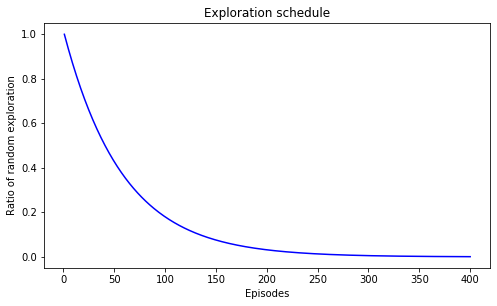

In [3]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [4]:
Balance_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, verbose = True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 48)           432         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 48)           2352        dense[0][0]                      
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 48)           2352        dense_1[0][0]                    
______________________________________________________________________________________________

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_48 (Dense)                (None, 48)           336         input_9[0][0]                    
__________________________________________________________________________________________________
dense_49 (Dense)                (None, 48)           2352        dense_48[0][0]                   
__________________________________________________________________________________________________
dense_52 (Dense)                (None, 48)           2352        dense_49[0][0]                   
____________________________________________________________________________________________

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense_96 (Dense)                (None, 48)           192         input_17[0][0]                   
__________________________________________________________________________________________________
dense_97 (Dense)                (None, 48)           2352        dense_96[0][0]                   
__________________________________________________________________________________________________
dense_100 (Dense)               (None, 48)           2352        dense_97[0][0]                   
___________________________________________________________________________________________

Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 7)]          0                                            
__________________________________________________________________________________________________
dense_144 (Dense)               (None, 48)           384         input_25[0][0]                   
__________________________________________________________________________________________________
dense_145 (Dense)               (None, 48)           2352        dense_144[0][0]                  
__________________________________________________________________________________________________
dense_148 (Dense)               (None, 48)           2352        dense_145[0][0]                  
___________________________________________________________________________________________

In [5]:
Balance_MultiDQN_Agents.prepopulate_memory()

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance.inpx ...
Model File load process successful.
Simulation length set to 3600 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 42
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links and Lanes.

Setting Simulation mode to: training
Starting Deployments of Signal Control Units...
SCUs successfully deployed. Elapsed tim

After 8000 actions taken by the Agents,  Agent 0 memory is 56.2 percent full
After 8000 actions taken by the Agents,  Agent 1 memory is 55.8 percent full
After 8000 actions taken by the Agents,  Agent 2 memory is 54.4 percent full
After 8000 actions taken by the Agents,  Agent 3 memory is 55.9 percent full
After 8000 actions taken by the Agents,  Agent 4 memory is 55.4 percent full
After 8000 actions taken by the Agents,  Agent 5 memory is 58.6 percent full
After 8000 actions taken by the Agents,  Agent 6 memory is 60.7 percent full
After 8000 actions taken by the Agents,  Agent 7 memory is 55.3 percent full
After 8000 actions taken by the Agents,  Agent 8 memory is 59.1 percent full
After 8000 actions taken by the Agents,  Agent 9 memory is 59.3 percent full
After 8000 actions taken by the Agents,  Agent 10 memory is 59.1 percent full
After 8000 actions taken by the Agents,  Agent 11 memory is 59.6 percent full
After 8000 actions taken by the Agents,  Agent 12 memory is 54.6 percent f

Memory filled. Saving as:C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\Agent13_PERPre_1000.p


In [6]:
Balance_MultiDQN_Agents.train(episodes)

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance.inpx ...
Model File load process successful.
Simulation length set to 1800 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 100
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links and Lanes.

Setting Simulation mode to: training
Starting Deployments of Signal Control Units...
SCUs successfully deployed. Elapsed ti

Average Reward for Agent 5 this episode : -0.42
Train on 128 samples
128/128 - 0s - loss: 0.4203
Average Reward for Agent 6 this episode : -2.82
Train on 128 samples
128/128 - 0s - loss: 6.8617
Average Reward for Agent 7 this episode : -5.15
Train on 128 samples
128/128 - 0s - loss: 7.7148
Average Reward for Agent 8 this episode : -0.56
Train on 128 samples
128/128 - 0s - loss: 0.8013
Average Reward for Agent 9 this episode : -0.52
Train on 128 samples
128/128 - 0s - loss: 0.6257
Average Reward for Agent 10 this episode : -0.53
Saving architecture, weights, optimizer state for best agent-10
New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\BestAgent10_Memory.p
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Train on 128 samples
128/128 - 0s - loss: 1.4954
Average Reward for Agent 11 this episode : -0.65
Train on 128 samples
128/128 - 0s - loss: 0.8114
Average Reward for Agent 12 this e

New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\BestAgent12_Memory.p
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Train on 128 samples
128/128 - 0s - loss: 3.9708
Average Reward for Agent 13 this episode : -14.17
Train on 128 samples
128/128 - 0s - loss: 7.7990
Reducing exploration for all agents to 0.8707
Episode 9 is finished
Average Reward for Agent 0 this episode : -4.79
Saving architecture, weights, optimizer state for best agent-0
New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\BestAgent0_Memory.p
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Train on 128 samples
128/128 - 0s - loss: 12.6407
Average Reward for Agent 1 this episode : -7.93
Train on 128 samples
128/128 - 0s - loss: 17.0892
Average Reward for Agent 2 this episode : -17.79
Train on 128 samples
128/128 - 0s -

Average Reward for Agent 11 this episode : -0.82
Train on 128 samples
128/128 - 0s - loss: 0.7866
Average Reward for Agent 12 this episode : -3.75
Train on 128 samples
128/128 - 0s - loss: 8.0895
Average Reward for Agent 13 this episode : -11.63
Train on 128 samples
128/128 - 0s - loss: 46.0518
Reducing exploration for all agents to 0.8266
Episode 12 is finished
Average Reward for Agent 0 this episode : -5.59
Train on 128 samples
128/128 - 0s - loss: 11.2512
Average Reward for Agent 1 this episode : -8.16
Train on 128 samples
128/128 - 0s - loss: 40.3611
Average Reward for Agent 2 this episode : -18.99
Train on 128 samples
128/128 - 0s - loss: 68.4201
Average Reward for Agent 3 this episode : -3.02
Train on 128 samples
128/128 - 0s - loss: 10.3003
Average Reward for Agent 4 this episode : -3.36
Train on 128 samples
128/128 - 0s - loss: 7.7058
Average Reward for Agent 5 this episode : -0.32
Saving architecture, weights, optimizer state for best agent-5
New best agent found. Saved in C:\

Average Reward for Agent 4 this episode : -4.02
Train on 128 samples
128/128 - 0s - loss: 8.4681
Average Reward for Agent 5 this episode : -0.4
Train on 128 samples
128/128 - 0s - loss: 0.8428
Average Reward for Agent 6 this episode : -3.11
Train on 128 samples
128/128 - 0s - loss: 26.9218
Average Reward for Agent 7 this episode : -3.19
Train on 128 samples
128/128 - 0s - loss: 10.1881
Average Reward for Agent 8 this episode : -0.64
Train on 128 samples
128/128 - 0s - loss: 1.3325
Average Reward for Agent 9 this episode : -0.57
Train on 128 samples
128/128 - 0s - loss: 0.7765
Average Reward for Agent 10 this episode : -0.93
Train on 128 samples
128/128 - 0s - loss: 1.5976
Average Reward for Agent 11 this episode : -0.58
Train on 128 samples
128/128 - 0s - loss: 1.4145
Average Reward for Agent 12 this episode : -3.37
Train on 128 samples
128/128 - 0s - loss: 7.1477
Average Reward for Agent 13 this episode : -5.28
Train on 128 samples
128/128 - 0s - loss: 16.8134
Reducing exploration for

Train on 128 samples
128/128 - 0s - loss: 7.9924
Weights succesfully copied to Target model for Agent 7.
Average Reward for Agent 8 this episode : -0.71
Train on 128 samples
128/128 - 0s - loss: 1.0436
Weights succesfully copied to Target model for Agent 8.
Average Reward for Agent 9 this episode : -0.4
Train on 128 samples
128/128 - 0s - loss: 0.7507
Weights succesfully copied to Target model for Agent 9.
Average Reward for Agent 10 this episode : -0.74
Train on 128 samples
128/128 - 0s - loss: 1.4121
Weights succesfully copied to Target model for Agent 10.
Average Reward for Agent 11 this episode : -0.86
Train on 128 samples
128/128 - 0s - loss: 0.6791
Weights succesfully copied to Target model for Agent 11.
Average Reward for Agent 12 this episode : -4.22
Train on 128 samples
128/128 - 0s - loss: 5.7508
Weights succesfully copied to Target model for Agent 12.
Average Reward for Agent 13 this episode : -6.89
Train on 128 samples
128/128 - 0s - loss: 18.2099
Weights succesfully copied

Average Reward for Agent 6 this episode : -1.69
Train on 128 samples
128/128 - 0s - loss: 36.2347
Average Reward for Agent 7 this episode : -3.91
Train on 128 samples
128/128 - 0s - loss: 8.9547
Average Reward for Agent 8 this episode : -0.49
Train on 128 samples
128/128 - 0s - loss: 0.7967
Average Reward for Agent 9 this episode : -0.85
Train on 128 samples
128/128 - 0s - loss: 0.7947
Average Reward for Agent 10 this episode : -0.77
Train on 128 samples
128/128 - 0s - loss: 1.8897
Average Reward for Agent 11 this episode : -0.82
Train on 128 samples
128/128 - 0s - loss: 0.9934
Average Reward for Agent 12 this episode : -2.95
Saving architecture, weights, optimizer state for best agent-12
New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\BestAgent12_Memory.p
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Train on 128 samples
128/128 - 0s - loss: 8.6725
Average Reward for Agent 13 this

Weights succesfully copied to Target model for Agent 1.
Average Reward for Agent 2 this episode : -21.79
Train on 128 samples
128/128 - 0s - loss: 89.2260
Weights succesfully copied to Target model for Agent 2.
Average Reward for Agent 3 this episode : -3.32
Train on 128 samples
128/128 - 0s - loss: 9.3163
Weights succesfully copied to Target model for Agent 3.
Average Reward for Agent 4 this episode : -2.49
Train on 128 samples
128/128 - 0s - loss: 8.5809
Weights succesfully copied to Target model for Agent 4.
Average Reward for Agent 5 this episode : -0.24
Saving architecture, weights, optimizer state for best agent-5
New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\BestAgent5_Memory.p
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Train on 128 samples
128/128 - 0s - loss: 0.3864
Weights succesfully copied to Target model for Agent 5.
Average Reward for Agent 6 this episode : -4.21

Average Reward for Agent 5 this episode : -0.28
Train on 128 samples
128/128 - 0s - loss: 0.1442
Average Reward for Agent 6 this episode : -6.02
Train on 128 samples
128/128 - 0s - loss: 60.6092
Average Reward for Agent 7 this episode : -2.28
Train on 128 samples
128/128 - 0s - loss: 9.2311
Average Reward for Agent 8 this episode : -0.49
Train on 128 samples
128/128 - 0s - loss: 0.4476
Average Reward for Agent 9 this episode : -0.3
Saving architecture, weights, optimizer state for best agent-9
New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\BestAgent9_Memory.p
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Train on 128 samples
128/128 - 0s - loss: 0.6985
Average Reward for Agent 10 this episode : -1.05
Train on 128 samples
128/128 - 0s - loss: 2.1807
Average Reward for Agent 11 this episode : -0.41
Saving architecture, weights, optimizer state for best agent-11
New best agent found.

New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\BestAgent6_Memory.p
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Train on 128 samples
128/128 - 0s - loss: 28.1270
Average Reward for Agent 7 this episode : -1.9
Train on 128 samples
128/128 - 0s - loss: 5.8199
Average Reward for Agent 8 this episode : -0.46
Train on 128 samples
128/128 - 0s - loss: 0.6326
Average Reward for Agent 9 this episode : -0.55
Train on 128 samples
128/128 - 0s - loss: 0.5748
Average Reward for Agent 10 this episode : -0.67
Train on 128 samples
128/128 - 0s - loss: 2.1429
Average Reward for Agent 11 this episode : -0.61
Train on 128 samples
128/128 - 0s - loss: 0.9640
Average Reward for Agent 12 this episode : -2.29
Train on 128 samples
128/128 - 0s - loss: 7.8368
Average Reward for Agent 13 this episode : -8.3
Train on 128 samples
128/128 - 0s - loss: 44.6031
Reducing exploration for all agents to 0.5179
Ep

Average Reward for Agent 4 this episode : -5.73
Train on 128 samples
128/128 - 0s - loss: 16.3875
Average Reward for Agent 5 this episode : -0.19
Train on 128 samples
128/128 - 0s - loss: 0.2412
Average Reward for Agent 6 this episode : -2.46
Train on 128 samples
128/128 - 0s - loss: 35.9014
Average Reward for Agent 7 this episode : -2.68
Train on 128 samples
128/128 - 0s - loss: 6.9010
Average Reward for Agent 8 this episode : -0.52
Train on 128 samples
128/128 - 0s - loss: 0.4684
Average Reward for Agent 9 this episode : -0.54
Train on 128 samples
128/128 - 0s - loss: 0.9367
Average Reward for Agent 10 this episode : -0.64
Train on 128 samples
128/128 - 0s - loss: 1.2266
Average Reward for Agent 11 this episode : -0.61
Train on 128 samples
128/128 - 0s - loss: 0.8588
Average Reward for Agent 12 this episode : -2.68
Train on 128 samples
128/128 - 0s - loss: 5.8959
Average Reward for Agent 13 this episode : -16.1
Train on 128 samples
128/128 - 0s - loss: 81.8258
Reducing exploration fo

Average Reward for Agent 3 this episode : -10.04
Train on 128 samples
128/128 - 0s - loss: 39.9440
Average Reward for Agent 4 this episode : -1.72
Train on 128 samples
128/128 - 0s - loss: 14.1943
Average Reward for Agent 5 this episode : -0.34
Train on 128 samples
128/128 - 0s - loss: 0.2185
Average Reward for Agent 6 this episode : -4.77
Train on 128 samples
128/128 - 0s - loss: 104.4624
Average Reward for Agent 7 this episode : -2.41
Train on 128 samples
128/128 - 0s - loss: 6.6194
Average Reward for Agent 8 this episode : -0.35
Train on 128 samples
128/128 - 0s - loss: 0.4179
Average Reward for Agent 9 this episode : -0.65
Train on 128 samples
128/128 - 0s - loss: 1.3241
Average Reward for Agent 10 this episode : -0.67
Train on 128 samples
128/128 - 0s - loss: 1.2328
Average Reward for Agent 11 this episode : -1.54
Train on 128 samples
128/128 - 0s - loss: 3.1671
Average Reward for Agent 12 this episode : -2.69
Train on 128 samples
128/128 - 0s - loss: 8.6406
Average Reward for Age

Reducing exploration for all agents to 0.4065
Episode 53 is finished
Average Reward for Agent 0 this episode : -12.52
Train on 128 samples
128/128 - 0s - loss: 64.3458
Average Reward for Agent 1 this episode : -9.51
Train on 128 samples
128/128 - 0s - loss: 113.9371
Average Reward for Agent 2 this episode : -31.18
Train on 128 samples
128/128 - 0s - loss: 149.7209
Average Reward for Agent 3 this episode : -9.3
Train on 128 samples
128/128 - 0s - loss: 63.4396
Average Reward for Agent 4 this episode : -1.58
Train on 128 samples
128/128 - 0s - loss: 38.0562
Average Reward for Agent 5 this episode : -0.1
Train on 128 samples
128/128 - 0s - loss: 0.3508
Average Reward for Agent 6 this episode : -2.14
Train on 128 samples
128/128 - 0s - loss: 51.7345
Average Reward for Agent 7 this episode : -1.58
Saving architecture, weights, optimizer state for best agent-7
New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\BestAgent7_Memo

Average Reward for Agent 1 this episode : -12.68
Train on 128 samples
128/128 - 0s - loss: 91.7687
Average Reward for Agent 2 this episode : -34.48
Train on 128 samples
128/128 - 0s - loss: 236.8978
Average Reward for Agent 3 this episode : -8.72
Train on 128 samples
128/128 - 0s - loss: 47.5013
Average Reward for Agent 4 this episode : -5.37
Train on 128 samples
128/128 - 0s - loss: 14.2722
Average Reward for Agent 5 this episode : -0.09
Saving architecture, weights, optimizer state for best agent-5
New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\BestAgent5_Memory.p
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Train on 128 samples
128/128 - 0s - loss: 0.3733
Average Reward for Agent 6 this episode : -2.67
Train on 128 samples
128/128 - 0s - loss: 88.3083
Average Reward for Agent 7 this episode : -1.78
Train on 128 samples
128/128 - 0s - loss: 4.6963
Average Reward for Agent 8 thi

Average Reward for Agent 12 this episode : -3.73
Train on 128 samples
128/128 - 0s - loss: 5.5499
Average Reward for Agent 13 this episode : -7.22
Train on 128 samples
128/128 - 0s - loss: 44.2441
Reducing exploration for all agents to 0.3418
Episode 63 is finished
Average Reward for Agent 0 this episode : -12.12
Train on 128 samples
128/128 - 0s - loss: 62.3810
Average Reward for Agent 1 this episode : -11.32
Train on 128 samples
128/128 - 0s - loss: 89.5265
Average Reward for Agent 2 this episode : -24.16
Train on 128 samples
128/128 - 0s - loss: 751.3621
Average Reward for Agent 3 this episode : -9.73
Train on 128 samples
128/128 - 0s - loss: 54.0901
Average Reward for Agent 4 this episode : -8.13
Train on 128 samples
128/128 - 0s - loss: 37.3409
Average Reward for Agent 5 this episode : -0.12
Train on 128 samples
128/128 - 0s - loss: 0.1601
Average Reward for Agent 6 this episode : -14.32
Train on 128 samples
128/128 - 0s - loss: 126.5343
Average Reward for Agent 7 this episode : -

Average Reward for Agent 5 this episode : -0.11
Train on 128 samples
128/128 - 0s - loss: 0.1742
Average Reward for Agent 6 this episode : -8.68
Train on 128 samples
128/128 - 0s - loss: 160.5002
Average Reward for Agent 7 this episode : -10.76
Train on 128 samples
128/128 - 0s - loss: 16.2319
Average Reward for Agent 8 this episode : -0.22
Train on 128 samples
128/128 - 0s - loss: 0.6245
Average Reward for Agent 9 this episode : -1.17
Train on 128 samples
128/128 - 0s - loss: 1.3522
Average Reward for Agent 10 this episode : -1.51
Train on 128 samples
128/128 - 0s - loss: 1.4014
Average Reward for Agent 11 this episode : -0.86
Train on 128 samples
128/128 - 0s - loss: 3.5022
Average Reward for Agent 12 this episode : -2.5
Train on 128 samples
128/128 - 0s - loss: 5.4792
Average Reward for Agent 13 this episode : -22.47
Train on 128 samples
128/128 - 0s - loss: 176.7242
Reducing exploration for all agents to 0.3081
Episode 69 is finished
Average Reward for Agent 0 this episode : -15.97

Average Reward for Agent 1 this episode : -12.67
Train on 128 samples
128/128 - 0s - loss: 83.5686
Average Reward for Agent 2 this episode : -23.16
Train on 128 samples
128/128 - 0s - loss: 287.3917
Average Reward for Agent 3 this episode : -10.55
Train on 128 samples
128/128 - 0s - loss: 47.4717
Average Reward for Agent 4 this episode : -17.44
Train on 128 samples
128/128 - 0s - loss: 47.4581
Average Reward for Agent 5 this episode : -0.12
Train on 128 samples
128/128 - 0s - loss: 0.1670
Average Reward for Agent 6 this episode : -19.88
Train on 128 samples
128/128 - 0s - loss: 134.4130
Average Reward for Agent 7 this episode : -13.46
Train on 128 samples
128/128 - 0s - loss: 27.2484
Average Reward for Agent 8 this episode : -0.14
Saving architecture, weights, optimizer state for best agent-8
New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\BestAgent8_Memory.p
Dumping Training Results into pickle file.
Dumping Loss Re

Average Reward for Agent 5 this episode : -0.33
Train on 128 samples
128/128 - 0s - loss: 0.3859
Average Reward for Agent 6 this episode : -2.52
Train on 128 samples
128/128 - 0s - loss: 102.0384
Average Reward for Agent 7 this episode : -16.07
Train on 128 samples
128/128 - 0s - loss: 38.9905
Average Reward for Agent 8 this episode : -1.19
Train on 128 samples
128/128 - 0s - loss: 1.3073
Average Reward for Agent 9 this episode : -0.7
Train on 128 samples
128/128 - 0s - loss: 3.8874
Average Reward for Agent 10 this episode : -1.28
Train on 128 samples
128/128 - 0s - loss: 3.1786
Average Reward for Agent 11 this episode : -2.23
Train on 128 samples
128/128 - 0s - loss: 1.8557
Average Reward for Agent 12 this episode : -4.94
Train on 128 samples
128/128 - 0s - loss: 8.9646
Average Reward for Agent 13 this episode : -4.98
Train on 128 samples
128/128 - 0s - loss: 118.8458
Reducing exploration for all agents to 0.2591
Episode 79 is finished
Average Reward for Agent 0 this episode : -12.98


Average Reward for Agent 1 this episode : -18.8
Train on 128 samples
128/128 - 0s - loss: 114.1514
Average Reward for Agent 2 this episode : -24.94
Train on 128 samples
128/128 - 0s - loss: 319.1600
Average Reward for Agent 3 this episode : -10.69
Train on 128 samples
128/128 - 0s - loss: 86.7151
Average Reward for Agent 4 this episode : -13.62
Train on 128 samples
128/128 - 0s - loss: 62.0120
Average Reward for Agent 5 this episode : -0.07
Saving architecture, weights, optimizer state for best agent-5
New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\BestAgent5_Memory.p
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Train on 128 samples
128/128 - 0s - loss: 0.3179
Average Reward for Agent 6 this episode : -6.52
Train on 128 samples
128/128 - 0s - loss: 115.8354
Average Reward for Agent 7 this episode : -14.09
Train on 128 samples
128/128 - 0s - loss: 48.8872
Average Reward for Agent 

Average Reward for Agent 5 this episode : -0.17
Train on 128 samples
128/128 - 0s - loss: 0.1663
Average Reward for Agent 6 this episode : -9.52
Train on 128 samples
128/128 - 0s - loss: 127.8065
Average Reward for Agent 7 this episode : -12.97
Train on 128 samples
128/128 - 0s - loss: 38.8809
Average Reward for Agent 8 this episode : -2.14
Train on 128 samples
128/128 - 0s - loss: 2.7962
Average Reward for Agent 9 this episode : -1.3
Train on 128 samples
128/128 - 0s - loss: 4.4988
Average Reward for Agent 10 this episode : -0.55
Train on 128 samples
128/128 - 0s - loss: 3.1673
Average Reward for Agent 11 this episode : -15.85
Train on 128 samples
128/128 - 0s - loss: 24.7426
Average Reward for Agent 12 this episode : -11.73
Train on 128 samples
128/128 - 0s - loss: 30.5888
Average Reward for Agent 13 this episode : -2.24
Saving architecture, weights, optimizer state for best agent-13
New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Ag

Average Reward for Agent 1 this episode : -9.56
Train on 128 samples
128/128 - 0s - loss: 142.8898
Average Reward for Agent 2 this episode : -29.27
Train on 128 samples
128/128 - 0s - loss: 772.3987
Average Reward for Agent 3 this episode : -14.64
Train on 128 samples
128/128 - 0s - loss: 53.9298
Average Reward for Agent 4 this episode : -10.94
Train on 128 samples
128/128 - 0s - loss: 121.7427
Average Reward for Agent 5 this episode : -3.17
Train on 128 samples
128/128 - 0s - loss: 2.0408
Average Reward for Agent 6 this episode : -9.66
Train on 128 samples
128/128 - 0s - loss: 149.3531
Average Reward for Agent 7 this episode : -13.96
Train on 128 samples
128/128 - 0s - loss: 50.0032
Average Reward for Agent 8 this episode : -1.11
Train on 128 samples
128/128 - 0s - loss: 14.2177
Average Reward for Agent 9 this episode : -1.41
Train on 128 samples
128/128 - 0s - loss: 6.8104
Average Reward for Agent 10 this episode : -0.8
Train on 128 samples
128/128 - 0s - loss: 3.4813
Average Reward 

Average Reward for Agent 1 this episode : -20.08
Train on 128 samples
128/128 - 0s - loss: 275.6100
Average Reward for Agent 2 this episode : -34.34
Train on 128 samples
128/128 - 0s - loss: 657.7899
Average Reward for Agent 3 this episode : -11.03
Train on 128 samples
128/128 - 0s - loss: 57.4869
Average Reward for Agent 4 this episode : -9.04
Train on 128 samples
128/128 - 0s - loss: 69.8808
Average Reward for Agent 5 this episode : -0.12
Train on 128 samples
128/128 - 0s - loss: 1.4436
Average Reward for Agent 6 this episode : -2.58
Train on 128 samples
128/128 - 0s - loss: 87.4187
Average Reward for Agent 7 this episode : -17.58
Train on 128 samples
128/128 - 0s - loss: 77.9753
Average Reward for Agent 8 this episode : -0.12
Saving architecture, weights, optimizer state for best agent-8
New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\BestAgent8_Memory.p
Dumping Training Results into pickle file.
Dumping Loss Resu

Average Reward for Agent 2 this episode : -25.42
Train on 128 samples
128/128 - 0s - loss: 496.1916
Average Reward for Agent 3 this episode : -11.88
Train on 128 samples
128/128 - 0s - loss: 46.0211
Average Reward for Agent 4 this episode : -9.4
Train on 128 samples
128/128 - 0s - loss: 62.9175
Average Reward for Agent 5 this episode : -0.09
Train on 128 samples
128/128 - 0s - loss: 0.4250
Average Reward for Agent 6 this episode : -1.29
Train on 128 samples
128/128 - 0s - loss: 83.7786
Average Reward for Agent 7 this episode : -19.12
Train on 128 samples
128/128 - 0s - loss: 46.2845
Average Reward for Agent 8 this episode : -13.32
Train on 128 samples
128/128 - 0s - loss: 19.9949
Average Reward for Agent 9 this episode : -0.92
Train on 128 samples
128/128 - 0s - loss: 5.0371
Average Reward for Agent 10 this episode : -7.6
Train on 128 samples
128/128 - 0s - loss: 22.9510
Average Reward for Agent 11 this episode : -0.3
Train on 128 samples
128/128 - 0s - loss: 10.1047
Average Reward for

Average Reward for Agent 10 this episode : -8.79
Train on 128 samples
128/128 - 0s - loss: 34.7953
Average Reward for Agent 11 this episode : -0.33
Train on 128 samples
128/128 - 0s - loss: 5.1295
Average Reward for Agent 12 this episode : -26.74
Train on 128 samples
128/128 - 0s - loss: 40.5867
Average Reward for Agent 13 this episode : -19.21
Train on 128 samples
128/128 - 0s - loss: 146.4882
Reducing exploration for all agents to 0.1438
Episode 113 is finished
Average Reward for Agent 0 this episode : -9.09
Train on 128 samples
128/128 - 0s - loss: 40.4275
Average Reward for Agent 1 this episode : -12.16
Train on 128 samples
128/128 - 0s - loss: 163.5827
Average Reward for Agent 2 this episode : -20.82
Train on 128 samples
128/128 - 0s - loss: 241.2021
Average Reward for Agent 3 this episode : -13.1
Train on 128 samples
128/128 - 0s - loss: 81.8288
Average Reward for Agent 4 this episode : -9.88
Train on 128 samples
128/128 - 0s - loss: 65.0076
Average Reward for Agent 5 this episod

128/128 - 0s - loss: 111.0916
Reducing exploration for all agents to 0.1319
Episode 118 is finished
Average Reward for Agent 0 this episode : -9.68
Train on 128 samples
128/128 - 0s - loss: 52.4038
Average Reward for Agent 1 this episode : -14.92
Train on 128 samples
128/128 - 0s - loss: 240.4838
Average Reward for Agent 2 this episode : -22.42
Train on 128 samples
128/128 - 0s - loss: 338.6398
Average Reward for Agent 3 this episode : -9.77
Train on 128 samples
128/128 - 0s - loss: 57.9163
Average Reward for Agent 4 this episode : -10.67
Train on 128 samples
128/128 - 0s - loss: 65.6828
Average Reward for Agent 5 this episode : -0.05
Saving architecture, weights, optimizer state for best agent-5
New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\BestAgent5_Memory.p
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Train on 128 samples
128/128 - 0s - loss: 0.8418
Average Reward for Agent 

Train on 128 samples
128/128 - 0s - loss: 5.8047
Average Reward for Agent 12 this episode : -23.7
Train on 128 samples
128/128 - 0s - loss: 78.4569
Average Reward for Agent 13 this episode : -33.91
Train on 128 samples
128/128 - 0s - loss: 140.8428
Reducing exploration for all agents to 0.121
Episode 123 is finished
Average Reward for Agent 0 this episode : -12.09
Train on 128 samples
128/128 - 0s - loss: 40.0586
Average Reward for Agent 1 this episode : -13.72
Train on 128 samples
128/128 - 0s - loss: 165.4013
Average Reward for Agent 2 this episode : -31.67
Train on 128 samples
128/128 - 0s - loss: 217.4885
Average Reward for Agent 3 this episode : -8.4
Train on 128 samples
128/128 - 0s - loss: 15.2137
Average Reward for Agent 4 this episode : -10.19
Train on 128 samples
128/128 - 0s - loss: 119.0285
Average Reward for Agent 5 this episode : -0.28
Train on 128 samples
128/128 - 0s - loss: 1.0058
Average Reward for Agent 6 this episode : -17.07
Train on 128 samples
128/128 - 0s - loss

Average Reward for Agent 6 this episode : -12.66
Train on 128 samples
128/128 - 0s - loss: 108.3181
Average Reward for Agent 7 this episode : -16.86
Train on 128 samples
128/128 - 0s - loss: 66.4150
Average Reward for Agent 8 this episode : -2.1
Train on 128 samples
128/128 - 0s - loss: 1.6721
Average Reward for Agent 9 this episode : -1.62
Train on 128 samples
128/128 - 0s - loss: 13.9562
Average Reward for Agent 10 this episode : -22.45
Train on 128 samples
128/128 - 0s - loss: 122.8817
Average Reward for Agent 11 this episode : -0.53
Train on 128 samples
128/128 - 0s - loss: 7.6961
Average Reward for Agent 12 this episode : -20.2
Train on 128 samples
128/128 - 0s - loss: 65.9244
Average Reward for Agent 13 this episode : -25.4
Train on 128 samples
128/128 - 0s - loss: 233.5449
Reducing exploration for all agents to 0.109
Episode 129 is finished
Average Reward for Agent 0 this episode : -12.62
Train on 128 samples
128/128 - 0s - loss: 41.3337
Average Reward for Agent 1 this episode :

Average Reward for Agent 8 this episode : -2.43
Train on 128 samples
128/128 - 0s - loss: 15.5067
Average Reward for Agent 9 this episode : -3.15
Train on 128 samples
128/128 - 0s - loss: 22.2159
Average Reward for Agent 10 this episode : -9.76
Train on 128 samples
128/128 - 0s - loss: 199.8507
Average Reward for Agent 11 this episode : -0.65
Train on 128 samples
128/128 - 0s - loss: 6.1381
Average Reward for Agent 12 this episode : -15.77
Train on 128 samples
128/128 - 0s - loss: 44.1842
Average Reward for Agent 13 this episode : -8.2
Train on 128 samples
128/128 - 0s - loss: 186.1469
Reducing exploration for all agents to 0.1
Episode 134 is finished
Average Reward for Agent 0 this episode : -34.25
Train on 128 samples
128/128 - 0s - loss: 81.7716
Average Reward for Agent 1 this episode : -18.95
Train on 128 samples
128/128 - 0s - loss: 269.9113
Average Reward for Agent 2 this episode : -39.88
Train on 128 samples
128/128 - 0s - loss: 555.9478
Average Reward for Agent 3 this episode :

Average Reward for Agent 1 this episode : -22.58
Train on 128 samples
128/128 - 0s - loss: 220.4361
Average Reward for Agent 2 this episode : -40.64
Train on 128 samples
128/128 - 0s - loss: 514.3062
Average Reward for Agent 3 this episode : -9.35
Train on 128 samples
128/128 - 0s - loss: 100.8752
Average Reward for Agent 4 this episode : -24.69
Train on 128 samples
128/128 - 0s - loss: 77.9813
Average Reward for Agent 5 this episode : -4.23
Train on 128 samples
128/128 - 0s - loss: 27.9278
Average Reward for Agent 6 this episode : -10.12
Train on 128 samples
128/128 - 0s - loss: 137.8856
Average Reward for Agent 7 this episode : -13.38
Train on 128 samples
128/128 - 0s - loss: 50.2487
Average Reward for Agent 8 this episode : -1.03
Train on 128 samples
128/128 - 0s - loss: 14.7879
Average Reward for Agent 9 this episode : -5.34
Train on 128 samples
128/128 - 0s - loss: 10.7489
Average Reward for Agent 10 this episode : -0.75
Train on 128 samples
128/128 - 0s - loss: 50.5300
Average Re

Average Reward for Agent 3 this episode : -7.66
Train on 128 samples
128/128 - 0s - loss: 44.1420
Average Reward for Agent 4 this episode : -19.94
Train on 128 samples
128/128 - 0s - loss: 178.0154
Average Reward for Agent 5 this episode : -0.22
Train on 128 samples
128/128 - 0s - loss: 14.7133
Average Reward for Agent 6 this episode : -2.88
Train on 128 samples
128/128 - 0s - loss: 136.0339
Average Reward for Agent 7 this episode : -14.02
Train on 128 samples
128/128 - 0s - loss: 116.9850
Average Reward for Agent 8 this episode : -1.67
Train on 128 samples
128/128 - 0s - loss: 13.3791
Average Reward for Agent 9 this episode : -5.99
Train on 128 samples
128/128 - 0s - loss: 7.7992
Average Reward for Agent 10 this episode : -1.53
Train on 128 samples
128/128 - 0s - loss: 39.5067
Average Reward for Agent 11 this episode : -0.4
Train on 128 samples
128/128 - 0s - loss: 1.2290
Average Reward for Agent 12 this episode : -25.09
Train on 128 samples
128/128 - 0s - loss: 106.9158
Average Rewar

Average Reward for Agent 4 this episode : -16.28
Train on 128 samples
128/128 - 0s - loss: 61.8605
Average Reward for Agent 5 this episode : -0.14
Train on 128 samples
128/128 - 0s - loss: 2.9480
Average Reward for Agent 6 this episode : -2.08
Train on 128 samples
128/128 - 0s - loss: 64.8341
Average Reward for Agent 7 this episode : -13.05
Train on 128 samples
128/128 - 0s - loss: 71.7591
Average Reward for Agent 8 this episode : -3.98
Train on 128 samples
128/128 - 0s - loss: 3.3872
Average Reward for Agent 9 this episode : -2.95
Train on 128 samples
128/128 - 0s - loss: 14.2377
Average Reward for Agent 10 this episode : -0.59
Train on 128 samples
128/128 - 0s - loss: 72.0617
Average Reward for Agent 11 this episode : -0.4
Train on 128 samples
128/128 - 0s - loss: 3.0040
Average Reward for Agent 12 this episode : -17.8
Train on 128 samples
128/128 - 0s - loss: 124.3013
Average Reward for Agent 13 this episode : -46.55
Train on 128 samples
128/128 - 0s - loss: 230.5553
Reducing explor

Average Reward for Agent 6 this episode : -0.71
Saving architecture, weights, optimizer state for best agent-6
New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\BestAgent6_Memory.p
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Train on 128 samples
128/128 - 0s - loss: 26.9083
Average Reward for Agent 7 this episode : -14.22
Train on 128 samples
128/128 - 0s - loss: 87.7201
Average Reward for Agent 8 this episode : -3.23
Train on 128 samples
128/128 - 0s - loss: 12.3901
Average Reward for Agent 9 this episode : -3.9
Train on 128 samples
128/128 - 0s - loss: 22.5950
Average Reward for Agent 10 this episode : -11.95
Train on 128 samples
128/128 - 0s - loss: 80.8272
Average Reward for Agent 11 this episode : -0.37
Train on 128 samples
128/128 - 0s - loss: 1.3611
Average Reward for Agent 12 this episode : -14.43
Train on 128 samples
128/128 - 0s - loss: 70.6425
Average Reward for Agent 13

Average Reward for Agent 7 this episode : -12.68
Train on 128 samples
128/128 - 0s - loss: 64.6643
Average Reward for Agent 8 this episode : -0.37
Train on 128 samples
128/128 - 0s - loss: 22.3488
Average Reward for Agent 9 this episode : -9.5
Train on 128 samples
128/128 - 0s - loss: 40.4438
Average Reward for Agent 10 this episode : -0.69
Train on 128 samples
128/128 - 0s - loss: 67.3214
Average Reward for Agent 11 this episode : -0.53
Train on 128 samples
128/128 - 0s - loss: 1.1138
Average Reward for Agent 12 this episode : -32.24
Train on 128 samples
128/128 - 0s - loss: 34.9238
Average Reward for Agent 13 this episode : -43.47
Train on 128 samples
128/128 - 0s - loss: 74.5245
Reducing exploration for all agents to 0.0638
Episode 160 is finished
Average Reward for Agent 0 this episode : -24.59
Train on 128 samples
128/128 - 0s - loss: 18.0161
Weights succesfully copied to Target model for Agent 0.
Average Reward for Agent 1 this episode : -18.82
Train on 128 samples
128/128 - 0s -

Average Reward for Agent 6 this episode : -1.3
Train on 128 samples
128/128 - 0s - loss: 56.9934
Average Reward for Agent 7 this episode : -14.47
Train on 128 samples
128/128 - 0s - loss: 26.8340
Average Reward for Agent 8 this episode : -0.39
Train on 128 samples
128/128 - 0s - loss: 18.6809
Average Reward for Agent 9 this episode : -6.92
Train on 128 samples
128/128 - 0s - loss: 31.7720
Average Reward for Agent 10 this episode : -3.52
Train on 128 samples
128/128 - 0s - loss: 97.8811
Average Reward for Agent 11 this episode : -0.45
Train on 128 samples
128/128 - 0s - loss: 1.6563
Average Reward for Agent 12 this episode : -8.03
Train on 128 samples
128/128 - 0s - loss: 58.1973
Average Reward for Agent 13 this episode : -8.43
Train on 128 samples
128/128 - 0s - loss: 106.8685
Reducing exploration for all agents to 0.0585
Episode 165 is finished
Average Reward for Agent 0 this episode : -13.99
Train on 128 samples
128/128 - 0s - loss: 77.3380
Average Reward for Agent 1 this episode : -

Average Reward for Agent 7 this episode : -14.3
Train on 128 samples
128/128 - 0s - loss: 91.1190
Average Reward for Agent 8 this episode : -0.67
Train on 128 samples
128/128 - 0s - loss: 19.1885
Average Reward for Agent 9 this episode : -10.06
Train on 128 samples
128/128 - 0s - loss: 35.9754
Average Reward for Agent 10 this episode : -40.17
Train on 128 samples
128/128 - 0s - loss: 97.0654
Average Reward for Agent 11 this episode : -0.43
Train on 128 samples
128/128 - 0s - loss: 1.0707
Average Reward for Agent 12 this episode : -14.52
Train on 128 samples
128/128 - 0s - loss: 60.4226
Average Reward for Agent 13 this episode : -13.98
Train on 128 samples
128/128 - 0s - loss: 95.9390
Reducing exploration for all agents to 0.0536
Episode 170 is finished
Average Reward for Agent 0 this episode : -12.66
Train on 128 samples
128/128 - 0s - loss: 105.0571
Weights succesfully copied to Target model for Agent 0.
Average Reward for Agent 1 this episode : -20.94
Train on 128 samples
128/128 - 0

Average Reward for Agent 6 this episode : -1.24
Train on 128 samples
128/128 - 0s - loss: 53.1684
Average Reward for Agent 7 this episode : -14.46
Train on 128 samples
128/128 - 0s - loss: 141.3760
Average Reward for Agent 8 this episode : -1.88
Train on 128 samples
128/128 - 0s - loss: 14.0159
Average Reward for Agent 9 this episode : -7.23
Train on 128 samples
128/128 - 0s - loss: 26.3573
Average Reward for Agent 10 this episode : -0.65
Train on 128 samples
128/128 - 0s - loss: 139.1870
Average Reward for Agent 11 this episode : -0.28
Train on 128 samples
128/128 - 0s - loss: 0.3828
Average Reward for Agent 12 this episode : -15.49
Train on 128 samples
128/128 - 0s - loss: 45.3222
Average Reward for Agent 13 this episode : -48.83
Train on 128 samples
128/128 - 0s - loss: 112.2286
Reducing exploration for all agents to 0.0492
Episode 175 is finished
Average Reward for Agent 0 this episode : -11.03
Train on 128 samples
128/128 - 0s - loss: 39.2595
Average Reward for Agent 1 this episod

Weights succesfully copied to Target model for Agent 0.
Average Reward for Agent 1 this episode : -17.03
Train on 128 samples
128/128 - 0s - loss: 240.3597
Weights succesfully copied to Target model for Agent 1.
Average Reward for Agent 2 this episode : -21.91
Train on 128 samples
128/128 - 0s - loss: 176.2568
Weights succesfully copied to Target model for Agent 2.
Average Reward for Agent 3 this episode : -1.31
Saving architecture, weights, optimizer state for best agent-3
New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\BestAgent3_Memory.p
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Train on 128 samples
128/128 - 0s - loss: 42.2622
Weights succesfully copied to Target model for Agent 3.
Average Reward for Agent 4 this episode : -20.79
Train on 128 samples
128/128 - 0s - loss: 169.0627
Weights succesfully copied to Target model for Agent 4.
Average Reward for Agent 5 this episode

128/128 - 0s - loss: 75.1766
Average Reward for Agent 10 this episode : -0.78
Train on 128 samples
128/128 - 0s - loss: 120.5539
Average Reward for Agent 11 this episode : -3.63
Train on 128 samples
128/128 - 0s - loss: 40.2287
Average Reward for Agent 12 this episode : -14.66
Train on 128 samples
128/128 - 0s - loss: 84.5262
Average Reward for Agent 13 this episode : -39.46
Train on 128 samples
128/128 - 0s - loss: 108.6699
Reducing exploration for all agents to 0.0414
Episode 185 is finished
Average Reward for Agent 0 this episode : -9.24
Train on 128 samples
128/128 - 0s - loss: 186.2825
Average Reward for Agent 1 this episode : -18.92
Train on 128 samples
128/128 - 0s - loss: 284.6110
Average Reward for Agent 2 this episode : -19.32
Train on 128 samples
128/128 - 0s - loss: 56.5940
Average Reward for Agent 3 this episode : -1.4
Train on 128 samples
128/128 - 0s - loss: 108.2095
Average Reward for Agent 4 this episode : -18.71
Train on 128 samples
128/128 - 0s - loss: 232.1071
Avera

Weights succesfully copied to Target model for Agent 3.
Average Reward for Agent 4 this episode : -15.95
Train on 128 samples
128/128 - 0s - loss: 369.9913
Weights succesfully copied to Target model for Agent 4.
Average Reward for Agent 5 this episode : -1.02
Train on 128 samples
128/128 - 0s - loss: 0.2704
Weights succesfully copied to Target model for Agent 5.
Average Reward for Agent 6 this episode : -5.64
Train on 128 samples
128/128 - 0s - loss: 83.0296
Weights succesfully copied to Target model for Agent 6.
Average Reward for Agent 7 this episode : -14.64
Train on 128 samples
128/128 - 0s - loss: 135.6075
Weights succesfully copied to Target model for Agent 7.
Average Reward for Agent 8 this episode : -9.25
Train on 128 samples
128/128 - 0s - loss: 18.7683
Weights succesfully copied to Target model for Agent 8.
Average Reward for Agent 9 this episode : -10.02
Train on 128 samples
128/128 - 0s - loss: 44.9615
Weights succesfully copied to Target model for Agent 9.
Average Reward f

Average Reward for Agent 5 this episode : -0.42
Train on 128 samples
128/128 - 0s - loss: 1.1338
Average Reward for Agent 6 this episode : -0.91
Train on 128 samples
128/128 - 0s - loss: 69.7051
Average Reward for Agent 7 this episode : -15.67
Train on 128 samples
128/128 - 0s - loss: 131.7706
Average Reward for Agent 8 this episode : -1.27
Train on 128 samples
128/128 - 0s - loss: 8.4524
Average Reward for Agent 9 this episode : -0.11
Saving architecture, weights, optimizer state for best agent-9
New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\BestAgent9_Memory.p
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Train on 128 samples
128/128 - 0s - loss: 22.5597
Average Reward for Agent 10 this episode : -54.65
Train on 128 samples
128/128 - 0s - loss: 76.2034
Average Reward for Agent 11 this episode : -3.98
Train on 128 samples
128/128 - 0s - loss: 29.3981
Average Reward for Agent 12 

Weights succesfully copied to Target model for Agent 5.
Average Reward for Agent 6 this episode : -27.67
Train on 128 samples
128/128 - 0s - loss: 92.1873
Weights succesfully copied to Target model for Agent 6.
Average Reward for Agent 7 this episode : -14.6
Train on 128 samples
128/128 - 0s - loss: 57.7673
Weights succesfully copied to Target model for Agent 7.
Average Reward for Agent 8 this episode : -1.31
Train on 128 samples
128/128 - 0s - loss: 4.4721
Weights succesfully copied to Target model for Agent 8.
Average Reward for Agent 9 this episode : -3.57
Train on 128 samples
128/128 - 0s - loss: 64.0192
Weights succesfully copied to Target model for Agent 9.
Average Reward for Agent 10 this episode : -33.82
Train on 128 samples
128/128 - 0s - loss: 239.8092
Weights succesfully copied to Target model for Agent 10.
Average Reward for Agent 11 this episode : -5.78
Train on 128 samples
128/128 - 0s - loss: 29.6001
Weights succesfully copied to Target model for Agent 11.
Average Reward

Average Reward for Agent 8 this episode : -1.0
Train on 128 samples
128/128 - 0s - loss: 7.7848
Average Reward for Agent 9 this episode : -1.17
Train on 128 samples
128/128 - 0s - loss: 15.0328
Average Reward for Agent 10 this episode : -18.64
Train on 128 samples
128/128 - 0s - loss: 328.4584
Average Reward for Agent 11 this episode : -0.72
Train on 128 samples
128/128 - 0s - loss: 18.4008
Average Reward for Agent 12 this episode : -16.32
Train on 128 samples
128/128 - 0s - loss: 81.4900
Average Reward for Agent 13 this episode : -12.65
Train on 128 samples
128/128 - 0s - loss: 96.7040
Reducing exploration for all agents to 0.0288
Episode 206 is finished
Average Reward for Agent 0 this episode : -9.81
Train on 128 samples
128/128 - 0s - loss: 59.6796
Average Reward for Agent 1 this episode : -17.21
Train on 128 samples
128/128 - 0s - loss: 231.6143
Average Reward for Agent 2 this episode : -27.41
Train on 128 samples
128/128 - 0s - loss: 156.0871
Average Reward for Agent 3 this episod

Weights succesfully copied to Target model for Agent 11.
Average Reward for Agent 12 this episode : -12.1
Train on 128 samples
128/128 - 0s - loss: 40.4574
Weights succesfully copied to Target model for Agent 12.
Average Reward for Agent 13 this episode : -7.03
Train on 128 samples
128/128 - 0s - loss: 69.6389
Weights succesfully copied to Target model for Agent 13.
Reducing exploration for all agents to 0.0264
Episode 211 is finished
Average Reward for Agent 0 this episode : -12.39
Train on 128 samples
128/128 - 0s - loss: 26.4805
Average Reward for Agent 1 this episode : -13.82
Train on 128 samples
128/128 - 0s - loss: 49.5249
Average Reward for Agent 2 this episode : -54.44
Train on 128 samples
128/128 - 0s - loss: 360.2963
Average Reward for Agent 3 this episode : -11.77
Train on 128 samples
128/128 - 0s - loss: 21.5575
Average Reward for Agent 4 this episode : -18.72
Train on 128 samples
128/128 - 0s - loss: 140.2484
Average Reward for Agent 5 this episode : -1.86
Train on 128 sam

Average Reward for Agent 3 this episode : -5.67
Train on 128 samples
128/128 - 0s - loss: 8.0268
Average Reward for Agent 4 this episode : -17.0
Train on 128 samples
128/128 - 0s - loss: 48.9781
Average Reward for Agent 5 this episode : -1.36
Train on 128 samples
128/128 - 0s - loss: 0.0464
Average Reward for Agent 6 this episode : -0.31
Saving architecture, weights, optimizer state for best agent-6
New best agent found. Saved in C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\Balance\Agents_Results\DQN\BestAgent6_Memory.p
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Train on 128 samples
128/128 - 0s - loss: 8.2898
Average Reward for Agent 7 this episode : -12.53
Train on 128 samples
128/128 - 0s - loss: 55.9782
Average Reward for Agent 8 this episode : -0.44
Train on 128 samples
128/128 - 0s - loss: 4.6114
Average Reward for Agent 9 this episode : -25.95
Train on 128 samples
128/128 - 0s - loss: 150.4204
Average Reward for Agent 10 this

Average Reward for Agent 2 this episode : -47.36
Train on 128 samples
128/128 - 0s - loss: 341.5912
Average Reward for Agent 3 this episode : -5.29
Train on 128 samples
128/128 - 0s - loss: 13.3930
Average Reward for Agent 4 this episode : -19.5
Train on 128 samples
128/128 - 0s - loss: 250.0712
Average Reward for Agent 5 this episode : -0.24
Train on 128 samples
128/128 - 0s - loss: 2.7918
Average Reward for Agent 6 this episode : -0.64
Train on 128 samples
128/128 - 0s - loss: 9.3452
Average Reward for Agent 7 this episode : -12.67
Train on 128 samples
128/128 - 0s - loss: 55.1502
Average Reward for Agent 8 this episode : -1.57
Train on 128 samples
128/128 - 0s - loss: 7.3327
Average Reward for Agent 9 this episode : -42.48
Train on 128 samples
128/128 - 0s - loss: 413.9709
Average Reward for Agent 10 this episode : -48.18
Train on 128 samples
128/128 - 0s - loss: 508.8001
Average Reward for Agent 11 this episode : -0.99
Train on 128 samples
128/128 - 0s - loss: 236.2827
Average Rewa

Train on 128 samples
128/128 - 0s - loss: 135.7305
Average Reward for Agent 12 this episode : -8.79
Train on 128 samples
128/128 - 0s - loss: 42.3936
Average Reward for Agent 13 this episode : -18.24
Train on 128 samples
128/128 - 0s - loss: 66.1558
Reducing exploration for all agents to 0.02
Episode 227 is finished
Average Reward for Agent 0 this episode : -8.95
Train on 128 samples
128/128 - 0s - loss: 60.0198
Average Reward for Agent 1 this episode : -14.95
Train on 128 samples
128/128 - 0s - loss: 64.7747
Average Reward for Agent 2 this episode : -53.49
Train on 128 samples
128/128 - 0s - loss: 217.7529
Average Reward for Agent 3 this episode : -2.32
Train on 128 samples
128/128 - 0s - loss: 9.7461
Average Reward for Agent 4 this episode : -17.49
Train on 128 samples
128/128 - 0s - loss: 129.3967
Average Reward for Agent 5 this episode : -1.21
Train on 128 samples
128/128 - 0s - loss: 0.8694
Average Reward for Agent 6 this episode : -0.71
Train on 128 samples
128/128 - 0s - loss: 1

Reducing exploration for all agents to 0.0183
Episode 232 is finished
Average Reward for Agent 0 this episode : -9.71
Train on 128 samples
128/128 - 0s - loss: 23.3504
Average Reward for Agent 1 this episode : -12.97
Train on 128 samples
128/128 - 0s - loss: 358.1900
Average Reward for Agent 2 this episode : -41.08
Train on 128 samples
128/128 - 0s - loss: 74.8258
Average Reward for Agent 3 this episode : -4.53
Train on 128 samples
128/128 - 0s - loss: 15.5377
Average Reward for Agent 4 this episode : -21.38
Train on 128 samples
128/128 - 0s - loss: 31.3190
Average Reward for Agent 5 this episode : -1.49
Train on 128 samples
128/128 - 0s - loss: 1.8108
Average Reward for Agent 6 this episode : -0.77
Train on 128 samples
128/128 - 0s - loss: 11.2184
Average Reward for Agent 7 this episode : -14.3
Train on 128 samples
128/128 - 0s - loss: 26.0237
Average Reward for Agent 8 this episode : -0.93
Train on 128 samples
128/128 - 0s - loss: 10.4572
Average Reward for Agent 9 this episode : -0.

Average Reward for Agent 6 this episode : -0.32
Train on 128 samples
128/128 - 0s - loss: 11.7708
Average Reward for Agent 7 this episode : -9.73
Train on 128 samples
128/128 - 0s - loss: 10.5520
Average Reward for Agent 8 this episode : -0.72
Train on 128 samples
128/128 - 0s - loss: 6.3993
Average Reward for Agent 9 this episode : -2.36
Train on 128 samples
128/128 - 0s - loss: 28.6957
Average Reward for Agent 10 this episode : -50.08
Train on 128 samples
128/128 - 0s - loss: 195.8532
Average Reward for Agent 11 this episode : -8.91
Train on 128 samples
128/128 - 0s - loss: 42.4922
Average Reward for Agent 12 this episode : -9.75
Train on 128 samples
128/128 - 0s - loss: 9.3206
Average Reward for Agent 13 this episode : -12.42
Train on 128 samples
128/128 - 0s - loss: 74.4745
Reducing exploration for all agents to 0.0165
Episode 238 is finished
Average Reward for Agent 0 this episode : -9.17
Train on 128 samples
128/128 - 0s - loss: 36.7184
Average Reward for Agent 1 this episode : -

Average Reward for Agent 8 this episode : -2.04
Train on 128 samples
128/128 - 0s - loss: 9.2421
Average Reward for Agent 9 this episode : -3.93
Train on 128 samples
128/128 - 0s - loss: 29.2902
Average Reward for Agent 10 this episode : -29.65
Train on 128 samples
128/128 - 0s - loss: 1071.1663
Average Reward for Agent 11 this episode : -11.52
Train on 128 samples
128/128 - 0s - loss: 23.3002
Average Reward for Agent 12 this episode : -8.71
Train on 128 samples
128/128 - 0s - loss: 22.6385
Average Reward for Agent 13 this episode : -18.82
Train on 128 samples
128/128 - 0s - loss: 87.6833
Reducing exploration for all agents to 0.0152
Episode 243 is finished
Average Reward for Agent 0 this episode : -60.43
Train on 128 samples
128/128 - 0s - loss: 87.1904
Average Reward for Agent 1 this episode : -14.19
Train on 128 samples
128/128 - 0s - loss: 130.3122
Average Reward for Agent 2 this episode : -37.04
Train on 128 samples
128/128 - 0s - loss: 308.2233
Average Reward for Agent 3 this epi

Average Reward for Agent 1 this episode : -10.41
Train on 128 samples
128/128 - 0s - loss: 20.6469
Average Reward for Agent 2 this episode : -32.64
Train on 128 samples
128/128 - 0s - loss: 35.9407
Average Reward for Agent 3 this episode : -1.26
Train on 128 samples
128/128 - 0s - loss: 11.6847
Average Reward for Agent 4 this episode : -21.83
Train on 128 samples
128/128 - 0s - loss: 97.2477
Average Reward for Agent 5 this episode : -1.96
Train on 128 samples
128/128 - 0s - loss: 0.8400
Average Reward for Agent 6 this episode : -0.82
Train on 128 samples
128/128 - 0s - loss: 4.8635
Average Reward for Agent 7 this episode : -14.73
Train on 128 samples
128/128 - 0s - loss: 53.6467
Average Reward for Agent 8 this episode : -1.31
Train on 128 samples
128/128 - 0s - loss: 8.8162
Average Reward for Agent 9 this episode : -1.15
Train on 128 samples
128/128 - 0s - loss: 20.9427
Average Reward for Agent 10 this episode : -53.55
Train on 128 samples
128/128 - 0s - loss: 500.8222
Average Reward f

Average Reward for Agent 12 this episode : -9.38
Train on 128 samples
128/128 - 0s - loss: 17.4221
Average Reward for Agent 13 this episode : -46.07
Train on 128 samples
128/128 - 0s - loss: 272.1072
Reducing exploration for all agents to 0.0127
Episode 253 is finished
Average Reward for Agent 0 this episode : -14.44
Train on 128 samples
128/128 - 0s - loss: 117.1384
Average Reward for Agent 1 this episode : -11.2
Train on 128 samples
128/128 - 0s - loss: 167.6347
Average Reward for Agent 2 this episode : -41.22
Train on 128 samples
128/128 - 0s - loss: 118.9723
Average Reward for Agent 3 this episode : -2.52
Train on 128 samples
128/128 - 0s - loss: 15.7332
Average Reward for Agent 4 this episode : -16.69
Train on 128 samples
128/128 - 0s - loss: 154.9458
Average Reward for Agent 5 this episode : -2.68
Train on 128 samples
128/128 - 0s - loss: 0.2403
Average Reward for Agent 6 this episode : -1.83
Train on 128 samples
128/128 - 0s - loss: 29.4922
Average Reward for Agent 7 this episod

Average Reward for Agent 7 this episode : -14.53
Train on 128 samples
128/128 - 0s - loss: 114.1640
Average Reward for Agent 8 this episode : -2.15
Train on 128 samples
128/128 - 0s - loss: 14.1185
Average Reward for Agent 9 this episode : -2.74
Train on 128 samples
128/128 - 0s - loss: 43.7159
Average Reward for Agent 10 this episode : -40.87
Train on 128 samples
128/128 - 0s - loss: 558.4656
Average Reward for Agent 11 this episode : -2.69
Train on 128 samples
128/128 - 0s - loss: 120.3137
Average Reward for Agent 12 this episode : -7.72
Train on 128 samples
128/128 - 0s - loss: 19.8486
Average Reward for Agent 13 this episode : -46.52
Train on 128 samples
128/128 - 0s - loss: 165.1461
Reducing exploration for all agents to 0.0115
Episode 259 is finished
Average Reward for Agent 0 this episode : -43.25
Train on 128 samples
128/128 - 0s - loss: 81.2942
Average Reward for Agent 1 this episode : -6.53
Train on 128 samples
128/128 - 0s - loss: 219.2371
Average Reward for Agent 2 this epi

Average Reward for Agent 9 this episode : -3.48
Train on 128 samples
128/128 - 0s - loss: 104.7796
Average Reward for Agent 10 this episode : -58.83
Train on 128 samples
128/128 - 0s - loss: 287.8488
Average Reward for Agent 11 this episode : -3.25
Train on 128 samples
128/128 - 0s - loss: 39.0077
Average Reward for Agent 12 this episode : -3.7
Train on 128 samples
128/128 - 0s - loss: 54.6454
Average Reward for Agent 13 this episode : -42.34
Train on 128 samples
128/128 - 0s - loss: 113.8498
Reducing exploration for all agents to 0.0105
Episode 264 is finished
Average Reward for Agent 0 this episode : -37.33
Train on 128 samples
128/128 - 0s - loss: 84.9815
Average Reward for Agent 1 this episode : -12.32
Train on 128 samples
128/128 - 0s - loss: 12.8025
Average Reward for Agent 2 this episode : -12.88
Train on 128 samples
128/128 - 0s - loss: 307.4982
Average Reward for Agent 3 this episode : -1.44
Train on 128 samples
128/128 - 0s - loss: 28.0405
Average Reward for Agent 4 this epis

Average Reward for Agent 4 this episode : -18.37
Train on 128 samples
128/128 - 0s - loss: 114.6140
Average Reward for Agent 5 this episode : -0.82
Train on 128 samples
128/128 - 0s - loss: 3.0638
Average Reward for Agent 6 this episode : -15.6
Train on 128 samples
128/128 - 0s - loss: 28.3005
Average Reward for Agent 7 this episode : -13.89
Train on 128 samples
128/128 - 0s - loss: 19.1124
Average Reward for Agent 8 this episode : -2.66
Train on 128 samples
128/128 - 0s - loss: 26.8188
Average Reward for Agent 9 this episode : -0.45
Train on 128 samples
128/128 - 0s - loss: 33.2265
Average Reward for Agent 10 this episode : -49.87
Train on 128 samples
128/128 - 0s - loss: 229.4629
Average Reward for Agent 11 this episode : -3.05
Train on 128 samples
128/128 - 0s - loss: 83.3968
Average Reward for Agent 12 this episode : -4.57
Train on 128 samples
128/128 - 0s - loss: 10.8041
Average Reward for Agent 13 this episode : -49.68
Train on 128 samples
128/128 - 0s - loss: 107.0861
Reducing e

Average Reward for Agent 12 this episode : -6.6
Train on 128 samples
128/128 - 0s - loss: 4.5884
Average Reward for Agent 13 this episode : -42.38
Train on 128 samples
128/128 - 0s - loss: 108.7175
Reducing exploration for all agents to 0.0089
Episode 274 is finished
Average Reward for Agent 0 this episode : -41.64
Train on 128 samples
128/128 - 0s - loss: 79.7459
Average Reward for Agent 1 this episode : -10.18
Train on 128 samples
128/128 - 0s - loss: 5.4512
Average Reward for Agent 2 this episode : -45.19
Train on 128 samples
128/128 - 0s - loss: 120.3257
Average Reward for Agent 3 this episode : -8.89
Train on 128 samples
128/128 - 0s - loss: 3.5765
Average Reward for Agent 4 this episode : -16.57
Train on 128 samples
128/128 - 0s - loss: 25.0493
Average Reward for Agent 5 this episode : -1.09
Train on 128 samples
128/128 - 0s - loss: 3.5710
Average Reward for Agent 6 this episode : -0.38
Train on 128 samples
128/128 - 0s - loss: 38.1755
Average Reward for Agent 7 this episode : -1

Average Reward for Agent 2 this episode : -45.81
Train on 128 samples
128/128 - 0s - loss: 156.7545
Average Reward for Agent 3 this episode : -3.22
Train on 128 samples
128/128 - 0s - loss: 9.9086
Average Reward for Agent 4 this episode : -20.26
Train on 128 samples
128/128 - 0s - loss: 152.6767
Average Reward for Agent 5 this episode : -0.89
Train on 128 samples
128/128 - 0s - loss: 0.8953
Average Reward for Agent 6 this episode : -0.55
Train on 128 samples
128/128 - 0s - loss: 14.5079
Average Reward for Agent 7 this episode : -13.9
Train on 128 samples
128/128 - 0s - loss: 15.0343
Average Reward for Agent 8 this episode : -0.12
Train on 128 samples
128/128 - 0s - loss: 4.7665
Average Reward for Agent 9 this episode : -9.92
Train on 128 samples
128/128 - 0s - loss: 72.4961
Average Reward for Agent 10 this episode : -52.78
Train on 128 samples
128/128 - 0s - loss: 156.4500
Average Reward for Agent 11 this episode : -2.73
Train on 128 samples
128/128 - 0s - loss: 64.2399
Average Reward 

Average Reward for Agent 1 this episode : -7.17
Train on 128 samples
128/128 - 0s - loss: 175.8509
Average Reward for Agent 2 this episode : -50.31
Train on 128 samples
128/128 - 0s - loss: 65.0714
Average Reward for Agent 3 this episode : -4.94
Train on 128 samples
128/128 - 0s - loss: 6.1730
Average Reward for Agent 4 this episode : -21.83
Train on 128 samples
128/128 - 0s - loss: 17.4465
Average Reward for Agent 5 this episode : -0.25
Train on 128 samples
128/128 - 0s - loss: 3.9947
Average Reward for Agent 6 this episode : -0.71
Train on 128 samples
128/128 - 0s - loss: 9.5826
Average Reward for Agent 7 this episode : -13.22
Train on 128 samples
128/128 - 0s - loss: 17.9675
Average Reward for Agent 8 this episode : -0.86
Train on 128 samples
128/128 - 0s - loss: 8.1500
Average Reward for Agent 9 this episode : -0.27
Train on 128 samples
128/128 - 0s - loss: 14.5930
Average Reward for Agent 10 this episode : -61.45
Train on 128 samples
128/128 - 0s - loss: 234.2793
Average Reward fo

Average Reward for Agent 11 this episode : -3.55
Train on 128 samples
128/128 - 0s - loss: 38.2110
Average Reward for Agent 12 this episode : -7.18
Train on 128 samples
128/128 - 0s - loss: 41.1326
Average Reward for Agent 13 this episode : -7.47
Train on 128 samples
128/128 - 0s - loss: 188.5316
Reducing exploration for all agents to 0.0067
Episode 290 is finished
Average Reward for Agent 0 this episode : -13.2
Train on 128 samples
128/128 - 0s - loss: 23.2746
Weights succesfully copied to Target model for Agent 0.
Average Reward for Agent 1 this episode : -14.99
Train on 128 samples
128/128 - 0s - loss: 5.8239
Weights succesfully copied to Target model for Agent 1.
Average Reward for Agent 2 this episode : -54.29
Train on 128 samples
128/128 - 0s - loss: 50.4288
Weights succesfully copied to Target model for Agent 2.
Average Reward for Agent 3 this episode : -4.36
Train on 128 samples
128/128 - 0s - loss: 7.8674
Weights succesfully copied to Target model for Agent 3.
Average Reward f

Average Reward for Agent 10 this episode : -34.38
Train on 128 samples
128/128 - 0s - loss: 245.2687
Average Reward for Agent 11 this episode : -2.31
Train on 128 samples
128/128 - 0s - loss: 92.5684
Average Reward for Agent 12 this episode : -3.13
Train on 128 samples
128/128 - 0s - loss: 12.5878
Average Reward for Agent 13 this episode : -16.04
Train on 128 samples
128/128 - 0s - loss: 61.5106
Reducing exploration for all agents to 0.0062
Episode 295 is finished
Average Reward for Agent 0 this episode : -39.15
Train on 128 samples
128/128 - 0s - loss: 69.9156
Average Reward for Agent 1 this episode : -11.19
Train on 128 samples
128/128 - 0s - loss: 55.4404
Average Reward for Agent 2 this episode : -46.18
Train on 128 samples
128/128 - 0s - loss: 63.7757
Average Reward for Agent 3 this episode : -4.64
Train on 128 samples
128/128 - 0s - loss: 7.5755
Average Reward for Agent 4 this episode : -14.22
Train on 128 samples
128/128 - 0s - loss: 8.6701
Average Reward for Agent 5 this episode

Weights succesfully copied to Target model for Agent 1.
Average Reward for Agent 2 this episode : -57.15
Train on 128 samples
128/128 - 0s - loss: 55.1066
Weights succesfully copied to Target model for Agent 2.
Average Reward for Agent 3 this episode : -2.54
Train on 128 samples
128/128 - 0s - loss: 8.8286
Weights succesfully copied to Target model for Agent 3.
Average Reward for Agent 4 this episode : -17.68
Train on 128 samples
128/128 - 0s - loss: 56.1445
Weights succesfully copied to Target model for Agent 4.
Average Reward for Agent 5 this episode : -0.14
Train on 128 samples
128/128 - 0s - loss: 1.7115
Weights succesfully copied to Target model for Agent 5.
Average Reward for Agent 6 this episode : -0.43
Train on 128 samples
128/128 - 0s - loss: 97.7083
Weights succesfully copied to Target model for Agent 6.
Average Reward for Agent 7 this episode : -10.48
Train on 128 samples
128/128 - 0s - loss: 5.0154
Weights succesfully copied to Target model for Agent 7.
Average Reward for A

Train on 128 samples
128/128 - 0s - loss: 43.0072
Reducing exploration for all agents to 0.0052
Episode 305 is finished
Average Reward for Agent 0 this episode : -11.65
Train on 128 samples
128/128 - 0s - loss: 85.1279
Average Reward for Agent 1 this episode : -7.03
Train on 128 samples
128/128 - 0s - loss: 62.7831
Average Reward for Agent 2 this episode : -51.24
Train on 128 samples
128/128 - 0s - loss: 92.3032
Average Reward for Agent 3 this episode : -2.79
Train on 128 samples
128/128 - 0s - loss: 6.0755
Average Reward for Agent 4 this episode : -16.57
Train on 128 samples
128/128 - 0s - loss: 2.2362
Average Reward for Agent 5 this episode : -0.71
Train on 128 samples
128/128 - 0s - loss: 1.8703
Average Reward for Agent 6 this episode : -0.34
Train on 128 samples
128/128 - 0s - loss: 11.8639
Average Reward for Agent 7 this episode : -10.79
Train on 128 samples
128/128 - 0s - loss: 2.6683
Average Reward for Agent 8 this episode : -2.33
Train on 128 samples
128/128 - 0s - loss: 17.038

Weights succesfully copied to Target model for Agent 3.
Average Reward for Agent 4 this episode : -16.2
Train on 128 samples
128/128 - 0s - loss: 5.9620
Weights succesfully copied to Target model for Agent 4.
Average Reward for Agent 5 this episode : -0.89
Train on 128 samples
128/128 - 0s - loss: 0.3521
Weights succesfully copied to Target model for Agent 5.
Average Reward for Agent 6 this episode : -1.12
Train on 128 samples
128/128 - 0s - loss: 9.4743
Weights succesfully copied to Target model for Agent 6.
Average Reward for Agent 7 this episode : -14.76
Train on 128 samples
128/128 - 0s - loss: 7.8656
Weights succesfully copied to Target model for Agent 7.
Average Reward for Agent 8 this episode : -0.86
Train on 128 samples
128/128 - 0s - loss: 13.6580
Weights succesfully copied to Target model for Agent 8.
Average Reward for Agent 9 this episode : -20.68
Train on 128 samples
128/128 - 0s - loss: 16.2396
Weights succesfully copied to Target model for Agent 9.
Average Reward for Age

Average Reward for Agent 8 this episode : -0.62
Train on 128 samples
128/128 - 0s - loss: 6.1288
Average Reward for Agent 9 this episode : -17.0
Train on 128 samples
128/128 - 0s - loss: 26.7192
Average Reward for Agent 10 this episode : -65.06
Train on 128 samples
128/128 - 0s - loss: 723.8567
Average Reward for Agent 11 this episode : -4.43
Train on 128 samples
128/128 - 0s - loss: 66.2397
Average Reward for Agent 12 this episode : -7.87
Train on 128 samples
128/128 - 0s - loss: 7.6661
Average Reward for Agent 13 this episode : -44.61
Train on 128 samples
128/128 - 0s - loss: 52.4700
Reducing exploration for all agents to 0.0043
Episode 316 is finished
Average Reward for Agent 0 this episode : -13.34
Train on 128 samples
128/128 - 0s - loss: 88.7002
Average Reward for Agent 1 this episode : -7.83
Train on 128 samples
128/128 - 0s - loss: 4.6099
Average Reward for Agent 2 this episode : -44.88
Train on 128 samples
128/128 - 0s - loss: 103.2907
Average Reward for Agent 3 this episode :

Weights succesfully copied to Target model for Agent 11.
Average Reward for Agent 12 this episode : -6.02
Train on 128 samples
128/128 - 0s - loss: 4.7631
Weights succesfully copied to Target model for Agent 12.
Average Reward for Agent 13 this episode : -41.51
Train on 128 samples
128/128 - 0s - loss: 94.9395
Weights succesfully copied to Target model for Agent 13.
Reducing exploration for all agents to 0.0039
Episode 321 is finished
Average Reward for Agent 0 this episode : -11.57
Train on 128 samples
128/128 - 0s - loss: 26.9506
Average Reward for Agent 1 this episode : -10.44
Train on 128 samples
128/128 - 0s - loss: 2.7442
Average Reward for Agent 2 this episode : -40.4
Train on 128 samples
128/128 - 0s - loss: 70.3392
Average Reward for Agent 3 this episode : -4.49
Train on 128 samples
128/128 - 0s - loss: 2.8531
Average Reward for Agent 4 this episode : -19.02
Train on 128 samples
128/128 - 0s - loss: 12.0411
Average Reward for Agent 5 this episode : -0.38
Train on 128 samples
1

Average Reward for Agent 6 this episode : -1.98
Train on 128 samples
128/128 - 0s - loss: 4.5271
Average Reward for Agent 7 this episode : -10.15
Train on 128 samples
128/128 - 0s - loss: 6.8187
Average Reward for Agent 8 this episode : -0.15
Train on 128 samples
128/128 - 0s - loss: 3.7257
Average Reward for Agent 9 this episode : -2.19
Train on 128 samples
128/128 - 0s - loss: 78.0019
Average Reward for Agent 10 this episode : -51.93
Train on 128 samples
128/128 - 0s - loss: 523.4622
Average Reward for Agent 11 this episode : -0.55
Train on 128 samples
128/128 - 0s - loss: 47.3468
Average Reward for Agent 12 this episode : -5.09
Train on 128 samples
128/128 - 0s - loss: 12.5680
Average Reward for Agent 13 this episode : -45.48
Train on 128 samples
128/128 - 0s - loss: 66.9653
Reducing exploration for all agents to 0.0035
Episode 327 is finished
Average Reward for Agent 0 this episode : -12.48
Train on 128 samples
128/128 - 0s - loss: 14.7771
Average Reward for Agent 1 this episode : 

Average Reward for Agent 8 this episode : -1.25
Train on 128 samples
128/128 - 0s - loss: 5.4871
Average Reward for Agent 9 this episode : -20.58
Train on 128 samples
128/128 - 0s - loss: 62.1022
Average Reward for Agent 10 this episode : -37.55
Train on 128 samples
128/128 - 0s - loss: 325.9182
Average Reward for Agent 11 this episode : -17.76
Train on 128 samples
128/128 - 0s - loss: 330.0278
Average Reward for Agent 12 this episode : -11.93
Train on 128 samples
128/128 - 0s - loss: 12.0952
Average Reward for Agent 13 this episode : -48.73
Train on 128 samples
128/128 - 0s - loss: 77.9236
Reducing exploration for all agents to 0.0032
Episode 332 is finished
Average Reward for Agent 0 this episode : -17.73
Train on 128 samples
128/128 - 0s - loss: 15.3880
Average Reward for Agent 1 this episode : -8.98
Train on 128 samples
128/128 - 0s - loss: 4.2519
Average Reward for Agent 2 this episode : -49.31
Train on 128 samples
128/128 - 0s - loss: 57.4855
Average Reward for Agent 3 this episo

Average Reward for Agent 3 this episode : -2.47
Train on 128 samples
128/128 - 0s - loss: 4.2123
Average Reward for Agent 4 this episode : -16.87
Train on 128 samples
128/128 - 0s - loss: 11.2919
Average Reward for Agent 5 this episode : -0.42
Train on 128 samples
128/128 - 0s - loss: 1.8828
Average Reward for Agent 6 this episode : -1.62
Train on 128 samples
128/128 - 0s - loss: 13.9427
Average Reward for Agent 7 this episode : -11.04
Train on 128 samples
128/128 - 0s - loss: 5.6767
Average Reward for Agent 8 this episode : -1.52
Train on 128 samples
128/128 - 0s - loss: 7.9053
Average Reward for Agent 9 this episode : -18.78
Train on 128 samples
128/128 - 0s - loss: 64.0566
Average Reward for Agent 10 this episode : -38.26
Train on 128 samples
128/128 - 0s - loss: 299.6945
Average Reward for Agent 11 this episode : -27.33
Train on 128 samples
128/128 - 0s - loss: 133.7649
Average Reward for Agent 12 this episode : -4.53
Train on 128 samples
128/128 - 0s - loss: 1.9986
Average Reward 

Average Reward for Agent 5 this episode : -0.26
Train on 128 samples
128/128 - 0s - loss: 2.6744
Average Reward for Agent 6 this episode : -0.95
Train on 128 samples
128/128 - 0s - loss: 5.2126
Average Reward for Agent 7 this episode : -10.52
Train on 128 samples
128/128 - 0s - loss: 26.2357
Average Reward for Agent 8 this episode : -0.39
Train on 128 samples
128/128 - 0s - loss: 2.4894
Average Reward for Agent 9 this episode : -1.8
Train on 128 samples
128/128 - 0s - loss: 86.3794
Average Reward for Agent 10 this episode : -21.69
Train on 128 samples
128/128 - 0s - loss: 173.5049
Average Reward for Agent 11 this episode : -23.54
Train on 128 samples
128/128 - 0s - loss: 460.1569
Average Reward for Agent 12 this episode : -5.11
Train on 128 samples
128/128 - 0s - loss: 6.5318
Average Reward for Agent 13 this episode : -35.55
Train on 128 samples
128/128 - 0s - loss: 62.2573
Reducing exploration for all agents to 0.0027
Episode 343 is finished
Average Reward for Agent 0 this episode : -

Average Reward for Agent 1 this episode : -6.45
Train on 128 samples
128/128 - 0s - loss: 98.2063
Average Reward for Agent 2 this episode : -45.88
Train on 128 samples
128/128 - 0s - loss: 29.2195
Average Reward for Agent 3 this episode : -2.14
Train on 128 samples
128/128 - 0s - loss: 4.4995
Average Reward for Agent 4 this episode : -17.88
Train on 128 samples
128/128 - 0s - loss: 7.2809
Average Reward for Agent 5 this episode : -0.66
Train on 128 samples
128/128 - 0s - loss: 6.5360
Average Reward for Agent 6 this episode : -0.98
Train on 128 samples
128/128 - 0s - loss: 10.7351
Average Reward for Agent 7 this episode : -11.99
Train on 128 samples
128/128 - 0s - loss: 20.2113
Average Reward for Agent 8 this episode : -1.12
Train on 128 samples
128/128 - 0s - loss: 3.4788
Average Reward for Agent 9 this episode : -0.55
Train on 128 samples
128/128 - 0s - loss: 37.3604
Average Reward for Agent 10 this episode : -9.2
Train on 128 samples
128/128 - 0s - loss: 277.5350
Average Reward for A

Average Reward for Agent 1 this episode : -9.4
Train on 128 samples
128/128 - 0s - loss: 15.0857
Average Reward for Agent 2 this episode : -52.57
Train on 128 samples
128/128 - 0s - loss: 82.0227
Average Reward for Agent 3 this episode : -3.67
Train on 128 samples
128/128 - 0s - loss: 1.9014
Average Reward for Agent 4 this episode : -21.76
Train on 128 samples
128/128 - 0s - loss: 4.6269
Average Reward for Agent 5 this episode : -0.74
Train on 128 samples
128/128 - 0s - loss: 0.0868
Average Reward for Agent 6 this episode : -0.6
Train on 128 samples
128/128 - 0s - loss: 6.3977
Average Reward for Agent 7 this episode : -12.37
Train on 128 samples
128/128 - 0s - loss: 9.1747
Average Reward for Agent 8 this episode : -1.68
Train on 128 samples
128/128 - 0s - loss: 4.3078
Average Reward for Agent 9 this episode : -0.61
Train on 128 samples
128/128 - 0s - loss: 70.1390
Average Reward for Agent 10 this episode : -32.64
Train on 128 samples
128/128 - 0s - loss: 263.7808
Average Reward for Age

Average Reward for Agent 11 this episode : -8.66
Train on 128 samples
128/128 - 0s - loss: 354.6861
Average Reward for Agent 12 this episode : -4.37
Train on 128 samples
128/128 - 0s - loss: 6.7497
Average Reward for Agent 13 this episode : -7.88
Train on 128 samples
128/128 - 0s - loss: 63.4694
Reducing exploration for all agents to 0.002
Episode 359 is finished
Average Reward for Agent 0 this episode : -38.49
Train on 128 samples
128/128 - 0s - loss: 46.7813
Average Reward for Agent 1 this episode : -13.0
Train on 128 samples
128/128 - 0s - loss: 5.2314
Average Reward for Agent 2 this episode : -54.04
Train on 128 samples
128/128 - 0s - loss: 116.0127
Average Reward for Agent 3 this episode : -1.13
Train on 128 samples
128/128 - 0s - loss: 2.5630
Average Reward for Agent 4 this episode : -18.74
Train on 128 samples
128/128 - 0s - loss: 65.0885
Average Reward for Agent 5 this episode : -0.57
Train on 128 samples
128/128 - 0s - loss: 0.0756
Average Reward for Agent 6 this episode : -1.

128/128 - 0s - loss: 2.5395
Average Reward for Agent 13 this episode : -13.67
Train on 128 samples
128/128 - 0s - loss: 63.0575
Reducing exploration for all agents to 0.0019
Episode 364 is finished
Average Reward for Agent 0 this episode : -63.13
Train on 128 samples
128/128 - 0s - loss: 210.8124
Average Reward for Agent 1 this episode : -8.79
Train on 128 samples
128/128 - 0s - loss: 12.8051
Average Reward for Agent 2 this episode : -48.92
Train on 128 samples
128/128 - 0s - loss: 97.4533
Average Reward for Agent 3 this episode : -1.96
Train on 128 samples
128/128 - 0s - loss: 4.5701
Average Reward for Agent 4 this episode : -16.3
Train on 128 samples
128/128 - 0s - loss: 4.3543
Average Reward for Agent 5 this episode : -0.01
Train on 128 samples
128/128 - 0s - loss: 0.4038
Average Reward for Agent 6 this episode : -1.13
Train on 128 samples
128/128 - 0s - loss: 14.0103
Average Reward for Agent 7 this episode : -12.13
Train on 128 samples
128/128 - 0s - loss: 3.4869
Average Reward for

Average Reward for Agent 8 this episode : -1.22
Train on 128 samples
128/128 - 0s - loss: 10.5082
Average Reward for Agent 9 this episode : -1.88
Train on 128 samples
128/128 - 0s - loss: 46.0898
Average Reward for Agent 10 this episode : -3.94
Train on 128 samples
128/128 - 0s - loss: 183.1566
Average Reward for Agent 11 this episode : -32.82
Train on 128 samples
128/128 - 0s - loss: 51.6363
Average Reward for Agent 12 this episode : -5.72
Train on 128 samples
128/128 - 0s - loss: 3.3032
Average Reward for Agent 13 this episode : -40.8
Train on 128 samples
128/128 - 0s - loss: 45.4130
Reducing exploration for all agents to 0.0017
Episode 370 is finished
Average Reward for Agent 0 this episode : -31.5
Train on 128 samples
128/128 - 0s - loss: 94.2573
Weights succesfully copied to Target model for Agent 0.
Average Reward for Agent 1 this episode : -12.1
Train on 128 samples
128/128 - 0s - loss: 18.1808
Weights succesfully copied to Target model for Agent 1.
Average Reward for Agent 2 th

Average Reward for Agent 7 this episode : -10.98
Train on 128 samples
128/128 - 0s - loss: 5.6130
Average Reward for Agent 8 this episode : -0.52
Train on 128 samples
128/128 - 0s - loss: 2.5160
Average Reward for Agent 9 this episode : -2.0
Train on 128 samples
128/128 - 0s - loss: 85.0164
Average Reward for Agent 10 this episode : -2.21
Train on 128 samples
128/128 - 0s - loss: 162.1833
Average Reward for Agent 11 this episode : -33.29
Train on 128 samples
128/128 - 0s - loss: 261.0465
Average Reward for Agent 12 this episode : -5.09
Train on 128 samples
128/128 - 0s - loss: 2.0881
Average Reward for Agent 13 this episode : -53.46
Train on 128 samples
128/128 - 0s - loss: 71.9935
Reducing exploration for all agents to 0.0015
Episode 375 is finished
Average Reward for Agent 0 this episode : -41.25
Train on 128 samples
128/128 - 0s - loss: 49.7902
Average Reward for Agent 1 this episode : -10.75
Train on 128 samples
128/128 - 0s - loss: 14.6513
Average Reward for Agent 2 this episode :

Reducing exploration for all agents to 0.0014
Episode 380 is finished
Average Reward for Agent 0 this episode : -41.43
Train on 128 samples
128/128 - 0s - loss: 24.9880
Weights succesfully copied to Target model for Agent 0.
Average Reward for Agent 1 this episode : -9.49
Train on 128 samples
128/128 - 0s - loss: 11.1378
Weights succesfully copied to Target model for Agent 1.
Average Reward for Agent 2 this episode : -39.09
Train on 128 samples
128/128 - 0s - loss: 213.5188
Weights succesfully copied to Target model for Agent 2.
Average Reward for Agent 3 this episode : -2.0
Train on 128 samples
128/128 - 0s - loss: 3.3454
Weights succesfully copied to Target model for Agent 3.
Average Reward for Agent 4 this episode : -17.74
Train on 128 samples
128/128 - 0s - loss: 6.5898
Weights succesfully copied to Target model for Agent 4.
Average Reward for Agent 5 this episode : -0.81
Train on 128 samples
128/128 - 0s - loss: 3.0535
Weights succesfully copied to Target model for Agent 5.
Averag

com_error: (-2147023170, 'Échec de l’appel de procédure distante.', None, None)

In [7]:
Balance_MultiDQN_Agents.save()

Saving architecture, weights and optimizer state for agent-0
Dumping agent-0 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Saving architecture, weights and optimizer state for agent-1
Dumping agent-1 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Saving architecture, weights and optimizer state for agent-2
Dumping agent-2 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Saving architecture, weights and optimizer state for agent-3
Dumping agent-3 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Saving architecture, weights and optimizer state for agent-4
Dumping agent-4 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Saving architecture, weights and optimizer state for agent-5
Dumping agent-5 memory i

In [8]:
Balance_MultiDQN_Agents.load(best = True)

Loading Pre-Trained Agent 0, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 1, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 2, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 3, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 4, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 5, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 6, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 7, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 8, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 9, Architecture, Optimizer and Memory.
Items successfully loaded.
Loading Pre-Trained Agent 10, Architecture, Optimizer and Memory.
Items successf

# Single_Cross_Straight AC

---> The lack of speed comes from the size of the model (particularly the change of color of the heads). 

In [2]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 1,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' }
        },
 'demand' : { 'default' : [400, 400, 400, 400]}
}

In [3]:
print('tot')

tot


In [4]:
env = None
env = environment(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

env.SCUs


Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Straight.inpx ...
Model File load process successful.
Simulation length set to 3601 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 42
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links and Lanes.

Setting Simulation mode to: training
Starting Deployments of Signal Control Units...
SCUs successfully deploye

{0: <Vissim_SCU_class.Signal_Control_Unit at 0x27ba66ab6d8>}

In [5]:

env.SCUs[0].state

array([[0., 0., 0., 0., 0.]])

In [6]:
gamma = 0.85
alpha = 0.00005
ID = 0
value = 25
entropy = 0.05
n_step_size = 16
state_size = [5]


# for the monitoring
horizon = 100
n_sample = 10

Agents = []

for idx, info in Single_Cross_Straight_dictionary['junctions'].items():
        acts = info['default_actions']
        Agent = ACAgent(state_size, len(acts), ID, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)


Deploying instance of Actor_Critic Agent(s) !!! TENSORFLOW 2 IS NEEDED !!! 
Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  384       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  252       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
__________________________________________________

In [7]:
env.reset()
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

for _ in range(100000):
    SARSDs = env.step_to_next_action(actions)
     
    actions = dict()
    for idx , sarsd in SARSDs.items():
        s,a,r,ns,d = sarsd

        #print(sarsd)
        Agents[idx].remember(s,a,r,ns,d)
        if len(Agents[idx].memory) >= Agents[idx].n_step_size :
            Agents[idx].learn()


        # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
        actions[idx] = int(Agents[idx].choose_action(ns))
        #print(actions)
            
    
    # For the saving , monitoring of the agent
    if env.done :
        env.reset()
        for idx, agent in enumerate(Agents):
            predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
            print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
            print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
            print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
            agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)
            
            
            
        
            

[array([[0., 0., 0., 0., 0.]]), 0, -0.0, array([[0., 0., 0., 0., 0.]]), False]
[array([[0., 0., 0., 0., 0.]]), 0, -0.0, array([[0., 0., 0., 0., 0.]]), False]
[array([[0., 0., 0., 0., 0.]]), 0, -0.0, array([[0., 0., 0., 0., 0.]]), False]
[array([[0., 0., 0., 0., 0.]]), 0, -16.84536397741374, array([[9.10163214, 0.        , 4.37465904, 3.3690728 , 0.        ]]), False]
[array([[9.10163214, 0.        , 4.37465904, 3.3690728 , 0.        ]]), 0, -28.09209657513088, array([[18.14332716,  0.        ,  4.3303501 ,  5.61841932,  0.        ]]), False]
[array([[18.14332716,  0.        ,  4.3303501 ,  5.61841932,  0.        ]]), 0, -28.078015935549345, array([[18.13206265,  0.        ,  4.3303501 ,  5.61560319,  0.        ]]), False]
[array([[18.13206265,  0.        ,  4.3303501 ,  5.61560319,  0.        ]]), 0, -28.078015935549345, array([[18.13206265,  0.        ,  4.3303501 ,  5.61560319,  0.        ]]), False]
[array([[18.13206265,  0.        ,  4.3303501 ,  5.61560319,  0.        ]]), 0, -43.

[array([[56.7693151 ,  0.        , 40.61099598, 24.34507777,  0.        ]]), 0, -128.46497029385498, array([[62.16098026,  0.        , 40.61099598, 25.69299406,  0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 5803106.5000 - output_1_loss: -2.8076e-01 - output_2_loss: 5803107.0000
[array([[62.16098026,  0.        , 40.61099598, 25.69299406,  0.        ]]), 0, -129.2360156276919, array([[62.77781652,  0.        , 40.61099598, 25.84720313,  0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 6127134.5000 - output_1_loss: -2.7272e-01 - output_2_loss: 6127135.0000
[array([[62.77781652,  0.        , 40.61099598, 25.84720313,  0.        ]]), 0, -129.2360156276919, array([[62.77781652,  0.        , 40.61099598, 25.84720313,  0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 6463936.0000 - output_1_loss: -2.6166e-01 - output_2_loss: 6463936.5000
[array([[62.77781652,  0.        , 40.61099598, 25.84720313,  0.        ]]), 0, -129.2360156276919, array([[62.777816

16/16 - 0s - loss: 35424200.0000 - output_1_loss: -9.4587e-05 - output_2_loss: 35424200.0000
[array([[121.38799085,   0.        , 113.04262167,  58.60765313,
          0.        ]]), 0, -292.78768099361395, array([[121.38799085,   0.        , 112.84215394,  58.5575362 ,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 36995248.0000 - output_1_loss: -6.4748e-05 - output_2_loss: 36995248.0000
[array([[121.38799085,   0.        , 112.84215394,  58.5575362 ,
          0.        ]]), 0, -311.44553791298756, array([[136.31427639,   0.        , 112.84215394,  62.28910758,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 38832464.0000 - output_1_loss: -4.4356e-05 - output_2_loss: 38832464.0000
[array([[136.31427639,   0.        , 112.84215394,  62.28910758,
          0.        ]]), 0, -317.07607818325727, array([[134.07224283,   0.        , 119.58861972,  63.41521564,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 40749640.000

[array([[191.69236399,   0.        , 171.73096221,  90.85583155,
          0.        ]]), 0, -463.2816898061993, array([[198.9004496 ,   0.        , 171.72490225,  92.65633796,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 105821272.0000 - output_1_loss: -3.5454e-12 - output_2_loss: 105821272.0000
[array([[198.9004496 ,   0.        , 171.72490225,  92.65633796,
          0.        ]]), 0, -462.8374713307977, array([[198.54507482,   0.        , 171.72490225,  92.56749427,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 107299760.0000 - output_1_loss: -3.2680e-13 - output_2_loss: 107299760.0000
[array([[198.54507482,   0.        , 171.72490225,  92.56749427,
          0.        ]]), 0, -475.1106434711568, array([[198.54507482,   0.        , 181.54343996,  95.02212869,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 108971088.0000 - output_1_loss: -1.8313e-13 - output_2_loss: 108971088.0000
[array([[198.54507482,   0. 

[array([[254.31066515,   0.        , 250.60409308, 126.22868956,
          0.        ]]), 0, -630.9075929558713, array([[254.12198128,   0.        , 250.60409308, 126.18151859,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 196757280.0000 - output_1_loss: -2.1985e-16 - output_2_loss: 196757280.0000
[array([[254.12198128,   0.        , 250.60409308, 126.18151859,
          0.        ]]), 0, -630.9075929558713, array([[254.12198128,   0.        , 250.60409308, 126.18151859,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 200069504.0000 - output_1_loss: -1.3928e-16 - output_2_loss: 200069504.0000
[array([[254.12198128,   0.        , 250.60409308, 126.18151859,
          0.        ]]), 0, -637.2116804811405, array([[259.1652513 ,   0.        , 250.60409308, 127.4423361 ,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 203321584.0000 - output_1_loss: -1.2142e-16 - output_2_loss: 203321584.0000
[array([[259.1652513 ,   0. 

[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 222045680.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 222045680.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 222008800.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 222008800.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 221969552.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 221969552.0000
[array([[260.39439359,   0. 

16/16 - 0s - loss: 221109216.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 221109216.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 221070816.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 221070816.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 221033920.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 221033920.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 220994784

[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 220119824.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 220119824.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 220080160.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 220080160.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 220041408.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 220041408.0000
[array([[260.39439359,   0. 

[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 219081360.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 219081360.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 219042992.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 219042992.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 219002848.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 219002848.0000
[array([[260.39439359,   0. 

[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 218036080.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 218036080.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 217994672.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 217994672.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 217953632.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 217953632.0000
[array([[260.39439359,   0. 

[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 216937088.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 216937088.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 216892592.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 216892592.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 216850224.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 216850224.0000
[array([[260.39439359,   0. 

16/16 - 0s - loss: 215825136.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 215825136.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 215780720.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 215780720.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 215735920.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 215735920.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 215690560

[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 214616848.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 214616848.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 214570448.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 214570448.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 214522656.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 214522656.0000
[array([[260.39439359,   0. 

[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 213346432.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 213346432.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 213296288.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 213296288.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 213245408.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 213245408.0000
[array([[260.39439359,   0. 

[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 212010048.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 212010048.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 211956736.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 211956736.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 211904224.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 211904224.0000
[array([[260.39439359,   0. 

[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 210604624.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 210604624.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 210548960.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 210548960.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 210493136.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 210493136.0000
[array([[260.39439359,   0. 

Train on 16 samples
16/16 - 0s - loss: 209184064.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 209184064.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 209125728.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 209125728.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 209067744.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 209067744.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 

[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 207636416.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 207636416.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 207575872.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 207575872.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 207515232.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 207515232.0000
[array([[260.39439359,   0. 

[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 206015408.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 206015408.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 205951488.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 205951488.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 205887312.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 205887312.0000
[array([[260.39439359,   0. 

[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 204318304.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 204318304.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 204251392.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 204251392.0000
[array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), 0, -638.7481083466672, array([[260.39439359,   0.        , 250.60409308, 127.74962167,
          0.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 204184336.0000 - output_1_loss: -3.6311e-19 - output_2_loss: 204184336.0000
[array([[260.39439359,   0. 

20/20 - 0s - loss: 1503109.9750 - output_1_loss: -2.7158e+02 - output_2_loss: 1658701.8750
[array([[ 5.52502548, 32.83610887,  0.        , 14.23802521,  1.        ]]), 1, -43.92643975731517, array([[12.87938076, 21.20095579,  0.        ,  9.84610321,  0.        ]]), False]
Train on 21 samples
21/21 - 0s - loss: 1543717.0893 - output_1_loss: -2.3177e+02 - output_2_loss: 1416245.1250
[array([[12.87938076, 21.20095579,  0.        ,  9.84610321,  0.        ]]), 0, -36.34837877639416, array([[ 0.        , 25.22261672,  0.        , 11.12576205,  0.        ]]), False]
Train on 22 samples
22/22 - 0s - loss: 1557801.0568 - output_1_loss: -2.8724e+02 - output_2_loss: 1623812.2500
[array([[ 0.        , 25.22261672,  0.        , 11.12576205,  0.        ]]), 0, -36.53149175804147, array([[ 5.31744976, 21.21589277,  0.        ,  9.99814922,  1.        ]]), False]
Train on 23 samples
23/23 - 0s - loss: 1569946.9783 - output_1_loss: -2.7475e+02 - output_2_loss: 1653906.1250
[array([[ 5.31744976, 21.21

[array([[ 0.        , 11.66131513,  0.        ,  2.91532878,  0.        ]]), 0, -3.2355310279148, array([[0.        , 2.58842482, 0.        , 0.64710621, 1.        ]]), False]
Train on 51 samples
51/51 - 0s - loss: 860344.1103 - output_1_loss: -2.4882e+02 - output_2_loss: 996604.3750
[array([[0.        , 2.58842482, 0.        , 0.64710621, 1.        ]]), 1, -15.889236469770093, array([[ 0.        ,  0.        , 12.71138918,  3.17784729,  1.        ]]), False]
Train on 52 samples
52/52 - 0s - loss: 848252.3462 - output_1_loss: -2.5350e+02 - output_2_loss: 855113.0000
[array([[ 0.        ,  0.        , 12.71138918,  3.17784729,  1.        ]]), 1, -14.92034770115701, array([[0.        , 6.71086519, 2.0843744 , 6.12510811, 0.        ]]), False]
Train on 53 samples
53/53 - 0s - loss: 834163.5507 - output_1_loss: -2.5529e+02 - output_2_loss: 855313.0000
[array([[0.        , 6.71086519, 2.0843744 , 6.12510811, 0.        ]]), 0, -30.920767079504607, array([[ 0.        , 20.90984431,  0.       

[array([[0., 0., 0., 0., 1.]]), 1, -0.0, array([[0., 0., 0., 0., 0.]]), False]
Train on 81 samples
81/81 - 0s - loss: 597554.3610 - output_1_loss: -3.0589e+02 - output_2_loss: 520608.7812
[array([[0., 0., 0., 0., 0.]]), 0, -12.38039851313498, array([[0.        , 8.74087441, 0.        , 3.6395241 , 0.        ]]), False]
Train on 82 samples
82/82 - 0s - loss: 590521.5762 - output_1_loss: -5.4982e+02 - output_2_loss: 616805.6250
[array([[0.        , 8.74087441, 0.        , 3.6395241 , 0.        ]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 83 samples
83/83 - 0s - loss: 581634.6887 - output_1_loss: -3.1026e+02 - output_2_loss: 517373.5000
[array([[0., 0., 0., 0., 1.]]), 1, -7.367834457799027, array([[0.        , 5.89426757, 0.        , 1.47356689, 0.        ]]), False]
Train on 84 samples
84/84 - 0s - loss: 574347.7708 - output_1_loss: -3.8753e+02 - output_2_loss: 609950.5000
[array([[0.        , 5.89426757, 0.        , 1.47356689, 0.        ]]), 0, -3.38164760065047, array(

[array([[ 5.15883302,  6.21890722, 11.08673233,  5.61611814,  1.        ]]), 1, -3.886118004720411, array([[0.        , 0.        , 2.00586923, 1.88024878, 0.        ]]), False]
Train on 142 samples
142/142 - 0s - loss: 314326.2192 - output_1_loss: -5.2518e+02 - output_2_loss: 315633.8125
[array([[0.        , 0.        , 2.00586923, 1.88024878, 0.        ]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 143 samples
143/143 - 0s - loss: 309595.8472 - output_1_loss: -5.2906e+02 - output_2_loss: 309582.5000
[array([[0., 0., 0., 0., 1.]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 144 samples
144/144 - 0s - loss: 305110.7170 - output_1_loss: -5.3235e+02 - output_2_loss: 305643.0625
[array([[0., 0., 0., 0., 1.]]), 1, -15.236511025371062, array([[6.32156568, 0.        , 5.86764314, 3.04730221, 1.        ]]), False]
Train on 145 samples
145/145 - 0s - loss: 302954.0835 - output_1_loss: -5.2691e+02 - output_2_loss: 279706.0625
[array([[6.32156568, 0.        , 5.8676431

[array([[ 0.        , 31.50654751,  5.91412722, 12.79353414,  1.        ]]), 1, -15.722625939996249, array([[ 0.        ,  0.        , 12.57810075,  3.14452519,  1.        ]]), False]
Train on 172 samples
172/172 - 0s - loss: 216434.5861 - output_1_loss: -5.8377e+02 - output_2_loss: 216425.7500
[array([[ 0.        ,  0.        , 12.57810075,  3.14452519,  1.        ]]), 1, -11.586366215602862, array([[0.        , 6.31426666, 2.95482631, 2.31727324, 0.        ]]), False]
Train on 173 samples
173/173 - 0s - loss: 211785.9619 - output_1_loss: -5.7385e+02 - output_2_loss: 215144.8438
[array([[0.        , 6.31426666, 2.95482631, 2.31727324, 0.        ]]), 0, -6.2811762323506315, array([[5.02494099, 0.        , 0.        , 1.25623525, 1.        ]]), False]
Train on 174 samples
174/174 - 0s - loss: 208065.5411 - output_1_loss: -5.7351e+02 - output_2_loss: 209155.9062
[array([[5.02494099, 0.        , 0.        , 1.25623525, 1.        ]]), 1, -10.08705320699277, array([[0.        , 6.93907741, 

[array([[ 0.        , 11.97722036,  9.46966399,  5.36172109,  0.        ]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 203 samples
203/203 - 0s - loss: 142327.1244 - output_1_loss: -3.7663e+02 - output_2_loss: 141419.8125
[array([[0., 0., 0., 0., 1.]]), 1, -5.317231706961967, array([[0.        , 0.        , 0.        , 5.31723171, 0.        ]]), False]
Train on 204 samples
204/204 - 0s - loss: 140948.1553 - output_1_loss: -3.7811e+02 - output_2_loss: 143420.2500
[array([[0.        , 0.        , 0.        , 5.31723171, 0.        ]]), 0, -4.2104296367734335, array([[0.        , 0.        , 0.        , 4.21042964, 0.        ]]), False]
Train on 205 samples
205/205 - 0s - loss: 139753.7828 - output_1_loss: -3.6508e+02 - output_2_loss: 139259.1562
[array([[0.        , 0.        , 0.        , 4.21042964, 0.        ]]), 0, -9.945608726048011, array([[0.        , 0.        , 5.91127485, 4.03433388, 1.        ]]), False]
Train on 206 samples
206/206 - 0s - loss: 138852.0316 - outp

[array([[0.        , 3.76334099, 0.        , 0.94083525, 0.        ]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 234 samples
234/234 - 0s - loss: 124376.1860 - output_1_loss: -3.2828e+02 - output_2_loss: 123379.3359
[array([[0., 0., 0., 0., 1.]]), 1, -6.369949477943493, array([[0.        , 0.        , 5.09595958, 1.2739899 , 1.        ]]), False]
Train on 235 samples
235/235 - 0s - loss: 123646.9121 - output_1_loss: -3.5669e+02 - output_2_loss: 126915.8672
[array([[0.        , 0.        , 5.09595958, 1.2739899 , 1.        ]]), 1, -19.059029387557032, array([[0.        , 8.21173399, 7.03548952, 3.81180588, 0.        ]]), False]
Train on 236 samples
236/236 - 0s - loss: 123716.1333 - output_1_loss: -3.3235e+02 - output_2_loss: 123417.5312
[array([[0.        , 8.21173399, 7.03548952, 3.81180588, 0.        ]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 237 samples
237/237 - 0s - loss: 122616.3939 - output_1_loss: -3.2344e+02 - output_2_loss: 122859.7969
[array(

264/264 - 0s - loss: 114100.5091 - output_1_loss: -3.8384e+02 - output_2_loss: 111774.8047
[array([[0.        , 0.        , 0.        , 1.81290356, 1.        ]]), 1, -5.250336179588238, array([[0.        , 2.85615234, 0.        , 2.39418384, 0.        ]]), False]
Train on 265 samples
265/265 - 0s - loss: 113522.9844 - output_1_loss: -4.6524e+02 - output_2_loss: 116294.7031
[array([[0.        , 2.85615234, 0.        , 2.39418384, 0.        ]]), 0, -10.686634786814874, array([[0.        , 0.        , 8.54930783, 2.13732696, 1.        ]]), False]
Train on 266 samples
266/266 - 0s - loss: 113341.5969 - output_1_loss: -4.2040e+02 - output_2_loss: 113732.8438
[array([[0.        , 0.        , 8.54930783, 2.13732696, 1.        ]]), 1, -25.891153039178562, array([[ 0.        , 19.62601949,  0.        ,  6.26513355,  0.        ]]), False]
Train on 267 samples
267/267 - 0s - loss: 114362.9924 - output_1_loss: -4.3385e+02 - output_2_loss: 113636.0469
[array([[ 0.        , 19.62601949,  0.        ,

294/294 - 0s - loss: 101474.6921 - output_1_loss: -4.6823e+02 - output_2_loss: 99716.1953
[array([[0.        , 0.        , 0.        , 1.68314711, 0.        ]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 295 samples
295/295 - 0s - loss: 100993.3899 - output_1_loss: -4.6861e+02 - output_2_loss: 101338.4141
[array([[0., 0., 0., 0., 1.]]), 1, -8.309175940228481, array([[0.        , 6.0155521 , 0.        , 2.29362384, 0.        ]]), False]
Train on 296 samples
296/296 - 0s - loss: 100420.1575 - output_1_loss: -4.9251e+02 - output_2_loss: 101439.7656
[array([[0.        , 6.0155521 , 0.        , 2.29362384, 0.        ]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 297 samples
297/297 - 0s - loss: 100048.8769 - output_1_loss: -4.8160e+02 - output_2_loss: 99368.8047
[array([[0., 0., 0., 0., 1.]]), 1, -20.31300723814975, array([[ 0.        , 13.45691884,  0.        ,  6.85608839,  0.        ]]), False]
Train on 298 samples
298/298 - 0s - loss: 100373.3939 - output_1_l

Train on 324 samples
324/324 - 0s - loss: 95468.5928 - output_1_loss: -6.6980e+02 - output_2_loss: 94633.4922
[array([[10.45354497,  0.        ,  0.        ,  4.13396329,  0.        ]]), 0, -7.393342918515989, array([[0.        , 3.55600866, 0.        , 3.83733426, 0.        ]]), False]
Train on 325 samples
325/325 - 0s - loss: 94954.3945 - output_1_loss: -5.8231e+02 - output_2_loss: 100779.7344
[array([[0.        , 3.55600866, 0.        , 3.83733426, 0.        ]]), 0, -2.131559056428886, array([[0.        , 0.        , 0.        , 2.13155906, 1.        ]]), False]
Train on 326 samples
326/326 - 0s - loss: 94535.1010 - output_1_loss: -6.8309e+02 - output_2_loss: 95623.0625
[array([[0.        , 0.        , 0.        , 2.13155906, 1.        ]]), 1, -6.859328527091719, array([[5.48746282, 0.        , 0.        , 1.37186571, 1.        ]]), False]
Train on 327 samples
327/327 - 0s - loss: 94007.6386 - output_1_loss: -6.7342e+02 - output_2_loss: 94217.0391
[array([[5.48746282, 0.        , 0.

355/355 - 0s - loss: 89472.5309 - output_1_loss: -8.2942e+02 - output_2_loss: 89776.2656
[array([[0.        , 0.        , 7.47386202, 3.26647562, 1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 0.]]), False]
Train on 356 samples
356/356 - 0s - loss: 89441.7305 - output_1_loss: -7.5705e+02 - output_2_loss: 88759.4922
[array([[0., 0., 0., 0., 0.]]), 0, -11.187543657265794, array([[3.32764094, 0.        , 5.62239399, 2.23750873, 1.        ]]), False]
Train on 357 samples
357/357 - 0s - loss: 88710.4614 - output_1_loss: -8.9181e+02 - output_2_loss: 87565.6484
[array([[3.32764094, 0.        , 5.62239399, 2.23750873, 1.        ]]), 1, -10.391366855560094, array([[2.83101104, 5.48208245, 0.        , 2.07827337, 0.        ]]), False]
Train on 358 samples
358/358 - 0s - loss: 88285.4699 - output_1_loss: -8.5062e+02 - output_2_loss: 88331.9766
[array([[2.83101104, 5.48208245, 0.        , 2.07827337, 0.        ]]), 0, -9.020627590892794, array([[4.81787643, 2.39862565, 0.        , 1.80412552, 1. 

[array([[0.        , 5.07647071, 0.        , 7.75153069, 0.        ]]), 0, -17.91065715266744, array([[0.        , 0.        , 8.30261408, 9.60804307, 1.        ]]), False]
Train on 28 samples
28/28 - 0s - loss: 44616.2852 - output_1_loss: -2.9901e+02 - output_2_loss: 44340.4375
[array([[0.        , 0.        , 8.30261408, 9.60804307, 1.        ]]), 1, -4.566296988299534, array([[0.        , 0.        , 0.        , 4.56629699, 0.        ]]), False]
Train on 29 samples
29/29 - 0s - loss: 35020.4962 - output_1_loss: 283.4180 - output_2_loss: 34989.2578
[array([[0.        , 0.        , 0.        , 4.56629699, 0.        ]]), 0, -32.078588406351784, array([[ 5.24303598,  3.89460748,  6.33190322, 16.60904173,  1.        ]]), False]
Train on 30 samples
30/30 - 0s - loss: 59461.3479 - output_1_loss: -6.0182e+02 - output_2_loss: 60579.6094
[array([[ 5.24303598,  3.89460748,  6.33190322, 16.60904173,  1.        ]]), 1, -15.501210769335138, array([[5.22841626, 0.        , 5.08761616, 5.18517835, 

[array([[0.        , 7.24747137, 0.        , 3.0865662 , 0.        ]]), 0, -28.633052139434533, array([[ 0.        , 22.41894687,  0.        ,  6.21410527,  1.        ]]), False]
Train on 58 samples
58/58 - 0s - loss: 42034.0877 - output_1_loss: -5.8539e+02 - output_2_loss: 43840.6172
[array([[ 0.        , 22.41894687,  0.        ,  6.21410527,  1.        ]]), 1, -12.201680331128248, array([[5.55684645, 0.        , 4.20449781, 2.44033607, 1.        ]]), False]
Train on 59 samples
59/59 - 0s - loss: 34207.2539 - output_1_loss: -4.3695e+02 - output_2_loss: 34219.1719
[array([[5.55684645, 0.        , 4.20449781, 2.44033607, 1.        ]]), 1, -24.561760681922802, array([[ 0.        , 18.45989435,  0.        ,  6.10186633,  0.        ]]), False]
Train on 60 samples
60/60 - 0s - loss: 38127.5865 - output_1_loss: -5.8772e+02 - output_2_loss: 40430.3906
[array([[ 0.        , 18.45989435,  0.        ,  6.10186633,  0.        ]]), 0, -66.30382699625639, array([[ 5.53596623, 34.97989029, 12.52720

[array([[0., 0., 0., 0., 1.]]), 1, -1.4624323351294635, array([[0.        , 0.        , 0.        , 1.46243234, 0.        ]]), False]
Train on 89 samples
89/89 - 0s - loss: 62487.2223 - output_1_loss: -9.2566e+02 - output_2_loss: 62086.6367
[array([[0.        , 0.        , 0.        , 1.46243234, 0.        ]]), 0, -6.351198011359903, array([[5.08095841, 0.        , 0.        , 1.2702396 , 1.        ]]), False]
Train on 90 samples
90/90 - 0s - loss: 61033.3427 - output_1_loss: -9.8604e+02 - output_2_loss: 61667.8555
[array([[5.08095841, 0.        , 0.        , 1.2702396 , 1.        ]]), 1, -2.267119172408082, array([[0.        , 0.        , 0.        , 2.26711917, 0.        ]]), False]
Train on 91 samples
91/91 - 0s - loss: 60574.9044 - output_1_loss: -8.9014e+02 - output_2_loss: 60285.5586
[array([[0.        , 0.        , 0.        , 2.26711917, 0.        ]]), 0, -7.798007838752177, array([[0.        , 0.        , 5.73561767, 2.06239017, 1.        ]]), False]
Train on 92 samples
92/92 

[array([[0.        , 6.10584134, 0.        , 2.45237254, 0.        ]]), 0, -8.16658669392582, array([[0.        , 6.53326936, 0.        , 1.63331734, 1.        ]]), False]
Train on 120 samples
120/120 - 0s - loss: 57409.5677 - output_1_loss: -1.2110e+03 - output_2_loss: 59120.5508
[array([[0.        , 6.53326936, 0.        , 1.63331734, 1.        ]]), 1, -8.308687810974291, array([[0.        , 0.        , 6.64695025, 1.66173756, 1.        ]]), False]
Train on 121 samples
121/121 - 0s - loss: 57170.0958 - output_1_loss: -1.3590e+03 - output_2_loss: 58619.2656
[array([[0.        , 0.        , 6.64695025, 1.66173756, 1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 0.]]), False]
Train on 122 samples
122/122 - 0s - loss: 56990.5259 - output_1_loss: -1.1315e+03 - output_2_loss: 57240.6172
[array([[0., 0., 0., 0., 0.]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 123 samples
123/123 - 0s - loss: 56094.3128 - output_1_loss: -1.1638e+03 - output_2_loss: 57391.8867
[array([[0., 0., 

[array([[0.        , 5.33730759, 0.        , 1.3343269 , 0.        ]]), 0, -8.185338501313145, array([[0.       , 0.       , 6.5482708, 1.6370677, 1.       ]]), False]
Train on 154 samples
154/154 - 0s - loss: 46322.7292 - output_1_loss: -1.2578e+03 - output_2_loss: 47201.5312
[array([[0.       , 0.       , 6.5482708, 1.6370677, 1.       ]]), 1, -16.740617371967584, array([[ 0.        , 12.46944116,  0.        ,  4.27117621,  0.        ]]), False]
Train on 155 samples
155/155 - 0s - loss: 45965.1804 - output_1_loss: -1.3293e+03 - output_2_loss: 46587.3750
[array([[ 0.        , 12.46944116,  0.        ,  4.27117621,  0.        ]]), 0, -15.108195193529555, array([[6.12111679, 0.        , 5.96543936, 3.02163904, 1.        ]]), False]
Train on 156 samples
156/156 - 0s - loss: 46106.2584 - output_1_loss: -1.3810e+03 - output_2_loss: 47626.1719
[array([[6.12111679, 0.        , 5.96543936, 3.02163904, 1.        ]]), 1, -8.916944081481944, array([[0.        , 0.        , 4.62628514, 4.29065894

[array([[ 0.        , 11.32666309,  0.        ,  6.72608871,  0.        ]]), 0, -7.814757000103948, array([[0.       , 1.7715706, 0.       , 6.0431864, 1.       ]]), False]
Train on 183 samples
183/183 - 0s - loss: 59312.8171 - output_1_loss: -1.9941e+03 - output_2_loss: 62266.0156
[array([[0.       , 1.7715706, 0.       , 6.0431864, 1.       ]]), 1, -14.659207779815281, array([[5.22925605, 0.        , 6.49811017, 2.93184156, 1.        ]]), False]
Train on 184 samples
184/184 - 0s - loss: 58997.2632 - output_1_loss: -2.0844e+03 - output_2_loss: 61293.9336
[array([[5.22925605, 0.        , 6.49811017, 2.93184156, 1.        ]]), 1, -43.371357205629764, array([[ 0.        , 20.98314936, 10.96960778, 11.41860006,  0.        ]]), False]
Train on 185 samples
185/185 - 0s - loss: 60793.3202 - output_1_loss: -2.2284e+03 - output_2_loss: 63119.7188
[array([[ 0.        , 20.98314936, 10.96960778, 11.41860006,  0.        ]]), 0, -67.50489189210901, array([[ 5.49644609, 40.31468934,  5.89401796, 15

[array([[0.       , 0.       , 0.       , 1.9625848, 1.       ]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 214 samples
214/214 - 0s - loss: 68005.7356 - output_1_loss: -2.9882e+03 - output_2_loss: 71211.3594
[array([[0., 0., 0., 0., 1.]]), 1, -33.56520218252514, array([[ 0.        , 23.95979283,  0.        ,  9.60540935,  0.        ]]), False]
Train on 215 samples
215/215 - 0s - loss: 69211.0689 - output_1_loss: -3.2430e+03 - output_2_loss: 71485.6172
[array([[ 0.        , 23.95979283,  0.        ,  9.60540935,  0.        ]]), 0, -61.9924646866956, array([[ 0.        , 49.59397175,  0.        , 12.39849294,  1.        ]]), False]
Train on 216 samples
216/216 - 0s - loss: 79341.0272 - output_1_loss: -3.9427e+03 - output_2_loss: 81739.5078
[array([[ 0.        , 49.59397175,  0.        , 12.39849294,  1.        ]]), 1, -23.27503647846163, array([[ 7.32921891, 11.29081028,  0.        ,  4.6550073 ,  1.        ]]), False]
Train on 217 samples
217/217 - 0s - loss: 71182.9429 

[array([[ 0.        , 12.80652377,  0.        ,  4.58091773,  0.        ]]), 0, -71.36367159680589, array([[ 5.69642732, 47.15483533,  0.        , 18.51240895,  1.        ]]), False]
Train on 245 samples
245/245 - 0s - loss: 82549.3160 - output_1_loss: -5.6267e+03 - output_2_loss: 89844.1719
[array([[ 5.69642732, 47.15483533,  0.        , 18.51240895,  1.        ]]), 1, -95.84967600132873, array([[12.60540627, 59.43478654,  4.63954799, 19.1699352 ,  1.        ]]), False]
Train on 246 samples
246/246 - 0s - loss: 95321.8161 - output_1_loss: -6.2255e+03 - output_2_loss: 102322.7734
[array([[12.60540627, 59.43478654,  4.63954799, 19.1699352 ,  1.        ]]), 1, -21.972357145524946, array([[12.43366129,  0.        ,  5.14422442,  4.39447143,  1.        ]]), False]
Train on 247 samples
247/247 - 0s - loss: 85225.8760 - output_1_loss: -5.7675e+03 - output_2_loss: 89789.7266
[array([[12.43366129,  0.        ,  5.14422442,  4.39447143,  1.        ]]), 1, -21.78746836441422, array([[14.20892773

[array([[5.81813326, 0.        , 5.06595714, 2.7210226 , 1.        ]]), 1, -19.785625398313154, array([[0.        , 5.80288251, 6.74029834, 7.24244455, 0.        ]]), False]
Train on 274 samples
274/274 - 0s - loss: 90937.2524 - output_1_loss: -7.1111e+03 - output_2_loss: 103035.7812
[array([[0.        , 5.80288251, 6.74029834, 7.24244455, 0.        ]]), 0, -25.151448065905637, array([[ 0.        ,  0.        , 19.51573868,  5.63570939,  1.        ]]), False]
Train on 275 samples
275/275 - 0s - loss: 92741.1360 - output_1_loss: -6.4635e+03 - output_2_loss: 98492.4844
[array([[ 0.        ,  0.        , 19.51573868,  5.63570939,  1.        ]]), 1, -23.012210631887235, array([[ 0.        ,  0.        , 18.40976851,  4.60244213,  1.        ]]), False]
Train on 276 samples
276/276 - 0s - loss: 91630.4497 - output_1_loss: -6.8862e+03 - output_2_loss: 97775.5547
[array([[ 0.        ,  0.        , 18.40976851,  4.60244213,  1.        ]]), 1, -30.476395302624027, array([[ 5.97134774,  0.       

[array([[0.        , 0.        , 0.        , 3.70376198, 0.        ]]), 0, -10.721420341303372, array([[8.57713627, 0.        , 0.        , 2.14428407, 1.        ]]), False]
Train on 303 samples
303/303 - 0s - loss: 159517.5118 - output_1_loss: -7.2520e+03 - output_2_loss: 166674.5312
[array([[8.57713627, 0.        , 0.        , 2.14428407, 1.        ]]), 1, -36.488960453799635, array([[10.73791666, 15.78389567,  0.        ,  9.96714813,  0.        ]]), False]
Train on 304 samples
304/304 - 0s - loss: 158316.6873 - output_1_loss: -7.3743e+03 - output_2_loss: 165690.9844
[array([[10.73791666, 15.78389567,  0.        ,  9.96714813,  0.        ]]), 0, -7.86539954965272, array([[0.        , 0.        , 6.29231964, 1.57307991, 1.        ]]), False]
Train on 305 samples
305/305 - 0s - loss: 157196.3146 - output_1_loss: -7.1834e+03 - output_2_loss: 157012.0312
[array([[0.        , 0.        , 6.29231964, 1.57307991, 1.        ]]), 1, -14.717139882760584, array([[5.57307277, 4.68012004, 0.    

331/331 - 0s - loss: 152041.3013 - output_1_loss: -1.0681e+04 - output_2_loss: 160985.6719
[array([[0.        , 0.        , 2.23682515, 0.55920629, 0.        ]]), 0, -4.426470087075636, array([[3.54117607, 0.        , 0.        , 0.88529402, 1.        ]]), False]
Train on 332 samples
332/332 - 0s - loss: 151014.1770 - output_1_loss: -1.0744e+04 - output_2_loss: 163670.5938
[array([[3.54117607, 0.        , 0.        , 0.88529402, 1.        ]]), 1, -71.06862360842877, array([[ 0.        , 19.42804728, 37.42685161, 14.21372472,  0.        ]]), False]
Train on 333 samples
333/333 - 0s - loss: 162584.9882 - output_1_loss: -1.1834e+04 - output_2_loss: 173734.1250
[array([[ 0.        , 19.42804728, 37.42685161, 14.21372472,  0.        ]]), 0, -23.169679943391998, array([[0.        , 8.94410506, 9.59163889, 4.63393599, 1.        ]]), False]
Train on 334 samples
334/334 - 0s - loss: 153815.0751 - output_1_loss: -1.0426e+04 - output_2_loss: 164054.2656
[array([[0.        , 8.94410506, 9.59163889

[array([[0.        , 0.        , 5.20356517, 1.30089129, 1.        ]]), 1, -1.9797977072853168, array([[0.        , 0.        , 0.        , 1.97979771, 0.        ]]), False]
Train on 361 samples
361/361 - 0s - loss: 137977.6564 - output_1_loss: -1.2458e+04 - output_2_loss: 149043.1719
[array([[0.        , 0.        , 0.        , 1.97979771, 0.        ]]), 0, -27.206839592879703, array([[ 8.30776687,  0.        ,  5.37226495, 13.52680778,  1.        ]]), False]
Train on 362 samples
362/362 - 0s - loss: 137912.9700 - output_1_loss: -1.2575e+04 - output_2_loss: 149347.5938
[array([[ 8.30776687,  0.        ,  5.37226495, 13.52680778,  1.        ]]), 1, -31.293881952157392, array([[19.92102838,  0.        ,  5.11407718,  6.25877639,  1.        ]]), False]
Train on 363 samples
363/363 - 0s - loss: 137997.1798 - output_1_loss: -1.3092e+04 - output_2_loss: 150911.6719
[array([[19.92102838,  0.        ,  5.11407718,  6.25877639,  1.        ]]), 1, -38.22382699583939, array([[29.49440557,  0.   

[array([[0.        , 4.96480779, 0.        , 1.24120195, 0.        ]]), 0, -8.186131599744678, array([[0.        , 6.06390015, 0.        , 2.12223145, 1.        ]]), False]
Train on 32 samples
32/32 - 0s - loss: 111120.1367 - output_1_loss: -1.0899e+04 - output_2_loss: 122018.8359
[array([[0.        , 6.06390015, 0.        , 2.12223145, 1.        ]]), 1, -13.50779703800749, array([[5.27413352, 0.        , 5.53210411, 2.70155941, 1.        ]]), False]
Train on 33 samples
33/33 - 0s - loss: 102881.2873 - output_1_loss: -7.1775e+03 - output_2_loss: 79661.6641
[array([[5.27413352, 0.        , 5.53210411, 2.70155941, 1.        ]]), 1, -10.98788572477582, array([[2.79303503, 4.04067907, 1.95659448, 2.19757714, 0.        ]]), False]
Train on 34 samples
34/34 - 0s - loss: 111760.9458 - output_1_loss: -2.1385e+03 - output_2_loss: 101310.0000
[array([[2.79303503, 4.04067907, 1.95659448, 2.19757714, 0.        ]]), 0, -14.324609420162727, array([[ 0.        ,  0.        , 11.45968754,  2.86492188,

[array([[0.        , 0.        , 0.        , 1.39711752, 0.        ]]), 0, -10.355732596630851, array([[8.28458608, 0.        , 0.        , 2.07114652, 1.        ]]), False]
Train on 62 samples
62/62 - 0s - loss: 70881.1767 - output_1_loss: -1.1140e+04 - output_2_loss: 81652.0859
[array([[8.28458608, 0.        , 0.        , 2.07114652, 1.        ]]), 1, -3.930718890624358, array([[2.03967229, 0.        , 0.        , 1.8910466 , 0.        ]]), False]
Train on 63 samples
63/63 - 0s - loss: 73672.3087 - output_1_loss: -9.3299e+03 - output_2_loss: 82364.5703
[array([[2.03967229, 0.        , 0.        , 1.8910466 , 0.        ]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 64 samples
64/64 - 0s - loss: 70214.1250 - output_1_loss: -9.9211e+03 - output_2_loss: 80135.2031
[array([[0., 0., 0., 0., 1.]]), 1, -3.595162090093384, array([[0.        , 0.        , 0.        , 3.59516209, 0.        ]]), False]
Train on 65 samples
65/65 - 0s - loss: 69608.9194 - output_1_loss: -7.3024e+03 -

[array([[ 0.        ,  0.        , 41.70024843, 10.42506211,  0.        ]]), 0, -0.0, array([[0., 0., 0., 0., 0.]]), False]
Train on 92 samples
92/92 - 0s - loss: 96827.0092 - output_1_loss: -9.5354e+03 - output_2_loss: 106240.6797
[array([[0., 0., 0., 0., 0.]]), 0, -18.117680813679762, array([[8.98376316, 0.        , 5.51038149, 3.62353616, 1.        ]]), False]
Train on 93 samples
93/93 - 0s - loss: 89455.1948 - output_1_loss: -1.1028e+04 - output_2_loss: 100287.0703
[array([[8.98376316, 0.        , 5.51038149, 3.62353616, 1.        ]]), 1, -32.72507921957834, array([[ 0.        , 23.24446394,  0.        ,  9.48061528,  0.        ]]), False]
Train on 94 samples
94/94 - 0s - loss: 88196.4184 - output_1_loss: -1.1405e+04 - output_2_loss: 99604.1172
[array([[ 0.        , 23.24446394,  0.        ,  9.48061528,  0.        ]]), 0, -74.28476871154514, array([[ 0.        , 41.0894749 , 13.49132869, 19.70396512,  1.        ]]), False]
Train on 95 samples
95/95 - 0s - loss: 97870.3469 - output

[array([[5.77661118, 0.        , 5.69247486, 5.52973635, 1.        ]]), 1, -7.227012982200603, array([[0.        , 3.84452708, 0.        , 3.3824859 , 0.        ]]), False]
Train on 122 samples
122/122 - 0s - loss: 86038.0806 - output_1_loss: -1.7185e+04 - output_2_loss: 100600.8438
[array([[0.        , 3.84452708, 0.        , 3.3824859 , 0.        ]]), 0, -21.354255214504914, array([[13.97806581,  0.        ,  0.        ,  7.3761894 ,  1.        ]]), False]
Train on 123 samples
123/123 - 0s - loss: 84495.4334 - output_1_loss: -1.8191e+04 - output_2_loss: 102327.6094
[array([[13.97806581,  0.        ,  0.        ,  7.3761894 ,  1.        ]]), 1, -15.501348491508875, array([[12.40107879,  0.        ,  0.        ,  3.1002697 ,  0.        ]]), False]
Train on 124 samples
124/124 - 0s - loss: 83297.4614 - output_1_loss: -1.7613e+04 - output_2_loss: 101260.2266
[array([[12.40107879,  0.        ,  0.        ,  3.1002697 ,  0.        ]]), 0, -4.548506122514733, array([[0.        , 0.        ,

[array([[4.89607381, 0.        , 5.18593797, 2.52050294, 1.        ]]), 1, -1.922567902530292, array([[0.       , 0.       , 0.       , 1.9225679, 0.       ]]), False]
Train on 151 samples
151/151 - 0s - loss: 89549.7382 - output_1_loss: -2.1696e+04 - output_2_loss: 108979.0625
[array([[0.       , 0.       , 0.       , 1.9225679, 0.       ]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 152 samples
152/152 - 0s - loss: 88403.7718 - output_1_loss: -2.8178e+04 - output_2_loss: 110929.5156
[array([[0., 0., 0., 0., 1.]]), 1, -0.0, array([[0., 0., 0., 0., 0.]]), False]
Train on 153 samples
153/153 - 0s - loss: 89901.0110 - output_1_loss: -2.1836e+04 - output_2_loss: 112793.6641
[array([[0., 0., 0., 0., 0.]]), 0, -25.022490893736936, array([[ 3.85842694,  0.        , 16.15956578,  5.00449818,  1.        ]]), False]
Train on 154 samples
154/154 - 0s - loss: 88400.2877 - output_1_loss: -2.2865e+04 - output_2_loss: 109054.5859
[array([[ 3.85842694,  0.        , 16.15956578,  5.00449

[array([[0.        , 0.        , 0.        , 3.95182247, 1.        ]]), 1, -3.8723717295159092, array([[3.09789738, 0.        , 0.        , 0.77447435, 1.        ]]), False]
Train on 180 samples
180/180 - 0s - loss: 93872.0010 - output_1_loss: -2.5126e+04 - output_2_loss: 120807.3438
[array([[3.09789738, 0.        , 0.        , 0.77447435, 1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 0.]]), False]
Train on 181 samples
181/181 - 0s - loss: 95798.1127 - output_1_loss: -2.2575e+04 - output_2_loss: 119479.6953
[array([[0., 0., 0., 0., 0.]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 182 samples
182/182 - 0s - loss: 93247.4685 - output_1_loss: -2.9590e+04 - output_2_loss: 116105.9141
[array([[0., 0., 0., 0., 1.]]), 1, -1.2544473465907728, array([[0.        , 0.        , 0.        , 1.25444735, 0.        ]]), False]
Train on 183 samples
183/183 - 0s - loss: 95371.6393 - output_1_loss: -2.3439e+04 - output_2_loss: 118974.9453
[array([[0.        , 0.        , 0.        , 1.254

[array([[0.        , 0.        , 0.        , 0.50918345, 1.        ]]), 1, -13.597376082419999, array([[5.53169528, 0.        , 5.34620558, 2.71947522, 1.        ]]), False]
Train on 210 samples
210/210 - 0s - loss: 90189.1991 - output_1_loss: -2.4840e+04 - output_2_loss: 113388.3203
[array([[5.53169528, 0.        , 5.34620558, 2.71947522, 1.        ]]), 1, -4.49095525338539, array([[0.        , 0.        , 2.88486899, 1.60608626, 0.        ]]), False]
Train on 211 samples
211/211 - 0s - loss: 91909.2857 - output_1_loss: -2.7992e+04 - output_2_loss: 123664.7891
[array([[0.        , 0.        , 2.88486899, 1.60608626, 0.        ]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 212 samples
212/212 - 0s - loss: 89446.9999 - output_1_loss: -2.5202e+04 - output_2_loss: 114369.0469
[array([[0., 0., 0., 0., 1.]]), 1, -10.516557734327096, array([[0.        , 5.82909301, 0.        , 4.68746472, 0.        ]]), False]
Train on 213 samples
213/213 - 0s - loss: 89488.0022 - output_1_loss

[array([[0.        , 0.        , 2.35398813, 1.37914672, 0.        ]]), 0, -6.6450011479036775, array([[0.        , 0.        , 5.31600092, 1.32900023, 1.        ]]), False]
Train on 239 samples
239/239 - 0s - loss: 77028.3339 - output_1_loss: -2.9608e+04 - output_2_loss: 106598.9844
[array([[0.        , 0.        , 5.31600092, 1.32900023, 1.        ]]), 1, -10.62708174906259, array([[2.04471304, 6.45695236, 0.        , 2.12541635, 0.        ]]), False]
Train on 240 samples
240/240 - 0s - loss: 77609.9483 - output_1_loss: -2.9074e+04 - output_2_loss: 106684.1328
[array([[2.04471304, 6.45695236, 0.        , 2.12541635, 0.        ]]), 0, -9.031547368853719, array([[0.        , 2.05582056, 5.16941733, 1.80630947, 1.        ]]), False]
Train on 241 samples
241/241 - 0s - loss: 75626.4431 - output_1_loss: -3.2844e+04 - output_2_loss: 100655.7969
[array([[0.        , 2.05582056, 5.16941733, 1.80630947, 1.        ]]), 1, -16.106732788005132, array([[7.81211222, 0.        , 5.07327401, 3.22134

268/268 - 0s - loss: 65182.2565 - output_1_loss: -3.6056e+04 - output_2_loss: 102301.6016
[array([[ 0.        , 14.05885906,  0.        , 13.1186401 ,  1.        ]]), 1, -7.23303748171837, array([[0.        , 0.        , 5.78642999, 1.4466075 , 1.        ]]), False]
Train on 269 samples
269/269 - 0s - loss: 63966.7541 - output_1_loss: -3.5024e+04 - output_2_loss: 97585.6953
[array([[0.        , 0.        , 5.78642999, 1.4466075 , 1.        ]]), 1, -1.4233102150564416, array([[0.        , 0.        , 0.        , 1.42331022, 0.        ]]), False]
Train on 270 samples
270/270 - 0s - loss: 64693.8096 - output_1_loss: -3.3327e+04 - output_2_loss: 97775.2812
[array([[0.        , 0.        , 0.        , 1.42331022, 0.        ]]), 0, -2.078357395282216, array([[0.       , 0.       , 0.       , 2.0783574, 1.       ]]), False]
Train on 271 samples
271/271 - 0s - loss: 62916.9881 - output_1_loss: -3.4076e+04 - output_2_loss: 97063.0625
[array([[0.       , 0.       , 0.       , 2.0783574, 1.      

298/298 - 0s - loss: 56940.6500 - output_1_loss: -3.9561e+04 - output_2_loss: 95357.3906
[array([[3.46990524, 5.18997568, 0.        , 4.56195025, 0.        ]]), 0, -31.184755068411455, array([[ 9.14628502,  0.        ,  6.54978191, 15.48868814,  1.        ]]), False]
Train on 299 samples
299/299 - 0s - loss: 53605.7204 - output_1_loss: -4.1277e+04 - output_2_loss: 94803.1016
[array([[ 9.14628502,  0.        ,  6.54978191, 15.48868814,  1.        ]]), 1, -32.94971519916123, array([[18.79863879,  0.        ,  5.52510266,  8.62597375,  1.        ]]), False]
Train on 300 samples
300/300 - 0s - loss: 52726.0979 - output_1_loss: -4.2020e+04 - output_2_loss: 95014.1016
[array([[18.79863879,  0.        ,  5.52510266,  8.62597375,  1.        ]]), 1, -39.65642517262208, array([[21.32978557,  6.16562961,  0.        , 12.16100999,  0.        ]]), False]
Train on 301 samples
301/301 - 0s - loss: 52502.3628 - output_1_loss: -4.1742e+04 - output_2_loss: 94214.6875
[array([[21.32978557,  6.16562961,  

327/327 - 0s - loss: 49169.9440 - output_1_loss: -6.1904e+04 - output_2_loss: 108654.4609
[array([[ 8.85811367, 47.46446757,  0.        , 14.53962234,  1.        ]]), 1, -69.91609563667438, array([[10.39271989, 41.65828145,  3.88187517, 13.98321913,  1.        ]]), False]
Train on 328 samples
328/328 - 0s - loss: 49057.0922 - output_1_loss: -5.8648e+04 - output_2_loss: 109733.9531
[array([[10.39271989, 41.65828145,  3.88187517, 13.98321913,  1.        ]]), 1, -36.97056635788923, array([[24.0766902 ,  0.        ,  5.49976288,  7.39411327,  1.        ]]), False]
Train on 329 samples
329/329 - 0s - loss: 49136.8806 - output_1_loss: -6.0268e+04 - output_2_loss: 110457.1875
[array([[24.0766902 ,  0.        ,  5.49976288,  7.39411327,  1.        ]]), 1, -38.12991879060052, array([[22.16640084,  5.89930595,  0.        , 10.064212  ,  0.        ]]), False]
Train on 330 samples
330/330 - 0s - loss: 47685.7273 - output_1_loss: -6.2659e+04 - output_2_loss: 108657.7891
[array([[22.16640084,  5.899

[array([[67.05119529,  0.        ,  5.79202369, 18.21080474,  1.        ]]), 1, -100.60281676098796, array([[74.80627019,  0.        ,  5.67598321, 20.12056335,  1.        ]]), False]
Train on 357 samples
357/357 - 0s - loss: 89287.2220 - output_1_loss: -7.3692e+04 - output_2_loss: 161965.9844
[array([[74.80627019,  0.        ,  5.67598321, 20.12056335,  1.        ]]), 1, -105.92285414220022, array([[73.70946665,  0.        , 11.02881666, 21.18457083,  1.        ]]), False]
Train on 358 samples
358/358 - 0s - loss: 92420.5767 - output_1_loss: -7.3328e+04 - output_2_loss: 160380.7344
[array([[73.70946665,  0.        , 11.02881666, 21.18457083,  1.        ]]), 1, -114.44547331907876, array([[80.52756199,  0.        , 11.02881666, 22.88909466,  1.        ]]), False]
Train on 359 samples
359/359 - 0s - loss: 100567.8010 - output_1_loss: -6.7009e+04 - output_2_loss: 170135.2500
[array([[80.52756199,  0.        , 11.02881666, 22.88909466,  1.        ]]), 1, -114.4156571967622, array([[80.503

[array([[12.34931505,  0.        , 13.45006521,  6.44984506,  1.        ]]), 1, -9.700170631666872, array([[2.71253682, 0.        , 1.82344765, 5.16418616, 0.        ]]), False]
[array([[2.71253682, 0.        , 1.82344765, 5.16418616, 0.        ]]), 0, -18.321507976023067, array([[5.45329832, 0.        , 5.50960007, 7.35860958, 1.        ]]), False]
[array([[5.45329832, 0.        , 5.50960007, 7.35860958, 1.        ]]), 1, -36.10517288263008, array([[14.00379146,  0.        , 14.88034685,  7.22103458,  1.        ]]), False]
[array([[14.00379146,  0.        , 14.88034685,  7.22103458,  1.        ]]), 1, -5.581072008838682, array([[0.        , 3.25304682, 0.        , 2.32802519, 0.        ]]), False]
[array([[0.        , 3.25304682, 0.        , 2.32802519, 0.        ]]), 0, -0.5936912523684134, array([[0.        , 0.        , 0.        , 0.59369125, 1.        ]]), False]
[array([[0.        , 0.        , 0.        , 0.59369125, 1.        ]]), 1, -9.323357556064535, array([[0.        , 0. 

[array([[18.40692657,  0.        ,  0.        ,  4.60173164,  1.        ]]), 1, -31.805527683747087, array([[25.44442215,  0.        ,  0.        ,  6.36110554,  1.        ]]), False]
Train on 41 samples
41/41 - 0s - loss: 438056.0476 - output_1_loss: -5.4752e+04 - output_2_loss: 428825.0312
[array([[25.44442215,  0.        ,  0.        ,  6.36110554,  1.        ]]), 1, -31.680090177434685, array([[25.34407214,  0.        ,  0.        ,  6.33601804,  1.        ]]), False]
Train on 42 samples
42/42 - 0s - loss: 432051.8542 - output_1_loss: -1.7334e+04 - output_2_loss: 422972.8750
[array([[25.34407214,  0.        ,  0.        ,  6.33601804,  1.        ]]), 1, -42.24722228109251, array([[33.79777782,  0.        ,  0.        ,  8.44944446,  1.        ]]), False]
Train on 43 samples
43/43 - 0s - loss: 412645.4833 - output_1_loss: -5.1475e+04 - output_2_loss: 454245.9062
[array([[33.79777782,  0.        ,  0.        ,  8.44944446,  1.        ]]), 1, -49.30505043116899, array([[31.29954818,  

[array([[44.89776626,  8.47465735, 20.41516018, 19.30260182,  0.        ]]), 0, -40.235967950220896, array([[19.02803843,  0.        , 13.16073593,  8.04719359,  1.        ]]), False]
Train on 70 samples
70/70 - 0s - loss: 474934.8679 - output_1_loss: 4648.0015 - output_2_loss: 490576.1875
[array([[19.02803843,  0.        , 13.16073593,  8.04719359,  1.        ]]), 1, -50.54945063153073, array([[32.42980547,  5.17999247,  2.19671051, 10.74294218,  0.        ]]), False]
Train on 71 samples
71/71 - 0s - loss: 443968.1272 - output_1_loss: -1.4994e+04 - output_2_loss: 463897.5938
[array([[32.42980547,  5.17999247,  2.19671051, 10.74294218,  0.        ]]), 0, -15.57575226329584, array([[0.        , 0.        , 7.64241611, 7.93333615, 1.        ]]), False]
Train on 72 samples
72/72 - 0s - loss: 502021.0069 - output_1_loss: 11480.7764 - output_2_loss: 486991.8438
[array([[0.        , 0.        , 7.64241611, 7.93333615, 1.        ]]), 1, -24.116137876847674, array([[ 0.        ,  0.        , 1

[array([[17.6219332 ,  0.        , 18.00230334,  8.90605914,  1.        ]]), 1, -63.299917903766335, array([[11.04443432,  9.28336833, 23.98104181, 18.99107344,  0.        ]]), False]
Train on 99 samples
99/99 - 0s - loss: 327934.9552 - output_1_loss: -3.7317e+04 - output_2_loss: 349940.9062
[array([[11.04443432,  9.28336833, 23.98104181, 18.99107344,  0.        ]]), 0, -71.71823213217924, array([[ 5.40631851, 30.5836952 , 15.5664605 , 20.16175792,  1.        ]]), False]
Train on 100 samples
100/100 - 0s - loss: 320262.9113 - output_1_loss: -4.1953e+04 - output_2_loss: 355043.7812
[array([[ 5.40631851, 30.5836952 , 15.5664605 , 20.16175792,  1.        ]]), 1, -50.14043456273167, array([[11.92136583,  0.        , 28.19098182, 10.02808691,  1.        ]]), False]
Train on 101 samples
101/101 - 0s - loss: 318773.7338 - output_1_loss: -5.6987e+04 - output_2_loss: 356518.0312
[array([[11.92136583,  0.        , 28.19098182, 10.02808691,  1.        ]]), 1, -65.99895702741472, array([[ 8.191917

[array([[0.        , 0.        , 5.79965753, 1.44991438, 1.        ]]), 1, -22.688404255170653, array([[ 0.        ,  2.64755788, 13.92922987,  6.11161651,  0.        ]]), False]
Train on 129 samples
129/129 - 0s - loss: 270274.1541 - output_1_loss: -4.8067e+04 - output_2_loss: 379369.1562
[array([[ 0.        ,  2.64755788, 13.92922987,  6.11161651,  0.        ]]), 0, -17.48887458256204, array([[10.0150898 ,  0.        ,  0.        ,  7.47378478,  1.        ]]), False]
Train on 130 samples
130/130 - 0s - loss: 251505.9365 - output_1_loss: -5.5332e+04 - output_2_loss: 336548.6562
[array([[10.0150898 ,  0.        ,  0.        ,  7.47378478,  1.        ]]), 1, -14.870448462938672, array([[11.89635877,  0.        ,  0.        ,  2.97408969,  1.        ]]), False]
Train on 131 samples
131/131 - 0s - loss: 246991.9098 - output_1_loss: -5.3558e+04 - output_2_loss: 327655.8750
[array([[11.89635877,  0.        ,  0.        ,  2.97408969,  1.        ]]), 1, -40.395355402397755, array([[20.015426

[array([[2.89462666, 8.71415706, 0.        , 5.54345473, 0.        ]]), 0, -1.702395863492453, array([[0.        , 0.        , 0.        , 1.70239586, 1.        ]]), False]
Train on 159 samples
159/159 - 0s - loss: 258936.2533 - output_1_loss: -5.2595e+04 - output_2_loss: 311620.9688
[array([[0.        , 0.        , 0.        , 1.70239586, 1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 160 samples
160/160 - 0s - loss: 261486.1469 - output_1_loss: -5.1576e+04 - output_2_loss: 313062.3125
[array([[0., 0., 0., 0., 1.]]), 1, -7.669065415022777, array([[6.13525233, 0.        , 0.        , 1.53381308, 1.        ]]), False]
Train on 161 samples
161/161 - 0s - loss: 262544.8960 - output_1_loss: -4.2179e+04 - output_2_loss: 332704.8438
[array([[6.13525233, 0.        , 0.        , 1.53381308, 1.        ]]), 1, -13.835854905906663, array([[3.01629153, 6.8896274 , 0.        , 3.92993598, 0.        ]]), False]
Train on 162 samples
162/162 - 0s - loss: 274996.4228 - output_1_

187/187 - 0s - loss: 199701.6026 - output_1_loss: -9.8748e+04 - output_2_loss: 284288.3750
[array([[24.6456287 ,  5.89765658,  0.        , 13.40378255,  0.        ]]), 0, -50.065486233314104, array([[15.98829488, 16.7256491 ,  0.        , 17.35154226,  1.        ]]), False]
Train on 188 samples
188/188 - 0s - loss: 201452.9721 - output_1_loss: -7.8397e+04 - output_2_loss: 279780.6250
[array([[15.98829488, 16.7256491 ,  0.        , 17.35154226,  1.        ]]), 1, -23.9754887232762, array([[12.14161949,  0.        ,  7.03877149,  4.79509774,  1.        ]]), False]
Train on 189 samples
189/189 - 0s - loss: 201009.2303 - output_1_loss: -7.7272e+04 - output_2_loss: 279087.8750
[array([[12.14161949,  0.        ,  7.03877149,  4.79509774,  1.        ]]), 1, -31.084219465352973, array([[10.55990697, 11.84499673,  0.        ,  8.67931577,  0.        ]]), False]
Train on 190 samples
190/190 - 0s - loss: 204672.4988 - output_1_loss: -7.5247e+04 - output_2_loss: 278166.7188
[array([[10.55990697, 1

[array([[ 8.35246595,  0.        , 11.82531844,  5.0444461 ,  1.        ]]), 1, -33.33913590099528, array([[ 2.22925671, 18.50647256,  2.31311935, 10.29028728,  0.        ]]), False]
Train on 216 samples
216/216 - 0s - loss: 179103.6042 - output_1_loss: -8.3923e+04 - output_2_loss: 266978.2812
[array([[ 2.22925671, 18.50647256,  2.31311935, 10.29028728,  0.        ]]), 0, -55.10271380386663, array([[ 4.98001966, 20.62854727,  8.92309705, 20.57104983,  1.        ]]), False]
Train on 217 samples
217/217 - 0s - loss: 168621.5577 - output_1_loss: -9.5761e+04 - output_2_loss: 262663.3750
[array([[ 4.98001966, 20.62854727,  8.92309705, 20.57104983,  1.        ]]), 1, -20.14197936497535, array([[ 4.9795221 ,  0.        ,  5.13739757, 10.0250597 ,  1.        ]]), False]
Train on 218 samples
218/218 - 0s - loss: 168076.5470 - output_1_loss: -9.4166e+04 - output_2_loss: 261466.1406
[array([[ 4.9795221 ,  0.        ,  5.13739757, 10.0250597 ,  1.        ]]), 1, -20.95766291760782, array([[ 4.9795

245/245 - 0s - loss: 152532.8446 - output_1_loss: -9.7714e+04 - output_2_loss: 247837.1094
[array([[ 5.10964409, 38.97612509,  6.10995537, 23.61343342,  1.        ]]), 1, -26.977405841665245, array([[ 4.94972015, 11.28634807,  5.34585646,  5.39548117,  1.        ]]), False]
Train on 246 samples
246/246 - 0s - loss: 156508.9934 - output_1_loss: -1.0716e+05 - output_2_loss: 242594.7500
[array([[ 4.94972015, 11.28634807,  5.34585646,  5.39548117,  1.        ]]), 1, -16.865473798063917, array([[8.14652258, 0.        , 5.34585646, 3.37309476, 1.        ]]), False]
Train on 247 samples
247/247 - 0s - loss: 153606.1416 - output_1_loss: -9.1960e+04 - output_2_loss: 242035.5625
[array([[8.14652258, 0.        , 5.34585646, 3.37309476, 1.        ]]), 1, -14.743302206457923, array([[ 0.        , 10.60876128,  0.        ,  4.13454092,  0.        ]]), False]
Train on 248 samples
248/248 - 0s - loss: 155898.7389 - output_1_loss: -8.9021e+04 - output_2_loss: 241493.2656
[array([[ 0.        , 10.608761

[array([[0.        , 0.        , 5.55863439, 1.3896586 , 1.        ]]), 1, -40.8941541564401, array([[ 0.        , 26.36585217,  6.34947115,  8.17883083,  0.        ]]), False]
Train on 275 samples
275/275 - 0s - loss: 135059.3385 - output_1_loss: -1.0573e+05 - output_2_loss: 234140.7500
[array([[ 0.        , 26.36585217,  6.34947115,  8.17883083,  0.        ]]), 0, -64.06665816179404, array([[ 0.        , 46.08762999,  5.16569654, 12.81333163,  1.        ]]), False]
Train on 276 samples
276/276 - 0s - loss: 120068.8607 - output_1_loss: -1.1959e+05 - output_2_loss: 240034.8125
[array([[ 0.        , 46.08762999,  5.16569654, 12.81333163,  1.        ]]), 1, -19.525098007774158, array([[ 3.82702059,  0.        , 11.79305782,  3.9050196 ,  1.        ]]), False]
Train on 277 samples
277/277 - 0s - loss: 132784.5127 - output_1_loss: -1.2420e+05 - output_2_loss: 239282.0000
[array([[ 3.82702059,  0.        , 11.79305782,  3.9050196 ,  1.        ]]), 1, -11.998400035930674, array([[2.3261622 ,

303/303 - 0s - loss: 102711.8741 - output_1_loss: -1.2267e+05 - output_2_loss: 225733.4531
[array([[22.15428079,  0.        ,  0.        ,  5.5385702 ,  0.        ]]), 0, -20.209705999965156, array([[ 0.        , 14.27118629,  0.        ,  5.93851971,  0.        ]]), False]
Train on 304 samples
304/304 - 0s - loss: 115938.7023 - output_1_loss: -1.1092e+05 - output_2_loss: 226861.6250
[array([[ 0.        , 14.27118629,  0.        ,  5.93851971,  0.        ]]), 0, -35.405841975281696, array([[ 0.        , 27.78590923,  0.        ,  7.61993275,  1.        ]]), False]
Train on 305 samples
305/305 - 0s - loss: 102157.9908 - output_1_loss: -1.1629e+05 - output_2_loss: 222123.5781
[array([[ 0.        , 27.78590923,  0.        ,  7.61993275,  1.        ]]), 1, -8.584158559074085, array([[6.86732685, 0.        , 0.        , 1.71683171, 1.        ]]), False]
Train on 306 samples
306/306 - 0s - loss: 107506.5711 - output_1_loss: -7.5624e+04 - output_2_loss: 227061.4688
[array([[6.86732685, 0.    

Train on 332 samples
332/332 - 0s - loss: 90391.3965 - output_1_loss: -1.1837e+05 - output_2_loss: 212445.4531
[array([[ 0.        , 12.76287943,  5.86053351, 11.23619513,  1.        ]]), 1, -6.924424654796368, array([[0.        , 0.        , 5.53953972, 1.38488493, 1.        ]]), False]
Train on 333 samples
333/333 - 0s - loss: 88696.9282 - output_1_loss: -1.2190e+05 - output_2_loss: 211708.1719
[array([[0.        , 0.        , 5.53953972, 1.38488493, 1.        ]]), 1, -16.777426197695657, array([[ 0.        , 12.68354389,  0.        ,  4.09388231,  0.        ]]), False]
Train on 334 samples
334/334 - 0s - loss: 90817.7581 - output_1_loss: -1.2034e+05 - output_2_loss: 211242.3750
[array([[ 0.        , 12.68354389,  0.        ,  4.09388231,  0.        ]]), 0, -26.753729267715265, array([[8.63108561, 6.11572218, 4.9560108 , 7.05091068, 1.        ]]), False]
Train on 335 samples
335/335 - 0s - loss: 86765.2955 - output_1_loss: -1.2329e+05 - output_2_loss: 210259.4688
[array([[8.63108561,

[array([[ 0.        , 16.29115259,  0.        ,  4.07278815,  1.        ]]), 1, -4.506986652136907, array([[3.60558932, 0.        , 0.        , 0.90139733, 1.        ]]), False]
Train on 362 samples
362/362 - 0s - loss: 71274.3008 - output_1_loss: -1.3139e+05 - output_2_loss: 199292.9062
[array([[3.60558932, 0.        , 0.        , 0.90139733, 1.        ]]), 1, -1.4142884748469295, array([[0.        , 0.        , 0.        , 1.41428847, 0.        ]]), False]
Train on 363 samples
363/363 - 0s - loss: 78822.0597 - output_1_loss: -1.1985e+05 - output_2_loss: 199778.0156
[array([[0.        , 0.        , 0.        , 1.41428847, 0.        ]]), 0, -9.112217586963224, array([[0.        , 0.        , 7.28977407, 1.82244352, 1.        ]]), False]
Train on 364 samples
364/364 - 0s - loss: 73495.0421 - output_1_loss: -1.2367e+05 - output_2_loss: 198578.3906
[array([[0.        , 0.        , 7.28977407, 1.82244352, 1.        ]]), 1, -3.9501953599426853, array([[0.        , 0.        , 2.01964014, 1.

[array([[0., 0., 0., 0., 1.]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
[array([[0., 0., 0., 0., 1.]]), 1, -5.866320385675424, array([[0.        , 0.        , 4.69305631, 1.17326408, 1.        ]]), False]
[array([[0.        , 0.        , 4.69305631, 1.17326408, 1.        ]]), 1, -14.238042705623522, array([[6.71038985, 0.        , 4.68004431, 2.84760854, 1.        ]]), False]
[array([[6.71038985, 0.        , 4.68004431, 2.84760854, 1.        ]]), 1, -16.692121616659335, array([[ 0.        ,  0.        , 10.89161947,  5.80050215,  0.        ]]), False]
[array([[ 0.        ,  0.        , 10.89161947,  5.80050215,  0.        ]]), 0, -13.125974561914152, array([[0.        , 0.        , 7.91925145, 5.20672311, 1.        ]]), False]
[array([[0.        , 0.        , 7.91925145, 5.20672311, 1.        ]]), 1, -17.58043474861528, array([[ 0.        ,  0.        , 14.0643478 ,  3.51608695,  1.        ]]), False]
[array([[ 0.        ,  0.        , 14.0643478 ,  3.51608695,  1.        ]]), 1

[array([[12.62718056, 15.92895985,  5.10106393,  8.41430108,  1.        ]]), 1, -36.20704102729342, array([[17.49800278,  0.        , 11.46763004,  7.24140821,  1.        ]]), False]
Train on 39 samples
39/39 - 0s - loss: 14762.0377 - output_1_loss: -1.0531e+05 - output_2_loss: 59242.3164
[array([[17.49800278,  0.        , 11.46763004,  7.24140821,  1.        ]]), 1, -47.75055024795831, array([[19.89753367,  6.39537307, 10.63883336, 10.81881016,  0.        ]]), False]
Train on 40 samples
40/40 - 0s - loss: 34644.4188 - output_1_loss: -1.0719e+04 - output_2_loss: 60234.2500
[array([[19.89753367,  6.39537307, 10.63883336, 10.81881016,  0.        ]]), 0, -14.818218054556215, array([[ 0.        ,  0.        , 11.85457444,  2.96364361,  1.        ]]), False]
Train on 41 samples
41/41 - 0s - loss: 37870.2075 - output_1_loss: -1.2016e+04 - output_2_loss: 47617.2695
[array([[ 0.        ,  0.        , 11.85457444,  2.96364361,  1.        ]]), 1, -14.631054201288478, array([[ 0.        ,  0.    

[array([[16.45753262,  2.01626987,  3.23970897,  6.01050677,  1.        ]]), 1, -20.974410981832946, array([[8.36853339, 6.0531069 , 0.        , 6.55277068, 0.        ]]), False]
Train on 68 samples
68/68 - 0s - loss: 5893.9164 - output_1_loss: -3.4400e+04 - output_2_loss: 46389.1875
[array([[8.36853339, 6.0531069 , 0.        , 6.55277068, 0.        ]]), 0, -5.6056596623391215, array([[3.81446341, 0.        , 0.        , 1.79119625, 1.        ]]), False]
Train on 69 samples
69/69 - 0s - loss: -1.4347e+04 - output_1_loss: -9.4641e+04 - output_2_loss: 45889.0742
[array([[3.81446341, 0.        , 0.        , 1.79119625, 1.        ]]), 1, -13.593034204305805, array([[5.77830364, 0.        , 5.09612373, 2.71860684, 1.        ]]), False]
Train on 70 samples
70/70 - 0s - loss: -1.0056e+04 - output_1_loss: -5.2969e+04 - output_2_loss: 42389.5000
[array([[5.77830364, 0.        , 5.09612373, 2.71860684, 1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 0.]]), False]
Train on 71 samples
71/71 - 0s -

[array([[0.        , 0.        , 5.60724879, 1.4018122 , 1.        ]]), 1, -7.009060993625162, array([[0.        , 0.        , 5.60724879, 1.4018122 , 1.        ]]), False]
Train on 98 samples
98/98 - 0s - loss: -2.9761e+04 - output_1_loss: -5.3989e+04 - output_2_loss: 28598.7773
[array([[0.        , 0.        , 5.60724879, 1.4018122 , 1.        ]]), 1, -15.865125856109675, array([[ 0.        ,  0.        , 12.69210068,  3.17302517,  1.        ]]), False]
Train on 99 samples
99/99 - 0s - loss: -3.5012e+04 - output_1_loss: -1.0835e+05 - output_2_loss: 29162.1270
[array([[ 0.        ,  0.        , 12.69210068,  3.17302517,  1.        ]]), 1, -2.2087902971007813, array([[0.       , 0.       , 0.       , 2.2087903, 0.       ]]), False]
Train on 100 samples
100/100 - 0s - loss: -1.3445e+04 - output_1_loss: -9.7014e+03 - output_2_loss: 34531.5273
[array([[0.       , 0.       , 0.       , 2.2087903, 0.       ]]), 0, -5.430374974402227, array([[0.        , 0.        , 0.        , 5.43037497, 1

[array([[0.        , 0.        , 0.        , 7.20726704, 0.        ]]), 0, -10.229399253444347, array([[ 0.        ,  0.        ,  0.        , 10.22939925,  1.        ]]), False]
Train on 127 samples
127/127 - 0s - loss: -3.0628e+04 - output_1_loss: -8.4704e+04 - output_2_loss: 54270.8906
[array([[ 0.        ,  0.        ,  0.        , 10.22939925,  1.        ]]), 1, -22.967567076607754, array([[13.43569617,  0.        ,  4.93835749,  4.59351342,  1.        ]]), False]
Train on 128 samples
128/128 - 0s - loss: -3.0298e+04 - output_1_loss: -8.3774e+04 - output_2_loss: 53475.9297
[array([[13.43569617,  0.        ,  4.93835749,  4.59351342,  1.        ]]), 1, -3.5011791086211614, array([[2.80094329, 0.        , 0.        , 0.70023582, 0.        ]]), False]
Train on 129 samples
129/129 - 0s - loss: -1.2116e+04 - output_1_loss: -6.7637e+04 - output_2_loss: 51676.4336
[array([[2.80094329, 0.        , 0.        , 0.70023582, 0.        ]]), 0, -24.471547836861745, array([[11.6987382 ,  7.87850

[array([[12.97823689,  0.        ,  2.44880148,  6.61090145,  0.        ]]), 0, -19.163177679791286, array([[ 5.40957095,  1.34910602,  0.        , 12.40450071,  1.        ]]), False]
Train on 156 samples
156/156 - 0s - loss: -3.7322e+04 - output_1_loss: -1.1307e+05 - output_2_loss: 73269.7344
[array([[ 5.40957095,  1.34910602,  0.        , 12.40450071,  1.        ]]), 1, -27.21093892132245, array([[ 4.52863387,  0.        , 13.51161097,  9.17069409,  1.        ]]), False]
Train on 157 samples
157/157 - 0s - loss: -4.0377e+04 - output_1_loss: -1.1528e+05 - output_2_loss: 73303.8203
[array([[ 4.52863387,  0.        , 13.51161097,  9.17069409,  1.        ]]), 1, -21.22488922053538, array([[ 4.52863387,  0.        , 12.45127751,  4.24497784,  1.        ]]), False]
Train on 158 samples
158/158 - 0s - loss: -3.8075e+04 - output_1_loss: -1.0949e+05 - output_2_loss: 71378.7031
[array([[ 4.52863387,  0.        , 12.45127751,  4.24497784,  1.        ]]), 1, -16.56695610359842, array([[0.       

[array([[0., 0., 0., 0., 1.]]), 1, -5.999570569148567, array([[0.        , 0.        , 4.79965646, 1.19991411, 1.        ]]), False]
Train on 185 samples
185/185 - 0s - loss: -6.8221e+04 - output_1_loss: -1.6023e+05 - output_2_loss: 79612.2812
[array([[0.        , 0.        , 4.79965646, 1.19991411, 1.        ]]), 1, -3.158732080432929, array([[0.        , 0.        , 0.        , 3.15873208, 0.        ]]), False]
Train on 186 samples
186/186 - 0s - loss: -6.1428e+04 - output_1_loss: -1.3774e+05 - output_2_loss: 80523.9297
[array([[0.        , 0.        , 0.        , 3.15873208, 0.        ]]), 0, -19.25066636983762, array([[9.38458559, 0.        , 6.01594751, 3.85013327, 1.        ]]), False]
Train on 187 samples
187/187 - 0s - loss: -7.3253e+04 - output_1_loss: -1.4969e+05 - output_2_loss: 78561.7266
[array([[9.38458559, 0.        , 6.01594751, 3.85013327, 1.        ]]), 1, -22.631644999122486, array([[ 0.        , 16.95500982,  0.        ,  5.67663518,  0.        ]]), False]
Train on 

[array([[0.        , 0.        , 5.93514311, 1.48378578, 1.        ]]), 1, -9.473014016412705, array([[0.        , 5.74699964, 0.        , 3.72601438, 0.        ]]), False]
Train on 214 samples
214/214 - 0s - loss: -6.4162e+04 - output_1_loss: -1.7058e+05 - output_2_loss: 75794.5547
[array([[0.        , 5.74699964, 0.        , 3.72601438, 0.        ]]), 0, -6.18485411220922, array([[0.        , 0.        , 0.        , 6.18485411, 1.        ]]), False]
Train on 215 samples
215/215 - 0s - loss: -7.2161e+04 - output_1_loss: -1.4113e+05 - output_2_loss: 73841.3672
[array([[0.        , 0.        , 0.        , 6.18485411, 1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 216 samples
216/216 - 0s - loss: -6.6956e+04 - output_1_loss: -1.7940e+05 - output_2_loss: 84957.9531
[array([[0., 0., 0., 0., 1.]]), 1, -13.538545620821434, array([[ 0.        ,  0.        , 10.8308365 ,  2.70770912,  1.        ]]), False]
Train on 217 samples
217/217 - 0s - loss: -6.5935e+04 - output_1

[array([[0.        , 6.24473659, 0.        , 3.44284904, 0.        ]]), 0, -12.12405830876299, array([[0.        , 5.81271428, 0.        , 6.31134403, 1.        ]]), False]
Train on 244 samples
244/244 - 0s - loss: -5.6668e+04 - output_1_loss: -1.0926e+05 - output_2_loss: 71862.2500
[array([[0.        , 5.81271428, 0.        , 6.31134403, 1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 245 samples
245/245 - 0s - loss: -5.8014e+04 - output_1_loss: -1.2813e+05 - output_2_loss: 74178.8984
[array([[0., 0., 0., 0., 1.]]), 1, -4.60170813162339, array([[0.        , 0.        , 3.68136651, 0.92034163, 1.        ]]), False]
Train on 246 samples
246/246 - 0s - loss: -5.9597e+04 - output_1_loss: -1.2868e+05 - output_2_loss: 72609.9453
[array([[0.        , 0.        , 3.68136651, 0.92034163, 1.        ]]), 1, -1.4473466411802132, array([[0.        , 0.        , 0.        , 1.44734664, 0.        ]]), False]
Train on 247 samples
247/247 - 0s - loss: -5.4365e+04 - output_1_loss

272/272 - 0s - loss: -6.4387e+04 - output_1_loss: -1.4616e+05 - output_2_loss: 81769.4844
[array([[16.00871128, 17.03443596,  0.        , 14.74056594,  1.        ]]), 1, -49.30517109252538, array([[33.37412034,  0.        ,  6.07001654,  9.86103422,  1.        ]]), False]
Train on 273 samples
273/273 - 0s - loss: -6.6288e+04 - output_1_loss: -1.5113e+05 - output_2_loss: 94727.3438
[array([[33.37412034,  0.        ,  6.07001654,  9.86103422,  1.        ]]), 1, -54.652631941705074, array([[43.72210555,  0.        ,  0.        , 10.93052639,  0.        ]]), False]
Train on 274 samples
274/274 - 0s - loss: -5.8234e+04 - output_1_loss: -1.4161e+05 - output_2_loss: 88874.2500
[array([[43.72210555,  0.        ,  0.        , 10.93052639,  0.        ]]), 0, -17.94742416583243, array([[ 0.        , 12.05400899,  0.        ,  5.89341517,  0.        ]]), False]
Train on 275 samples
275/275 - 0s - loss: -4.8202e+04 - output_1_loss: -1.2731e+05 - output_2_loss: 82201.6250
[array([[ 0.        , 12.05

Train on 301 samples
301/301 - 0s - loss: -7.7969e+04 - output_1_loss: -1.5900e+05 - output_2_loss: 84056.0156
[array([[3.12880952, 5.44137185, 0.        , 3.56808598, 0.        ]]), 0, -7.766650674051698, array([[5.75834218, 0.        , 0.        , 2.0083085 , 1.        ]]), False]
Train on 302 samples
302/302 - 0s - loss: -8.7308e+04 - output_1_loss: -1.7191e+05 - output_2_loss: 83554.8203
[array([[5.75834218, 0.        , 0.        , 2.0083085 , 1.        ]]), 1, -7.18365075548121, array([[5.7469206 , 0.        , 0.        , 1.43673015, 1.        ]]), False]
Train on 303 samples
303/303 - 0s - loss: -8.6575e+04 - output_1_loss: -1.6973e+05 - output_2_loss: 83193.6875
[array([[5.7469206 , 0.        , 0.        , 1.43673015, 1.        ]]), 1, -36.27608912911808, array([[ 0.        , 13.64867372, 14.01618179,  8.61123363,  0.        ]]), False]
Train on 304 samples
304/304 - 0s - loss: -9.1991e+04 - output_1_loss: -1.7511e+05 - output_2_loss: 83117.6250
[array([[ 0.        , 13.64867372

[array([[3.31893543, 0.        , 7.60878652, 2.73193049, 1.        ]]), 1, -2.0049670015189136, array([[0.      , 0.      , 0.      , 2.004967, 0.      ]]), False]
Train on 361 samples
361/361 - 0s - loss: -1.0051e+05 - output_1_loss: -1.6779e+05 - output_2_loss: 76425.8594
[array([[0.      , 0.      , 0.      , 2.004967, 0.      ]]), 0, -8.476886307925191, array([[6.13622935, 0.        , 0.        , 2.34065696, 1.        ]]), False]
Train on 362 samples
362/362 - 0s - loss: -1.0747e+05 - output_1_loss: -1.8078e+05 - output_2_loss: 76404.9766
[array([[6.13622935, 0.        , 0.        , 2.34065696, 1.        ]]), 1, -14.228181233891775, array([[5.68629228, 0.        , 5.69625271, 2.84563625, 1.        ]]), False]
Train on 363 samples
363/363 - 0s - loss: -1.1189e+05 - output_1_loss: -1.8724e+05 - output_2_loss: 75622.7109
[array([[5.68629228, 0.        , 5.69625271, 2.84563625, 1.        ]]), 1, -10.463491067458564, array([[0.        , 6.50053711, 0.        , 3.96295395, 0.        ]]),

[array([[14.42113968,  0.        ,  1.8572464 ,  5.95783188,  0.        ]]), 0, -21.279928901749606, array([[ 5.40214762,  0.        , 11.6217955 ,  4.25598578,  1.        ]]), False]
[array([[ 5.40214762,  0.        , 11.6217955 ,  4.25598578,  1.        ]]), 1, -41.584986958664345, array([[28.48076972,  4.78721984,  0.        ,  8.31699739,  0.        ]]), False]
[array([[28.48076972,  4.78721984,  0.        ,  8.31699739,  0.        ]]), 0, -13.532915972157879, array([[4.5989565 , 2.21096326, 4.01641302, 2.70658319, 1.        ]]), False]
[array([[4.5989565 , 2.21096326, 4.01641302, 2.70658319, 1.        ]]), 1, -27.58900557508132, array([[10.38702177,  0.        , 11.68418269,  5.51780112,  1.        ]]), False]
[array([[10.38702177,  0.        , 11.68418269,  5.51780112,  1.        ]]), 1, -24.87627231249919, array([[ 1.78812055, 13.35941158,  2.09690774,  7.63183244,  0.        ]]), False]
[array([[ 1.78812055, 13.35941158,  2.09690774,  7.63183244,  0.        ]]), 0, -11.44783821

[array([[8.17835577, 0.        , 0.        , 8.09721625, 1.        ]]), 1, -38.2694374300044, array([[27.61786435,  0.        ,  2.99768559,  7.65388749,  1.        ]]), False]
Train on 73 samples
73/73 - 0s - loss: -1.1126e+04 - output_1_loss: -4.0598e+04 - output_2_loss: 38653.5938
[array([[27.61786435,  0.        ,  2.99768559,  7.65388749,  1.        ]]), 1, -55.087844887578335, array([[29.3577737 , 12.04949608,  0.        , 13.68057511,  0.        ]]), False]
Train on 74 samples
74/74 - 0s - loss: -1.3090e+04 - output_1_loss: -6.8682e+04 - output_2_loss: 37034.2305
[array([[29.3577737 , 12.04949608,  0.        , 13.68057511,  0.        ]]), 0, -68.99241916946633, array([[35.11180035,  2.23244295,  5.83491776, 25.8132581 ,  1.        ]]), False]
Train on 75 samples
75/75 - 0s - loss: -7.6074e+04 - output_1_loss: -1.1012e+05 - output_2_loss: 46089.6328
[array([[35.11180035,  2.23244295,  5.83491776, 25.8132581 ,  1.        ]]), 1, -59.48111561630522, array([[30.93480996,  0.        

[array([[ 0.        , 26.10180556,  0.        ,  6.52545139,  1.        ]]), 1, -13.820415828572703, array([[11.05633266,  0.        ,  0.        ,  2.76408317,  1.        ]]), False]
Train on 103 samples
103/103 - 0s - loss: 4740.7767 - output_1_loss: -2.2759e+04 - output_2_loss: 63859.0508
[array([[11.05633266,  0.        ,  0.        ,  2.76408317,  1.        ]]), 1, -21.13353227928036, array([[11.17783471,  0.        ,  5.72899111,  4.22670646,  1.        ]]), False]
Train on 104 samples
104/104 - 0s - loss: 3627.7933 - output_1_loss: -4.7959e+04 - output_2_loss: 64362.5938
[array([[11.17783471,  0.        ,  5.72899111,  4.22670646,  1.        ]]), 1, -37.48242047136554, array([[ 9.6244306 , 13.61785126,  5.70519765,  8.53494096,  0.        ]]), False]
Train on 105 samples
105/105 - 0s - loss: 3841.3478 - output_1_loss: -7.1727e+04 - output_2_loss: 63041.8398
[array([[ 9.6244306 , 13.61785126,  5.70519765,  8.53494096,  0.        ]]), 0, -29.563502079979273, array([[ 0.        , 2

[array([[ 0.        , 30.18930396,  3.40210168,  9.2032562 ,  0.        ]]), 0, -64.29569459731073, array([[ 0.        , 42.09131589,  3.25638786, 18.94799085,  1.        ]]), False]
Train on 132 samples
132/132 - 0s - loss: -1.3033e+05 - output_1_loss: -1.7486e+05 - output_2_loss: 72822.9453
[array([[ 0.        , 42.09131589,  3.25638786, 18.94799085,  1.        ]]), 1, -17.154708333699986, array([[ 0.        ,  0.        , 13.72376667,  3.43094167,  1.        ]]), False]
Train on 133 samples
133/133 - 0s - loss: -7.6702e+04 - output_1_loss: -1.1681e+05 - output_2_loss: 68935.9062
[array([[ 0.        ,  0.        , 13.72376667,  3.43094167,  1.        ]]), 1, -48.72172328301611, array([[ 0.        ,  5.95908638, 31.92949395, 10.83314296,  0.        ]]), False]
Train on 134 samples
134/134 - 0s - loss: -1.0593e+05 - output_1_loss: -1.9357e+05 - output_2_loss: 72552.3750
[array([[ 0.        ,  5.95908638, 31.92949395, 10.83314296,  0.        ]]), 0, -10.65523625259959, array([[0.       

[array([[0., 0., 0., 0., 1.]]), 1, -22.272180483449137, array([[12.31265666,  0.        ,  5.50508773,  4.4544361 ,  1.        ]]), False]
Train on 162 samples
162/162 - 0s - loss: -4.2377e+04 - output_1_loss: -1.1481e+05 - output_2_loss: 75724.0781
[array([[12.31265666,  0.        ,  5.50508773,  4.4544361 ,  1.        ]]), 1, -7.3076902919573214, array([[2.42750257, 0.        , 0.        , 4.88018772, 0.        ]]), False]
Train on 163 samples
163/163 - 0s - loss: -3.3310e+04 - output_1_loss: -1.0787e+05 - output_2_loss: 80946.3125
[array([[2.42750257, 0.        , 0.        , 4.88018772, 0.        ]]), 0, -24.06107466364497, array([[13.11275155,  0.        ,  0.        , 10.94832311,  1.        ]]), False]
Train on 164 samples
164/164 - 0s - loss: -4.5952e+04 - output_1_loss: -1.1674e+05 - output_2_loss: 76934.4375
[array([[13.11275155,  0.        ,  0.        , 10.94832311,  1.        ]]), 1, -20.60904783462218, array([[16.48723827,  0.        ,  0.        ,  4.12180957,  1.        

[array([[5.07785789, 0.        , 5.60670101, 5.19919792, 1.        ]]), 1, -29.09404043409033, array([[17.66853133,  0.        ,  5.60670101,  5.81880809,  1.        ]]), False]
Train on 191 samples
191/191 - 0s - loss: 8967.1113 - output_1_loss: -6.7354e+04 - output_2_loss: 78174.0703
[array([[17.66853133,  0.        ,  5.60670101,  5.81880809,  1.        ]]), 1, -15.431563793099567, array([[12.34525103,  0.        ,  0.        ,  3.08631276,  0.        ]]), False]
Train on 192 samples
192/192 - 0s - loss: 31498.4762 - output_1_loss: -4.6632e+04 - output_2_loss: 78130.7578
[array([[12.34525103,  0.        ,  0.        ,  3.08631276,  0.        ]]), 0, -22.96701832327406, array([[5.10170998, 7.30755824, 5.96434644, 4.59340366, 1.        ]]), False]
Train on 193 samples
193/193 - 0s - loss: 16686.5927 - output_1_loss: -7.4717e+04 - output_2_loss: 71890.7266
[array([[5.10170998, 7.30755824, 5.96434644, 4.59340366, 1.        ]]), 1, -13.829507795311997, array([[5.67019459, 0.        , 5.3

[array([[4.73793555, 0.        , 5.64284304, 2.59519465, 1.        ]]), 1, -20.996366693765534, array([[11.15425032,  0.        ,  5.64284304,  4.19927334,  1.        ]]), False]
Train on 220 samples
220/220 - 0s - loss: -4.2219e+03 - output_1_loss: -7.2828e+04 - output_2_loss: 69891.2891
[array([[11.15425032,  0.        ,  5.64284304,  4.19927334,  1.        ]]), 1, -9.595249977311646, array([[0.        , 6.50876862, 0.        , 3.08648135, 0.        ]]), False]
Train on 221 samples
221/221 - 0s - loss: 1681.2489 - output_1_loss: -6.5266e+04 - output_2_loss: 70049.4531
[array([[0.        , 6.50876862, 0.        , 3.08648135, 0.        ]]), 0, -18.16562840172604, array([[8.1852128, 0.       , 0.       , 9.9804156, 1.       ]]), False]
Train on 222 samples
222/222 - 0s - loss: -1.6000e+04 - output_1_loss: -8.5045e+04 - output_2_loss: 69614.9453
[array([[8.1852128, 0.       , 0.       , 9.9804156, 1.       ]]), 1, -25.803792664334587, array([[20.64303413,  0.        ,  0.        ,  5.160

[array([[17.83677687,  0.        ,  5.80778724,  5.91114103,  1.        ]]), 1, -44.9861139791755, array([[29.84522076,  3.13002325,  0.        , 12.01086997,  0.        ]]), False]
Train on 249 samples
249/249 - 0s - loss: -3.5969e+04 - output_1_loss: -9.7822e+04 - output_2_loss: 69353.7188
[array([[29.84522076,  3.13002325,  0.        , 12.01086997,  0.        ]]), 0, -25.608279250933382, array([[14.8037084 ,  0.        ,  0.        , 10.80457085,  1.        ]]), False]
Train on 250 samples
250/250 - 0s - loss: -3.4497e+04 - output_1_loss: -1.0275e+05 - output_2_loss: 69297.2344
[array([[14.8037084 ,  0.        ,  0.        , 10.80457085,  1.        ]]), 1, -25.84050977601214, array([[20.67240782,  0.        ,  0.        ,  5.16810196,  1.        ]]), False]
Train on 251 samples
251/251 - 0s - loss: -3.6534e+04 - output_1_loss: -1.1379e+05 - output_2_loss: 68685.9922
[array([[20.67240782,  0.        ,  0.        ,  5.16810196,  1.        ]]), 1, -39.23409533519452, array([[31.3872762

[array([[12.04468416,  0.        ,  0.        ,  3.01117104,  1.        ]]), 1, -14.944152045522152, array([[11.95532164,  0.        ,  0.        ,  2.98883041,  1.        ]]), False]
Train on 278 samples
278/278 - 0s - loss: 19931.3572 - output_1_loss: -5.2248e+04 - output_2_loss: 87117.6484
[array([[11.95532164,  0.        ,  0.        ,  2.98883041,  1.        ]]), 1, -32.88132793546569, array([[11.95532164,  0.        , 14.34974071,  6.57626559,  1.        ]]), False]
Train on 279 samples
279/279 - 0s - loss: 11442.4617 - output_1_loss: -8.4486e+04 - output_2_loss: 85437.0938
[array([[11.95532164,  0.        , 14.34974071,  6.57626559,  1.        ]]), 1, -38.24880760863825, array([[11.95532164,  0.        , 18.64372445,  7.64976152,  1.        ]]), False]
Train on 280 samples
280/280 - 0s - loss: 17295.9819 - output_1_loss: -9.1107e+04 - output_2_loss: 84972.2500
[array([[11.95532164,  0.        , 18.64372445,  7.64976152,  1.        ]]), 1, -37.99930097374386, array([[11.95532164,

[array([[ 0.        , 15.1686045 ,  0.        ,  4.32107589,  1.        ]]), 1, -6.628931133761, array([[5.30314491, 0.        , 0.        , 1.32578623, 1.        ]]), False]
Train on 306 samples
306/306 - 0s - loss: 93575.3458 - output_1_loss: -1.4903e+04 - output_2_loss: 114869.8750
[array([[5.30314491, 0.        , 0.        , 1.32578623, 1.        ]]), 1, -11.118589220025115, array([[5.28891923, 0.        , 3.60595215, 2.22371784, 1.        ]]), False]
Train on 307 samples
307/307 - 0s - loss: 82410.0134 - output_1_loss: -2.3449e+04 - output_2_loss: 109674.4375
[array([[5.28891923, 0.        , 3.60595215, 2.22371784, 1.        ]]), 1, -25.756354268442745, array([[ 5.28891923,  0.        , 15.31616419,  5.15127085,  1.        ]]), False]
Train on 308 samples
308/308 - 0s - loss: 69765.5564 - output_1_loss: -6.7575e+04 - output_2_loss: 106199.3125
[array([[ 5.28891923,  0.        , 15.31616419,  5.15127085,  1.        ]]), 1, -62.934743222393145, array([[11.86763784,  0.        , 38.4

Train on 334 samples
334/334 - 0s - loss: 41076.6552 - output_1_loss: -6.2503e+04 - output_2_loss: 104129.9062
[array([[0.      , 0.      , 6.8331  , 1.708275, 1.      ]]), 1, -7.579039889518633, array([[0.        , 0.        , 6.06323191, 1.51580798, 1.        ]]), False]
Train on 335 samples
335/335 - 0s - loss: 40827.7799 - output_1_loss: -6.3894e+04 - output_2_loss: 104457.6406
[array([[0.        , 0.        , 6.06323191, 1.51580798, 1.        ]]), 1, -37.10115364502405, array([[18.23240939,  0.        , 11.44851353,  7.42023073,  1.        ]]), False]
Train on 336 samples
336/336 - 0s - loss: 38874.4226 - output_1_loss: -6.4109e+04 - output_2_loss: 102982.9141
[array([[18.23240939,  0.        , 11.44851353,  7.42023073,  1.        ]]), 1, -79.81301498858082, array([[37.80994975, 17.20570781,  8.83475443, 15.962603  ,  0.        ]]), False]
Train on 337 samples
337/337 - 0s - loss: 43715.1776 - output_1_loss: -5.5701e+04 - output_2_loss: 100707.1719
[array([[37.80994975, 17.2057078

[array([[0.        , 0.        , 0.        , 0.48005208, 1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 363 samples
363/363 - 0s - loss: 46015.7755 - output_1_loss: -5.8801e+04 - output_2_loss: 106661.6953
[array([[0., 0., 0., 0., 1.]]), 1, -7.107734038778007, array([[0.        , 0.        , 5.68618723, 1.42154681, 1.        ]]), False]
Train on 364 samples
364/364 - 0s - loss: 54075.4222 - output_1_loss: -5.8601e+04 - output_2_loss: 107011.3984
[array([[0.        , 0.        , 5.68618723, 1.42154681, 1.        ]]), 1, -12.131305315717153, array([[0.        , 0.        , 9.70504425, 2.42626106, 1.        ]]), False]
Train on 365 samples
365/365 - 0s - loss: 56814.4541 - output_1_loss: -4.8875e+04 - output_2_loss: 106628.1172
[array([[0.        , 0.        , 9.70504425, 2.42626106, 1.        ]]), 1, -25.68124601052144, array([[ 8.32361901,  0.        , 12.2213778 ,  5.1362492 ,  1.        ]]), False]
Train on 366 samples
366/366 - 0s - loss: 46559.1916 - output_1

392/392 - 0s - loss: 70663.3267 - output_1_loss: -3.5851e+04 - output_2_loss: 106877.6484
Agent 0 : Predicted Values and True Return : 
 [-147.0, -185.0, -135.0, -152.0, -149.0, -215.0, -178.0, -165.0, -213.0, -191.0] 
 [-4224.0, -4258.0, -4258.0, -4258.0, -4258.0, -4258.0, -4027.0, -3743.0, -476.0, -4258.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0. 1.]
[array([[0., 0., 0., 0., 0.]]), 0, -0.0, array([[0., 0., 0., 0., 0.]]), False]
[array([[0., 0., 0., 0., 0.]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
[array([[0., 0., 0., 0., 1.]]), 1, -6.346790227434992, array([[0.        , 0.        , 5.07743218, 1.26935805, 1.        ]]), False]
[array([[0.        , 0.        , 5.07743218, 1.26935805, 1.        ]]), 1, -20.140136905029113, array([[11.07202117,  0.        ,  5.04008836,  4.02802738,  1.        ]]), F

[array([[10.92725433,  0.        , 10.75093061,  5.41954624,  1.        ]]), 1, -39.11505064811678, array([[ 0.        , 28.58266702,  2.05281677,  8.47956686,  0.        ]]), False]
Train on 35 samples
35/35 - 0s - loss: -3.2757e+05 - output_1_loss: -2.8040e+05 - output_2_loss: 76572.2266
[array([[ 0.        , 28.58266702,  2.05281677,  8.47956686,  0.        ]]), 0, -69.49391877677435, array([[ 3.37252346, 46.1425291 ,  5.77959807, 14.19926814,  1.        ]]), False]
Train on 36 samples
36/36 - 0s - loss: -8.4322e+05 - output_1_loss: -6.9435e+05 - output_2_loss: 101218.2734
[array([[ 3.37252346, 46.1425291 ,  5.77959807, 14.19926814,  1.        ]]), 1, -112.7876113435614, array([[ 5.76638627, 68.16851338, 16.29518943, 22.55752227,  1.        ]]), False]
Train on 37 samples
37/37 - 0s - loss: -1.4441e+06 - output_1_loss: -1.6807e+06 - output_2_loss: 250509.6406
[array([[ 5.76638627, 68.16851338, 16.29518943, 22.55752227,  1.        ]]), 1, -46.89999326297437, array([[11.94371889,  0. 

[array([[19.9567882 ,  0.        ,  5.23700082,  6.29844726,  1.        ]]), 1, -76.30635454796123, array([[28.02844606, 28.10255649,  0.        , 20.175352  ,  0.        ]]), False]
Train on 64 samples
64/64 - 0s - loss: -1.2032e+06 - output_1_loss: -1.4205e+06 - output_2_loss: 217296.9844
[array([[28.02844606, 28.10255649,  0.        , 20.175352  ,  0.        ]]), 0, -68.47586120881695, array([[ 6.03932726, 40.13276497,  0.        , 22.30376898,  1.        ]]), False]
Train on 65 samples
65/65 - 0s - loss: -1.2094e+06 - output_1_loss: -1.1583e+06 - output_2_loss: 221951.3438
[array([[ 6.03932726, 40.13276497,  0.        , 22.30376898,  1.        ]]), 1, -6.930583682753166, array([[5.54446695, 0.        , 0.        , 1.38611674, 1.        ]]), False]
Train on 66 samples
66/66 - 0s - loss: -8.8357e+05 - output_1_loss: -8.8428e+05 - output_2_loss: 193856.3438
[array([[5.54446695, 0.        , 0.        , 1.38611674, 1.        ]]), 1, -6.930583682753166, array([[5.54446695, 0.        , 0.

[array([[0.        , 0.        , 0.        , 3.92690823, 1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 93 samples
93/93 - 0s - loss: -4.6971e+05 - output_1_loss: -6.6675e+05 - output_2_loss: 192102.9375
[array([[0., 0., 0., 0., 1.]]), 1, -8.73358439704275, array([[6.98686752, 0.        , 0.        , 1.74671688, 1.        ]]), False]
Train on 94 samples
94/94 - 0s - loss: -4.7030e+05 - output_1_loss: -6.6056e+05 - output_2_loss: 187291.1250
[array([[6.98686752, 0.        , 0.        , 1.74671688, 1.        ]]), 1, -14.217457289377684, array([[11.37396583,  0.        ,  0.        ,  2.84349146,  1.        ]]), False]
Train on 95 samples
95/95 - 0s - loss: -4.7459e+05 - output_1_loss: -6.6405e+05 - output_2_loss: 183172.4219
[array([[11.37396583,  0.        ,  0.        ,  2.84349146,  1.        ]]), 1, -42.0418985439356, array([[25.90466823,  0.        ,  7.7288506 ,  8.40837971,  1.        ]]), False]
Train on 96 samples
96/96 - 0s - loss: -4.8966e+05 - output_1

[array([[43.73439336, 11.19161704,  5.22550767, 15.03787952,  1.        ]]), 1, -75.12511056761244, array([[50.89337569,  0.        ,  9.20671277, 15.02502211,  1.        ]]), False]
Train on 122 samples
122/122 - 0s - loss: -2.1219e+05 - output_1_loss: -4.3429e+05 - output_2_loss: 277093.4688
[array([[50.89337569,  0.        ,  9.20671277, 15.02502211,  1.        ]]), 1, -91.558330715165, array([[56.98998825, 15.46760762,  0.        , 19.10073485,  0.        ]]), False]
Train on 123 samples
123/123 - 0s - loss: -1.8208e+05 - output_1_loss: -3.9063e+05 - output_2_loss: 269213.4375
[array([[56.98998825, 15.46760762,  0.        , 19.10073485,  0.        ]]), 0, -111.5120493760041, array([[36.25242244, 37.43306869, 14.98628247, 22.84027578,  1.        ]]), False]
Train on 124 samples
124/124 - 0s - loss: -2.3439e+05 - output_1_loss: -5.3549e+05 - output_2_loss: 296750.7500
[array([[36.25242244, 37.43306869, 14.98628247, 22.84027578,  1.        ]]), 1, -59.540179118407934, array([[28.98316

[array([[ 5.30734982,  0.        , 21.50528522,  6.70315876,  1.        ]]), 1, -36.146244696902556, array([[ 5.30734982,  0.        , 23.60964593,  7.22924894,  1.        ]]), False]
Train on 150 samples
150/150 - 0s - loss: -1.2140e+05 - output_1_loss: -6.3985e+05 - output_2_loss: 239017.1250
[array([[ 5.30734982,  0.        , 23.60964593,  7.22924894,  1.        ]]), 1, -39.083731667659606, array([[ 0.        ,  7.13670908, 21.06433888, 10.88268371,  0.        ]]), False]
Train on 151 samples
151/151 - 0s - loss: -1.1281e+05 - output_1_loss: -3.2336e+05 - output_2_loss: 223378.4688
[array([[ 0.        ,  7.13670908, 21.06433888, 10.88268371,  0.        ]]), 0, -48.260312334045366, array([[13.18464564,  8.03110604,  7.15920216, 19.8853585 ,  1.        ]]), False]
Train on 152 samples
152/152 - 0s - loss: -1.3738e+05 - output_1_loss: -3.4550e+05 - output_2_loss: 221333.2188
[array([[13.18464564,  8.03110604,  7.15920216, 19.8853585 ,  1.        ]]), 1, -25.207655100556398, array([[12.

[array([[12.086718  ,  0.        , 20.32015231,  8.10171758,  1.        ]]), 1, -39.306962058375454, array([[12.086718  ,  0.        , 19.35885164,  7.86139241,  1.        ]]), False]
Train on 178 samples
178/178 - 0s - loss: -5.3975e+04 - output_1_loss: -3.2757e+05 - output_2_loss: 222674.5469
[array([[12.086718  ,  0.        , 19.35885164,  7.86139241,  1.        ]]), 1, -39.306962058375454, array([[12.086718  ,  0.        , 19.35885164,  7.86139241,  1.        ]]), False]
Train on 179 samples
179/179 - 0s - loss: -4.1306e+04 - output_1_loss: -2.3730e+05 - output_2_loss: 215365.0469
[array([[12.086718  ,  0.        , 19.35885164,  7.86139241,  1.        ]]), 1, -60.5591378411854, array([[29.08845863,  0.        , 19.35885164, 12.11182757,  1.        ]]), False]
Train on 180 samples
180/180 - 0s - loss: -7.5462e+04 - output_1_loss: -2.7415e+05 - output_2_loss: 213468.0156
[array([[29.08845863,  0.        , 19.35885164, 12.11182757,  1.        ]]), 1, -101.75947451564092, array([[39.60

[array([[11.76608028,  0.        , 17.89157866,  7.41441473,  1.        ]]), 1, -47.87716374649721, array([[ 0.        , 19.59037939, 15.80531932, 12.48146504,  0.        ]]), False]
Train on 206 samples
206/206 - 0s - loss: 68352.7318 - output_1_loss: -1.5763e+05 - output_2_loss: 220969.3906
[array([[ 0.        , 19.59037939, 15.80531932, 12.48146504,  0.        ]]), 0, -57.02849057648281, array([[ 8.30900451, 23.08754705, 11.76136122, 13.8705778 ,  1.        ]]), False]
Train on 207 samples
207/207 - 0s - loss: 22913.8386 - output_1_loss: -1.9545e+05 - output_2_loss: 216764.8906
[array([[ 8.30900451, 23.08754705, 11.76136122, 13.8705778 ,  1.        ]]), 1, -29.386220210434217, array([[11.89559533,  0.        , 11.61338084,  5.87724404,  1.        ]]), False]
Train on 208 samples
208/208 - 0s - loss: 24303.0841 - output_1_loss: -1.9234e+05 - output_2_loss: 216642.3281
[array([[11.89559533,  0.        , 11.61338084,  5.87724404,  1.        ]]), 1, -15.645750811702982, array([[2.325331

[array([[22.78056533, 12.44954106,  0.        , 10.7826377 ,  0.        ]]), 0, -42.03437029986481, array([[ 0.        , 33.62749624,  0.        ,  8.40687406,  1.        ]]), False]
Train on 235 samples
235/235 - 0s - loss: -1.1620e+03 - output_1_loss: -1.7912e+05 - output_2_loss: 208424.7031
[array([[ 0.        , 33.62749624,  0.        ,  8.40687406,  1.        ]]), 1, -17.101539688641566, array([[7.44951885, 0.        , 6.23171291, 3.42030794, 1.        ]]), False]
Train on 236 samples
236/236 - 0s - loss: 16438.6361 - output_1_loss: -1.8578e+05 - output_2_loss: 208025.9844
[array([[7.44951885, 0.        , 6.23171291, 3.42030794, 1.        ]]), 1, -29.27645490066324, array([[18.28523071,  0.        ,  5.13593321,  5.85529098,  1.        ]]), False]
Train on 237 samples
237/237 - 0s - loss: 2328.1275 - output_1_loss: -2.0300e+05 - output_2_loss: 205117.9844
[array([[18.28523071,  0.        ,  5.13593321,  5.85529098,  1.        ]]), 1, -39.30586080577445, array([[12.58062442,  5.817

[array([[11.95851156,  0.        ,  0.        ,  2.98962789,  1.        ]]), 1, -14.947998121598083, array([[11.9583985 ,  0.        ,  0.        ,  2.98959962,  1.        ]]), False]
Train on 263 samples
263/263 - 0s - loss: -1.9847e+04 - output_1_loss: -2.3331e+05 - output_2_loss: 190878.7188
[array([[11.9583985 ,  0.        ,  0.        ,  2.98959962,  1.        ]]), 1, -14.947998121598083, array([[11.9583985 ,  0.        ,  0.        ,  2.98959962,  1.        ]]), False]
Train on 264 samples
264/264 - 0s - loss: -1.8531e+04 - output_1_loss: -2.0652e+05 - output_2_loss: 191714.8906
[array([[11.9583985 ,  0.        ,  0.        ,  2.98959962,  1.        ]]), 1, -25.504357411933196, array([[11.9583985 ,  0.        ,  8.44508743,  5.10087148,  1.        ]]), False]
Train on 265 samples
265/265 - 0s - loss: -2.9493e+04 - output_1_loss: -1.9997e+05 - output_2_loss: 197052.0781
[array([[11.9583985 ,  0.        ,  8.44508743,  5.10087148,  1.        ]]), 1, -21.760614358868384, array([[6.3

[array([[2.10693777, 6.04157356, 0.        , 6.39538433, 0.        ]]), 0, -18.060803664972312, array([[11.18469618,  0.        ,  0.        ,  6.87610749,  1.        ]]), False]
Train on 291 samples
291/291 - 0s - loss: -2.5397e+04 - output_1_loss: -2.1010e+05 - output_2_loss: 191420.7344
[array([[11.18469618,  0.        ,  0.        ,  6.87610749,  1.        ]]), 1, -26.49955192967815, array([[17.71032595,  0.        ,  3.48931559,  5.29991039,  1.        ]]), False]
Train on 292 samples
292/292 - 0s - loss: -3.7057e+04 - output_1_loss: -2.6888e+05 - output_2_loss: 194126.4531
[array([[17.71032595,  0.        ,  3.48931559,  5.29991039,  1.        ]]), 1, -43.105457724070554, array([[18.17008594,  0.        , 16.31428024,  8.62109154,  1.        ]]), False]
Train on 293 samples
293/293 - 0s - loss: -5.3658e+04 - output_1_loss: -2.2104e+05 - output_2_loss: 190591.2500
[array([[18.17008594,  0.        , 16.31428024,  8.62109154,  1.        ]]), 1, -33.9611074540785, array([[13.09743779

[array([[ 0.        ,  0.        , 25.87033189,  6.46758297,  1.        ]]), 1, -31.05010005605095, array([[ 0.        ,  0.        , 24.84008004,  6.21002001,  1.        ]]), False]
Train on 320 samples
320/320 - 0s - loss: -2.7245e+04 - output_1_loss: -2.0779e+05 - output_2_loss: 180548.5625
[array([[ 0.        ,  0.        , 24.84008004,  6.21002001,  1.        ]]), 1, -58.42704529077018, array([[ 0.        ,  0.        , 46.74163623, 11.68540906,  1.        ]]), False]
Train on 321 samples
321/321 - 0s - loss: -3.0114e+04 - output_1_loss: -2.0290e+05 - output_2_loss: 174193.1406
[array([[ 0.        ,  0.        , 46.74163623, 11.68540906,  1.        ]]), 1, -84.71066563342123, array([[ 0.        ,  8.50445063, 59.26408188, 16.94213313,  0.        ]]), False]
Train on 322 samples
322/322 - 0s - loss: -2.9929e+04 - output_1_loss: -1.0024e+05 - output_2_loss: 181239.7031
[array([[ 0.        ,  8.50445063, 59.26408188, 16.94213313,  0.        ]]), 0, -60.88155514634459, array([[ 0.    

Train on 348 samples
348/348 - 0s - loss: -2.9038e+04 - output_1_loss: -1.9365e+05 - output_2_loss: 175012.1406
[array([[ 0.        , 14.02208247, 47.56059207, 15.39566864,  0.        ]]), 0, -45.038967246532245, array([[ 5.15314776,  1.48018279, 29.39784325,  9.00779345,  1.        ]]), False]
Train on 349 samples
349/349 - 0s - loss: -3.0279e+04 - output_1_loss: -2.0226e+05 - output_2_loss: 173588.2656
[array([[ 5.15314776,  1.48018279, 29.39784325,  9.00779345,  1.        ]]), 1, -58.11407794848278, array([[ 5.15314776,  0.        , 41.3381146 , 11.62281559,  1.        ]]), False]
Train on 350 samples
350/350 - 0s - loss: -2.7498e+04 - output_1_loss: -2.0021e+05 - output_2_loss: 175791.2812
[array([[ 5.15314776,  0.        , 41.3381146 , 11.62281559,  1.        ]]), 1, -93.275394089941, array([[ 0.        , 18.77211822, 53.54078474, 20.96249113,  0.        ]]), False]
Train on 351 samples
351/351 - 0s - loss: -2.6102e+04 - output_1_loss: -2.0158e+05 - output_2_loss: 176716.0156
[arr

[array([[ 0.        ,  4.24936421, 41.73427076, 14.65011757,  0.        ]]), 0, -42.11909017713886, array([[ 0.        ,  0.        , 24.82391788, 17.2951723 ,  1.        ]]), False]
Train on 377 samples
377/377 - 0s - loss: -2.6518e+03 - output_1_loss: -1.4483e+05 - output_2_loss: 170517.0625
[array([[ 0.        ,  0.        , 24.82391788, 17.2951723 ,  1.        ]]), 1, -35.63305231709864, array([[ 4.9318088 ,  0.        , 23.57463305,  7.12661046,  1.        ]]), False]
Train on 378 samples
378/378 - 0s - loss: -2.0800e+04 - output_1_loss: -1.7381e+05 - output_2_loss: 166746.3281
[array([[ 4.9318088 ,  0.        , 23.57463305,  7.12661046,  1.        ]]), 1, -34.13032907313115, array([[ 0.        ,  0.        , 26.6354802 ,  7.49484887,  0.        ]]), False]
Train on 379 samples
379/379 - 0s - loss: -2.1378e+04 - output_1_loss: -2.0812e+05 - output_2_loss: 167737.9062
[array([[ 0.        ,  0.        , 26.6354802 ,  7.49484887,  0.        ]]), 0, -7.663814057311846, array([[5.65411

[array([[ 0.        ,  0.        , 20.89637781,  9.68873476,  0.        ]]), 0, -22.61706908687385, array([[ 3.15618412,  1.57797774, 12.33058467,  5.55232256,  1.        ]]), True]
Train on 405 samples
405/405 - 0s - loss: -4.2613e+04 - output_1_loss: -2.2131e+05 - output_2_loss: 160762.4375
Agent 0 : Predicted Values and True Return : 
 [-324.0, -224.0, -255.0, -239.0, -219.0, -278.0, -170.0, -200.0, -233.0, -350.0] 
 [-4258.0, -4258.0, -4258.0, -4258.0, -1981.0, -4258.0, -4258.0, -4258.0, -4258.0, -4257.0]
Agent 0 : Proba distribution on those states : 
 [[1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0. 1.]
[array([[0., 0., 0., 0., 0.]]), 0, -0.0, array([[0., 0., 0., 0., 0.]]), False]
[array([[0., 0., 0., 0., 0.]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
[array([[0., 0., 0., 0., 1.]]), 1, -6.45414270990134, array([[0.        , 0.        , 5.16331417, 1.2

[array([[16.84158782,  9.85490932, 21.26588661, 18.58683481,  1.        ]]), 1, -49.551477311456935, array([[17.57303543,  0.        , 22.06814642,  9.91029546,  1.        ]]), False]
Train on 34 samples
34/34 - 0s - loss: -2.3137e+05 - output_1_loss: -2.5992e+05 - output_2_loss: 54872.6680
[array([[17.57303543,  0.        , 22.06814642,  9.91029546,  1.        ]]), 1, -59.27722780151412, array([[ 6.30862278,  0.        , 37.08250123, 15.8861038 ,  0.        ]]), False]
Train on 35 samples
35/35 - 0s - loss: -2.3404e+05 - output_1_loss: -2.1245e+05 - output_2_loss: 99779.2734
[array([[ 6.30862278,  0.        , 37.08250123, 15.8861038 ,  0.        ]]), 0, -14.172229085234944, array([[5.11907238, 0.        , 5.74557615, 3.30758055, 1.        ]]), False]
Train on 36 samples
36/36 - 0s - loss: -6.2112e+04 - output_1_loss: -8.6877e+04 - output_2_loss: 59085.9023
[array([[5.11907238, 0.        , 5.74557615, 3.30758055, 1.        ]]), 1, -13.941056432445365, array([[5.40726899, 0.        , 5.

[array([[12.34764055, 45.53367454,  0.        , 21.9897896 ,  1.        ]]), 1, -89.15023516792087, array([[20.44454858, 50.87563955,  0.        , 17.83004703,  1.        ]]), False]
Train on 63 samples
63/63 - 0s - loss: -1.9393e+05 - output_1_loss: -2.9181e+05 - output_2_loss: 94873.8672
[array([[20.44454858, 50.87563955,  0.        , 17.83004703,  1.        ]]), 1, -39.05951171097001, array([[19.01605994,  0.        , 12.23154943,  7.81190234,  1.        ]]), False]
Train on 64 samples
64/64 - 0s - loss: -1.2661e+05 - output_1_loss: -2.1005e+05 - output_2_loss: 83444.5156
[array([[19.01605994,  0.        , 12.23154943,  7.81190234,  1.        ]]), 1, -38.92164019305195, array([[19.01605994,  0.        , 12.12125221,  7.78432804,  1.        ]]), False]
Train on 65 samples
65/65 - 0s - loss: -1.0684e+05 - output_1_loss: 69477.4766 - output_2_loss: 94008.9844
[array([[19.01605994,  0.        , 12.12125221,  7.78432804,  1.        ]]), 1, -50.49487965634807, array([[28.27465151,  0.    

[array([[18.95690611,  0.        , 43.45606022, 15.60324158,  1.        ]]), 1, -77.70359857045176, array([[18.95690611,  0.        , 43.20597275, 15.54071971,  1.        ]]), False]
Train on 92 samples
92/92 - 0s - loss: 122627.5211 - output_1_loss: 9640.4873 - output_2_loss: 114177.1641
[array([[18.95690611,  0.        , 43.20597275, 15.54071971,  1.        ]]), 1, -101.15610965512106, array([[21.46538403,  0.        , 53.80616749, 25.88455814,  0.        ]]), False]
Train on 93 samples
93/93 - 0s - loss: 129497.2846 - output_1_loss: 7857.8164 - output_2_loss: 122608.8750
[array([[21.46538403,  0.        , 53.80616749, 25.88455814,  0.        ]]), 0, -50.042791957576114, array([[ 0.        ,  0.        , 27.28975935, 22.75303261,  1.        ]]), False]
Train on 94 samples
94/94 - 0s - loss: 215745.7143 - output_1_loss: 108448.0000 - output_2_loss: 104580.8047
[array([[ 0.        ,  0.        , 27.28975935, 22.75303261,  1.        ]]), 1, -42.2705567631138, array([[ 0.        ,  0.   

[array([[13.07954292,  0.        , 17.27639476,  7.58898442,  1.        ]]), 1, -54.63724207292429, array([[17.23362866,  0.        , 25.36084241, 12.042771  ,  0.        ]]), False]
Train on 120 samples
120/120 - 0s - loss: 198019.7495 - output_1_loss: 87645.3984 - output_2_loss: 101291.2188
[array([[17.23362866,  0.        , 25.36084241, 12.042771  ,  0.        ]]), 0, -26.90231119917174, array([[21.52184896,  0.        ,  0.        ,  5.38046224,  1.        ]]), False]
Train on 121 samples
121/121 - 0s - loss: 241889.5116 - output_1_loss: 116872.2656 - output_2_loss: 101041.8594
[array([[21.52184896,  0.        ,  0.        ,  5.38046224,  1.        ]]), 1, -42.52758856609663, array([[34.02207085,  0.        ,  0.        ,  8.50551771,  1.        ]]), False]
Train on 122 samples
122/122 - 0s - loss: 174500.2649 - output_1_loss: 77999.8359 - output_2_loss: 101556.0000
[array([[34.02207085,  0.        ,  0.        ,  8.50551771,  1.        ]]), 1, -39.72118237381295, array([[31.776945

[array([[0.        , 3.62087735, 2.44607679, 3.31594204, 0.        ]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 149 samples
149/149 - 0s - loss: 166154.1098 - output_1_loss: 42992.1289 - output_2_loss: 121906.0000
[array([[0., 0., 0., 0., 1.]]), 1, -8.22751517317253, array([[6.58201214, 0.        , 0.        , 1.64550303, 1.        ]]), False]
Train on 150 samples
150/150 - 0s - loss: 158582.4596 - output_1_loss: 56330.1758 - output_2_loss: 115865.4609
[array([[6.58201214, 0.        , 0.        , 1.64550303, 1.        ]]), 1, -16.909363133907515, array([[13.52749051,  0.        ,  0.        ,  3.38187263,  1.        ]]), False]
Train on 151 samples
151/151 - 0s - loss: 148258.4412 - output_1_loss: 65436.4766 - output_2_loss: 111419.2344
[array([[13.52749051,  0.        ,  0.        ,  3.38187263,  1.        ]]), 1, -21.820392211165824, array([[17.45631377,  0.        ,  0.        ,  4.36407844,  1.        ]]), False]
Train on 152 samples
152/152 - 0s - loss: 140513.4058

[array([[ 5.04293068,  0.        ,  0.        , 24.60645723,  1.        ]]), 1, -29.206681897555978, array([[12.10297042,  0.        , 11.26237509,  5.84133638,  1.        ]]), False]
Train on 178 samples
178/178 - 0s - loss: 132753.2338 - output_1_loss: 61109.9570 - output_2_loss: 115269.0859
[array([[12.10297042,  0.        , 11.26237509,  5.84133638,  1.        ]]), 1, -24.12793528184862, array([[ 2.26421137,  0.        , 17.03813686,  4.82558706,  0.        ]]), False]
Train on 179 samples
179/179 - 0s - loss: 148954.2483 - output_1_loss: 13423.6289 - output_2_loss: 124778.6641
[array([[ 2.26421137,  0.        , 17.03813686,  4.82558706,  0.        ]]), 0, -21.723794611018864, array([[ 0.        , 14.87267309,  0.        ,  6.85112152,  0.        ]]), False]
Train on 180 samples
180/180 - 0s - loss: 165497.3097 - output_1_loss: 59691.6836 - output_2_loss: 118571.0078
[array([[ 0.        , 14.87267309,  0.        ,  6.85112152,  0.        ]]), 0, -15.87352694654382, array([[2.914449

206/206 - 0s - loss: 121617.2236 - output_1_loss: -2.9264e+03 - output_2_loss: 123238.3906
[array([[12.90215887, 10.47445248, 32.26749034, 21.17428644,  0.        ]]), 0, -61.90691814417893, array([[ 0.        , 29.9567586 ,  9.04813322, 22.90202633,  1.        ]]), False]
Train on 207 samples
207/207 - 0s - loss: 122881.7301 - output_1_loss: 2933.6011 - output_2_loss: 122459.9609
[array([[ 0.        , 29.9567586 ,  9.04813322, 22.90202633,  1.        ]]), 1, -24.196201127407072, array([[ 0.        ,  0.        , 11.28043419, 12.91576693,  1.        ]]), False]
Train on 208 samples
208/208 - 0s - loss: 149581.6160 - output_1_loss: 28324.4238 - output_2_loss: 121257.1719
[array([[ 0.        ,  0.        , 11.28043419, 12.91576693,  1.        ]]), 1, -28.69539435081785, array([[ 0.        ,  0.        , 22.95631548,  5.73907887,  1.        ]]), False]
Train on 209 samples
209/209 - 0s - loss: 123935.5869 - output_1_loss: -3.8206e+04 - output_2_loss: 131603.9219
[array([[ 0.        ,  0. 

[array([[4.73750404, 0.        , 5.14906629, 2.47164258, 1.        ]]), 1, -23.362217425007366, array([[ 4.73750404,  0.        , 13.9522699 ,  4.67244349,  1.        ]]), False]
Train on 235 samples
235/235 - 0s - loss: 104166.6366 - output_1_loss: -1.9121e+04 - output_2_loss: 116092.5391
[array([[ 4.73750404,  0.        , 13.9522699 ,  4.67244349,  1.        ]]), 1, -10.697946642761572, array([[0.        , 5.65483039, 0.        , 5.04311625, 0.        ]]), False]
Train on 236 samples
236/236 - 0s - loss: 146563.1768 - output_1_loss: 22824.6348 - output_2_loss: 120638.3828
[array([[0.        , 5.65483039, 0.        , 5.04311625, 0.        ]]), 0, -6.610366648313909, array([[0.        , 0.        , 0.        , 6.61036665, 1.        ]]), False]
Train on 237 samples
237/237 - 0s - loss: 135769.1646 - output_1_loss: 18601.9102 - output_2_loss: 120638.9844
[array([[0.        , 0.        , 0.        , 6.61036665, 1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 238 sam

[array([[ 0.        ,  0.        , 22.27158705,  7.19320542,  0.        ]]), 0, -39.20152762675954, array([[ 0.        , 31.3612221 ,  0.        ,  7.84030553,  1.        ]]), False]
Train on 264 samples
264/264 - 0s - loss: 125789.2079 - output_1_loss: 27539.8594 - output_2_loss: 114888.5234
[array([[ 0.        , 31.3612221 ,  0.        ,  7.84030553,  1.        ]]), 1, -4.00217866397135, array([[3.20174293, 0.        , 0.        , 0.80043573, 1.        ]]), False]
Train on 265 samples
265/265 - 0s - loss: 131361.8173 - output_1_loss: 20395.5254 - output_2_loss: 116784.3047
[array([[3.20174293, 0.        , 0.        , 0.80043573, 1.        ]]), 1, -13.58826672075093, array([[5.03211274, 0.        , 5.83850064, 2.71765334, 1.        ]]), False]
Train on 266 samples
266/266 - 0s - loss: 129341.1083 - output_1_loss: 9191.4365 - output_2_loss: 116374.9375
[array([[5.03211274, 0.        , 5.83850064, 2.71765334, 1.        ]]), 1, -33.24900052282279, array([[ 0.        , 20.71246492,  2.449

[array([[0.        , 5.72463812, 0.        , 5.29327521, 0.        ]]), 0, -23.677179900491055, array([[15.96232231,  0.        ,  0.        ,  7.71485759,  1.        ]]), False]
Train on 293 samples
293/293 - 0s - loss: 59983.6391 - output_1_loss: 37926.5859 - output_2_loss: 115457.5391
[array([[15.96232231,  0.        ,  0.        ,  7.71485759,  1.        ]]), 1, -38.96293625907786, array([[31.17034901,  0.        ,  0.        ,  7.79258725,  1.        ]]), False]
Train on 294 samples
294/294 - 0s - loss: 31198.1001 - output_1_loss: -7.6583e+04 - output_2_loss: 108270.8906
[array([[31.17034901,  0.        ,  0.        ,  7.79258725,  1.        ]]), 1, -86.09080737362927, array([[36.86320448,  0.        , 32.00944142, 17.21816147,  1.        ]]), False]
Train on 295 samples
295/295 - 0s - loss: 12530.4219 - output_1_loss: -1.0923e+05 - output_2_loss: 119156.6016
[array([[36.86320448,  0.        , 32.00944142, 17.21816147,  1.        ]]), 1, -96.36134511874432, array([[36.08548616, 15

[array([[ 0.        , 36.71567795,  0.        , 13.91444366,  0.        ]]), 0, -84.57023548234659, array([[ 0.        , 63.13549209,  0.        , 21.43474339,  1.        ]]), False]
Train on 321 samples
321/321 - 0s - loss: -8.1696e+04 - output_1_loss: -1.8799e+05 - output_2_loss: 110907.1562
[array([[ 0.        , 63.13549209,  0.        , 21.43474339,  1.        ]]), 1, -110.67414192766164, array([[ 5.23309154, 77.38758154,  5.91864047, 22.13482839,  1.        ]]), False]
Train on 322 samples
322/322 - 0s - loss: -1.5857e+05 - output_1_loss: -2.4148e+05 - output_2_loss: 124802.8672
[array([[ 5.23309154, 77.38758154,  5.91864047, 22.13482839,  1.        ]]), 1, -13.787141833781149, array([[5.23309154, 0.        , 5.79662193, 2.75742837, 1.        ]]), False]
Train on 323 samples
323/323 - 0s - loss: -5.5332e+04 - output_1_loss: -2.9873e+05 - output_2_loss: 114040.6094
[array([[5.23309154, 0.        , 5.79662193, 2.75742837, 1.        ]]), 1, -13.787141833781149, array([[5.23309154, 0.

349/349 - 0s - loss: -7.0371e+04 - output_1_loss: -1.7980e+05 - output_2_loss: 114986.2031
[array([[1.63019897, 6.15553834, 0.        , 3.47529586, 0.        ]]), 0, -10.486515158025458, array([[8.38921213, 0.        , 0.        , 2.09730303, 1.        ]]), False]
Train on 350 samples
350/350 - 0s - loss: -9.6847e+04 - output_1_loss: -2.0917e+05 - output_2_loss: 113502.6562
[array([[8.38921213, 0.        , 0.        , 2.09730303, 1.        ]]), 1, -24.46857432092142, array([[ 5.81937505,  0.        , 13.7554844 ,  4.89371486,  1.        ]]), False]
Train on 351 samples
351/351 - 0s - loss: -1.0694e+05 - output_1_loss: -2.1729e+05 - output_2_loss: 112437.6797
[array([[ 5.81937505,  0.        , 13.7554844 ,  4.89371486,  1.        ]]), 1, -35.109373155914994, array([[ 0.        , 20.23176052,  7.85573801,  7.02187463,  0.        ]]), False]
Train on 352 samples
352/352 - 0s - loss: -1.0434e+05 - output_1_loss: -2.1687e+05 - output_2_loss: 112532.8281
[array([[ 0.        , 20.23176052,  7

[array([[43.81314514, 19.41532267,  0.        , 19.48700345,  0.        ]]), 0, -78.80771018415184, array([[24.99810951, 31.42941981,  6.61863883, 15.76154204,  1.        ]]), False]
Train on 378 samples
378/378 - 0s - loss: -8.1499e+04 - output_1_loss: -2.2813e+05 - output_2_loss: 114685.0625
[array([[24.99810951, 31.42941981,  6.61863883, 15.76154204,  1.        ]]), 1, -44.157136976537004, array([[24.90667142,  0.        , 10.41903816,  8.8314274 ,  1.        ]]), False]
Train on 379 samples
379/379 - 0s - loss: -8.6850e+04 - output_1_loss: -2.0184e+05 - output_2_loss: 111573.5391
[array([[24.90667142,  0.        , 10.41903816,  8.8314274 ,  1.        ]]), 1, -67.32695453715365, array([[35.27751854,  5.20636957,  7.58768644, 19.25537999,  0.        ]]), False]
Train on 380 samples
380/380 - 0s - loss: -7.2192e+04 - output_1_loss: -1.7827e+05 - output_2_loss: 112269.7734
[array([[35.27751854,  5.20636957,  7.58768644, 19.25537999,  0.        ]]), 0, -18.61913876082686, array([[ 5.731

[array([[12.134956,  0.      ,  0.      ,  3.033739,  1.      ]]), 1, -15.168694999261767, array([[12.134956,  0.      ,  0.      ,  3.033739,  1.      ]]), False]
Train on 406 samples
406/406 - 0s - loss: -5.7938e+04 - output_1_loss: -1.7331e+05 - output_2_loss: 118149.4219
[array([[12.134956,  0.      ,  0.      ,  3.033739,  1.      ]]), 1, -15.168694999261767, array([[12.134956,  0.      ,  0.      ,  3.033739,  1.      ]]), False]
Train on 407 samples
407/407 - 0s - loss: -7.6002e+04 - output_1_loss: -1.8152e+05 - output_2_loss: 121444.7969
[array([[12.134956,  0.      ,  0.      ,  3.033739,  1.      ]]), 1, -23.778043657686304, array([[19.02243493,  0.        ,  0.        ,  4.75560873,  1.        ]]), False]
Train on 408 samples
408/408 - 0s - loss: -8.4403e+04 - output_1_loss: -1.9500e+05 - output_2_loss: 118806.7969
[array([[19.02243493,  0.        ,  0.        ,  4.75560873,  1.        ]]), 1, -30.22365368405353, array([[18.41777683,  0.        ,  5.76114611,  6.04473074,  1

[array([[ 9.93605267,  0.        , 20.02417869,  7.49005784,  1.        ]]), 1, -51.79452339828766, array([[ 2.0778659 , 23.91651037, 14.2593224 , 11.54082473,  0.        ]]), False]
Train on 30 samples
30/30 - 0s - loss: -4.9983e+05 - output_1_loss: -5.5946e+05 - output_2_loss: 53833.7734
[array([[ 2.0778659 , 23.91651037, 14.2593224 , 11.54082473,  0.        ]]), 0, -47.54805305210526, array([[ 0.        , 36.67874384,  0.        , 10.86930921,  1.        ]]), False]
Train on 31 samples
31/31 - 0s - loss: -6.7845e+05 - output_1_loss: -7.4439e+05 - output_2_loss: 56856.2344
[array([[ 0.        , 36.67874384,  0.        , 10.86930921,  1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 32 samples
32/32 - 0s - loss: -2.8647e+05 - output_1_loss: -3.3648e+05 - output_2_loss: 50006.4453
[array([[0., 0., 0., 0., 1.]]), 1, -12.765613759997134, array([[5.01171895, 0.        , 5.20077206, 2.55312275, 1.        ]]), False]
Train on 33 samples
33/33 - 0s - loss: -2.6972e+05 -

[array([[54.42091392,  0.        , 27.26431589, 21.93279814,  0.        ]]), 0, -34.22489900242846, array([[13.85184988, 11.64202184,  0.        ,  8.73102728,  0.        ]]), False]
Train on 61 samples
61/61 - 0s - loss: -3.7515e+05 - output_1_loss: -4.2995e+05 - output_2_loss: 71972.7578
[array([[13.85184988, 11.64202184,  0.        ,  8.73102728,  0.        ]]), 0, -32.14337672295421, array([[18.33466976,  0.        ,  5.78375668,  8.02495028,  1.        ]]), False]
Train on 62 samples
62/62 - 0s - loss: -4.6829e+05 - output_1_loss: -5.3032e+05 - output_2_loss: 79192.4922
[array([[18.33466976,  0.        ,  5.78375668,  8.02495028,  1.        ]]), 1, -28.783117261109297, array([[17.77586204,  0.        ,  5.25063177,  5.75662345,  1.        ]]), False]
Train on 63 samples
63/63 - 0s - loss: -4.6264e+05 - output_1_loss: -5.3819e+05 - output_2_loss: 79779.0703
[array([[17.77586204,  0.        ,  5.25063177,  5.75662345,  1.        ]]), 1, -48.24267866546999, array([[25.90829479,  0.  

89/89 - 0s - loss: -2.5153e+05 - output_1_loss: -3.5807e+05 - output_2_loss: 79540.5078
[array([[31.56494565,  0.        , 12.05477566, 10.90493033,  1.        ]]), 1, -54.067589850034885, array([[31.19929622,  0.        , 12.05477566, 10.81351797,  1.        ]]), False]
Train on 90 samples
90/90 - 0s - loss: -2.3203e+05 - output_1_loss: -2.5466e+05 - output_2_loss: 82930.7891
[array([[31.19929622,  0.        , 12.05477566, 10.81351797,  1.        ]]), 1, -54.067589850034885, array([[31.19929622,  0.        , 12.05477566, 10.81351797,  1.        ]]), False]
Train on 91 samples
91/91 - 0s - loss: -2.1731e+05 - output_1_loss: -3.3382e+05 - output_2_loss: 87166.7188
[array([[31.19929622,  0.        , 12.05477566, 10.81351797,  1.        ]]), 1, -70.63131782294191, array([[38.48456591,  0.        , 18.02048835, 14.12626356,  1.        ]]), False]
Train on 92 samples
92/92 - 0s - loss: -1.9362e+05 - output_1_loss: -3.1727e+05 - output_2_loss: 99434.0078
[array([[38.48456591,  0.        , 18

[array([[18.85745848,  0.        ,  5.37225937,  6.05742946,  1.        ]]), 1, -43.88023324918224, array([[17.51109159,  0.        , 17.59309501,  8.77604665,  1.        ]]), False]
Train on 118 samples
118/118 - 0s - loss: -3.0142e+04 - output_1_loss: -1.2933e+05 - output_2_loss: 116634.0391
[array([[17.51109159,  0.        , 17.59309501,  8.77604665,  1.        ]]), 1, -41.10344384130478, array([[ 9.0909323 ,  0.        , 22.75680385,  9.25570769,  0.        ]]), False]
Train on 119 samples
119/119 - 0s - loss: -3.7600e+04 - output_1_loss: -1.4197e+05 - output_2_loss: 105558.5156
[array([[ 9.0909323 ,  0.        , 22.75680385,  9.25570769,  0.        ]]), 0, -12.769467038097051, array([[ 0.        ,  0.        , 10.21557363,  2.55389341,  1.        ]]), False]
Train on 120 samples
120/120 - 0s - loss: -2.5697e+04 - output_1_loss: -1.3341e+05 - output_2_loss: 111436.7266
[array([[ 0.        ,  0.        , 10.21557363,  2.55389341,  1.        ]]), 1, -15.662494112540166, array([[ 0.  

[array([[18.19357081,  0.        ,  5.64306185,  5.95915817,  1.        ]]), 1, -33.31313038172044, array([[17.53239142,  0.        ,  9.11811289,  6.66262608,  1.        ]]), False]
Train on 146 samples
146/146 - 0s - loss: 7295.5263 - output_1_loss: -1.0193e+05 - output_2_loss: 119814.1406
[array([[17.53239142,  0.        ,  9.11811289,  6.66262608,  1.        ]]), 1, -49.16962758379226, array([[17.53239142,  0.        , 21.80331065,  9.83392552,  1.        ]]), False]
Train on 147 samples
147/147 - 0s - loss: -1.5880e+03 - output_1_loss: -2.3907e+05 - output_2_loss: 113224.1016
[array([[17.53239142,  0.        , 21.80331065,  9.83392552,  1.        ]]), 1, -89.17249123191168, array([[11.71865124,  0.        , 58.4981587 , 18.95568129,  0.        ]]), False]
Train on 148 samples
148/148 - 0s - loss: -2.3488e+04 - output_1_loss: -1.5598e+05 - output_2_loss: 144761.9219
[array([[11.71865124,  0.        , 58.4981587 , 18.95568129,  0.        ]]), 0, -140.159863178447, array([[  0.      

[array([[48.70277057,  0.        ,  5.0219456 , 13.43117904,  1.        ]]), 1, -67.1558952109882, array([[48.70277057,  0.        ,  5.0219456 , 13.43117904,  1.        ]]), False]
Train on 202 samples
202/202 - 0s - loss: -2.7814e+04 - output_1_loss: -1.5044e+05 - output_2_loss: 134002.2031
[array([[48.70277057,  0.        ,  5.0219456 , 13.43117904,  1.        ]]), 1, -96.03771264427353, array([[66.09001722,  0.        , 10.74015289, 19.20754253,  1.        ]]), False]
Train on 203 samples
203/203 - 0s - loss: -3.3086e+04 - output_1_loss: -1.9758e+05 - output_2_loss: 151255.9375
[array([[66.09001722,  0.        , 10.74015289, 19.20754253,  1.        ]]), 1, -114.91788660687904, array([[68.49413189,  0.        , 23.44017739, 22.98357732,  1.        ]]), False]
Train on 204 samples
204/204 - 0s - loss: -1.9828e+04 - output_1_loss: -1.4468e+05 - output_2_loss: 143512.3906
[array([[68.49413189,  0.        , 23.44017739, 22.98357732,  1.        ]]), 1, -144.4161746269975, array([[81.6711

[array([[37.45212762,  0.        ,  5.65827749, 10.77760128,  1.        ]]), 1, -74.56034567495621, array([[49.78481379,  8.84830215,  0.        , 15.92722974,  0.        ]]), False]
Train on 230 samples
230/230 - 0s - loss: 10474.3223 - output_1_loss: -2.9894e+05 - output_2_loss: 147553.0938
[array([[49.78481379,  8.84830215,  0.        , 15.92722974,  0.        ]]), 0, -39.413026335661044, array([[26.68854033,  1.71442543,  3.12745531,  7.88260527,  1.        ]]), False]
Train on 231 samples
231/231 - 0s - loss: 65813.7608 - output_1_loss: -7.0383e+04 - output_2_loss: 140834.8594
[array([[26.68854033,  1.71442543,  3.12745531,  7.88260527,  1.        ]]), 1, -53.58912818532069, array([[37.0676334 ,  0.        ,  5.80366915, 10.71782564,  1.        ]]), False]
Train on 232 samples
232/232 - 0s - loss: -5.1924e+03 - output_1_loss: -1.2466e+05 - output_2_loss: 136872.1719
[array([[37.0676334 ,  0.        ,  5.80366915, 10.71782564,  1.        ]]), 1, -58.10190628749618, array([[36.92094

258/258 - 0s - loss: 12448.8626 - output_1_loss: -1.2425e+05 - output_2_loss: 139332.6250
[array([[ 0.        ,  2.30125717,  7.51906232, 10.2816809 ,  1.        ]]), 1, -6.826047087853517, array([[0.        , 0.        , 5.46083767, 1.36520942, 1.        ]]), False]
Train on 259 samples
259/259 - 0s - loss: 26475.7384 - output_1_loss: -4.2823e+04 - output_2_loss: 143552.7812
[array([[0.        , 0.        , 5.46083767, 1.36520942, 1.        ]]), 1, -6.826047087853517, array([[0.        , 0.        , 5.46083767, 1.36520942, 1.        ]]), False]
Train on 260 samples
260/260 - 0s - loss: 5955.8832 - output_1_loss: -8.2380e+04 - output_2_loss: 146701.7344
[array([[0.        , 0.        , 5.46083767, 1.36520942, 1.        ]]), 1, -6.826047087853517, array([[0.        , 0.        , 5.46083767, 1.36520942, 1.        ]]), False]
Train on 261 samples
261/261 - 0s - loss: 4992.1499 - output_1_loss: -2.0247e+05 - output_2_loss: 141350.9844
[array([[0.        , 0.        , 5.46083767, 1.36520942

[array([[0.        , 7.23953224, 0.        , 7.1678704 , 0.        ]]), 0, -17.357285359702185, array([[ 0.        ,  2.29522016,  0.        , 15.0620652 ,  1.        ]]), False]
Train on 289 samples
289/289 - 0s - loss: -5.1830e+03 - output_1_loss: -1.3591e+05 - output_2_loss: 165049.8750
[array([[ 0.        ,  2.29522016,  0.        , 15.0620652 ,  1.        ]]), 1, -24.876413705607504, array([[5.88455155, 0.        , 9.3742479 , 9.61761426, 1.        ]]), False]
Train on 290 samples
290/290 - 0s - loss: -8.4310e+03 - output_1_loss: -1.6109e+05 - output_2_loss: 155900.8750
[array([[5.88455155, 0.        , 9.3742479 , 9.61761426, 1.        ]]), 1, -29.96006989225053, array([[12.18624456,  0.        , 11.78181136,  5.99201398,  1.        ]]), False]
Train on 291 samples
291/291 - 0s - loss: 2397.2607 - output_1_loss: -1.2378e+05 - output_2_loss: 153747.3750
[array([[12.18624456,  0.        , 11.78181136,  5.99201398,  1.        ]]), 1, -29.915859682104973, array([[16.53307741,  5.48897

[array([[0.        , 0.        , 6.12846738, 1.53211685, 1.        ]]), 1, -21.509448379286233, array([[11.12196764,  0.        ,  6.08559106,  4.30188968,  1.        ]]), False]
Train on 317 samples
317/317 - 0s - loss: -8.1428e+04 - output_1_loss: -2.4436e+05 - output_2_loss: 161953.8281
[array([[11.12196764,  0.        ,  6.08559106,  4.30188968,  1.        ]]), 1, -5.8941866931448015, array([[0.        , 0.        , 2.75760711, 3.13657958, 0.        ]]), False]
Train on 318 samples
318/318 - 0s - loss: -2.2999e+04 - output_1_loss: -1.8444e+05 - output_2_loss: 164930.3438
[array([[0.        , 0.        , 2.75760711, 3.13657958, 0.        ]]), 0, -16.691390485930587, array([[ 0.        ,  0.        ,  5.45671815, 11.23467233,  1.        ]]), False]
Train on 319 samples
319/319 - 0s - loss: -5.1504e+04 - output_1_loss: -2.1755e+05 - output_2_loss: 163319.5781
[array([[ 0.        ,  0.        ,  5.45671815, 11.23467233,  1.        ]]), 1, -6.541123985689445, array([[0.        , 0.     

345/345 - 0s - loss: -4.1259e+04 - output_1_loss: -2.7011e+05 - output_2_loss: 155387.1719
[array([[ 0.        , 22.98203275,  0.        , 14.08222796,  1.        ]]), 1, -13.54577929408285, array([[5.33149624, 0.        , 5.5051272 , 2.70915586, 1.        ]]), False]
Train on 346 samples
346/346 - 0s - loss: -3.1054e+04 - output_1_loss: -2.0995e+05 - output_2_loss: 153706.6406
[array([[5.33149624, 0.        , 5.5051272 , 2.70915586, 1.        ]]), 1, -29.629584580130597, array([[ 0.        , 20.00144159,  0.        ,  9.62814299,  0.        ]]), False]
Train on 347 samples
347/347 - 0s - loss: -2.1211e+04 - output_1_loss: -1.7526e+05 - output_2_loss: 151798.5156
[array([[ 0.        , 20.00144159,  0.        ,  9.62814299,  0.        ]]), 0, -34.31017916491176, array([[ 0.        , 19.94065922,  0.        , 14.36951995,  1.        ]]), False]
Train on 348 samples
348/348 - 0s - loss: -5.8826e+04 - output_1_loss: -2.0820e+05 - output_2_loss: 151641.9844
[array([[ 0.        , 19.94065922

[array([[5.51767386, 0.        , 0.        , 1.37941846, 1.        ]]), 1, -11.195811240369657, array([[8.95664899, 0.        , 0.        , 2.23916225, 1.        ]]), False]
Train on 374 samples
374/374 - 0s - loss: -8.6292e+04 - output_1_loss: -2.0804e+05 - output_2_loss: 144864.9844
[array([[8.95664899, 0.        , 0.        , 2.23916225, 1.        ]]), 1, -22.388320833609683, array([[11.92272752,  0.        ,  5.98792915,  4.47766417,  1.        ]]), False]
Train on 375 samples
375/375 - 0s - loss: -8.7494e+04 - output_1_loss: -2.2311e+05 - output_2_loss: 141946.6719
[array([[11.92272752,  0.        ,  5.98792915,  4.47766417,  1.        ]]), 1, -21.27206397647738, array([[7.86638151, 0.        , 7.97477176, 5.43091071, 0.        ]]), False]
Train on 376 samples
376/376 - 0s - loss: -5.6101e+04 - output_1_loss: -2.5155e+05 - output_2_loss: 147603.4531
[array([[7.86638151, 0.        , 7.97477176, 5.43091071, 0.        ]]), 0, -5.389190651330734, array([[0.        , 0.        , 4.3113

402/402 - 0s - loss: -8.2380e+04 - output_1_loss: -1.1923e+05 - output_2_loss: 140800.5938
[array([[ 0.        , 37.2477655 ,  5.745085  , 10.74821262,  1.        ]]), 1, -15.98697818472586, array([[ 0.        ,  0.        , 12.78958255,  3.19739564,  1.        ]]), False]
Train on 403 samples
403/403 - 0s - loss: -7.3254e+04 - output_1_loss: -2.0218e+05 - output_2_loss: 145609.4531
[array([[ 0.        ,  0.        , 12.78958255,  3.19739564,  1.        ]]), 1, -23.346066036385515, array([[ 0.        , 18.67685283,  0.        ,  4.66921321,  0.        ]]), False]
Train on 404 samples
404/404 - 0s - loss: -4.5596e+04 - output_1_loss: -1.6502e+05 - output_2_loss: 140202.6094
[array([[ 0.        , 18.67685283,  0.        ,  4.66921321,  0.        ]]), 0, -36.22783027171792, array([[ 0.        , 28.98226422,  0.        ,  7.24556605,  1.        ]]), False]
Train on 405 samples
405/405 - 0s - loss: -7.9342e+04 - output_1_loss: -2.0632e+05 - output_2_loss: 139164.5469
[array([[ 0.        , 2

[array([[ 0.        , 12.24038921,  0.        ,  4.27232469,  0.        ]]), 0, -2.555155638124968, array([[0.        , 2.04412451, 0.        , 0.51103113, 1.        ]]), False]
Train on 31 samples
31/31 - 0s - loss: 366447.2399 - output_1_loss: 306695.7500 - output_2_loss: 58790.0234
[array([[0.        , 2.04412451, 0.        , 0.51103113, 1.        ]]), 1, -4.18857882928517, array([[3.35086306, 0.        , 0.        , 0.83771577, 1.        ]]), False]
Train on 32 samples
32/32 - 0s - loss: 320696.9727 - output_1_loss: 265849.5000 - output_2_loss: 54847.4609
[array([[3.35086306, 0.        , 0.        , 0.83771577, 1.        ]]), 1, -13.792048999896167, array([[5.84698055, 0.        , 5.18665865, 2.7584098 , 1.        ]]), False]
Train on 33 samples
33/33 - 0s - loss: 378487.2519 - output_1_loss: 291473.2812 - output_2_loss: 83742.2422
[array([[5.84698055, 0.        , 5.18665865, 2.7584098 , 1.        ]]), 1, -2.0813408071476167, array([[0.        , 0.        , 0.        , 2.08134081, 

[array([[ 0.        ,  3.21059266, 14.54208497,  7.39297349,  0.        ]]), 0, -56.34225831961146, array([[ 6.05331661, 34.46143571,  4.0580986 , 11.7694074 ,  1.        ]]), False]
Train on 60 samples
60/60 - 0s - loss: -6.6741e+05 - output_1_loss: -8.0416e+05 - output_2_loss: 51991.1016
[array([[ 6.05331661, 34.46143571,  4.0580986 , 11.7694074 ,  1.        ]]), 1, -45.67526421671575, array([[25.47903009,  0.        , 11.06118128,  9.13505284,  1.        ]]), False]
Train on 61 samples
61/61 - 0s - loss: -8.1055e+05 - output_1_loss: -8.6387e+05 - output_2_loss: 63806.5703
[array([[25.47903009,  0.        , 11.06118128,  9.13505284,  1.        ]]), 1, -41.1348972787137, array([[30.32463995,  0.        ,  1.95587278,  8.85438456,  0.        ]]), False]
Train on 62 samples
62/62 - 0s - loss: -7.8073e+05 - output_1_loss: -8.1710e+05 - output_2_loss: 65159.0156
[array([[30.32463995,  0.        ,  1.95587278,  8.85438456,  0.        ]]), 0, -4.359130519450119, array([[0.        , 0.      

Train on 88 samples
88/88 - 0s - loss: -2.6590e+05 - output_1_loss: -2.8363e+05 - output_2_loss: 45203.4414
[array([[ 0.        ,  0.        , 19.07617241,  4.7690431 ,  0.        ]]), 0, -1.3242215795016392, array([[0.        , 0.        , 0.        , 1.32422158, 0.        ]]), False]
Train on 89 samples
89/89 - 0s - loss: -2.5291e+05 - output_1_loss: -2.8310e+05 - output_2_loss: 52059.1445
[array([[0.        , 0.        , 0.        , 1.32422158, 0.        ]]), 0, -3.9239782801968914, array([[3.13918262, 0.        , 0.        , 0.78479566, 1.        ]]), False]
Train on 90 samples
90/90 - 0s - loss: -2.8186e+05 - output_1_loss: -3.0508e+05 - output_2_loss: 46376.3125
[array([[3.13918262, 0.        , 0.        , 0.78479566, 1.        ]]), 1, -25.945907915342055, array([[11.45228372,  0.        ,  9.30444261,  5.18918158,  1.        ]]), False]
Train on 91 samples
91/91 - 0s - loss: -2.8228e+05 - output_1_loss: -3.1781e+05 - output_2_loss: 46495.9023
[array([[11.45228372,  0.        ,  

[array([[ 0.        , 45.18972272,  0.        , 11.29743068,  1.        ]]), 1, -15.105714712688016, array([[12.08457177,  0.        ,  0.        ,  3.02114294,  1.        ]]), False]
Train on 117 samples
117/117 - 0s - loss: -2.3673e+05 - output_1_loss: -4.0813e+05 - output_2_loss: 41163.0117
[array([[12.08457177,  0.        ,  0.        ,  3.02114294,  1.        ]]), 1, -33.8579288421054, array([[27.08634307,  0.        ,  0.        ,  6.77158577,  1.        ]]), False]
Train on 118 samples
118/118 - 0s - loss: -3.3628e+05 - output_1_loss: -3.1803e+05 - output_2_loss: 44966.6211
[array([[27.08634307,  0.        ,  0.        ,  6.77158577,  1.        ]]), 1, -55.48924156213725, array([[36.69028367,  5.57611395,  0.        , 13.22284394,  0.        ]]), False]
Train on 119 samples
119/119 - 0s - loss: -2.7315e+05 - output_1_loss: -2.3470e+05 - output_2_loss: 41456.7461
[array([[36.69028367,  5.57611395,  0.        , 13.22284394,  0.        ]]), 0, -15.311897821720923, array([[11.841433

Train on 145 samples
145/145 - 0s - loss: -3.7695e+05 - output_1_loss: -4.5243e+05 - output_2_loss: 113777.4141
[array([[4.78915279, 0.        , 8.85614974, 3.41132563, 1.        ]]), 1, -28.70494908645129, array([[11.30079963,  0.        , 11.66315964,  5.74098982,  1.        ]]), False]
Train on 146 samples
146/146 - 0s - loss: -3.9480e+05 - output_1_loss: -6.7593e+05 - output_2_loss: 113402.0469
[array([[11.30079963,  0.        , 11.66315964,  5.74098982,  1.        ]]), 1, -11.351300611343266, array([[0.        , 5.54462461, 2.94502861, 2.86164739, 0.        ]]), False]
Train on 147 samples
147/147 - 0s - loss: -3.6722e+05 - output_1_loss: -3.6469e+05 - output_2_loss: 112833.5391
[array([[0.        , 5.54462461, 2.94502861, 2.86164739, 0.        ]]), 0, -0.6715661066594668, array([[0.        , 0.        , 0.        , 0.67156611, 1.        ]]), False]
Train on 148 samples
148/148 - 0s - loss: -3.8610e+05 - output_1_loss: -4.7251e+05 - output_2_loss: 124936.6094
[array([[0.        , 

[array([[ 0.        , 20.34807812, 21.70031828, 11.33048141,  0.        ]]), 0, -28.026335971513433, array([[ 0.        , 22.42106878,  0.        ,  5.60526719,  1.        ]]), False]
Train on 174 samples
174/174 - 0s - loss: -4.4338e+05 - output_1_loss: -5.4537e+05 - output_2_loss: 106545.4453
[array([[ 0.        , 22.42106878,  0.        ,  5.60526719,  1.        ]]), 1, -14.649040705621108, array([[ 0.        ,  0.        , 11.71923256,  2.92980814,  1.        ]]), False]
Train on 175 samples
175/175 - 0s - loss: -4.0701e+05 - output_1_loss: -5.0974e+05 - output_2_loss: 106215.9453
[array([[ 0.        ,  0.        , 11.71923256,  2.92980814,  1.        ]]), 1, -41.293651077631914, array([[ 0.        ,  0.        , 33.03492086,  8.25873022,  1.        ]]), False]
Train on 176 samples
176/176 - 0s - loss: -4.5295e+05 - output_1_loss: -5.5850e+05 - output_2_loss: 105543.3828
[array([[ 0.        ,  0.        , 33.03492086,  8.25873022,  1.        ]]), 1, -42.95454996406707, array([[ 0. 

[array([[37.56861288,  0.        ,  0.        ,  9.39215322,  0.        ]]), 0, -10.113575095077177, array([[0.        , 6.84241219, 0.        , 3.27116291, 0.        ]]), False]
Train on 203 samples
203/203 - 0s - loss: -2.9750e+05 - output_1_loss: -3.9111e+05 - output_2_loss: 98748.4141
[array([[0.        , 6.84241219, 0.        , 3.27116291, 0.        ]]), 0, -18.33617321699544, array([[0.        , 8.13847028, 5.60248898, 4.59521396, 1.        ]]), False]
Train on 204 samples
204/204 - 0s - loss: -3.3758e+05 - output_1_loss: -4.2601e+05 - output_2_loss: 98892.4141
[array([[0.        , 8.13847028, 5.60248898, 4.59521396, 1.        ]]), 1, -25.922492989854163, array([[ 0.        ,  0.        , 20.73799439,  5.1844986 ,  1.        ]]), False]
Train on 205 samples
205/205 - 0s - loss: -3.5497e+05 - output_1_loss: -4.3512e+05 - output_2_loss: 98106.4609
[array([[ 0.        ,  0.        , 20.73799439,  5.1844986 ,  1.        ]]), 1, -25.652390171366203, array([[ 0.        , 11.15202962,  

[array([[ 0.        ,  0.        , 12.45894478,  3.1147362 ,  1.        ]]), 1, -5.839893482077679, array([[0.        , 0.        , 2.18090397, 3.65898951, 0.        ]]), False]
Train on 233 samples
233/233 - 0s - loss: -2.0572e+05 - output_1_loss: -3.0119e+05 - output_2_loss: 99504.7734
[array([[0.        , 0.        , 2.18090397, 3.65898951, 0.        ]]), 0, -2.4488284221669923, array([[0.        , 0.        , 0.        , 2.44882842, 1.        ]]), False]
Train on 234 samples
234/234 - 0s - loss: -2.5483e+05 - output_1_loss: -3.8126e+05 - output_2_loss: 98784.1328
[array([[0.        , 0.        , 0.        , 2.44882842, 1.        ]]), 1, -14.012124794395778, array([[5.47120601, 0.        , 5.73849382, 2.80242496, 1.        ]]), False]
Train on 235 samples
235/235 - 0s - loss: -2.5690e+05 - output_1_loss: -3.2404e+05 - output_2_loss: 98164.8750
[array([[5.47120601, 0.        , 5.73849382, 2.80242496, 1.        ]]), 1, -21.485453198574334, array([[11.93501041,  0.        ,  5.25335215

Train on 261 samples
261/261 - 0s - loss: -2.5926e+05 - output_1_loss: -3.2243e+05 - output_2_loss: 93259.9375
[array([[ 0.        ,  5.46197365, 23.6772854 ,  9.97602322,  0.        ]]), 0, -66.03500264347153, array([[ 5.70102528, 35.51628507,  4.80250309, 20.01518919,  1.        ]]), False]
Train on 262 samples
262/262 - 0s - loss: -3.3889e+05 - output_1_loss: -4.7203e+05 - output_2_loss: 102035.7656
[array([[ 5.70102528, 35.51628507,  4.80250309, 20.01518919,  1.        ]]), 1, -19.526780119116165, array([[10.82686086,  0.        ,  4.79456324,  3.90535602,  1.        ]]), False]
Train on 263 samples
263/263 - 0s - loss: -3.0285e+05 - output_1_loss: -3.9029e+05 - output_2_loss: 94375.9375
[array([[10.82686086,  0.        ,  4.79456324,  3.90535602,  1.        ]]), 1, -36.239677092294436, array([[10.82636497,  0.        , 18.1653767 ,  7.24793542,  1.        ]]), False]
Train on 264 samples
264/264 - 0s - loss: -2.9727e+05 - output_1_loss: -5.2861e+05 - output_2_loss: 95482.9219
[arr

318/318 - 0s - loss: -2.8072e+05 - output_1_loss: -3.7125e+05 - output_2_loss: 88468.2500
[array([[11.16732404, 22.6274353 , 16.22335609, 12.50452886,  1.        ]]), 1, -36.32676813902, array([[11.12626032,  0.        , 17.93515419,  7.26535363,  1.        ]]), False]
Train on 319 samples
319/319 - 0s - loss: -2.5714e+05 - output_1_loss: -3.4269e+05 - output_2_loss: 87697.7422
[array([[11.12626032,  0.        , 17.93515419,  7.26535363,  1.        ]]), 1, -17.98693544179034, array([[0.        , 5.27083701, 7.32143456, 5.39466387, 0.        ]]), False]
Train on 320 samples
320/320 - 0s - loss: -2.4620e+05 - output_1_loss: -3.3409e+05 - output_2_loss: 87887.3281
[array([[0.        , 5.27083701, 7.32143456, 5.39466387, 0.        ]]), 0, -15.098938036760625, array([[0.        , 2.69434858, 4.50023623, 7.90435323, 1.        ]]), False]
Train on 321 samples
321/321 - 0s - loss: -2.4998e+05 - output_1_loss: -3.3092e+05 - output_2_loss: 86231.7578
[array([[0.        , 2.69434858, 4.50023623, 

[array([[ 0.       ,  0.       , 12.4508984,  3.1127246,  1.       ]]), 1, -41.10476776239028, array([[ 5.16519105,  0.        , 27.71862316,  8.22095355,  1.        ]]), False]
Train on 348 samples
348/348 - 0s - loss: -2.2950e+05 - output_1_loss: -2.9811e+05 - output_2_loss: 81372.8672
[array([[ 5.16519105,  0.        , 27.71862316,  8.22095355,  1.        ]]), 1, -41.19581578234711, array([[ 0.        ,  0.        , 32.95665263,  8.23916316,  0.        ]]), False]
Train on 349 samples
349/349 - 0s - loss: -2.2944e+05 - output_1_loss: -3.2915e+05 - output_2_loss: 80817.3828
[array([[ 0.        ,  0.        , 32.95665263,  8.23916316,  0.        ]]), 0, -6.668793227851947, array([[0.        , 2.50412487, 0.        , 4.16466835, 0.        ]]), False]
Train on 350 samples
350/350 - 0s - loss: -2.0273e+05 - output_1_loss: -2.8634e+05 - output_2_loss: 80720.6719
[array([[0.        , 2.50412487, 0.        , 4.16466835, 0.        ]]), 0, -0.6240742488520256, array([[0.        , 0.        , 

[array([[ 0.        ,  0.        , 17.84417009,  4.46104252,  1.        ]]), 1, -36.53432567010926, array([[ 0.        ,  5.56884822, 20.73702799, 10.22844946,  0.        ]]), False]
Train on 377 samples
377/377 - 0s - loss: -1.9950e+05 - output_1_loss: -2.9058e+05 - output_2_loss: 79949.7500
[array([[ 0.        ,  5.56884822, 20.73702799, 10.22844946,  0.        ]]), 0, -34.12412867824179, array([[ 5.55266388,  0.        , 14.38892277, 14.18254202,  1.        ]]), False]
Train on 378 samples
378/378 - 0s - loss: -2.4558e+05 - output_1_loss: -4.0438e+05 - output_2_loss: 81512.0312
[array([[ 5.55266388,  0.        , 14.38892277, 14.18254202,  1.        ]]), 1, -38.895210779148435, array([[12.27437072,  0.        , 18.8417979 ,  7.77904216,  1.        ]]), False]
Train on 379 samples
379/379 - 0s - loss: -2.0351e+05 - output_1_loss: -2.7955e+05 - output_2_loss: 79686.3047
[array([[12.27437072,  0.        , 18.8417979 ,  7.77904216,  1.        ]]), 1, -38.13107159270411, array([[ 0.      

405/405 - 0s - loss: -1.6321e+05 - output_1_loss: -2.5612e+05 - output_2_loss: 76679.1875
[array([[0., 0., 0., 0., 1.]]), 1, -18.09455663746931, array([[14.47564531,  0.        ,  0.        ,  3.61891133,  1.        ]]), False]
Train on 406 samples
406/406 - 0s - loss: -1.7617e+05 - output_1_loss: -2.4802e+05 - output_2_loss: 75485.0469
[array([[14.47564531,  0.        ,  0.        ,  3.61891133,  1.        ]]), 1, -14.436498756204443, array([[11.549199  ,  0.        ,  0.        ,  2.88729975,  1.        ]]), False]
Train on 407 samples
407/407 - 0s - loss: -1.5485e+05 - output_1_loss: -2.7294e+05 - output_2_loss: 75753.1484
Agent 0 : Predicted Values and True Return : 
 [-160.0, -193.0, -146.0, -196.0, -177.0, -208.0, -210.0, -156.0, -169.0, -164.0] 
 [-586.0, -4258.0, -2792.0, -4258.0, -1489.0, -4258.0, -4258.0, -4213.0, -4258.0, -1936.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], 

[array([[ 4.93585523,  0.        , 18.08820683,  5.75601552,  1.        ]]), 1, -43.0485229920515, array([[ 2.8730425 ,  0.        , 26.46423917, 13.71124132,  0.        ]]), False]
Train on 32 samples
32/32 - 0s - loss: 77046.5938 - output_1_loss: -7.5712e+04 - output_2_loss: 152758.3594
[array([[ 2.8730425 ,  0.        , 26.46423917, 13.71124132,  0.        ]]), 0, -21.987445469320363, array([[ 0.        ,  0.        , 13.26204137,  8.7254041 ,  1.        ]]), False]
Train on 33 samples
33/33 - 0s - loss: 60557.4588 - output_1_loss: -1.0768e+05 - output_2_loss: 137830.0625
[array([[ 0.        ,  0.        , 13.26204137,  8.7254041 ,  1.        ]]), 1, -22.039289922659506, array([[ 0.        ,  0.        , 17.63143194,  4.40785798,  1.        ]]), False]
Train on 34 samples
34/34 - 0s - loss: 117091.5746 - output_1_loss: -1.5445e+04 - output_2_loss: 102551.6641
[array([[ 0.        ,  0.        , 17.63143194,  4.40785798,  1.        ]]), 1, -47.986784705751255, array([[ 0.        ,  6.

[array([[11.93848438,  0.        ,  0.        ,  2.98462109,  1.        ]]), 1, -22.081296041271194, array([[11.92277035,  0.        ,  5.74226648,  4.41625921,  1.        ]]), False]
Train on 62 samples
62/62 - 0s - loss: -1.3187e+05 - output_1_loss: -2.3721e+05 - output_2_loss: 107273.5469
[array([[11.92277035,  0.        ,  5.74226648,  4.41625921,  1.        ]]), 1, -24.660272705210623, array([[19.72821816,  0.        ,  0.        ,  4.93205454,  0.        ]]), False]
Train on 63 samples
63/63 - 0s - loss: -1.3353e+05 - output_1_loss: -2.3798e+05 - output_2_loss: 106638.5312
[array([[19.72821816,  0.        ,  0.        ,  4.93205454,  0.        ]]), 0, -21.237239741401766, array([[ 5.68920858, 11.30058322,  0.        ,  4.24744795,  1.        ]]), False]
Train on 64 samples
64/64 - 0s - loss: -1.2608e+05 - output_1_loss: -2.3109e+05 - output_2_loss: 105002.7969
[array([[ 5.68920858, 11.30058322,  0.        ,  4.24744795,  1.        ]]), 1, -11.735012003206329, array([[5.63175485, 

[array([[18.86511492,  0.        , 17.82932932,  9.17361106,  1.        ]]), 1, -74.20711306580407, array([[37.39657865,  0.        , 20.29040962, 16.5201248 ,  0.        ]]), False]
Train on 91 samples
91/91 - 0s - loss: -1.4882e+04 - output_1_loss: -1.7513e+05 - output_2_loss: 93015.9609
[array([[37.39657865,  0.        , 20.29040962, 16.5201248 ,  0.        ]]), 0, -19.276943748885486, array([[ 0.        , 13.11651301,  0.        ,  6.16043074,  0.        ]]), False]
Train on 92 samples
92/92 - 0s - loss: 82970.3641 - output_1_loss: -4.7291e+04 - output_2_loss: 95310.7500
[array([[ 0.        , 13.11651301,  0.        ,  6.16043074,  0.        ]]), 0, -56.915631936015565, array([[ 3.75382902, 29.88490431,  0.        , 23.2768986 ,  1.        ]]), False]
Train on 93 samples
93/93 - 0s - loss: -5.1470e+04 - output_1_loss: -1.6375e+05 - output_2_loss: 91449.0703
[array([[ 3.75382902, 29.88490431,  0.        , 23.2768986 ,  1.        ]]), 1, -36.43214660359955, array([[10.22209764,  0.  

[array([[19.02351781,  0.        , 33.8828211 , 13.22658473,  1.        ]]), 1, -75.34368348967305, array([[14.07632051, 14.02558753, 30.67986165, 16.5619138 ,  0.        ]]), False]
Train on 119 samples
119/119 - 0s - loss: -5.2302e+05 - output_1_loss: -6.1444e+05 - output_2_loss: 121973.6484
[array([[14.07632051, 14.02558753, 30.67986165, 16.5619138 ,  0.        ]]), 0, -73.67454140243431, array([[ 0.        , 42.40814141,  5.71603413, 25.55036586,  1.        ]]), False]
Train on 120 samples
120/120 - 0s - loss: -6.7449e+05 - output_1_loss: -7.8366e+05 - output_2_loss: 140080.3594
[array([[ 0.        , 42.40814141,  5.71603413, 25.55036586,  1.        ]]), 1, -46.653844668463336, array([[ 6.51678325,  0.        , 18.83770702, 21.2993544 ,  1.        ]]), False]
Train on 121 samples
121/121 - 0s - loss: -7.6015e+05 - output_1_loss: -9.7529e+05 - output_2_loss: 157172.9062
[array([[ 6.51678325,  0.        , 18.83770702, 21.2993544 ,  1.        ]]), 1, -29.133696411726753, array([[ 5.09

[array([[0.        , 0.        , 5.66358042, 1.41589511, 1.        ]]), 1, -7.019692387375969, array([[0.        , 0.        , 5.61575391, 1.40393848, 1.        ]]), False]
Train on 148 samples
148/148 - 0s - loss: -1.9479e+05 - output_1_loss: -2.9184e+05 - output_2_loss: 133989.9062
[array([[0.        , 0.        , 5.61575391, 1.40393848, 1.        ]]), 1, -19.450501097609063, array([[ 3.45347058,  0.        , 12.1069303 ,  3.89010022,  1.        ]]), False]
Train on 149 samples
149/149 - 0s - loss: -1.8846e+05 - output_1_loss: -3.0633e+05 - output_2_loss: 121467.7031
[array([[ 3.45347058,  0.        , 12.1069303 ,  3.89010022,  1.        ]]), 1, -20.794455707045103, array([[ 0.        ,  0.        , 14.47185442,  6.32260129,  0.        ]]), False]
Train on 150 samples
150/150 - 0s - loss: -1.2440e+05 - output_1_loss: -3.1310e+05 - output_2_loss: 128279.3516
[array([[ 0.        ,  0.        , 14.47185442,  6.32260129,  0.        ]]), 0, -12.99401319908025, array([[9.83834756, 0.      

[array([[ 0.        , 15.12110405, 23.02920101, 10.79677617,  0.        ]]), 0, -9.570543764393697, array([[0.        , 7.65643501, 0.        , 1.91410875, 1.        ]]), False]
Train on 177 samples
177/177 - 0s - loss: -1.4572e+04 - output_1_loss: -1.2014e+05 - output_2_loss: 108847.7266
[array([[0.        , 7.65643501, 0.        , 1.91410875, 1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 178 samples
178/178 - 0s - loss: -9.8088e+03 - output_1_loss: -1.1990e+05 - output_2_loss: 113840.7188
[array([[0., 0., 0., 0., 1.]]), 1, -14.384169162188119, array([[11.50733533,  0.        ,  0.        ,  2.87683383,  1.        ]]), False]
Train on 179 samples
179/179 - 0s - loss: -1.4066e+03 - output_1_loss: -1.0871e+05 - output_2_loss: 110482.3047
[array([[11.50733533,  0.        ,  0.        ,  2.87683383,  1.        ]]), 1, -20.943773869364236, array([[11.48163821,  0.        ,  5.27338088,  4.18875477,  1.        ]]), False]
Train on 180 samples
180/180 - 0s - loss: -3

[array([[0.        , 0.        , 0.        , 2.97263721, 1.        ]]), 1, -14.164351780001116, array([[ 0.        ,  0.        , 11.33148142,  2.83287036,  1.        ]]), False]
Train on 206 samples
206/206 - 0s - loss: -1.2481e+04 - output_1_loss: -1.0855e+05 - output_2_loss: 108910.1797
[array([[ 0.        ,  0.        , 11.33148142,  2.83287036,  1.        ]]), 1, -14.705800367006638, array([[ 0.        ,  0.        , 11.76464029,  2.94116007,  1.        ]]), False]
Train on 207 samples
207/207 - 0s - loss: -2.4692e+04 - output_1_loss: -1.3137e+05 - output_2_loss: 108358.0547
[array([[ 0.        ,  0.        , 11.76464029,  2.94116007,  1.        ]]), 1, -14.705800367006638, array([[ 0.        ,  0.        , 11.76464029,  2.94116007,  1.        ]]), False]
Train on 208 samples
208/208 - 0s - loss: -1.2569e+04 - output_1_loss: -1.2101e+05 - output_2_loss: 108436.3359
[array([[ 0.        ,  0.        , 11.76464029,  2.94116007,  1.        ]]), 1, -14.705800367006638, array([[ 0.     

[array([[3.74559709, 7.29331671, 0.        , 2.75972845, 1.        ]]), 1, -12.15178360515825, array([[9.72142688, 0.        , 0.        , 2.43035672, 1.        ]]), False]
Train on 235 samples
235/235 - 0s - loss: 56894.1146 - output_1_loss: -6.4248e+04 - output_2_loss: 125926.4141
[array([[9.72142688, 0.        , 0.        , 2.43035672, 1.        ]]), 1, -58.02350649051355, array([[46.41880519,  0.        ,  0.        , 11.6047013 ,  1.        ]]), False]
Train on 236 samples
236/236 - 0s - loss: 10434.9682 - output_1_loss: -1.1040e+05 - output_2_loss: 131108.0781
[array([[46.41880519,  0.        ,  0.        , 11.6047013 ,  1.        ]]), 1, -89.7149325149011, array([[51.88766738, 19.88427863,  0.        , 17.9429865 ,  0.        ]]), False]
Train on 237 samples
237/237 - 0s - loss: 28631.7015 - output_1_loss: -9.4621e+04 - output_2_loss: 127514.9844
[array([[51.88766738, 19.88427863,  0.        , 17.9429865 ,  0.        ]]), 0, -89.84916367506852, array([[29.32047958, 35.99577901, 

263/263 - 0s - loss: 200925.8535 - output_1_loss: 83503.6562 - output_2_loss: 119929.3125
[array([[0.        , 0.        , 0.        , 3.04784976, 1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 264 samples
264/264 - 0s - loss: 211197.1027 - output_1_loss: 61911.1758 - output_2_loss: 125519.3984
[array([[0., 0., 0., 0., 1.]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 265 samples
265/265 - 0s - loss: 195973.3778 - output_1_loss: 163111.0938 - output_2_loss: 125405.6172
[array([[0., 0., 0., 0., 1.]]), 1, -6.896121648459351, array([[0.        , 0.        , 5.51689732, 1.37922433, 1.        ]]), False]
Train on 266 samples
266/266 - 0s - loss: 149511.9749 - output_1_loss: 28135.3535 - output_2_loss: 127977.3125
[array([[0.        , 0.        , 5.51689732, 1.37922433, 1.        ]]), 1, -15.68072895822727, array([[ 0.        ,  0.        , 12.54458317,  3.13614579,  1.        ]]), False]
Train on 267 samples
267/267 - 0s - loss: 144262.1236 - output_1_lo

[array([[ 0.        ,  0.        ,  0.        , 12.23821729,  1.        ]]), 1, -21.77421607981318, array([[ 0.        ,  0.        ,  3.7239312 , 18.05028488,  1.        ]]), False]
Train on 294 samples
294/294 - 0s - loss: 204748.8176 - output_1_loss: 36917.0273 - output_2_loss: 125916.4062
[array([[ 0.        ,  0.        ,  3.7239312 , 18.05028488,  1.        ]]), 1, -6.549900964216372, array([[0.        , 0.        , 5.23992077, 1.30998019, 1.        ]]), False]
Train on 295 samples
295/295 - 0s - loss: 257354.0657 - output_1_loss: 143302.3750 - output_2_loss: 118599.5234
[array([[0.        , 0.        , 5.23992077, 1.30998019, 1.        ]]), 1, -6.547259661817932, array([[0.        , 0.        , 5.23780773, 1.30945193, 1.        ]]), False]
Train on 296 samples
296/296 - 0s - loss: 215249.5507 - output_1_loss: 109377.0234 - output_2_loss: 120566.4453
[array([[0.        , 0.        , 5.23780773, 1.30945193, 1.        ]]), 1, -15.425841122865869, array([[7.10286517, 0.        , 5.2

322/322 - 0s - loss: 163755.2167 - output_1_loss: 56878.1562 - output_2_loss: 110707.8203
[array([[ 0.        , 17.53144132, 30.51962259, 14.67818811,  0.        ]]), 0, -56.416728373264576, array([[ 0.        , 44.5911684 ,  0.        , 11.82555997,  1.        ]]), False]
Train on 323 samples
323/323 - 0s - loss: 185326.1790 - output_1_loss: 68767.1562 - output_2_loss: 113976.7031
[array([[ 0.        , 44.5911684 ,  0.        , 11.82555997,  1.        ]]), 1, -7.260325007666873, array([[0.        , 0.        , 5.80826001, 1.452065  , 1.        ]]), False]
Train on 324 samples
324/324 - 0s - loss: 226959.6481 - output_1_loss: 152325.9062 - output_2_loss: 113279.6641
[array([[0.        , 0.        , 5.80826001, 1.452065  , 1.        ]]), 1, -24.3782101035206, array([[ 0.        ,  0.        , 19.50256808,  4.87564202,  1.        ]]), False]
Train on 325 samples
325/325 - 0s - loss: 200580.3873 - output_1_loss: 105765.8125 - output_2_loss: 112656.8906
[array([[ 0.        ,  0.        , 1

[array([[0.        , 2.0448729 , 6.53245931, 2.14433305, 1.        ]]), 1, -7.471344940050351, array([[0.        , 0.        , 5.97707595, 1.49426899, 1.        ]]), False]
Train on 351 samples
351/351 - 0s - loss: 231981.8431 - output_1_loss: 123784.0312 - output_2_loss: 107675.8672
[array([[0.        , 0.        , 5.97707595, 1.49426899, 1.        ]]), 1, -7.471344940050351, array([[0.        , 0.        , 5.97707595, 1.49426899, 1.        ]]), False]
Train on 352 samples
352/352 - 0s - loss: 220647.7823 - output_1_loss: 112868.5938 - output_2_loss: 107779.1797
[array([[0.        , 0.        , 5.97707595, 1.49426899, 1.        ]]), 1, -12.189912679347213, array([[0.        , 0.        , 9.75193014, 2.43798254, 1.        ]]), False]
Train on 353 samples
353/353 - 0s - loss: 203945.3175 - output_1_loss: 93479.2422 - output_2_loss: 106822.0547
[array([[0.        , 0.        , 9.75193014, 2.43798254, 1.        ]]), 1, -16.153405910655252, array([[ 0.        ,  0.        , 12.92272473,  3

[array([[ 0.        , 34.58555335, 55.63968692, 22.55631007,  1.        ]]), 1, -70.81912682666285, array([[ 7.99582964,  0.        , 48.65947182, 14.16382537,  1.        ]]), False]
Train on 379 samples
379/379 - 0s - loss: 63266.9699 - output_1_loss: -6.8667e+04 - output_2_loss: 136477.6250
[array([[ 7.99582964,  0.        , 48.65947182, 14.16382537,  1.        ]]), 1, -89.68466348515472, array([[ 0.        , 13.4395954 , 55.74714751, 20.49792057,  0.        ]]), False]
Train on 380 samples
380/380 - 0s - loss: 99416.8905 - output_1_loss: -2.4827e+04 - output_2_loss: 134434.5000
[array([[ 0.        , 13.4395954 , 55.74714751, 20.49792057,  0.        ]]), 0, -64.87345325396963, array([[ 0.        , 21.5745252 , 25.20501591, 18.09391214,  1.        ]]), False]
Train on 381 samples
381/381 - 0s - loss: 149769.4838 - output_1_loss: 16573.3633 - output_2_loss: 131625.6094
[array([[ 0.        , 21.5745252 , 25.20501591, 18.09391214,  1.        ]]), 1, -47.75727816511807, array([[ 0.       

[array([[0., 0., 0., 0., 1.]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
[array([[0., 0., 0., 0., 1.]]), 1, -6.178154944401394, array([[0.        , 0.        , 4.94252396, 1.23563099, 1.        ]]), False]
[array([[0.        , 0.        , 4.94252396, 1.23563099, 1.        ]]), 1, -6.487383234465476, array([[0.        , 0.        , 5.18990659, 1.29747665, 1.        ]]), False]
[array([[0.        , 0.        , 5.18990659, 1.29747665, 1.        ]]), 1, -21.473125724693023, array([[ 5.46520728,  0.        , 11.7132933 ,  4.29462514,  1.        ]]), False]
[array([[ 5.46520728,  0.        , 11.7132933 ,  4.29462514,  1.        ]]), 1, -37.61946059257638, array([[ 0.        , 18.70273163,  1.55155131, 17.36517765,  0.        ]]), False]
[array([[ 0.        , 18.70273163,  1.55155131, 17.36517765,  0.        ]]), 0, -36.53048229671799, array([[ 0.        ,  3.20321111, 10.85659392, 22.47067727,  1.        ]]), False]
[array([[ 0.        ,  3.20321111, 10.85659392, 22.47067727,  1.      

[array([[5.23180105, 0.        , 5.33895975, 2.6426902 , 1.        ]]), 1, -13.213450991245637, array([[5.23180105, 0.        , 5.33895975, 2.6426902 , 1.        ]]), False]
Train on 37 samples
37/37 - 0s - loss: -9.3493e+05 - output_1_loss: -9.0977e+05 - output_2_loss: 41218.0742
[array([[5.23180105, 0.        , 5.33895975, 2.6426902 , 1.        ]]), 1, -13.213450991245637, array([[5.23180105, 0.        , 5.33895975, 2.6426902 , 1.        ]]), False]
Train on 38 samples
38/38 - 0s - loss: -7.8027e+05 - output_1_loss: -6.2435e+05 - output_2_loss: 37893.4961
[array([[5.23180105, 0.        , 5.33895975, 2.6426902 , 1.        ]]), 1, -28.984702810897158, array([[10.95780525,  0.        , 12.229957  ,  5.79694056,  1.        ]]), False]
Train on 39 samples
39/39 - 0s - loss: -8.2735e+05 - output_1_loss: -6.9428e+05 - output_2_loss: 36776.9648
[array([[10.95780525,  0.        , 12.229957  ,  5.79694056,  1.        ]]), 1, -27.129144949031705, array([[ 1.71933277,  5.70371684, 13.19660882,  

[array([[38.47886668,  0.        , 17.26716858, 13.93650882,  1.        ]]), 1, -57.920954650783344, array([[39.59264042,  6.7441233 ,  0.        , 11.58419093,  0.        ]]), False]
Train on 66 samples
66/66 - 0s - loss: -7.3637e+05 - output_1_loss: -7.1292e+05 - output_2_loss: 107697.9531
[array([[39.59264042,  6.7441233 ,  0.        , 11.58419093,  0.        ]]), 0, -34.72665667888839, array([[24.82865166,  2.95267368,  0.        ,  6.94533134,  1.        ]]), False]
Train on 67 samples
67/67 - 0s - loss: -6.9747e+05 - output_1_loss: -1.4131e+06 - output_2_loss: 203362.7031
[array([[24.82865166,  2.95267368,  0.        ,  6.94533134,  1.        ]]), 1, -30.85351205627571, array([[24.68280965,  0.        ,  0.        ,  6.17070241,  1.        ]]), False]
Train on 68 samples
68/68 - 0s - loss: -6.7919e+05 - output_1_loss: -7.7665e+05 - output_2_loss: 146730.0469
[array([[24.68280965,  0.        ,  0.        ,  6.17070241,  1.        ]]), 1, -55.81076852791062, array([[29.93031029, 12

Train on 94 samples
94/94 - 0s - loss: -5.3927e+05 - output_1_loss: -6.7456e+05 - output_2_loss: 104425.0391
[array([[ 0.        ,  0.        , 11.09922518,  2.7748063 ,  1.        ]]), 1, -36.087888315305605, array([[11.40264156,  0.        , 17.46766909,  7.21757766,  1.        ]]), False]
Train on 95 samples
95/95 - 0s - loss: -5.6368e+05 - output_1_loss: -6.5658e+05 - output_2_loss: 100070.7578
[array([[11.40264156,  0.        , 17.46766909,  7.21757766,  1.        ]]), 1, -16.94106778727645, array([[ 1.75280566,  0.        , 11.80004857,  3.38821356,  0.        ]]), False]
Train on 96 samples
96/96 - 0s - loss: -5.0648e+05 - output_1_loss: -6.1496e+05 - output_2_loss: 108478.3750
[array([[ 1.75280566,  0.        , 11.80004857,  3.38821356,  0.        ]]), 0, -7.233331642089311, array([[0.        , 0.        , 5.78666531, 1.44666633, 1.        ]]), False]
Train on 97 samples
97/97 - 0s - loss: -5.3155e+05 - output_1_loss: -6.7067e+05 - output_2_loss: 177034.5312
[array([[0.        

[array([[12.23789285,  0.        , 12.43967415,  6.16939175,  1.        ]]), 1, -24.2218918790853, array([[13.50875798,  3.21916231,  2.64959322,  4.84437838,  0.        ]]), False]
Train on 151 samples
151/151 - 0s - loss: -1.6754e+05 - output_1_loss: -4.8973e+05 - output_2_loss: 106767.1875
[array([[13.50875798,  3.21916231,  2.64959322,  4.84437838,  0.        ]]), 0, -9.534141006731254, array([[0.        , 7.62731281, 0.        , 1.9068282 , 1.        ]]), False]
Train on 152 samples
152/152 - 0s - loss: -1.9208e+05 - output_1_loss: -2.6581e+05 - output_2_loss: 85518.1953
[array([[0.        , 7.62731281, 0.        , 1.9068282 , 1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 153 samples
153/153 - 0s - loss: -1.4468e+05 - output_1_loss: -1.9900e+05 - output_2_loss: 88015.2734
[array([[0., 0., 0., 0., 1.]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 154 samples
154/154 - 0s - loss: -1.6838e+05 - output_1_loss: -3.2097e+05 - output_2_loss: 96582.73

[array([[13.53519215,  0.        ,  4.91332679,  4.61212974,  1.        ]]), 1, -53.06058083519666, array([[18.49870653,  0.        , 23.94975814, 10.61211617,  1.        ]]), False]
Train on 180 samples
180/180 - 0s - loss: -3.4610e+05 - output_1_loss: -3.8938e+05 - output_2_loss: 79060.0391
[array([[18.49870653,  0.        , 23.94975814, 10.61211617,  1.        ]]), 1, -64.93698503831088, array([[13.58755007, 14.74798961, 22.48937862, 14.11206673,  0.        ]]), False]
Train on 181 samples
181/181 - 0s - loss: -2.9069e+05 - output_1_loss: -3.5941e+05 - output_2_loss: 78484.0078
[array([[13.58755007, 14.74798961, 22.48937862, 14.11206673,  0.        ]]), 0, -65.28664724080832, array([[11.35590535, 36.16897334,  4.7044391 , 13.05732945,  1.        ]]), False]
Train on 182 samples
182/182 - 0s - loss: -2.7719e+05 - output_1_loss: -3.3963e+05 - output_2_loss: 77742.4688
[array([[11.35590535, 36.16897334,  4.7044391 , 13.05732945,  1.        ]]), 1, -23.65890325018828, array([[11.1944633

[array([[ 7.79423336, 47.51212648,  5.76189887, 15.26706468,  1.        ]]), 1, -22.12503300367307, array([[ 4.57679741,  0.        , 13.12322899,  4.4250066 ,  1.        ]]), False]
Train on 208 samples
208/208 - 0s - loss: -1.1210e+05 - output_1_loss: -1.8945e+05 - output_2_loss: 77350.6719
[array([[ 4.57679741,  0.        , 13.12322899,  4.4250066 ,  1.        ]]), 1, -43.02141372738669, array([[11.59955511,  0.        , 22.81757587,  8.60428275,  1.        ]]), False]
Train on 209 samples
209/209 - 0s - loss: -1.6161e+05 - output_1_loss: -2.2412e+05 - output_2_loss: 73339.7969
[array([[11.59955511,  0.        , 22.81757587,  8.60428275,  1.        ]]), 1, -31.90391597712371, array([[ 0.        , 19.72290131,  3.16648581,  9.01452886,  0.        ]]), False]
Train on 210 samples
210/210 - 0s - loss: -8.5209e+04 - output_1_loss: -1.4745e+05 - output_2_loss: 81311.1250
[array([[ 0.        , 19.72290131,  3.16648581,  9.01452886,  0.        ]]), 0, -44.112148647858966, array([[ 0.      

236/236 - 0s - loss: -1.4210e+05 - output_1_loss: -2.1345e+05 - output_2_loss: 73164.3047
[array([[27.43268159,  0.        ,  5.46406786,  8.22418736,  1.        ]]), 1, -67.73390626677389, array([[34.4626043 ,  0.        , 19.72452072, 13.54678125,  1.        ]]), False]
Train on 237 samples
237/237 - 0s - loss: -1.5204e+05 - output_1_loss: -2.2390e+05 - output_2_loss: 76269.4219
[array([[34.4626043 ,  0.        , 19.72452072, 13.54678125,  1.        ]]), 1, -81.30012640216253, array([[34.45258928, 12.91215737, 15.21025381, 18.72512594,  0.        ]]), False]
Train on 238 samples
238/238 - 0s - loss: -1.1080e+05 - output_1_loss: -1.7820e+05 - output_2_loss: 76298.9297
[array([[34.45258928, 12.91215737, 15.21025381, 18.72512594,  0.        ]]), 0, -85.73470422278345, array([[ 0.        , 58.78994429,  3.42038706, 23.52437288,  1.        ]]), False]
Train on 239 samples
239/239 - 0s - loss: -1.1453e+05 - output_1_loss: -1.8702e+05 - output_2_loss: 76898.9297
[array([[ 0.        , 58.789

[array([[ 5.81592039,  0.        , 17.79574948,  5.90291747,  1.        ]]), 1, -58.333355607354456, array([[ 2.60519457,  5.92325983, 38.13823009, 11.66667112,  0.        ]]), False]
Train on 266 samples
266/266 - 0s - loss: -1.3290e+05 - output_1_loss: -2.1570e+05 - output_2_loss: 78370.0859
[array([[ 2.60519457,  5.92325983, 38.13823009, 11.66667112,  0.        ]]), 0, -7.086799670400268, array([[0.        , 0.        , 5.66943974, 1.41735993, 1.        ]]), False]
Train on 267 samples
267/267 - 0s - loss: -5.7285e+04 - output_1_loss: -1.6300e+05 - output_2_loss: 81317.9688
[array([[0.        , 0.        , 5.66943974, 1.41735993, 1.        ]]), 1, -26.30499355160392, array([[ 0.        ,  0.        , 21.04399484,  5.26099871,  1.        ]]), False]
Train on 268 samples
268/268 - 0s - loss: -6.8271e+04 - output_1_loss: -1.4942e+05 - output_2_loss: 78738.0312
[array([[ 0.        ,  0.        , 21.04399484,  5.26099871,  1.        ]]), 1, -16.869108589507153, array([[0.        , 6.0570

[array([[60.5576503 ,  0.        ,  9.08043292, 17.40952081,  0.        ]]), 0, -83.68877979445244, array([[60.03340244,  5.89986954,  0.        , 17.75550781,  0.        ]]), False]
Train on 294 samples
294/294 - 0s - loss: 70896.1820 - output_1_loss: -8.0233e+03 - output_2_loss: 101900.2656
[array([[60.03340244,  5.89986954,  0.        , 17.75550781,  0.        ]]), 0, -12.143196714326683, array([[4.62492122, 0.        , 3.59585246, 3.92242303, 1.        ]]), False]
Train on 295 samples
295/295 - 0s - loss: 87577.2576 - output_1_loss: -8.2774e+04 - output_2_loss: 100881.2734
[array([[4.62492122, 0.        , 3.59585246, 3.92242303, 1.        ]]), 1, -19.81281083993944, array([[ 4.62491225,  0.        , 11.22533643,  3.96256217,  1.        ]]), False]
Train on 296 samples
296/296 - 0s - loss: 94171.3596 - output_1_loss: 6525.8784 - output_2_loss: 98621.2734
[array([[ 4.62491225,  0.        , 11.22533643,  3.96256217,  1.        ]]), 1, -19.692040556263173, array([[ 4.62491225,  0.     

322/322 - 0s - loss: -4.7768e+04 - output_1_loss: -4.8387e+05 - output_2_loss: 121183.8438
[array([[ 0.        ,  0.        , 14.78472406,  3.69618101,  1.        ]]), 1, -13.75058368737476, array([[ 0.        ,  0.        , 11.00046695,  2.75011674,  0.        ]]), False]
Train on 323 samples
323/323 - 0s - loss: -1.8419e+04 - output_1_loss: -9.8909e+04 - output_2_loss: 94901.9922
[array([[ 0.        ,  0.        , 11.00046695,  2.75011674,  0.        ]]), 0, -10.23746526715404, array([[0.        , 0.        , 8.18997221, 2.04749305, 1.        ]]), False]
Train on 324 samples
324/324 - 0s - loss: -4.1343e+04 - output_1_loss: -6.0451e+04 - output_2_loss: 87922.5234
[array([[0.        , 0.        , 8.18997221, 2.04749305, 1.        ]]), 1, -7.25110737929338, array([[0.        , 0.        , 5.8008859 , 1.45022148, 1.        ]]), False]
Train on 325 samples
325/325 - 0s - loss: -7.8066e+04 - output_1_loss: -6.5338e+04 - output_2_loss: 87808.1406
[array([[0.        , 0.        , 5.8008859 

[array([[0.        , 0.        , 2.22152945, 3.11936522, 0.        ]]), 0, -11.130565324841683, array([[0.        , 7.55395636, 0.        , 3.57660896, 1.        ]]), False]
Train on 351 samples
351/351 - 0s - loss: -2.8546e+04 - output_1_loss: -1.2501e+05 - output_2_loss: 97277.2188
[array([[0.        , 7.55395636, 0.        , 3.57660896, 1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 352 samples
352/352 - 0s - loss: -3.5016e+04 - output_1_loss: -1.3345e+05 - output_2_loss: 98435.6484
[array([[0., 0., 0., 0., 1.]]), 1, -6.67440493026497, array([[5.33952394, 0.        , 0.        , 1.33488099, 1.        ]]), False]
Train on 353 samples
353/353 - 0s - loss: -7.9862e+04 - output_1_loss: -1.9510e+05 - output_2_loss: 96824.1484
[array([[5.33952394, 0.        , 0.        , 1.33488099, 1.        ]]), 1, -13.613334186785657, array([[5.33952394, 0.        , 5.55114341, 2.72266684, 1.        ]]), False]
Train on 354 samples
354/354 - 0s - loss: -3.1936e+04 - output_1_los

[array([[ 8.1582737 ,  0.        , 13.30797224,  6.61768379,  1.        ]]), 1, -19.7093197417121, array([[ 0.        , 13.2161106 ,  0.        ,  6.49320914,  0.        ]]), False]
Train on 380 samples
380/380 - 0s - loss: -1.2464e+05 - output_1_loss: -2.4364e+05 - output_2_loss: 98535.9922
[array([[ 0.        , 13.2161106 ,  0.        ,  6.49320914,  0.        ]]), 0, -22.56494710014732, array([[ 0.        , 11.95058831,  0.        , 10.61435879,  1.        ]]), False]
Train on 381 samples
381/381 - 0s - loss: -1.1500e+05 - output_1_loss: -2.1067e+05 - output_2_loss: 98131.2891
[array([[ 0.        , 11.95058831,  0.        , 10.61435879,  1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 382 samples
382/382 - 0s - loss: -8.4299e+04 - output_1_loss: -1.8239e+05 - output_2_loss: 99875.9609
[array([[0., 0., 0., 0., 1.]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 383 samples
383/383 - 0s - loss: -1.1288e+05 - output_1_loss: -2.0815e+05 - output_2_loss:

Agent 0 : Predicted Values and True Return : 
 [-199.0, -240.0, -253.0, -211.0, -179.0, -186.0, -182.0, -218.0, -195.0, -211.0] 
 [-4258.0, -4258.0, -4258.0, -784.0, -4258.0, -4258.0, -4258.0, -4258.0, -4258.0, -4258.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [1.0, 0.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0. 1.]
[array([[0., 0., 0., 0., 0.]]), 0, -0.0, array([[0., 0., 0., 0., 0.]]), False]
[array([[0., 0., 0., 0., 0.]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
[array([[0., 0., 0., 0., 1.]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
[array([[0., 0., 0., 0., 1.]]), 1, -15.390454041443615, array([[ 0.        ,  0.        , 12.31236323,  3.07809081,  1.        ]]), False]
[array([[ 0.        ,  0.        , 12.31236323,  3.07809081,  1.        ]]), 1, -16.083836960830766, array([[0.        , 9.70659315, 1.85431154, 4.52293226, 0.        ]]), False]

[array([[ 6.56258905, 71.17881323,  7.07465169, 21.20401349,  1.        ]]), 1, -121.67045650308414, array([[ 5.88317252, 85.828824  ,  5.62436868, 24.3340913 ,  1.        ]]), False]
Train on 36 samples
36/36 - 0s - loss: -2.4347e+06 - output_1_loss: -3.6163e+06 - output_2_loss: 95322.7578
[array([[ 5.88317252, 85.828824  ,  5.62436868, 24.3340913 ,  1.        ]]), 1, -76.11784204221293, array([[ 5.88317252, 49.38673243,  5.62436868, 15.22356841,  1.        ]]), False]
Train on 37 samples
37/37 - 0s - loss: -2.4619e+06 - output_1_loss: -1.9720e+06 - output_2_loss: 107214.3203
[array([[ 5.88317252, 49.38673243,  5.62436868, 15.22356841,  1.        ]]), 1, -34.311099219292146, array([[13.01878044,  0.        , 14.43009893,  6.86221984,  1.        ]]), False]
Train on 38 samples
38/38 - 0s - loss: -2.5410e+06 - output_1_loss: -1.9897e+06 - output_2_loss: 123007.4453
[array([[13.01878044,  0.        , 14.43009893,  6.86221984,  1.        ]]), 1, -14.390678350120906, array([[2.5801131 , 6.

Train on 64 samples
64/64 - 0s - loss: -1.0327e+06 - output_1_loss: -1.1189e+06 - output_2_loss: 86171.4219
[array([[0.        , 0.        , 5.34065144, 1.33516286, 1.        ]]), 1, -13.67179484685168, array([[5.59678444, 0.        , 5.34065144, 2.73435897, 1.        ]]), False]
Train on 65 samples
65/65 - 0s - loss: -1.0343e+06 - output_1_loss: -9.0926e+05 - output_2_loss: 73296.6250
[array([[5.59678444, 0.        , 5.34065144, 2.73435897, 1.        ]]), 1, -13.644482073531172, array([[5.57493422, 0.        , 5.34065144, 2.72889641, 1.        ]]), False]
Train on 66 samples
66/66 - 0s - loss: -1.0220e+06 - output_1_loss: -9.1283e+05 - output_2_loss: 85900.3594
[array([[5.57493422, 0.        , 5.34065144, 2.72889641, 1.        ]]), 1, -39.81215002277634, array([[12.28136633,  0.        , 19.56835369,  7.96243   ,  1.        ]]), False]
Train on 67 samples
67/67 - 0s - loss: -1.0563e+06 - output_1_loss: -9.5225e+05 - output_2_loss: 71425.3281
[array([[12.28136633,  0.        , 19.56835

Train on 93 samples
93/93 - 0s - loss: -9.2337e+05 - output_1_loss: -9.4550e+05 - output_2_loss: 64694.3477
[array([[12.17318868,  0.        , 11.65529293,  5.9571204 ,  1.        ]]), 1, -40.91473216246109, array([[20.65305511,  0.        , 12.07873062,  8.18294643,  1.        ]]), False]
Train on 94 samples
94/94 - 0s - loss: -9.2991e+05 - output_1_loss: -9.6817e+05 - output_2_loss: 61112.1992
[array([[20.65305511,  0.        , 12.07873062,  8.18294643,  1.        ]]), 1, -58.13649543224266, array([[ 7.8064094 ,  6.04998028, 28.81597878, 15.46412697,  0.        ]]), False]
Train on 95 samples
95/95 - 0s - loss: -9.2752e+05 - output_1_loss: -1.0303e+06 - output_2_loss: 61574.5820
[array([[ 7.8064094 ,  6.04998028, 28.81597878, 15.46412697,  0.        ]]), 0, -17.057329713661655, array([[ 0.        ,  0.        ,  5.73767491, 11.31965481,  1.        ]]), False]
Train on 96 samples
96/96 - 0s - loss: -8.8338e+05 - output_1_loss: -9.4339e+05 - output_2_loss: 60008.8008
[array([[ 0.      

[array([[ 0.        ,  3.67597355, 12.54664658,  5.82873579,  1.        ]]), 1, -15.683308222302017, array([[ 0.        ,  0.        , 12.54664658,  3.13666164,  1.        ]]), False]
Train on 123 samples
123/123 - 0s - loss: -7.0980e+05 - output_1_loss: -7.2342e+05 - output_2_loss: 72861.8828
[array([[ 0.        ,  0.        , 12.54664658,  3.13666164,  1.        ]]), 1, -15.683308222302017, array([[ 0.        ,  0.        , 12.54664658,  3.13666164,  1.        ]]), False]
Train on 124 samples
124/124 - 0s - loss: -6.7992e+05 - output_1_loss: -7.5637e+05 - output_2_loss: 72657.8203
[array([[ 0.        ,  0.        , 12.54664658,  3.13666164,  1.        ]]), 1, -25.970169638392875, array([[ 0.        ,  0.        , 20.77613571,  5.19403393,  1.        ]]), False]
Train on 125 samples
125/125 - 0s - loss: -6.7035e+05 - output_1_loss: -7.2200e+05 - output_2_loss: 72875.9609
[array([[ 0.        ,  0.        , 20.77613571,  5.19403393,  1.        ]]), 1, -56.62729565295892, array([[ 0.    

[array([[42.50149442,  4.01053437,  2.36251485, 15.20064654,  0.        ]]), 0, -29.3874985508603, array([[20.41387874,  0.        ,  0.        ,  8.97361981,  1.        ]]), False]
Train on 152 samples
152/152 - 0s - loss: -5.8945e+05 - output_1_loss: -7.1260e+05 - output_2_loss: 70833.0781
[array([[20.41387874,  0.        ,  0.        ,  8.97361981,  1.        ]]), 1, -32.254321088324055, array([[25.80345687,  0.        ,  0.        ,  6.45086422,  1.        ]]), False]
Train on 153 samples
153/153 - 0s - loss: -5.6702e+05 - output_1_loss: -6.1160e+05 - output_2_loss: 71134.5781
[array([[25.80345687,  0.        ,  0.        ,  6.45086422,  1.        ]]), 1, -40.43296547015746, array([[32.34637238,  0.        ,  0.        ,  8.08659309,  0.        ]]), False]
Train on 154 samples
154/154 - 0s - loss: -5.1001e+05 - output_1_loss: -5.4100e+05 - output_2_loss: 68205.7812
[array([[32.34637238,  0.        ,  0.        ,  8.08659309,  0.        ]]), 0, -24.45994385833443, array([[ 0.       

[array([[16.8487207 ,  7.33358227,  0.        ,  6.04557574,  1.        ]]), 1, -29.316580971361503, array([[18.30000728,  0.        ,  5.1532575 ,  5.86331619,  1.        ]]), False]
Train on 181 samples
181/181 - 0s - loss: -5.8860e+05 - output_1_loss: -6.1103e+05 - output_2_loss: 58318.7539
[array([[18.30000728,  0.        ,  5.1532575 ,  5.86331619,  1.        ]]), 1, -31.761474136428, array([[13.22591428,  6.80608459,  2.27915764,  9.45031762,  0.        ]]), False]
Train on 182 samples
182/182 - 0s - loss: -5.0509e+05 - output_1_loss: -5.3418e+05 - output_2_loss: 58671.9570
[array([[13.22591428,  6.80608459,  2.27915764,  9.45031762,  0.        ]]), 0, -8.634757143492465, array([[5.2734518 , 0.        , 0.        , 3.36130534, 1.        ]]), False]
Train on 183 samples
183/183 - 0s - loss: -4.4666e+05 - output_1_loss: -5.0179e+05 - output_2_loss: 59542.4375
[array([[5.2734518 , 0.        , 0.        , 3.36130534, 1.        ]]), 1, -6.5399391815792995, array([[5.23195135, 0.      

[array([[0.        , 0.        , 5.49924122, 1.3748103 , 1.        ]]), 1, -17.070375670240228, array([[ 0.        ,  0.        , 13.65630054,  3.41407513,  1.        ]]), False]
Train on 210 samples
210/210 - 0s - loss: -4.0023e+05 - output_1_loss: -4.2383e+05 - output_2_loss: 55416.2852
[array([[ 0.        ,  0.        , 13.65630054,  3.41407513,  1.        ]]), 1, -3.39926269133719, array([[0.        , 0.        , 1.95829587, 1.44096683, 0.        ]]), False]
Train on 211 samples
211/211 - 0s - loss: -3.6108e+05 - output_1_loss: -3.9531e+05 - output_2_loss: 54834.6953
[array([[0.        , 0.        , 1.95829587, 1.44096683, 0.        ]]), 0, -16.400652336368488, array([[7.83665462, 0.        , 4.94436227, 3.61963545, 1.        ]]), False]
Train on 212 samples
212/212 - 0s - loss: -3.6269e+05 - output_1_loss: -4.3826e+05 - output_2_loss: 52874.2070
[array([[7.83665462, 0.        , 4.94436227, 3.61963545, 1.        ]]), 1, -22.29977955263454, array([[12.89546137,  0.        ,  4.94436

[array([[ 5.68776295,  0.        , 16.88592409,  5.64342176,  1.        ]]), 1, -24.650031847504916, array([[11.47288527,  0.        ,  7.46707478,  5.7100718 ,  0.        ]]), False]
Train on 239 samples
239/239 - 0s - loss: -2.8417e+05 - output_1_loss: -3.4003e+05 - output_2_loss: 58882.3867
[array([[11.47288527,  0.        ,  7.46707478,  5.7100718 ,  0.        ]]), 0, -7.260517042470246, array([[5.80841363, 0.        , 0.        , 1.45210341, 1.        ]]), False]
Train on 240 samples
240/240 - 0s - loss: -3.3137e+05 - output_1_loss: -3.9002e+05 - output_2_loss: 58650.5156
[array([[5.80841363, 0.        , 0.        , 1.45210341, 1.        ]]), 1, -10.852709186027337, array([[8.68216735, 0.        , 0.        , 2.17054184, 1.        ]]), False]
Train on 241 samples
241/241 - 0s - loss: -3.3861e+05 - output_1_loss: -3.6659e+05 - output_2_loss: 56400.8906
[array([[8.68216735, 0.        , 0.        , 2.17054184, 1.        ]]), 1, -13.976896584378729, array([[11.18151727,  0.        ,  

[array([[18.69296611,  0.        ,  4.98923444,  5.92055014,  1.        ]]), 1, -34.31599341150631, array([[14.03304815, 13.41974658,  0.        ,  6.86319868,  0.        ]]), False]
Train on 269 samples
269/269 - 0s - loss: -1.5086e+05 - output_1_loss: -2.1202e+05 - output_2_loss: 61370.5430
[array([[14.03304815, 13.41974658,  0.        ,  6.86319868,  0.        ]]), 0, -41.04032082134017, array([[ 5.75789852, 20.28015623,  4.9912014 , 10.01106466,  1.        ]]), False]
Train on 270 samples
270/270 - 0s - loss: -1.7504e+05 - output_1_loss: -2.3403e+05 - output_2_loss: 61698.0078
[array([[ 5.75789852, 20.28015623,  4.9912014 , 10.01106466,  1.        ]]), 1, -26.005965048363972, array([[ 5.6422014 ,  0.        , 15.16257064,  5.20119301,  1.        ]]), False]
Train on 271 samples
271/271 - 0s - loss: -1.7515e+05 - output_1_loss: -2.2810e+05 - output_2_loss: 61209.1875
[array([[ 5.6422014 ,  0.        , 15.16257064,  5.20119301,  1.        ]]), 1, -8.016403893196737, array([[0.       

[array([[0.        , 0.        , 2.83507272, 2.1708358 , 0.        ]]), 0, -14.316426177132218, array([[9.05085667, 2.40228427, 0.        , 2.86328524, 1.        ]]), False]
Train on 298 samples
298/298 - 0s - loss: -2.7384e+05 - output_1_loss: -3.4904e+05 - output_2_loss: 59772.6992
[array([[9.05085667, 2.40228427, 0.        , 2.86328524, 1.        ]]), 1, -26.699160535172894, array([[ 8.30548126,  0.        , 13.05384716,  5.33983211,  1.        ]]), False]
Train on 299 samples
299/299 - 0s - loss: -2.9043e+05 - output_1_loss: -3.4001e+05 - output_2_loss: 59644.6992
[array([[ 8.30548126,  0.        , 13.05384716,  5.33983211,  1.        ]]), 1, -9.43863390926612, array([[2.04589342, 0.        , 2.35358651, 5.03915398, 0.        ]]), False]
Train on 300 samples
300/300 - 0s - loss: -2.6597e+05 - output_1_loss: -3.2234e+05 - output_2_loss: 61103.8672
[array([[2.04589342, 0.        , 2.35358651, 5.03915398, 0.        ]]), 0, -1.8928886209141684, array([[0.        , 0.        , 0.       

[array([[11.63546949,  0.        ,  5.67450967,  4.32749479,  1.        ]]), 1, -58.36512853671327, array([[33.64727426,  0.        , 13.04482857, 11.67302571,  1.        ]]), False]
Train on 327 samples
327/327 - 0s - loss: -2.3050e+05 - output_1_loss: -2.8013e+05 - output_2_loss: 67391.4297
[array([[33.64727426,  0.        , 13.04482857, 11.67302571,  1.        ]]), 1, -57.82693694907174, array([[27.77340376, 14.0468431 ,  2.88217873, 13.12451135,  0.        ]]), False]
Train on 328 samples
328/328 - 0s - loss: -2.1471e+05 - output_1_loss: -2.7556e+05 - output_2_loss: 66356.6875
[array([[27.77340376, 14.0468431 ,  2.88217873, 13.12451135,  0.        ]]), 0, -30.733029493912753, array([[ 5.98832966, 13.75604208,  0.        , 10.98865775,  1.        ]]), False]
Train on 329 samples
329/329 - 0s - loss: -1.4858e+05 - output_1_loss: -2.7316e+05 - output_2_loss: 67107.6875
[array([[ 5.98832966, 13.75604208,  0.        , 10.98865775,  1.        ]]), 1, -13.950064116484171, array([[5.988329

Train on 355 samples
355/355 - 0s - loss: -2.2529e+05 - output_1_loss: -2.7897e+05 - output_2_loss: 61634.0859
[array([[ 5.34711964,  0.        , 25.89115496,  7.80956865,  1.        ]]), 1, -46.50074842335432, array([[ 0.        , 12.01918409, 23.0911182 , 11.39044613,  0.        ]]), False]
Train on 356 samples
356/356 - 0s - loss: -1.7045e+05 - output_1_loss: -2.2215e+05 - output_2_loss: 60471.3438
[array([[ 0.        , 12.01918409, 23.0911182 , 11.39044613,  0.        ]]), 0, -94.18477956511472, array([[14.1543826 , 41.5339831 , 19.65945795, 18.83695591,  1.        ]]), False]
Train on 357 samples
357/357 - 0s - loss: -2.9215e+05 - output_1_loss: -3.5004e+05 - output_2_loss: 64264.7773
[array([[14.1543826 , 41.5339831 , 19.65945795, 18.83695591,  1.        ]]), 1, -55.2222223108666, array([[25.88591792,  0.        , 18.29185993, 11.04444446,  1.        ]]), False]
Train on 358 samples
358/358 - 0s - loss: -2.7040e+05 - output_1_loss: -3.2809e+05 - output_2_loss: 65325.0820
[array([

383/383 - 0s - loss: -1.9798e+05 - output_1_loss: -2.6333e+05 - output_2_loss: 64562.1133
[array([[ 0.        , 11.26483387,  0.        ,  4.46228336,  1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 384 samples
384/384 - 0s - loss: -1.8490e+05 - output_1_loss: -2.4981e+05 - output_2_loss: 64910.2852
[array([[0., 0., 0., 0., 1.]]), 1, -6.144928657222847, array([[4.91594293, 0.        , 0.        , 1.22898573, 1.        ]]), False]
Train on 385 samples
385/385 - 0s - loss: -2.1316e+05 - output_1_loss: -4.7034e+05 - output_2_loss: 70960.8516
[array([[4.91594293, 0.        , 0.        , 1.22898573, 1.        ]]), 1, -41.46141798725353, array([[33.16913439,  0.        ,  0.        ,  8.2922836 ,  1.        ]]), False]
Train on 386 samples
386/386 - 0s - loss: -2.0524e+05 - output_1_loss: -2.3743e+05 - output_2_loss: 63101.1367
[array([[33.16913439,  0.        ,  0.        ,  8.2922836 ,  1.        ]]), 1, -94.01753677678113, array([[41.65300749, 26.37933858,  2.88712

[array([[24.05898699,  0.        ,  0.        ,  6.01474675,  1.        ]]), 1, -37.24571060735504, array([[24.05456699,  0.        ,  5.74200149,  7.44914212,  1.        ]]), True]
Train on 413 samples
413/413 - 0s - loss: -2.7739e+05 - output_1_loss: -3.3675e+05 - output_2_loss: 69993.3047
Agent 0 : Predicted Values and True Return : 
 [-172.0, -167.0, -233.0, -196.0, -196.0, -205.0, -191.0, -153.0, -185.0, -163.0] 
 [-4258.0, -4258.0, -4258.0, -4258.0, -4258.0, -4258.0, -4258.0, -2555.0, -3743.0, -4258.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0. 1.]
[array([[0., 0., 0., 0., 0.]]), 0, -0.0, array([[0., 0., 0., 0., 0.]]), False]
[array([[0., 0., 0., 0., 0.]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
[array([[0., 0., 0., 0., 1.]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
[array([[0., 0., 0., 0.

[array([[0.        , 3.13926689, 0.        , 1.52225664, 1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 34 samples
34/34 - 0s - loss: 654031.2132 - output_1_loss: 921849.0000 - output_2_loss: 29576.9512
[array([[0., 0., 0., 0., 1.]]), 1, -3.4980140824714923, array([[2.79841127, 0.        , 0.        , 0.69960282, 1.        ]]), False]
Train on 35 samples
35/35 - 0s - loss: 391237.0442 - output_1_loss: 198439.6719 - output_2_loss: 19424.2285
[array([[2.79841127, 0.        , 0.        , 0.69960282, 1.        ]]), 1, -17.957266015723558, array([[5.69037926, 0.        , 8.67543355, 3.5914532 , 1.        ]]), False]
Train on 36 samples
36/36 - 0s - loss: 470595.1942 - output_1_loss: 332038.2812 - output_2_loss: 27326.9707
[array([[5.69037926, 0.        , 8.67543355, 3.5914532 , 1.        ]]), 1, -27.139139806934434, array([[ 0.        ,  0.        , 20.63343477,  6.50570503,  0.        ]]), False]
Train on 37 samples
37/37 - 0s - loss: 574466.6383 - output_1_loss: 38

[array([[ 0.        ,  0.        , 13.96233277,  3.49058319,  0.        ]]), 0, -26.08709755013662, array([[ 0.        , 20.86967804,  0.        ,  5.21741951,  0.        ]]), False]
Train on 64 samples
64/64 - 0s - loss: -1.7159e+05 - output_1_loss: -2.1996e+05 - output_2_loss: 48367.2461
[array([[ 0.        , 20.86967804,  0.        ,  5.21741951,  0.        ]]), 0, -69.55237309185172, array([[ 0.        , 55.64189847,  0.        , 13.91047462,  1.        ]]), False]
Train on 65 samples
65/65 - 0s - loss: -3.5556e+05 - output_1_loss: -3.2909e+05 - output_2_loss: 44599.7969
[array([[ 0.        , 55.64189847,  0.        , 13.91047462,  1.        ]]), 1, -33.57114149564894, array([[ 5.30299858, 15.06110026,  6.49281436,  6.7142283 ,  1.        ]]), False]
Train on 66 samples
66/66 - 0s - loss: -4.1035e+05 - output_1_loss: -3.7928e+05 - output_2_loss: 42986.9805
[array([[ 5.30299858, 15.06110026,  6.49281436,  6.7142283 ,  1.        ]]), 1, -21.486224772601073, array([[11.76501698,  0.  

[array([[0.        , 5.48014101, 7.4461566 , 3.2315744 , 0.        ]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 93 samples
93/93 - 0s - loss: 274086.6573 - output_1_loss: 179623.3281 - output_2_loss: 45938.0586
[array([[0., 0., 0., 0., 1.]]), 1, -14.283637737804778, array([[ 0.        ,  0.        , 11.42691019,  2.85672755,  1.        ]]), False]
Train on 94 samples
94/94 - 0s - loss: 159009.6534 - output_1_loss: 112725.9297 - output_2_loss: 42853.3906
[array([[ 0.        ,  0.        , 11.42691019,  2.85672755,  1.        ]]), 1, -4.7433922008105185, array([[0.        , 0.        , 2.01042344, 2.73296876, 0.        ]]), False]
Train on 95 samples
95/95 - 0s - loss: 241197.3368 - output_1_loss: 213809.2500 - output_2_loss: 49044.1094
[array([[0.        , 0.        , 2.01042344, 2.73296876, 0.        ]]), 0, -16.226143140484517, array([[8.72329632, 0.        , 0.        , 7.50284682, 1.        ]]), False]
Train on 96 samples
96/96 - 0s - loss: 136624.4870 - output_1_los

[array([[57.84541079,  5.73812833, 27.76538356, 28.15964702,  0.        ]]), 0, -64.62434453097154, array([[43.28946503,  0.        ,  5.89900838, 15.43587113,  1.        ]]), False]
Train on 122 samples
122/122 - 0s - loss: -1.1302e+04 - output_1_loss: 14213.9531 - output_2_loss: 64704.6484
[array([[43.28946503,  0.        ,  5.89900838, 15.43587113,  1.        ]]), 1, -51.763305854587074, array([[28.66744525,  0.        , 12.74319943, 10.35266117,  1.        ]]), False]
Train on 123 samples
123/123 - 0s - loss: 36494.5088 - output_1_loss: -2.9000e+04 - output_2_loss: 65910.9375
[array([[28.66744525,  0.        , 12.74319943, 10.35266117,  1.        ]]), 1, -74.17308262827524, array([[54.28332307,  0.        ,  2.41035466, 17.4794049 ,  0.        ]]), False]
Train on 124 samples
124/124 - 0s - loss: 69374.3317 - output_1_loss: 28824.1562 - output_2_loss: 70282.6172
[array([[54.28332307,  0.        ,  2.41035466, 17.4794049 ,  0.        ]]), 0, -35.34460491107292, array([[24.1401688 , 

[array([[12.18351403, 16.48380582,  0.        ,  7.16682996,  0.        ]]), 0, -68.1774889212642, array([[15.34928127, 36.41399599,  0.        , 16.41421166,  1.        ]]), False]
Train on 150 samples
150/150 - 0s - loss: 521254.2729 - output_1_loss: 288817.5625 - output_2_loss: 175103.9062
[array([[15.34928127, 36.41399599,  0.        , 16.41421166,  1.        ]]), 1, -15.206497118380149, array([[12.16519769,  0.        ,  0.        ,  3.04129942,  1.        ]]), False]
Train on 151 samples
151/151 - 0s - loss: 513407.7256 - output_1_loss: 370684.5938 - output_2_loss: 164201.9531
[array([[12.16519769,  0.        ,  0.        ,  3.04129942,  1.        ]]), 1, -42.71451535312666, array([[28.68882633,  0.        ,  5.48278595,  8.54290307,  1.        ]]), False]
Train on 152 samples
152/152 - 0s - loss: 425235.3454 - output_1_loss: 204974.0312 - output_2_loss: 159512.6406
[array([[28.68882633,  0.        ,  5.48278595,  8.54290307,  1.        ]]), 1, -55.17574025813758, array([[39.2445

[array([[ 5.75705426,  7.10705051, 19.07633077, 15.68242714,  1.        ]]), 1, -41.436875936662645, array([[ 5.64498061,  0.        , 27.50452014,  8.28737519,  1.        ]]), False]
Train on 178 samples
178/178 - 0s - loss: 231918.0983 - output_1_loss: 101838.4922 - output_2_loss: 149469.6562
[array([[ 5.64498061,  0.        , 27.50452014,  8.28737519,  1.        ]]), 1, -67.67759030622379, array([[ 7.05505824,  5.23029062, 40.72660463, 14.66563682,  0.        ]]), False]
Train on 179 samples
179/179 - 0s - loss: 198156.7497 - output_1_loss: 58751.5117 - output_2_loss: 140506.8438
[array([[ 7.05505824,  5.23029062, 40.72660463, 14.66563682,  0.        ]]), 0, -23.807677123229247, array([[ 0.        ,  0.        , 19.0461417 ,  4.76153542,  1.        ]]), False]
Train on 180 samples
180/180 - 0s - loss: 222605.0875 - output_1_loss: 254359.0781 - output_2_loss: 144963.1562
[array([[ 0.        ,  0.        , 19.0461417 ,  4.76153542,  1.        ]]), 1, -47.643345897823615, array([[ 0.  

[array([[11.34709838,  5.33748358,  0.        ,  5.46330415,  0.        ]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 206 samples
206/206 - 0s - loss: 215635.6675 - output_1_loss: 86573.8438 - output_2_loss: 136434.5312
[array([[0., 0., 0., 0., 1.]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 207 samples
207/207 - 0s - loss: 230867.3813 - output_1_loss: 95448.2969 - output_2_loss: 137490.2188
[array([[0., 0., 0., 0., 1.]]), 1, -7.276555477968074, array([[5.82124438, 0.        , 0.        , 1.4553111 , 1.        ]]), False]
Train on 208 samples
208/208 - 0s - loss: 140040.6611 - output_1_loss: 5472.6636 - output_2_loss: 134568.0156
[array([[5.82124438, 0.        , 0.        , 1.4553111 , 1.        ]]), 1, -7.3248256932264155, array([[5.85986055, 0.        , 0.        , 1.46496514, 1.        ]]), False]
Train on 209 samples
209/209 - 0s - loss: 177573.3660 - output_1_loss: -7.8158e+05 - output_2_loss: 131001.5547
[array([[5.85986055, 0.        , 0.        , 1

[array([[21.73945549,  4.87812417,  7.97837518, 14.09401573,  0.        ]]), 0, -27.663596121240133, array([[12.52086271,  0.        ,  0.        , 15.14273341,  1.        ]]), False]
Train on 237 samples
237/237 - 0s - loss: 100960.6730 - output_1_loss: -6.0772e+04 - output_2_loss: 131200.6094
[array([[12.52086271,  0.        ,  0.        , 15.14273341,  1.        ]]), 1, -18.64818638285649, array([[12.21747495,  0.        ,  0.        ,  6.43071143,  1.        ]]), False]
Train on 238 samples
238/238 - 0s - loss: 148880.4031 - output_1_loss: 27042.3340 - output_2_loss: 131455.6094
[array([[12.21747495,  0.        ,  0.        ,  6.43071143,  1.        ]]), 1, -27.152478021472092, array([[15.91675803,  0.        ,  5.80522438,  5.4304956 ,  1.        ]]), False]
Train on 239 samples
239/239 - 0s - loss: 141445.4391 - output_1_loss: 10175.6396 - output_2_loss: 131641.9531
[array([[15.91675803,  0.        ,  5.80522438,  5.4304956 ,  1.        ]]), 1, -17.239759705284996, array([[10.588

265/265 - 0s - loss: 104834.7568 - output_1_loss: -2.3631e+04 - output_2_loss: 118351.1797
[array([[28.40420845, 17.48153895,  0.        , 11.47143685,  0.        ]]), 0, -86.58374588410221, array([[12.78936736, 49.52987003,  6.35095198, 17.91355653,  1.        ]]), False]
Train on 266 samples
266/266 - 0s - loss: -2.7799e+03 - output_1_loss: -1.1903e+05 - output_2_loss: 122288.8594
[array([[12.78936736, 49.52987003,  6.35095198, 17.91355653,  1.        ]]), 1, -20.908742855074465, array([[11.60764713,  0.        ,  5.11934716,  4.18174857,  1.        ]]), False]
Train on 267 samples
267/267 - 0s - loss: 107769.9560 - output_1_loss: 23589.7051 - output_2_loss: 120531.0234
[array([[11.60764713,  0.        ,  5.11934716,  4.18174857,  1.        ]]), 1, -11.542702640063734, array([[3.49338098, 5.74078113, 0.        , 2.30854053, 0.        ]]), False]
Train on 268 samples
268/268 - 0s - loss: 135276.2332 - output_1_loss: -7.0365e+03 - output_2_loss: 120727.5625
[array([[3.49338098, 5.74078

Train on 294 samples
294/294 - 0s - loss: -1.6242e+04 - output_1_loss: -1.4543e+05 - output_2_loss: 119727.5156
[array([[21.08934967,  4.89970595, 10.41962103, 13.74216185,  0.        ]]), 0, -16.201892036240746, array([[ 0.        ,  2.89070578,  0.        , 13.31118626,  1.        ]]), False]
Train on 295 samples
295/295 - 0s - loss: 48114.8279 - output_1_loss: -8.5358e+04 - output_2_loss: 118554.4219
[array([[ 0.        ,  2.89070578,  0.        , 13.31118626,  1.        ]]), 1, -6.71301573218746, array([[0.        , 0.        , 0.        , 6.71301573, 1.        ]]), False]
Train on 296 samples
296/296 - 0s - loss: 87449.3298 - output_1_loss: -5.4632e+04 - output_2_loss: 114819.4609
[array([[0.        , 0.        , 0.        , 6.71301573, 1.        ]]), 1, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 297 samples
297/297 - 0s - loss: 92911.8950 - output_1_loss: -2.7552e+04 - output_2_loss: 116578.5547
[array([[0., 0., 0., 0., 1.]]), 1, -35.49668854096963, array([[28.39735083,

323/323 - 0s - loss: -3.2721e+04 - output_1_loss: -1.3996e+05 - output_2_loss: 109267.3359
[array([[ 0.        ,  6.02056739, 11.93774149,  7.05966821,  0.        ]]), 0, -34.83204697878652, array([[ 5.44678555, 17.5943217 ,  3.5719124 ,  8.21902733,  1.        ]]), False]
Train on 324 samples
324/324 - 0s - loss: -1.5744e+04 - output_1_loss: -1.1729e+05 - output_2_loss: 105481.4844
[array([[ 5.44678555, 17.5943217 ,  3.5719124 ,  8.21902733,  1.        ]]), 1, -14.219965722083785, array([[5.43866293, 0.        , 5.93730964, 2.84399314, 1.        ]]), False]
Train on 325 samples
325/325 - 0s - loss: -1.2001e+04 - output_1_loss: -1.2305e+05 - output_2_loss: 105802.7656
[array([[5.43866293, 0.        , 5.93730964, 2.84399314, 1.        ]]), 1, -18.63594494978276, array([[8.97144632, 0.        , 5.93730964, 3.72718899, 1.        ]]), False]
Train on 326 samples
326/326 - 0s - loss: -5.0453e+04 - output_1_loss: -1.9846e+05 - output_2_loss: 107426.7266
[array([[8.97144632, 0.        , 5.937

[array([[ 8.56849816,  6.30227934, 35.10214797, 12.49323137,  0.        ]]), 0, -36.79077089752543, array([[11.82605608,  0.        , 17.60656064,  7.35815418,  1.        ]]), False]
Train on 352 samples
352/352 - 0s - loss: -9.3781e+04 - output_1_loss: -2.1507e+05 - output_2_loss: 121287.5781
[array([[11.82605608,  0.        , 17.60656064,  7.35815418,  1.        ]]), 1, -25.94387514313741, array([[11.59099779,  0.        ,  9.16410232,  5.18877503,  0.        ]]), False]
Train on 353 samples
353/353 - 0s - loss: 4781.4960 - output_1_loss: -1.0827e+05 - output_2_loss: 113795.3828
[array([[11.59099779,  0.        ,  9.16410232,  5.18877503,  0.        ]]), 0, -2.3813109618013497, array([[0.        , 0.        , 0.        , 2.38131096, 0.        ]]), False]
Train on 354 samples
354/354 - 0s - loss: -2.6547e+04 - output_1_loss: -1.3915e+05 - output_2_loss: 114283.4141
[array([[0.        , 0.        , 0.        , 2.38131096, 0.        ]]), 0, -13.114417058919116, array([[0.        , 0.   

380/380 - 0s - loss: -8.4107e+04 - output_1_loss: -1.8873e+05 - output_2_loss: 111552.8203
[array([[23.45538181,  5.76933488,  6.57248249, 13.0856293 ,  0.        ]]), 0, -0.0, array([[0., 0., 0., 0., 1.]]), False]
Train on 381 samples
381/381 - 0s - loss: -2.1201e+04 - output_1_loss: -1.3773e+05 - output_2_loss: 112878.0703
[array([[0., 0., 0., 0., 1.]]), 1, -4.235585161405524, array([[0.        , 0.        , 3.38846813, 0.84711703, 1.        ]]), False]
Train on 382 samples
382/382 - 0s - loss: -7.9455e+04 - output_1_loss: -1.8952e+05 - output_2_loss: 112196.0078
[array([[0.        , 0.        , 3.38846813, 0.84711703, 1.        ]]), 1, -6.702394614315708, array([[0.        , 0.        , 5.36191569, 1.34047892, 1.        ]]), False]
Train on 383 samples
383/383 - 0s - loss: -2.6032e+04 - output_1_loss: -1.4092e+05 - output_2_loss: 112335.4297
[array([[0.        , 0.        , 5.36191569, 1.34047892, 1.        ]]), 1, -6.702394614315708, array([[0.        , 0.        , 5.36191569, 1.34

KeyboardInterrupt: 

In [9]:
Agents[0].save_agent(vissim_working_directory, model_name, 'TEST')

Saving architecture, weights, optimizer state for agent-0
Dumping agent-0 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.


In [12]:
Agents[0].load_agent(vissim_working_directory, model_name, 'TEST', best = False)

Loading Pre-Trained Agent, Architecture and Memory.
Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  384       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  252       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
_________________________________________________________________
policy_l

# Single_Cross_Straight DQN

In [2]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "DuelingDDQN"

# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 1,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig' ,
         'reward_type' : 'Queues' }
        },
 'demand' : { 'default' : [400, 400, 400, 400]}
}


## DQN Hyperaramenters
episodes = 10
copy_weights_frequency = 2

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

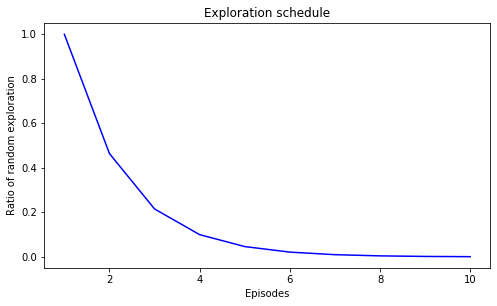

In [3]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [4]:
Single_Cross_Straight_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, verbose = True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 48)           288         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 48)           2352        dense[0][0]                      
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 48)           2352        dense_1[0][0]                    
______________________________________________________________________________________________

In [5]:
Single_Cross_Straight_MultiDQN_Agents.prepopulate_memory()

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Straight.inpx ...
Model File load process successful.
Simulation length set to 3600 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 42
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links and Lanes.

Setting Simulation mode to: training
Starting Deployments of Signal Control Units...
SCUs successfully deploye

In [6]:
Single_Cross_Straight_MultiDQN_Agents.train(episodes)

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Straight.inpx ...
Model File load process successful.
Simulation length set to 3601 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 100
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links and Lanes.

Setting Simulation mode to: training
Starting Deployments of Signal Control Units...
SCUs successfully deploy

In [7]:
Single_Cross_Straight_MultiDQN_Agents.save()

Saving architecture, weights and optimizer state for agent-0
Dumping agent-0 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.


In [8]:
Single_Cross_Straight_MultiDQN_Agents.load(best = False)

Loading Pre-Trained Agent 0, Architecture, Optimizer and Memory.
Items successfully loaded.


In [12]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Straight_MultiDQN_Agents.test()

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Straight.inpx ...
Failed load attempt 1/5. Re-attempting.
Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Straight.inpx ...
Model File load process successful.
Simulation length set to 3601 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*

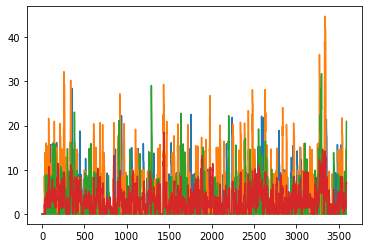

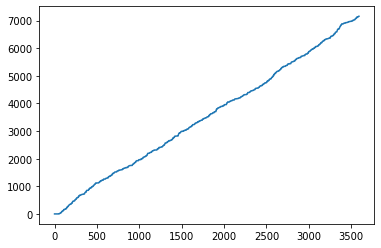

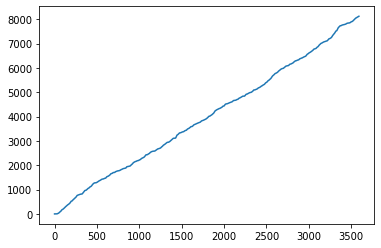

In [23]:
# To be arranged for multy agents and add legends...

queues = np.array(Episode_Queues[0])
queues = queues.T

delay = Cumulative_Episode_Delays[0]

# Plot the queues
plt.figure(1)
for queue in queues:
    plt.plot(queue)

# plot the junctions delays
plt.figure(2)
plt.plot(delay)

#plot the total delays 
plt.figure(3)
plt.plot(Cumulative_Totale_network_delay)

# Dont freak out the 2 delays are not the same because the node is not covering the all junction

# Single_Cross_Triple 4 actions AC

In [2]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 2000

# all controller actions
Single_Cross_Triple_dictionary4 =\
{ 'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' :    {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
         
         'all_actions' :       {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         'controled_by_com' : True,
         'green_time' : 10,
         'redamber_time' : 1,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' 
         },
        },
     'demand' : { 'default' : [400, 400, 400, 400]}
                  
}
 

In [3]:
env = environment(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

env.SCUs

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Triple.inpx ...
Failed load attempt 1/5. Re-attempting.
Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Triple.inpx ...
Model File load process successful.
Simulation length set to 2000 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*****

{0: <Vissim_SCU_class.Signal_Control_Unit at 0x23ae1a150f0>}

In [4]:
# not bad with the first model. need a fonction to decrease entropy now 

gamma = 0.85
alpha = 0.0005
ID = 0
value = 25
entropy = 5000
n_step_size = 11
state_size = [13]
reduce_entropy_every = 100
entropy_threshold = 0.5


# for the monitoring
horizon = 50
n_sample = 10

Agents = []

for idx, info in Single_Cross_Triple_dictionary4['junctions'].items():
        acts = info['default_actions']
        Agent = ACAgent(info['state_size'], len(acts), ID, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)

Deploying instance of Actor_Critic Agent(s) !!! TENSORFLOW 2 IS NEEDED !!! 
Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  896       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  588       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
__________________________________________________

In [5]:
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = int(Agents[idx].choose_action(s))


for i in range(30000):
    SARSDs = env.step_to_next_action(actions)
    
    actions = dict()
    for idx , sarsd in SARSDs.items():
        s,a,r,ns,d = sarsd

        print(sarsd)
        Agents[idx].remember(s,a,r,ns,d)
        if len(Agents[idx].memory) >= Agents[idx].n_step_size :
            Agents[idx].learn() 

        # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
        actions[idx] = int(Agents[idx].choose_action(ns))
        #print(actions)

        if (i+1)%reduce_entropy_every == 0:
            if Agents[idx].params['entropy'] >= entropy_threshold :
                Agents[idx].reduce_entropy()
                print ("Agent {} : Entropy reduced to {} " .format(idx, Agents[idx].params['entropy']))
        
    # For the saving , monitoring of the agent
    if env.done :
        env.reset()
        for idx, agent in enumerate(Agents):
            predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
            print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
            print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
            print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
            agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 0, -0.0, array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), False]
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 0, -119.6236847839247, array([[17.88320145, 17.88320145, 11.5145776 , 11.5145776 , 11.5145776 ,
         0.        ,  0.        ,  0.        , 12.9120321 , 12.9120321 ,
        12.9120321 , 10.57745279,  2.        ]]), False]
[array([[17.88320145, 17.88320145, 11.5145776 , 11.5145776 , 11.5145776 ,
         0.        ,  0.        ,  0.        , 12.9120321 , 12.9120321 ,
        12.9120321 , 10.57745279,  2.        ]]), 2, -214.85377619589468, array([[25.98640705, 25.98640705,  0.        ,  0.        ,  0.        ,
        30.56033999, 30.56033999, 30.56033999, 17.55792473, 17.55792473,
        17.55792473, 18.52616794,  1.        ]]), False]
[array([[25.98640705, 25.98640705,  0.        ,  0.        ,  0.        ,
        30.56033999, 30.56033999, 30.56033999, 17.55792473, 17.557924

[array([[  0.        ,   0.        ,  66.8160199 ,  66.8160199 ,
         66.8160199 , 151.06140044, 151.06140044, 151.06140044,
        125.12716971, 125.12716971, 125.12716971,  85.75114752,
          0.        ]]), 0, -1217.931681794667, array([[  0.        ,   0.        ,  93.11538907,  93.11538907,
         93.11538907, 150.69253231, 150.69253231, 150.69253231,
        130.9402884 , 130.9402884 , 130.9402884 ,  93.68705245,
          0.        ]]), False]
Train on 11 samples
11/11 - 0s - loss: 423070528.0000 - output_1_loss: -1.1793e+05 - output_2_loss: 423188448.0000
[array([[  0.        ,   0.        ,  93.11538907,  93.11538907,
         93.11538907, 150.69253231, 150.69253231, 150.69253231,
        130.9402884 , 130.9402884 , 130.9402884 ,  93.68705245,
          0.        ]]), 0, -1261.5533833284453, array([[  0.        ,   0.        ,  93.89900984,  93.89900984,
         93.89900984, 156.87030873, 156.87030873, 156.87030873,
        137.40095322, 137.40095322, 137.40095322, 

Train on 11 samples
11/11 - 0s - loss: 805571904.0000 - output_1_loss: -1.1562e+05 - output_2_loss: 805687488.0000
[array([[ 78.00531927,  78.00531927, 174.56828266, 174.56828266,
        174.56828266, 230.13456192, 230.13456192, 230.13456192,
          0.        ,   0.        ,   0.        , 120.67704096,
          3.        ]]), 3, -1540.5564674199516, array([[ 84.9208836 ,  84.9208836 , 175.86129352, 175.86129352,
        175.86129352, 239.36470012, 239.36470012, 239.36470012,
          0.        ,   0.        ,   0.        , 125.03671931,
          3.        ]]), False]
Train on 11 samples
11/11 - 0s - loss: 804194112.0000 - output_1_loss: 0.0000e+00 - output_2_loss: 804194112.0000
[array([[ 84.9208836 ,  84.9208836 , 175.86129352, 175.86129352,
        175.86129352, 239.36470012, 239.36470012, 239.36470012,
          0.        ,   0.        ,   0.        , 125.03671931,
          3.        ]]), 3, -1614.6700817018989, array([[ 89.12539441,  89.12539441, 187.70144725, 187.70144725,

[array([[176.11165286, 176.11165286, 251.20230365, 251.20230365,
        251.20230365, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 170.50989915,
          3.        ]]), 3, -2104.791295654928, array([[193.14532825, 193.14532825, 259.18645441, 259.18645441,
        259.18645441, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 176.76435569,
          3.        ]]), False]
Train on 11 samples
11/11 - 0s - loss: 1431602688.0000 - output_1_loss: 0.0000e+00 - output_2_loss: 1431602688.0000
[array([[193.14532825, 193.14532825, 259.18645441, 259.18645441,
        259.18645441, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 176.76435569,
          3.        ]]), 3, -2104.747236246848, array([[194.63047742, 194.63047742, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 

Train on 11 samples
11/11 - 0s - loss: 1692773888.0000 - output_1_loss: 0.0000e+00 - output_2_loss: 1692773888.0000
[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), False]
Train on 11 samples
11/11 - 0s - loss: 1691899520.0000 - output_1_loss: 0.0000e+00 - output_2_loss: 1691899520.0000
[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.144717

[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), False]
Train on 11 samples
11/11 - 0s - loss: 1543811968.0000 - output_1_loss: 0.0000e+00 - output_2_loss: 1543811968.0000
[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        

Train on 11 samples
11/11 - 0s - loss: 1357074816.0000 - output_1_loss: 0.0000e+00 - output_2_loss: 1357074816.0000
[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), False]
Train on 11 samples
11/11 - 0s - loss: 1342242688.0000 - output_1_loss: 0.0000e+00 - output_2_loss: 1342242688.0000
[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.144717

[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), False]
Train on 11 samples
11/11 - 0s - loss: 1090007808.0000 - output_1_loss: 0.0000e+00 - output_2_loss: 1090007808.0000
[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        

[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), False]
Train on 11 samples
11/11 - 0s - loss: 774266880.0000 - output_1_loss: 0.0000e+00 - output_2_loss: 774266880.0000
[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 

[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), False]
Train on 11 samples
11/11 - 0s - loss: 506083552.0000 - output_1_loss: 0.0000e+00 - output_2_loss: 506083552.0000
[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 

Train on 11 samples
11/11 - 0s - loss: 290510944.0000 - output_1_loss: 0.0000e+00 - output_2_loss: 290510944.0000
[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), False]
Train on 11 samples
11/11 - 0s - loss: 276816064.0000 - output_1_loss: 0.0000e+00 - output_2_loss: 276816064.0000
[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,


[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), False]
Train on 11 samples
11/11 - 0s - loss: 117190776.0000 - output_1_loss: 0.0000e+00 - output_2_loss: 117190776.0000
[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 

[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), False]
Train on 11 samples
11/11 - 0s - loss: 24175770.0000 - output_1_loss: 0.0000e+00 - output_2_loss: 24175770.0000
[array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 191.62278714,
          3.        ]]), 3, -2237.4754418213097, array([[253.62079101, 253.62079101, 258.14471748, 258.14471748,
        258.14471748, 254.72564008, 254.72564008, 254.72564008,
          0.        ,   0.        ,   0.        , 19

[array([[ 85.07391604,  85.07391604, 110.72903171, 110.72903171,
        110.72903171,  94.89786243,  94.89786243,  94.89786243,
          0.        ,   0.        ,   0.        ,  72.67520255,
          3.        ]]), 3, -898.8194531792108, array([[ 94.00536925,  94.00536925, 115.87467091, 115.87467091,
        115.87467091,  95.60452059,  95.60452059,  95.60452059,
          0.        ,   0.        ,   0.        ,  76.37114019,
          3.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: 94152981.5000 - output_1_loss: -2.1705e+03 - output_2_loss: 100649936.0000
[array([[ 94.00536925,  94.00536925, 115.87467091, 115.87467091,
        115.87467091,  95.60452059,  95.60452059,  95.60452059,
          0.        ,   0.        ,   0.        ,  76.37114019,
          3.        ]]), 3, -1044.977330214302, array([[ 98.59058337,  98.59058337, 135.95299028, 135.95299028,
        135.95299028, 108.12717755, 108.12717755, 108.12717755,
          9.19629914,   9.19629914,   9.19629914,  8

27/27 - 0s - loss: 60266642.0741 - output_1_loss: -1.2061e+05 - output_2_loss: 63676192.0000
[array([[172.53323143, 172.53323143,   0.        ,   0.        ,
          0.        , 165.55577248, 165.55577248, 165.55577248,
         84.16221978,  84.16221978,  84.16221978, 105.56280592,
          1.        ]]), 1, -1220.8828006778324, array([[181.91081148, 181.91081148,   0.        ,   0.        ,
          0.        , 165.55577248, 165.55577248, 165.55577248,
         84.16221978,  84.16221978,  84.16221978, 107.90720094,
          1.        ]]), False]
Train on 28 samples
28/28 - 0s - loss: 56678514.5000 - output_1_loss: -1.2626e+05 - output_2_loss: 52574612.0000
[array([[181.91081148, 181.91081148,   0.        ,   0.        ,
          0.        , 165.55577248, 165.55577248, 165.55577248,
         84.16221978,  84.16221978,  84.16221978, 107.90720094,
          1.        ]]), 1, -1227.537152568887, array([[178.32282349, 178.32282349,   0.        ,   0.        ,
          0.        , 1

[array([[238.67783515, 238.67783515,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        196.56170234, 196.56170234, 196.56170234, 172.54001754,
          1.        ]]), 1, -2040.455964979315, array([[254.05739856, 254.05739856,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        197.02618062, 197.02618062, 197.02618062, 176.50102796,
          1.        ]]), False]
Train on 42 samples
42/42 - 0s - loss: 37247939.1429 - output_1_loss: -1.3056e+05 - output_2_loss: 36666588.0000
[array([[254.05739856, 254.05739856,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        197.02618062, 197.02618062, 197.02618062, 176.50102796,
          1.        ]]), 1, -2019.483470604175, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        190.79398296, 190.79398296, 190.79398296, 174

[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), False]
Train on 57 samples
57/57 - 0s - loss: 30729589.6316 - output_1_loss: -4.0349e+05 - output_2_loss: 40242644.0000
[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 1

[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), False]
Train on 72 samples
72/72 - 0s - loss: 22257602.1562 - output_1_loss: -7.7815e+05 - output_2_loss: 27156516.0000
[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 1

[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), False]
Train on 87 samples
87/87 - 0s - loss: 16563860.4368 - output_1_loss: -1.8159e+06 - output_2_loss: 18537788.0000
[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 1

[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), False]
Train on 102 samples
102/102 - 0s - loss: 12106399.7169 - output_1_loss: -3.0303e+06 - output_2_loss: 14455342.0000
[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739

[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), False]
Train on 117 samples
117/117 - 0s - loss: 6444780.4850 - output_1_loss: -6.9147e+06 - output_2_loss: 12909897.0000
[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739,

128/128 - 0s - loss: 751580.8545 - output_1_loss: -1.0744e+07 - output_2_loss: 11830311.0000
[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), False]
Train on 129 samples
129/129 - 0s - loss: -2.8408e+05 - output_1_loss: -1.2494e+07 - output_2_loss: 12488108.0000
[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        ,

[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), False]
Train on 143 samples
143/143 - 0s - loss: -9.0329e+06 - output_1_loss: -1.9336e+07 - output_2_loss: 10302657.0000
[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 

[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), False]
Train on 158 samples
158/158 - 0s - loss: -2.1362e+07 - output_1_loss: -2.9096e+07 - output_2_loss: 9834668.0000
[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 1

[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), False]
Train on 173 samples
173/173 - 0s - loss: -3.0550e+07 - output_1_loss: -3.8263e+07 - output_2_loss: 7589328.0000
[array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 190.37432833,
          1.        ]]), 1, -2221.1279149963775, array([[253.73835323, 253.73835323,   0.        ,   0.        ,
          0.        , 254.92053268, 254.92053268, 254.92053268,
        252.83842739, 252.83842739, 252.83842739, 1

[array([[99.85051529, 99.85051529,  0.        ,  0.        ,  0.        ,
        99.72907252, 99.72907252, 99.72907252, 57.19308239, 57.19308239,
        57.19308239, 64.19316755,  1.        ]]), 1, -781.7649399457704, array([[ 99.85051529,  99.85051529,   0.        ,   0.        ,
          0.        , 107.44937646, 107.44937646, 107.44937646,
         63.96640216,  63.96640216,  63.96640216,  67.81657348,
          1.        ]]), False]
[array([[ 99.85051529,  99.85051529,   0.        ,   0.        ,
          0.        , 107.44937646, 107.44937646, 107.44937646,
         63.96640216,  63.96640216,  63.96640216,  67.81657348,
          1.        ]]), 1, -898.1083284805889, array([[ 99.85051529,  99.85051529,   0.        ,   0.        ,
          0.        , 113.54335406, 113.54335406, 113.54335406,
         93.67039027,  93.67039027,  93.67039027,  76.76606491,
          1.        ]]), False]
Train on 11 samples
11/11 - 0s - loss: 117342232.0000 - output_1_loss: -1.4431e+06 - output

[array([[157.30430418, 157.30430418,   0.        ,   0.        ,
          0.        , 164.93350176, 164.93350176, 164.93350176,
        178.62626854, 178.62626854, 178.62626854, 125.21601862,
          1.        ]]), 1, -1527.3093697955494, array([[176.89207309, 176.89207309,   0.        ,   0.        ,
          0.        , 164.93350176, 164.93350176, 164.93350176,
        182.54409988, 182.54409988, 182.54409988, 131.09241868,
          1.        ]]), False]
Train on 25 samples
25/25 - 0s - loss: 65688002.4200 - output_1_loss: -5.5139e+05 - output_2_loss: 52333524.0000
[array([[176.89207309, 176.89207309,   0.        ,   0.        ,
          0.        , 164.93350176, 164.93350176, 164.93350176,
        182.54409988, 182.54409988, 182.54409988, 131.09241868,
          1.        ]]), 1, -1542.4445791784851, array([[174.17200844, 174.17200844,   0.        ,   0.        ,
          0.        , 171.47361095, 171.47361095, 171.47361095,
        182.54409988, 182.54409988, 182.54409988, 1

Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  896       
_________________________________________________________________
value2 (Dense)               multiple                  4160      
_________________________________________________________________
value3 (Dense)               multiple                  2730      
_________________________________________________________________
value (Dense)                multiple                  43        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  588       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1806      
_________________________________________________________________
policy_logits3 (Dense)       multiple                  1806 

[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), False]
Train on 52 samples
52/52 - 0s - loss: 48936465.3077 - output_1_loss: -4.6484e+05 - output_2_loss: 49391920.0000
[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 1

Train on 66 samples
66/66 - 0s - loss: 47227132.3333 - output_1_loss: -3.8289e+05 - output_2_loss: 47610020.0000
[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), False]
Train on 67 samples
67/67 - 0s - loss: 47611206.9067 - output_1_loss: -3.3206e+05 - output_2_loss: 41915148.0000
[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
  

[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), False]
Train on 81 samples
81/81 - 0s - loss: 40646551.9753 - output_1_loss: -3.4156e+05 - output_2_loss: 39089952.0000
[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 1

[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), False]
Train on 96 samples
96/96 - 0s - loss: 35540214.8542 - output_1_loss: -3.5978e+05 - output_2_loss: 36455308.0000
[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 1

[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), False]
Train on 111 samples
111/111 - 0s - loss: 31851971.5878 - output_1_loss: -3.5157e+05 - output_2_loss: 29878688.0000
[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022

[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), False]
Train on 126 samples
126/126 - 0s - loss: 26696358.6508 - output_1_loss: -3.8383e+05 - output_2_loss: 27327806.0000
[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022

[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), False]
Train on 140 samples
140/140 - 0s - loss: 25002391.6464 - output_1_loss: -4.2177e+05 - output_2_loss: 25171116.0000
[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022

[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), False]
Train on 155 samples
155/155 - 0s - loss: 21489006.2528 - output_1_loss: -4.3447e+05 - output_2_loss: 20624220.0000
[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022

[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), False]
Train on 170 samples
170/170 - 0s - loss: 18957940.1426 - output_1_loss: -7.9111e+05 - output_2_loss: 22154948.0000
[array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022, 190.76912266,
          1.        ]]), 1, -2227.8112392227317, array([[252.1873554 , 252.1873554 ,   0.        ,   0.        ,
          0.        , 256.37719503, 256.37719503, 256.37719503,
        254.51194022, 254.51194022, 254.51194022

[array([[26.81876946, 26.81876946,  0.        ,  0.        ,  0.        ,
        12.04970554, 12.04970554, 12.04970554,  4.97884498,  4.97884498,
         4.97884498, 10.96182999,  1.        ]]), 1, -129.6120274656643, array([[27.37488544, 27.37488544,  0.        ,  0.        ,  0.        ,
        12.04970554, 12.04970554, 12.04970554,  8.87907453,  8.87907453,
         8.87907453, 12.07591638,  1.        ]]), False]
[array([[27.37488544, 27.37488544,  0.        ,  0.        ,  0.        ,
        12.04970554, 12.04970554, 12.04970554,  8.87907453,  8.87907453,
         8.87907453, 12.07591638,  1.        ]]), 1, -172.27046325813205, array([[33.42092472, 33.42092472,  0.        ,  0.        ,  0.        ,
        18.25025679, 18.25025679, 18.25025679, 11.61847633, 11.61847633,
        11.61847633, 15.82241446,  1.        ]]), False]
[array([[33.42092472, 33.42092472,  0.        ,  0.        ,  0.        ,
        18.25025679, 18.25025679, 18.25025679, 11.61847633, 11.61847633,
      

[array([[75.66210221, 75.66210221,  0.        ,  0.        ,  0.        ,
        87.25797043, 87.25797043, 87.25797043, 79.02749113, 79.02749113,
        79.02749113, 60.48689094,  1.        ]]), 1, -722.685880367665, array([[77.4710652 , 77.4710652 ,  0.        ,  0.        ,  0.        ,
        87.25797043, 87.25797043, 87.25797043, 81.47310147, 81.47310147,
        81.47310147, 61.55053427,  1.        ]]), False]
Train on 23 samples
23/23 - 0s - loss: 7189592.4810 - output_1_loss: -9.0292e+05 - output_2_loss: 6073879.5000
[array([[77.4710652 , 77.4710652 ,  0.        ,  0.        ,  0.        ,
        87.25797043, 87.25797043, 87.25797043, 81.47310147, 81.47310147,
        81.47310147, 61.55053427,  1.        ]]), 1, -759.0741977660143, array([[93.64365071, 93.64365071,  0.        ,  0.        ,  0.        ,
        87.25797043, 87.25797043, 87.25797043, 81.47310147, 81.47310147,
        81.47310147, 65.59368065,  1.        ]]), False]
Train on 24 samples
24/24 - 0s - loss: 76138

[array([[141.43849029, 141.43849029,   0.        ,   0.        ,
          0.        , 143.97190624, 143.97190624, 143.97190624,
        141.20574938, 141.20574938, 141.20574938, 106.65403648,
          1.        ]]), 1, -1248.3275822305457, array([[141.43849029, 141.43849029,   0.        ,   0.        ,
          0.        , 144.97609033, 144.97609033, 144.97609033,
        141.20574938, 141.20574938, 141.20574938, 106.9050825 ,
          1.        ]]), False]
Train on 38 samples
38/38 - 0s - loss: 5710256.5921 - output_1_loss: -7.3040e+05 - output_2_loss: 6048656.0000
[array([[141.43849029, 141.43849029,   0.        ,   0.        ,
          0.        , 144.97609033, 144.97609033, 144.97609033,
        141.20574938, 141.20574938, 141.20574938, 106.9050825 ,
          1.        ]]), 1, -1261.0131134539636, array([[147.07650417, 147.07650417,   0.        ,   0.        ,
          0.        , 144.97609033, 144.97609033, 144.97609033,
        141.20574938, 141.20574938, 141.20574938, 108

[array([[159.73283091, 159.73283091,   0.        ,   0.        ,
          0.        , 164.2937204 , 164.2937204 , 164.2937204 ,
        147.07464221, 147.07464221, 147.07464221, 117.77529838,
          1.        ]]), 1, -1371.3460480284796, array([[159.73283091, 159.73283091,   0.        ,   0.        ,
          0.        , 164.2937204 , 164.2937204 , 164.2937204 ,
        147.07464221, 147.07464221, 147.07464221, 117.77529838,
          1.        ]]), False]
Train on 53 samples
53/53 - 0s - loss: 10757688.7642 - output_1_loss: -6.3838e+05 - output_2_loss: 11477530.0000
[array([[159.73283091, 159.73283091,   0.        ,   0.        ,
          0.        , 164.2937204 , 164.2937204 , 164.2937204 ,
        147.07464221, 147.07464221, 147.07464221, 117.77529838,
          1.        ]]), 1, -1382.964299918462, array([[161.71050465, 161.71050465,   0.        ,   0.        ,
          0.        , 166.49940839, 166.49940839, 166.49940839,
        147.07464221, 147.07464221, 147.07464221, 11

[array([[193.26185584, 193.26185584,   0.        ,   0.        ,
          0.        , 182.58204418, 182.58204418, 182.58204418,
        156.91055349, 156.91055349, 156.91055349, 133.18861338,
          1.        ]]), 1, -1550.8406363433508, array([[192.88420336, 192.88420336,   0.        ,   0.        ,
          0.        , 182.58204418, 182.58204418, 182.58204418,
        161.06447237, 161.06447237, 161.06447237, 134.13267998,
          1.        ]]), False]
Train on 68 samples
68/68 - 0s - loss: 11967915.3309 - output_1_loss: -5.0447e+05 - output_2_loss: 12539810.0000
[array([[192.88420336, 192.88420336,   0.        ,   0.        ,
          0.        , 182.58204418, 182.58204418, 182.58204418,
        161.06447237, 161.06447237, 161.06447237, 134.13267998,
          1.        ]]), 1, -1555.0091842685092, array([[194.50960472, 194.50960472,   0.        ,   0.        ,
          0.        , 184.09979634, 184.09979634, 184.09979634,
        159.70407248, 159.70407248, 159.70407248, 1

[array([[234.50063054, 234.50063054,   0.        ,   0.        ,
          0.        , 247.47176487, 247.47176487, 247.47176487,
        198.36264575, 198.36264575, 198.36264575, 170.08376029,
          1.        ]]), 1, -1958.6839020272798, array([[233.36401986, 233.36401986,   0.        ,   0.        ,
          0.        , 241.67766315, 241.67766315, 241.67766315,
        199.43460065, 199.43460065, 199.43460065, 168.61907091,
          1.        ]]), False]
Train on 83 samples
83/83 - 0s - loss: 8827672.5392 - output_1_loss: -4.8912e+05 - output_2_loss: 9368390.0000
[array([[233.36401986, 233.36401986,   0.        ,   0.        ,
          0.        , 241.67766315, 241.67766315, 241.67766315,
        199.43460065, 199.43460065, 199.43460065, 168.61907091,
          1.        ]]), 1, -1985.4117843771448, array([[231.70404296, 231.70404296,   0.        ,   0.        ,
          0.        , 247.31811096, 247.31811096, 247.31811096,
        203.16733142, 203.16733142, 203.16733142, 170

[array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        226.70020369, 226.70020369, 226.70020369, 184.15073217,
          1.        ]]), 1, -2152.1934195423873, array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        231.02839619, 231.02839619, 231.02839619, 185.2327803 ,
          1.        ]]), False]
Train on 98 samples
98/98 - 0s - loss: 8199962.7194 - output_1_loss: -4.8269e+05 - output_2_loss: 8671557.0000
[array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        231.02839619, 231.02839619, 231.02839619, 185.2327803 ,
          1.        ]]), 1, -2152.1934195423873, array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        231.02839619, 231.02839619, 231.02839619, 185

[array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 191.15451827,
          1.        ]]), 1, -2229.1760131782717, array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 191.15451827,
          1.        ]]), False]
Train on 113 samples
113/113 - 0s - loss: 7070018.5973 - output_1_loss: -1.0784e+06 - output_2_loss: 8153917.0000
[array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 191.15451827,
          1.        ]]), 1, -2229.1760131782717, array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 

[array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 191.15451827,
          1.        ]]), 1, -2229.1760131782717, array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 191.15451827,
          1.        ]]), False]
Train on 128 samples
128/128 - 0s - loss: 6278686.2969 - output_1_loss: -4.3199e+05 - output_2_loss: 6661732.0000
[array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 191.15451827,
          1.        ]]), 1, -2229.1760131782717, array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 

[array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 191.15451827,
          1.        ]]), 1, -2229.1760131782717, array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 191.15451827,
          1.        ]]), False]
Train on 143 samples
143/143 - 0s - loss: 5287538.7067 - output_1_loss: -4.3505e+05 - output_2_loss: 5722586.5000
[array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 191.15451827,
          1.        ]]), 1, -2229.1760131782717, array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 

[array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 191.15451827,
          1.        ]]), 1, -2229.1760131782717, array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 191.15451827,
          1.        ]]), False]
Train on 158 samples
158/158 - 0s - loss: 4822931.0688 - output_1_loss: -4.1008e+05 - output_2_loss: 5392461.5000
[array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 191.15451827,
          1.        ]]), 1, -2229.1760131782717, array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 

[array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 191.15451827,
          1.        ]]), 1, -2229.1760131782717, array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 191.15451827,
          1.        ]]), False]
Train on 173 samples
173/173 - 0s - loss: 4190809.9427 - output_1_loss: -4.1117e+05 - output_2_loss: 4563429.0000
[array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 191.15451827,
          1.        ]]), 1, -2229.1760131782717, array([[255.83272434, 255.83272434,   0.        ,   0.        ,
          0.        , 254.07000066, 254.07000066, 254.07000066,
        254.71534808, 254.71534808, 254.71534808, 

[array([[12.12871712, 12.12871712,  0.        ,  0.        ,  0.        ,
        30.32216553, 30.32216553, 30.32216553, 19.74394628, 19.74394628,
        19.74394628, 15.54870723,  1.        ]]), 1, -254.4322020415349, array([[25.38194152, 25.38194152,  0.        ,  0.        ,  0.        ,
        39.12037898, 39.12037898, 39.12037898, 21.59433906, 21.59433906,
        21.59433906, 21.52416489,  1.        ]]), False]
[array([[25.38194152, 25.38194152,  0.        ,  0.        ,  0.        ,
        39.12037898, 39.12037898, 39.12037898, 21.59433906, 21.59433906,
        21.59433906, 21.52416489,  1.        ]]), 1, -261.6813086337395, array([[25.01977578, 25.01977578,  0.        ,  0.        ,  0.        ,
        37.33296879, 37.33296879, 37.33296879, 25.86297371, 25.86297371,
        25.86297371, 22.05392957,  1.        ]]), False]
Train on 11 samples
11/11 - 0s - loss: -1.7534e+06 - output_1_loss: -4.1518e+06 - output_2_loss: 2398337.0000
[array([[25.01977578, 25.01977578,  0.      

[array([[73.15012465, 73.15012465,  0.        ,  0.        ,  0.        ,
        87.82100973, 87.82100973, 87.82100973, 60.65654309, 60.65654309,
        60.65654309, 55.40691937,  1.        ]]), 1, -689.1868695923192, array([[81.19867007, 81.19867007,  0.        ,  0.        ,  0.        ,
        95.18649135, 95.18649135, 95.18649135, 60.65654309, 60.65654309,
        60.65654309, 59.26042613,  1.        ]]), False]
Train on 26 samples
26/26 - 0s - loss: 2174987.2308 - output_1_loss: -1.7942e+06 - output_2_loss: 3752633.7500
[array([[81.19867007, 81.19867007,  0.        ,  0.        ,  0.        ,
        95.18649135, 95.18649135, 95.18649135, 60.65654309, 60.65654309,
        60.65654309, 59.26042613,  1.        ]]), 1, -732.1026389494775, array([[100.27234534, 100.27234534,   0.        ,   0.        ,
          0.        ,  95.18649135,  95.18649135,  95.18649135,
         60.65654309,  60.65654309,  60.65654309,  64.02884495,
          1.        ]]), False]
Train on 27 samples
27

          1.        ]]), False]
Train on 40 samples
40/40 - 0s - loss: 1204161.5437 - output_1_loss: -1.8574e+06 - output_2_loss: 2702188.0000
[array([[127.69365266, 127.69365266,   0.        ,   0.        ,
          0.        , 138.68010989, 138.68010989, 138.68010989,
         86.43089247,  86.43089247,  86.43089247,  88.20116375,
          1.        ]]), 1, -1047.1230491170259, array([[129.77058807, 129.77058807,   0.        ,   0.        ,
          0.        , 145.9196386 , 145.9196386 , 145.9196386 ,
         86.43089247,  86.43089247,  86.43089247,  90.53027978,
          1.        ]]), False]
Train on 41 samples
41/41 - 0s - loss: 676283.1311 - output_1_loss: -1.3998e+06 - output_2_loss: 2135095.0000
[array([[129.77058807, 129.77058807,   0.        ,   0.        ,
          0.        , 145.9196386 , 145.9196386 , 145.9196386 ,
         86.43089247,  86.43089247,  86.43089247,  90.53027978,
          1.        ]]), 1, -1046.8690411182401, array([[129.77058807, 129.77058807,   0

[array([[152.52132438, 152.52132438,   0.        ,   0.        ,
          0.        , 158.81935539, 158.81935539, 158.81935539,
        106.76708547, 106.76708547, 106.76708547, 104.52694131,
          1.        ]]), 1, -1241.5099555826787, array([[152.52132438, 152.52132438,   0.        ,   0.        ,
          0.        , 158.81935539, 158.81935539, 158.81935539,
        117.59202176, 117.59202176, 117.59202176, 107.23317538,
          1.        ]]), False]
Train on 55 samples
55/55 - 0s - loss: 767002.8250 - output_1_loss: -1.1611e+06 - output_2_loss: 1928104.0000
[array([[152.52132438, 152.52132438,   0.        ,   0.        ,
          0.        , 158.81935539, 158.81935539, 158.81935539,
        117.59202176, 117.59202176, 117.59202176, 107.23317538,
          1.        ]]), 1, -1231.3829118228398, array([[152.52132438, 152.52132438,   0.        ,   0.        ,
          0.        , 158.81935539, 158.81935539, 158.81935539,
        114.47600829, 114.47600829, 114.47600829, 106.

          1.        ]]), False]
Train on 69 samples
69/69 - 0s - loss: 1388533.9239 - output_1_loss: -8.4330e+05 - output_2_loss: 2222009.5000
[array([[192.44863589, 192.44863589,   0.        ,   0.        ,
          0.        , 181.78973753, 181.78973753, 181.78973753,
        165.04758027, 165.04758027, 165.04758027, 134.82148842,
          1.        ]]), 1, -1555.6023132277312, array([[191.31068686, 191.31068686,   0.        ,   0.        ,
          0.        , 180.0535632 , 180.0535632 , 180.0535632 ,
        166.14744227, 166.14744227, 166.14744227, 134.37792308,
          1.        ]]), False]
Train on 70 samples
70/70 - 0s - loss: 1683863.8429 - output_1_loss: -8.4648e+05 - output_2_loss: 2444338.5000
[array([[191.31068686, 191.31068686,   0.        ,   0.        ,
          0.        , 180.0535632 , 180.0535632 , 180.0535632 ,
        166.14744227, 166.14744227, 166.14744227, 134.37792308,
          1.        ]]), 1, -1617.6576374941262, array([[191.31068686, 191.31068686,   

[array([[203.47314137, 203.47314137,   0.        ,   0.        ,
          0.        , 224.61106613, 224.61106613, 224.61106613,
        203.39963079, 203.39963079, 203.39963079, 157.87095957,
          1.        ]]), 1, -1867.768500040193, array([[203.47314137, 203.47314137,   0.        ,   0.        ,
          0.        , 224.61106613, 224.61106613, 224.61106613,
        209.22091294, 209.22091294, 209.22091294, 159.32628011,
          1.        ]]), False]
Train on 84 samples
84/84 - 0s - loss: 1190497.6562 - output_1_loss: -1.0494e+06 - output_2_loss: 2189807.7500
[array([[203.47314137, 203.47314137,   0.        ,   0.        ,
          0.        , 224.61106613, 224.61106613, 224.61106613,
        209.22091294, 209.22091294, 209.22091294, 159.32628011,
          1.        ]]), 1, -1884.7761738270403, array([[203.47314137, 203.47314137,   0.        ,   0.        ,
          0.        , 228.26437608, 228.26437608, 228.26437608,
        210.80073338, 210.80073338, 210.80073338, 160.

[array([[249.38724229, 249.38724229,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        247.07061101, 247.07061101, 247.07061101, 187.95832942,
          1.        ]]), 1, -2165.328240759722, array([[242.54843914, 242.54843914,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        242.96122874, 242.96122874, 242.96122874, 185.22128307,
          1.        ]]), False]
Train on 99 samples
99/99 - 0s - loss: 1356433.4097 - output_1_loss: -7.3255e+05 - output_2_loss: 2088985.3750
[array([[242.54843914, 242.54843914,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        242.96122874, 242.96122874, 242.96122874, 185.22128307,
          1.        ]]), 1, -2180.1098436184907, array([[242.44970181, 242.44970181,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        247.57777085, 247.57777085, 247.57777085, 186.

[array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 191.03382078,
          1.        ]]), 1, -2228.935789775178, array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 191.03382078,
          1.        ]]), False]
Train on 114 samples
114/114 - 0s - loss: 2267317.5789 - output_1_loss: -6.3081e+05 - output_2_loss: 2919397.7500
[array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 191.03382078,
          1.        ]]), 1, -2228.935789775178, array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 19

[array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 191.03382078,
          1.        ]]), 1, -2228.935789775178, array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 191.03382078,
          1.        ]]), False]
Train on 129 samples
129/129 - 0s - loss: 2266043.2064 - output_1_loss: -5.9741e+05 - output_2_loss: 2884696.2500
[array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 191.03382078,
          1.        ]]), 1, -2228.935789775178, array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 19

[array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 191.03382078,
          1.        ]]), 1, -2228.935789775178, array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 191.03382078,
          1.        ]]), False]
Train on 144 samples
144/144 - 0s - loss: 2280359.9514 - output_1_loss: -5.2918e+05 - output_2_loss: 3120946.2500
[array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 191.03382078,
          1.        ]]), 1, -2228.935789775178, array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 19

[array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 191.03382078,
          1.        ]]), 1, -2228.935789775178, array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 191.03382078,
          1.        ]]), False]
Train on 159 samples
159/159 - 0s - loss: 2210010.0220 - output_1_loss: -5.1463e+05 - output_2_loss: 2728851.2500
[array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 191.03382078,
          1.        ]]), 1, -2228.935789775178, array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 19

[array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 191.03382078,
          1.        ]]), 1, -2228.935789775178, array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 191.03382078,
          1.        ]]), False]
Train on 174 samples
174/174 - 0s - loss: 2150517.7349 - output_1_loss: -4.9527e+05 - output_2_loss: 2648894.5000
[array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 191.03382078,
          1.        ]]), 1, -2228.935789775178, array([[254.50388035, 254.50388035,   0.        ,   0.        ,
          0.        , 255.3754644 , 255.3754644 , 255.3754644 ,
        254.25593837, 254.25593837, 254.25593837, 19

[array([[51.39100435, 51.39100435,  0.        ,  0.        ,  0.        ,
        35.13211729, 35.13211729, 35.13211729, 36.24220939, 36.24220939,
        36.24220939, 30.69133276,  1.        ]]), 1, -363.13512291828357, array([[50.95970758, 50.95970758,  0.        ,  0.        ,  0.        ,
        35.13211729, 35.13211729, 35.13211729, 41.32196913, 41.32196913,
        41.32196913, 31.8534485 ,  1.        ]]), False]
Train on 12 samples
12/12 - 0s - loss: -1.2673e+07 - output_1_loss: -8.5541e+06 - output_2_loss: 1788179.8750
[array([[50.95970758, 50.95970758,  0.        ,  0.        ,  0.        ,
        35.13211729, 35.13211729, 35.13211729, 41.32196913, 41.32196913,
        41.32196913, 31.8534485 ,  1.        ]]), 1, -371.5587417227722, array([[54.70353816, 54.70353816,  0.        ,  0.        ,  0.        ,
        35.13211729, 35.13211729, 35.13211729, 41.32196913, 41.32196913,
        41.32196913, 32.78940614,  1.        ]]), False]
Train on 13 samples
13/13 - 0s - loss: -1.1

          1.        ]]), False]
Train on 27 samples
27/27 - 0s - loss: -5.0397e+06 - output_1_loss: -1.0554e+07 - output_2_loss: 3071768.2500
[array([[132.89344313, 132.89344313,   0.        ,   0.        ,
          0.        ,  65.83881182,  65.83881182,  65.83881182,
         80.38504811,  80.38504811,  80.38504811,  69.77932576,
          1.        ]]), 1, -774.2377610387776, array([[132.89342945, 132.89342945,   0.        ,   0.        ,
          0.        ,  65.83881182,  65.83881182,  65.83881182,
         80.38504811,  80.38504811,  80.38504811,  69.77932235,
          1.        ]]), False]
Train on 28 samples
28/28 - 0s - loss: -4.1968e+06 - output_1_loss: -6.1988e+06 - output_2_loss: 2880510.2500
[array([[132.89342945, 132.89342945,   0.        ,   0.        ,
          0.        ,  65.83881182,  65.83881182,  65.83881182,
         80.38504811,  80.38504811,  80.38504811,  69.77932235,
          1.        ]]), 1, -807.909844921094, array([[132.89342945, 132.89342945,   0.   

[array([[149.79050393, 149.79050393,   0.        ,   0.        ,
          0.        , 139.55333417, 139.55333417, 139.55333417,
        107.38384182, 107.38384182, 107.38384182,  99.18191998,
          1.        ]]), 1, -1169.873907862021, array([[149.79050393, 149.79050393,   0.        ,   0.        ,
          0.        , 142.34218187, 142.34218187, 142.34218187,
        113.91790244, 113.91790244, 113.91790244, 101.51264706,
          1.        ]]), False]
Train on 43 samples
43/43 - 0s - loss: -2.1910e+06 - output_1_loss: -4.7079e+06 - output_2_loss: 2597013.7500
[array([[149.79050393, 149.79050393,   0.        ,   0.        ,
          0.        , 142.34218187, 142.34218187, 142.34218187,
        113.91790244, 113.91790244, 113.91790244, 101.51264706,
          1.        ]]), 1, -1182.9720696573231, array([[149.79050393, 149.79050393,   0.        ,   0.        ,
          0.        , 146.65824321, 146.65824321, 146.65824321,
        113.63204473, 113.63204473, 113.63204473, 102.5

[array([[180.13639895, 180.13639895,   0.        ,   0.        ,
          0.        , 146.65824321, 146.65824321, 146.65824321,
        161.70316955, 161.70316955, 161.70316955, 122.12445293,
          1.        ]]), 1, -1447.957854340059, array([[179.34661107, 179.34661107,   0.        ,   0.        ,
          0.        , 146.65824321, 146.65824321, 146.65824321,
        174.704212  , 174.704212  , 174.704212  , 125.17726657,
          1.        ]]), False]
Train on 58 samples
58/58 - 0s - loss: -2.1212e+06 - output_1_loss: -6.7671e+06 - output_2_loss: 1822739.8750
[array([[179.34661107, 179.34661107,   0.        ,   0.        ,
          0.        , 146.65824321, 146.65824321, 146.65824321,
        174.704212  , 174.704212  , 174.704212  , 125.17726657,
          1.        ]]), 1, -1490.0084384299528, array([[181.86090809, 181.86090809,   0.        ,   0.        ,
          0.        , 155.36731135, 155.36731135, 155.36731135,
        177.19311796, 177.19311796, 177.19311796, 128.6

[array([[235.38458257, 235.38458257,   0.        ,   0.        ,
          0.        , 184.63643719, 184.63643719, 184.63643719,
        204.26849591, 204.26849591, 204.26849591, 156.07237892,
          1.        ]]), 1, -1857.8505592808046, array([[239.43933111, 239.43933111,   0.        ,   0.        ,
          0.        , 191.81445482, 191.81445482, 191.81445482,
        214.06618035, 214.06618035, 214.06618035, 161.32999157,
          1.        ]]), False]
Train on 73 samples
73/73 - 0s - loss: -1.1077e+06 - output_1_loss: -2.8293e+06 - output_2_loss: 1923004.6250
[array([[239.43933111, 239.43933111,   0.        ,   0.        ,
          0.        , 191.81445482, 191.81445482, 191.81445482,
        214.06618035, 214.06618035, 214.06618035, 161.32999157,
          1.        ]]), 1, -1852.3181627628596, array([[239.34339368, 239.34339368,   0.        ,   0.        ,
          0.        , 190.19217392, 190.19217392, 190.19217392,
        214.05260361, 214.05260361, 214.05260361, 160.

[array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 217.40690313, 217.40690313, 217.40690313,
        242.68216492, 242.68216492, 242.68216492, 178.01436413,
          1.        ]]), 1, -2032.708835085634, array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 217.06478764, 217.06478764, 217.06478764,
        233.94443113, 233.94443113, 233.94443113, 175.74440181,
          1.        ]]), False]
Train on 88 samples
88/88 - 0s - loss: -9.0823e+05 - output_1_loss: -2.5616e+06 - output_2_loss: 1653343.3750
[array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 217.06478764, 217.06478764, 217.06478764,
        233.94443113, 233.94443113, 233.94443113, 175.74440181,
          1.        ]]), 1, -2032.708835085634, array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 217.06478764, 217.06478764, 217.06478764,
        233.94443113, 233.94443113, 233.94443113, 175.74

[array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 246.97366898, 246.97366898, 246.97366898,
        253.01983874, 253.01983874, 253.01983874, 187.99047405,
          1.        ]]), 1, -2191.9077742144473, array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 246.97366898, 246.97366898, 246.97366898,
        253.01983874, 253.01983874, 253.01983874, 187.99047405,
          1.        ]]), False]
Train on 103 samples
103/103 - 0s - loss: 206926.3271 - output_1_loss: -3.6424e+06 - output_2_loss: 2440808.7500
[array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 246.97366898, 246.97366898, 246.97366898,
        253.01983874, 253.01983874, 253.01983874, 187.99047405,
          1.        ]]), 1, -2217.340601244592, array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 254.79915422, 254.79915422, 254.79915422,
        253.01983874, 253.01983874, 253.01983874, 18

[array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190.47526579,
          1.        ]]), 1, -2224.210066759702, array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190.47526579,
          1.        ]]), False]
Train on 118 samples
118/118 - 0s - loss: 774804.1610 - output_1_loss: -2.0505e+06 - output_2_loss: 2918559.2500
[array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190.47526579,
          1.        ]]), 1, -2224.210066759702, array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190

[array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190.47526579,
          1.        ]]), 1, -2224.210066759702, array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190.47526579,
          1.        ]]), False]
Train on 133 samples
133/133 - 0s - loss: -4.8936e+04 - output_1_loss: -1.8134e+06 - output_2_loss: 2300525.2500
[array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190.47526579,
          1.        ]]), 1, -2224.210066759702, array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190

[array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190.47526579,
          1.        ]]), 1, -2224.210066759702, array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190.47526579,
          1.        ]]), False]
Train on 148 samples
148/148 - 0s - loss: 420956.0874 - output_1_loss: -2.5640e+06 - output_2_loss: 2192393.0000
[array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190.47526579,
          1.        ]]), 1, -2224.210066759702, array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190

[array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190.47526579,
          1.        ]]), 1, -2224.210066759702, array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190.47526579,
          1.        ]]), False]
Train on 163 samples
163/163 - 0s - loss: -4.7207e+05 - output_1_loss: -1.6818e+06 - output_2_loss: 1219725.5000
[array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190.47526579,
          1.        ]]), 1, -2224.210066759702, array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190

[array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190.47526579,
          1.        ]]), 1, -2224.210066759702, array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190.47526579,
          1.        ]]), False]
Train on 178 samples
178/178 - 0s - loss: -2.6740e+05 - output_1_loss: -1.5806e+06 - output_2_loss: 1370902.7500
[array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190.47526579,
          1.        ]]), 1, -2224.210066759702, array([[251.96838849, 251.96838849,   0.        ,   0.        ,
          0.        , 256.91283592, 256.91283592, 256.91283592,
        253.01983874, 253.01983874, 253.01983874, 190

[array([[36.93131132, 36.93131132,  0.        ,  0.        ,  0.        ,
        38.57396576, 38.57396576, 38.57396576, 42.55882045, 42.55882045,
        42.55882045, 29.51602438,  1.        ]]), 1, -362.09652976763783, array([[36.93131132, 36.93131132,  0.        ,  0.        ,  0.        ,
        43.28766549, 43.28766549, 43.28766549, 42.55882045, 42.55882045,
        42.55882045, 30.69444931,  1.        ]]), False]
Train on 15 samples
15/15 - 0s - loss: -8.9701e+06 - output_1_loss: -1.7890e+07 - output_2_loss: 746135.3750
[array([[36.93131132, 36.93131132,  0.        ,  0.        ,  0.        ,
        43.28766549, 43.28766549, 43.28766549, 42.55882045, 42.55882045,
        42.55882045, 30.69444931,  1.        ]]), 1, -427.46246397604244, array([[39.95891443, 39.95891443,  0.        ,  0.        ,  0.        ,
        45.68716682, 45.68716682, 45.68716682, 58.17588134, 58.17588134,
        58.17588134, 35.95549065,  1.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: -9.2

          1.        ]]), False]
Train on 30 samples
30/30 - 0s - loss: -4.5914e+06 - output_1_loss: -6.4394e+06 - output_2_loss: 1089507.8750
[array([[107.16024408, 107.16024408,   0.        ,   0.        ,
          0.        ,  82.79251193,  82.79251193,  82.79251193,
         92.03557857,  92.03557857,  92.03557857,  70.49708365,
          1.        ]]), 1, -851.7284450122763, array([[113.7539867 , 113.7539867 ,   0.        ,   0.        ,
          0.        ,  89.80586872,  89.80586872,  89.80586872,
         93.51166203,  93.51166203,  93.51166203,  74.26787936,
          1.        ]]), False]
Train on 31 samples
31/31 - 0s - loss: -4.6406e+06 - output_1_loss: -5.1982e+06 - output_2_loss: 898077.5000
[array([[113.7539867 , 113.7539867 ,   0.        ,   0.        ,
          0.        ,  89.80586872,  89.80586872,  89.80586872,
         93.51166203,  93.51166203,  93.51166203,  74.26787936,
          1.        ]]), 1, -851.7284450122763, array([[113.7539867 , 113.7539867 ,   0.   

[array([[149.34727496, 149.34727496,   0.        ,   0.        ,
          0.        , 132.28723758, 132.28723758, 132.28723758,
        116.16246924, 116.16246924, 116.16246924,  99.44924544,
          1.        ]]), 1, -1211.4300683706374, array([[153.00707166, 153.00707166,   0.        ,   0.        ,
          0.        , 142.04431869, 142.04431869, 142.04431869,
        124.77542196, 124.77542196, 124.77542196, 104.95670308,
          1.        ]]), False]
Train on 46 samples
46/46 - 0s - loss: -2.6218e+06 - output_1_loss: -2.9793e+06 - output_2_loss: 845788.5000
[array([[153.00707166, 153.00707166,   0.        ,   0.        ,
          0.        , 142.04431869, 142.04431869, 142.04431869,
        124.77542196, 124.77542196, 124.77542196, 104.95670308,
          1.        ]]), 1, -1228.1885065119575, array([[153.00596622, 153.00596622,   0.        ,   0.        ,
          0.        , 147.20193181, 147.20193181, 147.20193181,
        124.77501666, 124.77501666, 124.77501666, 106.2

[array([[170.43145733, 170.43145733,   0.        ,   0.        ,
          0.        , 160.81478531, 160.81478531, 160.81478531,
        150.83002831, 150.83002831, 150.83002831, 120.51906774,
          1.        ]]), 1, -1423.3418283455626, array([[170.43145733, 170.43145733,   0.        ,   0.        ,
          0.        , 166.87935066, 166.87935066, 166.87935066,
        153.08097222, 153.08097222, 153.08097222, 122.59794505,
          1.        ]]), False]
Train on 61 samples
61/61 - 0s - loss: -9.1955e+05 - output_1_loss: -2.4989e+06 - output_2_loss: 1789457.8750
[array([[170.43145733, 170.43145733,   0.        ,   0.        ,
          0.        , 166.87935066, 166.87935066, 166.87935066,
        153.08097222, 153.08097222, 153.08097222, 122.59794505,
          1.        ]]), 1, -1426.362705273074, array([[174.65014671, 174.65014671,   0.        ,   0.        ,
          0.        , 165.83220558, 165.83220558, 165.83220558,
        152.13698678, 152.13698678, 152.13698678, 123.1

[array([[221.49315979, 221.49315979,   0.        ,   0.        ,
          0.        , 173.36346274, 173.36346274, 173.36346274,
        170.224169  , 170.224169  , 170.224169  , 141.27019788,
          1.        ]]), 1, -1617.5216005710597, array([[222.6052433 , 222.6052433 ,   0.        ,   0.        ,
          0.        , 173.36346274, 173.36346274, 173.36346274,
        170.224169  , 170.224169  , 170.224169  , 141.54821876,
          1.        ]]), False]
Train on 76 samples
76/76 - 0s - loss: -9.3582e+05 - output_1_loss: -2.1116e+06 - output_2_loss: 1014419.1250
[array([[222.6052433 , 222.6052433 ,   0.        ,   0.        ,
          0.        , 173.36346274, 173.36346274, 173.36346274,
        170.224169  , 170.224169  , 170.224169  , 141.54821876,
          1.        ]]), 1, -1635.716839115153, array([[222.58522518, 222.58522518,   0.        ,   0.        ,
          0.        , 178.06882366, 178.06882366, 178.06882366,
        171.13120171, 171.13120171, 171.13120171, 142.9

[array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 198.39466296, 198.39466296, 198.39466296,
        198.3998485 , 198.3998485 , 198.3998485 , 162.80217365,
          1.        ]]), 1, -1895.0456722021665, array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 207.59663673, 207.59663673, 207.59663673,
        199.36144332, 199.36144332, 199.36144332, 165.34306579,
          1.        ]]), False]
Train on 91 samples
91/91 - 0s - loss: -3.5036e+05 - output_1_loss: -1.4251e+06 - output_2_loss: 1132136.6250
[array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 207.59663673, 207.59663673, 207.59663673,
        199.36144332, 199.36144332, 199.36144332, 165.34306579,
          1.        ]]), 1, -1912.7652306086666, array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 211.39142567, 211.39142567, 211.39142567,
        201.01882619, 201.01882619, 201.01882619, 166.

[array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 249.21503316, 249.21503316, 249.21503316,
        240.4410074 , 240.4410074 , 240.4410074 , 186.01755592,
          1.        ]]), 1, -2199.5752187897792, array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 246.09324279, 246.09324279, 246.09324279,
        254.5662362 , 254.5662362 , 254.5662362 , 188.76841553,
          1.        ]]), False]
Train on 106 samples
106/106 - 0s - loss: 371046.5905 - output_1_loss: -1.3086e+06 - output_2_loss: 1723340.2500
[array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 246.09324279, 246.09324279, 246.09324279,
        254.5662362 , 254.5662362 , 254.5662362 , 188.76841553,
          1.        ]]), 1, -2193.2902273155128, array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 249.39285934, 249.39285934, 249.39285934,
        249.33277613, 249.33277613, 249.33277613, 1

[array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 255.33967977, 255.33967977, 255.33967977,
        259.10424322, 259.10424322, 259.10424322, 192.21452653,
          1.        ]]), 1, -2244.3746617615634, array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 255.33967977, 255.33967977, 255.33967977,
        259.10424322, 259.10424322, 259.10424322, 192.21452653,
          1.        ]]), False]
Train on 121 samples
121/121 - 0s - loss: 169510.2045 - output_1_loss: -1.1160e+06 - output_2_loss: 1285488.8750
[array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 255.33967977, 255.33967977, 255.33967977,
        259.10424322, 259.10424322, 259.10424322, 192.21452653,
          1.        ]]), 1, -2244.3746617615634, array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 255.33967977, 255.33967977, 255.33967977,
        259.10424322, 259.10424322, 259.10424322, 1

[array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 255.33967977, 255.33967977, 255.33967977,
        259.10424322, 259.10424322, 259.10424322, 192.21452653,
          1.        ]]), 1, -2244.3746617615634, array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 255.33967977, 255.33967977, 255.33967977,
        259.10424322, 259.10424322, 259.10424322, 192.21452653,
          1.        ]]), False]
Train on 136 samples
136/136 - 0s - loss: 1217750.1066 - output_1_loss: -9.3610e+05 - output_2_loss: 2119748.2500
[array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 255.33967977, 255.33967977, 255.33967977,
        259.10424322, 259.10424322, 259.10424322, 192.21452653,
          1.        ]]), 1, -2244.3746617615634, array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 255.33967977, 255.33967977, 255.33967977,
        259.10424322, 259.10424322, 259.10424322, 

[array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 255.33967977, 255.33967977, 255.33967977,
        259.10424322, 259.10424322, 259.10424322, 192.21452653,
          1.        ]]), 1, -2244.3746617615634, array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 255.33967977, 255.33967977, 255.33967977,
        259.10424322, 259.10424322, 259.10424322, 192.21452653,
          1.        ]]), False]
Train on 151 samples
151/151 - 0s - loss: 702788.2661 - output_1_loss: -8.4331e+05 - output_2_loss: 1554330.1250
[array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 255.33967977, 255.33967977, 255.33967977,
        259.10424322, 259.10424322, 259.10424322, 192.21452653,
          1.        ]]), 1, -2244.3746617615634, array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 255.33967977, 255.33967977, 255.33967977,
        259.10424322, 259.10424322, 259.10424322, 1

[array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 255.33967977, 255.33967977, 255.33967977,
        259.10424322, 259.10424322, 259.10424322, 192.21452653,
          1.        ]]), 1, -2244.3746617615634, array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 255.33967977, 255.33967977, 255.33967977,
        259.10424322, 259.10424322, 259.10424322, 192.21452653,
          1.        ]]), False]
Train on 166 samples
166/166 - 0s - loss: 681782.4057 - output_1_loss: -6.8176e+05 - output_2_loss: 1475039.8750
[array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 255.33967977, 255.33967977, 255.33967977,
        259.10424322, 259.10424322, 259.10424322, 192.21452653,
          1.        ]]), 1, -2244.3746617615634, array([[254.41418313, 254.41418313,   0.        ,   0.        ,
          0.        , 255.33967977, 255.33967977, 255.33967977,
        259.10424322, 259.10424322, 259.10424322, 1

Agent 0 : Predicted Values and True Return : 
 [-14790.0, -3323.0, -9421.0, -9660.0, -12788.0, -13348.0, -10795.0, -7792.0, -8213.0, -6012.0] 
 [-14912.0, -8063.0, -14808.0, -14913.0, -14913.0, -14913.0, -14918.0, -13437.0, -14135.0, -9818.0]
Agent 0 : Proba distribution on those states : 
 [[0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0]]
Agent 0 : Proba distribution on the 0 state : 
 [0. 1. 0. 0.]
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 0, -0.0, array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), False]
[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 0, -75.16100472869604, array([[ 5.13042565,  5.13042565,  0.        ,  0.        ,  0.        ,
         9.00066538,  9.00066538,  9.00066538, 10.57396447, 10.57396447,
        10.57396447,  6.17626388,  1.        ]]),

[array([[53.65557322, 53.65557322,  0.        ,  0.        ,  0.        ,
        51.20850452, 51.20850452, 51.20850452, 49.24985089, 49.24985089,
        49.24985089, 38.52848216,  1.        ]]), 1, -461.6200019154684, array([[61.21545212, 61.21545212,  0.        ,  0.        ,  0.        ,
        50.40714439, 50.40714439, 50.40714439, 49.24985089, 49.24985089,
        49.24985089, 40.21811185,  1.        ]]), False]
Train on 19 samples
19/19 - 0s - loss: -4.6568e+06 - output_1_loss: -4.6952e+06 - output_2_loss: 796596.6250
[array([[61.21545212, 61.21545212,  0.        ,  0.        ,  0.        ,
        50.40714439, 50.40714439, 50.40714439, 49.24985089, 49.24985089,
        49.24985089, 40.21811185,  1.        ]]), 1, -476.63234334626185, array([[67.88760386, 67.88760386,  0.        ,  0.        ,  0.        ,
        50.40714439, 50.40714439, 50.40714439, 49.24985089, 49.24985089,
        49.24985089, 41.88614979,  1.        ]]), False]
Train on 20 samples
20/20 - 0s - loss: -4.56

          1.        ]]), False]
Train on 34 samples
34/34 - 0s - loss: -2.7852e+06 - output_1_loss: -2.9378e+06 - output_2_loss: 972542.0625
[array([[105.32029512, 105.32029512,   0.        ,   0.        ,
          0.        ,  77.11425979,  77.11425979,  77.11425979,
         62.08913518,  62.08913518,  62.08913518,  61.13092252,
          1.        ]]), 1, -704.3643737612574, array([[111.97926227, 111.97926227,   0.        ,   0.        ,
          0.        ,  77.11425979,  77.11425979,  77.11425979,
         62.08913518,  62.08913518,  62.08913518,  62.79566431,
          1.        ]]), False]
Train on 35 samples
35/35 - 0s - loss: -2.3383e+06 - output_1_loss: -2.5612e+06 - output_2_loss: 783179.6250
[array([[111.97926227, 111.97926227,   0.        ,   0.        ,
          0.        ,  77.11425979,  77.11425979,  77.11425979,
         62.08913518,  62.08913518,  62.08913518,  62.79566431,
          1.        ]]), 1, -729.0633303772947, array([[122.95657633, 122.95657633,   0.    

          1.        ]]), False]
Train on 49 samples
49/49 - 0s - loss: -1.9219e+06 - output_1_loss: -2.5055e+06 - output_2_loss: 870930.3125
[array([[147.85094931, 147.85094931,   0.        ,   0.        ,
          0.        , 129.6567886 , 129.6567886 , 129.6567886 ,
         86.1586613 ,  86.1586613 ,  86.1586613 ,  90.9165998 ,
          1.        ]]), 1, -1096.3000157178074, array([[147.85094931, 147.85094931,   0.        ,   0.        ,
          0.        , 141.89047548, 141.89047548, 141.89047548,
         93.07425676,  93.07425676,  93.07425676,  95.70392039,
          1.        ]]), False]
Train on 50 samples
50/50 - 0s - loss: -1.8777e+06 - output_1_loss: -2.6920e+06 - output_2_loss: 1046003.3750
[array([[147.85094931, 147.85094931,   0.        ,   0.        ,
          0.        , 141.89047548, 141.89047548, 141.89047548,
         93.07425676,  93.07425676,  93.07425676,  95.70392039,
          1.        ]]), 1, -1129.2863745110863, array([[152.27906594, 152.27906594,   0. 

[array([[180.1074885 , 180.1074885 ,   0.        ,   0.        ,
          0.        , 178.10143657, 178.10143657, 178.10143657,
        119.80905723, 119.80905723, 119.80905723, 119.50449557,
          1.        ]]), 1, -1394.6163913636638, array([[190.02238869, 190.02238869,   0.        ,   0.        ,
          0.        , 177.74971717, 177.74971717, 177.74971717,
        119.80905723, 119.80905723, 119.80905723, 121.89529077,
          1.        ]]), False]
Train on 64 samples
64/64 - 0s - loss: -1.2929e+06 - output_1_loss: -2.4014e+06 - output_2_loss: 1168284.1250
[array([[190.02238869, 190.02238869,   0.        ,   0.        ,
          0.        , 177.74971717, 177.74971717, 177.74971717,
        119.80905723, 119.80905723, 119.80905723, 121.89529077,
          1.        ]]), 1, -1395.263893237342, array([[190.3101673 , 190.3101673 ,   0.        ,   0.        ,
          0.        , 177.74971717, 177.74971717, 177.74971717,
        119.80905723, 119.80905723, 119.80905723, 121.9

          1.        ]]), False]
Train on 78 samples
78/78 - 0s - loss: -1.0824e+06 - output_1_loss: -1.9869e+06 - output_2_loss: 1033825.5625
[array([[221.68831161, 221.68831161,   0.        ,   0.        ,
          0.        , 197.49754565, 197.49754565, 197.49754565,
        160.68229995, 160.68229995, 160.68229995, 144.9670393 ,
          1.        ]]), 1, -1697.405016563364, array([[226.13998913, 226.13998913,   0.        ,   0.        ,
          0.        , 205.75725581, 205.75725581, 205.75725581,
        159.96275682, 159.96275682, 159.96275682, 147.96500044,
          1.        ]]), False]
Train on 79 samples
79/79 - 0s - loss: -1.2292e+06 - output_1_loss: -1.9695e+06 - output_2_loss: 1120332.0000
[array([[226.13998913, 226.13998913,   0.        ,   0.        ,
          0.        , 205.75725581, 205.75725581, 205.75725581,
        159.96275682, 159.96275682, 159.96275682, 147.96500044,
          1.        ]]), 1, -1741.0989699403765, array([[227.9994791 , 227.9994791 ,   0. 

[array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 222.51457626, 222.51457626, 222.51457626,
        215.46665283, 215.46665283, 215.46665283, 172.72251778,
          1.        ]]), 1, -2030.8120544613123, array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 231.65278006, 231.65278006, 231.65278006,
        218.12173067, 218.12173067, 218.12173067, 175.67083819,
          1.        ]]), False]
Train on 93 samples
93/93 - 0s - loss: -7.6814e+05 - output_1_loss: -1.9799e+06 - output_2_loss: 1318491.5000
[array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 231.65278006, 231.65278006, 231.65278006,
        218.12173067, 218.12173067, 218.12173067, 175.67083819,
          1.        ]]), 1, -2036.335046667093, array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 231.62715993, 231.62715993, 231.62715993,
        219.84673303, 219.84673303, 219.84673303, 176.0

[array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        251.30442255, 251.30442255, 251.30442255, 189.69491438,
          1.        ]]), 1, -2237.8947516754642, array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 191.60027644,
          1.        ]]), False]
Train on 108 samples
108/108 - 0s - loss: -9.1965e+05 - output_1_loss: -1.9080e+06 - output_2_loss: 1020014.6250
[array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 191.60027644,
          1.        ]]), 1, -2237.8947516754642, array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 1

[array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 191.60027644,
          1.        ]]), 1, -2237.8947516754642, array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 191.60027644,
          1.        ]]), False]
Train on 123 samples
123/123 - 0s - loss: 381499.3694 - output_1_loss: -1.5839e+06 - output_2_loss: 2022016.8750
[array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 191.60027644,
          1.        ]]), 1, -2237.8947516754642, array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 1

[array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 191.60027644,
          1.        ]]), 1, -2237.8947516754642, array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 191.60027644,
          1.        ]]), False]
Train on 138 samples
138/138 - 0s - loss: 208917.5648 - output_1_loss: -1.5718e+06 - output_2_loss: 1826299.7500
[array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 191.60027644,
          1.        ]]), 1, -2237.8947516754642, array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 1

[array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 191.60027644,
          1.        ]]), 1, -2237.8947516754642, array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 191.60027644,
          1.        ]]), False]
Train on 153 samples
153/153 - 0s - loss: -6.7944e+05 - output_1_loss: -1.4723e+06 - output_2_loss: 805706.3125
[array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 191.60027644,
          1.        ]]), 1, -2237.8947516754642, array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 19

[array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 191.60027644,
          1.        ]]), 1, -2237.8947516754642, array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 191.60027644,
          1.        ]]), False]
Train on 168 samples
168/168 - 0s - loss: 18994.8724 - output_1_loss: -1.3166e+06 - output_2_loss: 1495917.0000
[array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 191.60027644,
          1.        ]]), 1, -2237.8947516754642, array([[252.90884203, 252.90884203,   0.        ,   0.        ,
          0.        , 254.56639293, 254.56639293, 254.56639293,
        258.9258708 , 258.9258708 , 258.9258708 , 19

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 0, -28.86034429401855, array([[5.56197145, 5.56197145, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 5.02951032, 5.02951032,
        5.02951032, 2.64787044, 1.        ]]), False]
[array([[5.56197145, 5.56197145, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 5.02951032, 5.02951032,
        5.02951032, 2.64787044, 1.        ]]), 1, -54.75058959442932, array([[13.26617869, 13.26617869,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  7.66205771,  7.66205771,
         7.66205771,  5.2320591 ,  1.        ]]), False]
[array([[13.26617869, 13.26617869,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  7.66205771,  7.66205771,
         7.66205771,  5.2320591 ,  1.        ]]), 1, -74.24320277219864, array([[17.88921578, 17.88921578,  0.        ,  0.        ,  0.        ,
         4.78195623,

[array([[64.96162741, 64.96162741,  0.        ,  0.        ,  0.        ,
        36.37800479, 36.37800479, 36.37800479, 49.99321455, 49.99321455,
        49.99321455, 37.83321169,  1.        ]]), 1, -466.3722171170321, array([[64.76514704, 64.76514704,  0.        ,  0.        ,  0.        ,
        36.84269984, 36.84269984, 36.84269984, 61.81903441, 61.81903441,
        61.81903441, 40.85672032,  1.        ]]), False]
Train on 20 samples
20/20 - 0s - loss: 10792771.4750 - output_1_loss: 9431612.0000 - output_2_loss: 905443.9375
[array([[64.76514704, 64.76514704,  0.        ,  0.        ,  0.        ,
        36.84269984, 36.84269984, 36.84269984, 61.81903441, 61.81903441,
        61.81903441, 40.85672032,  1.        ]]), 1, -503.4340757074264, array([[71.68404563, 71.68404563,  0.        ,  0.        ,  0.        ,
        43.54467088, 43.54467088, 43.54467088, 61.73070544, 61.73070544,
        61.73070544, 44.23985549,  1.        ]]), False]
Train on 21 samples
21/21 - 0s - loss: 997

34/34 - 0s - loss: 6072218.3805 - output_1_loss: 3881288.0000 - output_2_loss: 898204.5625
[array([[105.72165866, 105.72165866,   0.        ,   0.        ,
          0.        , 107.16680306, 107.16680306, 107.16680306,
        119.0229271 , 119.0229271 , 119.0229271 ,  82.97784721,
          1.        ]]), 1, -993.2962351034314, array([[105.72165866, 105.72165866,   0.        ,   0.        ,
          0.        , 107.12910371, 107.12910371, 107.12910371,
        125.30858956, 125.30858956, 125.30858956,  84.53983798,
          1.        ]]), False]
Train on 35 samples
35/35 - 0s - loss: 6294478.0000 - output_1_loss: 19809194.0000 - output_2_loss: 1054750.0000
[array([[105.72165866, 105.72165866,   0.        ,   0.        ,
          0.        , 107.12910371, 107.12910371, 107.12910371,
        125.30858956, 125.30858956, 125.30858956,  84.53983798,
          1.        ]]), 1, -1021.2979269080146, array([[105.72165866, 105.72165866,   0.        ,   0.        ,
          0.        , 115

[array([[151.89317663, 151.89317663,   0.        ,   0.        ,
          0.        , 158.83239718, 158.83239718, 158.83239718,
        144.23755937, 144.23755937, 144.23755937, 113.74078329,
          1.        ]]), 1, -1344.2449443441494, array([[159.67448247, 159.67448247,   0.        ,   0.        ,
          0.        , 158.83239718, 158.83239718, 158.83239718,
        144.23755937, 144.23755937, 144.23755937, 115.68610976,
          1.        ]]), False]
Train on 50 samples
50/50 - 0s - loss: 3317949.5888 - output_1_loss: 2184038.2500 - output_2_loss: 1081954.7500
[array([[159.67448247, 159.67448247,   0.        ,   0.        ,
          0.        , 158.83239718, 158.83239718, 158.83239718,
        144.23755937, 144.23755937, 144.23755937, 115.68610976,
          1.        ]]), 1, -1364.9168593530392, array([[159.19480466, 159.19480466,   0.        ,   0.        ,
          0.        , 165.52507105, 165.52507105, 165.52507105,
        144.23755937, 144.23755937, 144.23755937, 11

[array([[169.53686741, 169.53686741,   0.        ,   0.        ,
          0.        , 198.19878606, 198.19878606, 198.19878606,
        144.23755937, 144.23755937, 144.23755937, 127.99330321,
          1.        ]]), 1, -1564.4262802891806, array([[174.40036388, 174.40036388,   0.        ,   0.        ,
          0.        , 207.68050568, 207.68050568, 207.68050568,
        152.94271327, 152.94271327, 152.94271327, 133.7558957 ,
          1.        ]]), False]
Train on 65 samples
65/65 - 0s - loss: 2723914.5750 - output_1_loss: 1662857.6250 - output_2_loss: 1046832.5000
[array([[174.40036388, 174.40036388,   0.        ,   0.        ,
          0.        , 207.68050568, 207.68050568, 207.68050568,
        152.94271327, 152.94271327, 152.94271327, 133.7558957 ,
          1.        ]]), 1, -1592.8523715676147, array([[177.43660849, 177.43660849,   0.        ,   0.        ,
          0.        , 207.68050568, 207.68050568, 207.68050568,
        159.58718739, 159.58718739, 159.58718739, 13

[array([[215.78242065, 215.78242065,   0.        ,   0.        ,
          0.        , 256.37377887, 256.37377887, 256.37377887,
        202.07434704, 202.07434704, 202.07434704, 168.55763664,
          1.        ]]), 1, -1987.5882565094223, array([[221.24606888, 221.24606888,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        202.07434704, 202.07434704, 202.07434704, 169.91033272,
          1.        ]]), False]
Train on 80 samples
80/80 - 0s - loss: 2668262.0000 - output_1_loss: 1321439.0000 - output_2_loss: 1139411.7500
[array([[221.24606888, 221.24606888,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        202.07434704, 202.07434704, 202.07434704, 169.91033272,
          1.        ]]), 1, -1993.2544137438206, array([[223.76436098, 223.76436098,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        202.07434704, 202.07434704, 202.07434704, 17

[array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        237.65486078, 237.65486078, 237.65486078, 186.67271837,
          1.        ]]), 1, -2209.995967879612, array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        248.72123825, 248.72123825, 248.72123825, 189.43931274,
          1.        ]]), False]
Train on 95 samples
95/95 - 0s - loss: 2687440.4783 - output_1_loss: 1562006.1250 - output_2_loss: 1647024.6250
[array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        248.72123825, 248.72123825, 248.72123825, 189.43931274,
          1.        ]]), 1, -2191.5580922071667, array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        243.04804574, 243.04804574, 243.04804574, 188

[array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 190.90984389,
          1.        ]]), 1, -2229.1128728248823, array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 190.90984389,
          1.        ]]), False]
Train on 110 samples
110/110 - 0s - loss: 2754476.4187 - output_1_loss: 711046.6250 - output_2_loss: 2043429.7500
[array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 190.90984389,
          1.        ]]), 1, -2229.1128728248823, array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 

[array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 190.90984389,
          1.        ]]), 1, -2229.1128728248823, array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 190.90984389,
          1.        ]]), False]
Train on 125 samples
125/125 - 0s - loss: 3850122.8680 - output_1_loss: 577514.6875 - output_2_loss: 3146059.0000
[array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 190.90984389,
          1.        ]]), 1, -2229.1128728248823, array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 

[array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 190.90984389,
          1.        ]]), 1, -2229.1128728248823, array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 190.90984389,
          1.        ]]), False]
Train on 140 samples
140/140 - 0s - loss: 2272586.0580 - output_1_loss: 654217.0000 - output_2_loss: 1588407.3750
[array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 190.90984389,
          1.        ]]), 1, -2229.1128728248823, array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 

[array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 190.90984389,
          1.        ]]), 1, -2229.1128728248823, array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 190.90984389,
          1.        ]]), False]
Train on 155 samples
155/155 - 0s - loss: 2456110.8077 - output_1_loss: 532869.9375 - output_2_loss: 1814375.8750
[array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 190.90984389,
          1.        ]]), 1, -2229.1128728248823, array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 

[array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 190.90984389,
          1.        ]]), 1, -2229.1128728248823, array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 190.90984389,
          1.        ]]), False]
Train on 170 samples
170/170 - 0s - loss: 2341759.2857 - output_1_loss: 980752.1875 - output_2_loss: 1859997.0000
[array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 190.90984389,
          1.        ]]), 1, -2229.1128728248823, array([[252.71509773, 252.71509773,   0.        ,   0.        ,
          0.        , 256.32091497, 256.32091497, 256.32091497,
        254.60336285, 254.60336285, 254.60336285, 

[array([[ 5.42518808,  5.42518808,  0.        ,  0.        ,  0.        ,
         5.39781215,  5.39781215,  5.39781215, 18.13832578, 18.13832578,
        18.13832578,  7.2403315 ,  1.        ]]), 1, -98.75929498399896, array([[ 5.5139531 ,  5.5139531 ,  0.        ,  0.        ,  0.        ,
         8.43179746,  8.43179746,  8.43179746, 18.13832578, 18.13832578,
        18.13832578,  8.02101908,  1.        ]]), False]
[array([[ 5.5139531 ,  5.5139531 ,  0.        ,  0.        ,  0.        ,
         8.43179746,  8.43179746,  8.43179746, 18.13832578, 18.13832578,
        18.13832578,  8.02101908,  1.        ]]), 1, -162.71631722120244, array([[21.78289012, 21.78289012,  0.        ,  0.        ,  0.        ,
        16.72466062, 16.72466062, 16.72466062, 18.26143614, 18.26143614,
        18.26143614, 14.19224672,  1.        ]]), False]
[array([[21.78289012, 21.78289012,  0.        ,  0.        ,  0.        ,
        16.72466062, 16.72466062, 16.72466062, 18.26143614, 18.26143614,
      

Train on 22 samples
22/22 - 0s - loss: 2307212.2500 - output_1_loss: 954530.7500 - output_2_loss: 1352681.5000
[array([[104.24877868, 104.24877868,   0.        ,   0.        ,
          0.        ,  43.56183901,  43.56183901,  43.56183901,
         76.23805585,  76.23805585,  76.23805585,  56.01216838,
          1.        ]]), 1, -641.8629529004492, array([[102.80495269, 102.80495269,   0.        ,   0.        ,
          0.        ,  43.56183901,  43.56183901,  43.56183901,
         82.76179463,  82.76179463,  82.76179463,  57.28214658,
          1.        ]]), False]
Train on 23 samples
23/23 - 0s - loss: 2695369.8152 - output_1_loss: 888371.4375 - output_2_loss: 1689718.0000
[array([[102.80495269, 102.80495269,   0.        ,   0.        ,
          0.        ,  43.56183901,  43.56183901,  43.56183901,
         82.76179463,  82.76179463,  82.76179463,  57.28214658,
          1.        ]]), 1, -661.6799647573793, array([[102.80495269, 102.80495269,   0.        ,   0.        ,
        

[array([[121.45017606, 121.45017606,   0.        ,   0.        ,
          0.        , 102.63139163, 102.63139163, 102.63139163,
        102.48485848, 102.48485848, 102.48485848,  81.64160654,
          1.        ]]), 1, -951.1472897885802, array([[126.41774843, 126.41774843,   0.        ,   0.        ,
          0.        , 102.65586638, 102.65586638, 102.65586638,
        102.48485848, 102.48485848, 102.48485848,  82.88961832,
          1.        ]]), False]
Train on 38 samples
38/38 - 0s - loss: 3323303.6447 - output_1_loss: 843326.0625 - output_2_loss: 2551004.7500
[array([[126.41774843, 126.41774843,   0.        ,   0.        ,
          0.        , 102.65586638, 102.65586638, 102.65586638,
        102.48485848, 102.48485848, 102.48485848,  82.88961832,
          1.        ]]), 1, -966.206767462567, array([[133.11084962, 133.11084962,   0.        ,   0.        ,
          0.        , 102.65586638, 102.65586638, 102.65586638,
        102.48485848, 102.48485848, 102.48485848,  84.56

          1.        ]]), False]
Train on 52 samples
52/52 - 0s - loss: 2928200.1130 - output_1_loss: 1343177.5000 - output_2_loss: 2003760.3750
[array([[153.82520282, 153.82520282,   0.        ,   0.        ,
          0.        , 153.67409286, 153.67409286, 153.67409286,
        146.84737582, 146.84737582, 146.84737582, 113.58666787,
          1.        ]]), 1, -1338.6354913803477, array([[153.82520282, 153.82520282,   0.        ,   0.        ,
          0.        , 158.5460965 , 158.5460965 , 158.5460965 ,
        146.84737582, 146.84737582, 146.84737582, 114.80466878,
          1.        ]]), False]
Train on 53 samples
53/53 - 0s - loss: 2737398.7759 - output_1_loss: 844773.1875 - output_2_loss: 1829717.0000
[array([[153.82520282, 153.82520282,   0.        ,   0.        ,
          0.        , 158.5460965 , 158.5460965 , 158.5460965 ,
        146.84737582, 146.84737582, 146.84737582, 114.80466878,
          1.        ]]), 1, -1353.8024836883003, array([[160.58354472, 160.58354472,  

[array([[187.49178647, 187.49178647,   0.        ,   0.        ,
          0.        , 158.53401128, 158.53401128, 158.53401128,
        172.37657379, 172.37657379, 172.37657379, 129.60059288,
          1.        ]]), 1, -1510.4576963877703, array([[185.92194853, 185.92194853,   0.        ,   0.        ,
          0.        , 163.66444535, 163.66444535, 163.66444535,
        172.37657379, 172.37657379, 172.37657379, 130.49074192,
          1.        ]]), False]
Train on 67 samples
67/67 - 0s - loss: 2731471.8004 - output_1_loss: 635170.6875 - output_2_loss: 1899268.7500
[array([[185.92194853, 185.92194853,   0.        ,   0.        ,
          0.        , 163.66444535, 163.66444535, 163.66444535,
        172.37657379, 172.37657379, 172.37657379, 130.49074192,
          1.        ]]), 1, -1508.8514302800884, array([[185.92194853, 185.92194853,   0.        ,   0.        ,
          0.        , 163.14178525, 163.14178525, 163.14178525,
        172.40499817, 172.40499817, 172.40499817, 130

[array([[229.55274759, 229.55274759,   0.        ,   0.        ,
          0.        , 210.07854886, 210.07854886, 210.07854886,
        205.24541235, 205.24541235, 205.24541235, 161.2191772 ,
          1.        ]]), 1, -1872.2118693749019, array([[233.76980039, 233.76980039,   0.        ,   0.        ,
          0.        , 208.97914718, 208.97914718, 208.97914718,
        205.24541235, 205.24541235, 205.24541235, 161.99858998,
          1.        ]]), False]
Train on 82 samples
82/82 - 0s - loss: 2625209.2873 - output_1_loss: 490029.7812 - output_2_loss: 1997906.1250
[array([[233.76980039, 233.76980039,   0.        ,   0.        ,
          0.        , 208.97914718, 208.97914718, 208.97914718,
        205.24541235, 205.24541235, 205.24541235, 161.99858998,
          1.        ]]), 1, -1922.1380518822632, array([[246.77575489, 246.77575489,   0.        ,   0.        ,
          0.        , 208.97914718, 208.97914718, 208.97914718,
        211.60319232, 211.60319232, 211.60319232, 166

[array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 240.82028083, 240.82028083, 240.82028083,
        234.26209062, 234.26209062, 234.26209062, 181.43415616,
          1.        ]]), 1, -2162.0640666859663, array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 253.36680296, 253.36680296, 253.36680296,
        238.3538115 , 238.3538115 , 238.3538115 , 185.59371691,
          1.        ]]), False]
Train on 97 samples
97/97 - 0s - loss: 1596982.9222 - output_1_loss: 534778.7500 - output_2_loss: 1152255.1250
[array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 253.36680296, 253.36680296, 253.36680296,
        238.3538115 , 238.3538115 , 238.3538115 , 185.59371691,
          1.        ]]), 1, -2150.3759839261215, array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 247.94368148, 247.94368148, 247.94368148,
        240.18059982, 240.18059982, 240.18059982, 184

[array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 189.55178695,
          1.        ]]), 1, -2213.518977203462, array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 189.55178695,
          1.        ]]), False]
Train on 112 samples
112/112 - 0s - loss: 2541221.7969 - output_1_loss: 259171.9375 - output_2_loss: 2215031.2500
[array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 189.55178695,
          1.        ]]), 1, -2213.518977203462, array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 18

[array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 189.55178695,
          1.        ]]), 1, -2213.518977203462, array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 189.55178695,
          1.        ]]), False]
Train on 127 samples
127/127 - 0s - loss: 2392368.9596 - output_1_loss: 357665.0938 - output_2_loss: 2026465.1250
[array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 189.55178695,
          1.        ]]), 1, -2213.518977203462, array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 18

[array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 189.55178695,
          1.        ]]), 1, -2213.518977203462, array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 189.55178695,
          1.        ]]), False]
Train on 142 samples
142/142 - 0s - loss: 2010732.4952 - output_1_loss: 354715.6250 - output_2_loss: 1649875.8750
[array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 189.55178695,
          1.        ]]), 1, -2213.518977203462, array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 18

[array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 189.55178695,
          1.        ]]), 1, -2213.518977203462, array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 189.55178695,
          1.        ]]), False]
Train on 157 samples
157/157 - 0s - loss: 2731173.2279 - output_1_loss: 307872.0312 - output_2_loss: 2414280.0000
[array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 189.55178695,
          1.        ]]), 1, -2213.518977203462, array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 18

171/171 - 0s - loss: 1686101.6568 - output_1_loss: 301883.9375 - output_2_loss: 1366745.8750
[array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 189.55178695,
          1.        ]]), 1, -2213.518977203462, array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 189.55178695,
          1.        ]]), False]
Train on 172 samples
172/172 - 0s - loss: 1904833.5361 - output_1_loss: 279131.2812 - output_2_loss: 1610243.2500
[array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 255.20580377, 255.20580377, 255.20580377,
        252.34709085, 252.34709085, 252.34709085, 189.55178695,
          1.        ]]), 1, -2213.518977203462, array([[250.6542532 , 250.6542532 ,   0.        ,   0.        ,
          0.        , 2

[array([[24.45768469, 24.45768469,  0.        ,  0.        ,  0.        ,
        23.55450145, 23.55450145, 23.55450145, 18.63914888, 18.63914888,
        18.63914888, 16.66283376,  1.        ]]), 1, -216.94654561199366, array([[24.19304573, 24.19304573,  0.        ,  0.        ,  0.        ,
        31.36460272, 31.36460272, 31.36460272, 18.63914888, 18.63914888,
        18.63914888, 18.54919933,  1.        ]]), False]
[array([[24.19304573, 24.19304573,  0.        ,  0.        ,  0.        ,
        31.36460272, 31.36460272, 31.36460272, 18.63914888, 18.63914888,
        18.63914888, 18.54919933,  1.        ]]), 1, -249.81218880651687, array([[24.19304573, 24.19304573,  0.        ,  0.        ,  0.        ,
        30.83277789, 30.83277789, 30.83277789, 29.28347931, 29.28347931,
        29.28347931, 21.07732573,  1.        ]]), False]
[array([[24.19304573, 24.19304573,  0.        ,  0.        ,  0.        ,
        30.83277789, 30.83277789, 30.83277789, 29.28347931, 29.28347931,
     

[array([[83.04921224, 83.04921224,  0.        ,  0.        ,  0.        ,
        67.31918197, 67.31918197, 67.31918197, 75.41776154, 75.41776154,
        75.41776154, 56.44653894,  1.        ]]), 1, -673.115420919249, array([[82.9761681 , 82.9761681 ,  0.        ,  0.        ,  0.        ,
        74.27380791, 74.27380791, 74.27380791, 75.39358984, 75.39358984,
        75.39358984, 58.16089146,  1.        ]]), False]
Train on 25 samples
25/25 - 0s - loss: -2.4234e+06 - output_1_loss: -2.5615e+06 - output_2_loss: 779109.0625
[array([[82.9761681 , 82.9761681 ,  0.        ,  0.        ,  0.        ,
        74.27380791, 74.27380791, 74.27380791, 75.39358984, 75.39358984,
        75.39358984, 58.16089146,  1.        ]]), 1, -743.6143040068671, array([[82.9761681 , 82.9761681 ,  0.        ,  0.        ,  0.        ,
        89.5438502 , 89.5438502 , 89.5438502 , 81.81551158, 81.81551158,
        81.81551158, 63.58388247,  1.        ]]), False]
Train on 26 samples
26/26 - 0s - loss: -2.3237

Train on 39 samples
39/39 - 0s - loss: -3.6087e+05 - output_1_loss: -1.7584e+06 - output_2_loss: 1739041.0000
[array([[115.91752639, 115.91752639,   0.        ,   0.        ,
          0.        , 141.66981059, 141.66981059, 141.66981059,
        124.02890934, 124.02890934, 124.02890934,  95.40406158,
          1.        ]]), 1, -1148.259657823201, array([[122.01473523, 122.01473523,   0.        ,   0.        ,
          0.        , 141.66981059, 141.66981059, 141.66981059,
        127.16911358, 127.16911358, 127.16911358,  97.71341485,
          1.        ]]), False]
Train on 40 samples
40/40 - 0s - loss: -1.9705e+05 - output_1_loss: -1.7993e+06 - output_2_loss: 1744410.2500
[array([[122.01473523, 122.01473523,   0.        ,   0.        ,
          0.        , 141.66981059, 141.66981059, 141.66981059,
        127.16911358, 127.16911358, 127.16911358,  97.71341485,
          1.        ]]), 1, -1156.386585879582, array([[121.97749525, 121.97749525,   0.        ,   0.        ,
          

[array([[154.92403601, 154.92403601,   0.        ,   0.        ,
          0.        , 151.12428502, 151.12428502, 151.12428502,
        148.42647244, 148.42647244, 148.42647244, 113.61869837,
          1.        ]]), 1, -1350.1038678426803, array([[154.92403601, 154.92403601,   0.        ,   0.        ,
          0.        , 151.12428502, 151.12428502, 151.12428502,
        157.03718785, 157.03718785, 157.03718785, 115.77137722,
          1.        ]]), False]
Train on 55 samples
55/55 - 0s - loss: -8.0393e+04 - output_1_loss: -1.6744e+06 - output_2_loss: 1594046.2500
[array([[154.92403601, 154.92403601,   0.        ,   0.        ,
          0.        , 151.12428502, 151.12428502, 151.12428502,
        157.03718785, 157.03718785, 157.03718785, 115.77137722,
          1.        ]]), 1, -1334.2539299119453, array([[154.92403601, 154.92403601,   0.        ,   0.        ,
          0.        , 151.12428502, 151.12428502, 151.12428502,
        152.16028387, 152.16028387, 152.16028387, 114.

[array([[198.41015307, 198.41015307,   0.        ,   0.        ,
          0.        , 172.37611481, 172.37611481, 172.37611481,
        190.90824574, 190.90824574, 190.90824574, 140.42362841,
          1.        ]]), 1, -1660.0601452593835, array([[208.07762433, 208.07762433,   0.        ,   0.        ,
          0.        , 175.82584591, 175.82584591, 175.82584591,
        190.90815117, 190.90815117, 190.90815117, 143.70290535,
          1.        ]]), False]
Train on 70 samples
70/70 - 0s - loss: 1004216.5446 - output_1_loss: -9.3396e+05 - output_2_loss: 2128918.2500
[array([[208.07762433, 208.07762433,   0.        ,   0.        ,
          0.        , 175.82584591, 175.82584591, 175.82584591,
        190.90815117, 190.90815117, 190.90815117, 143.70290535,
          1.        ]]), 1, -1662.0768264029393, array([[204.06769506, 204.06769506,   0.        ,   0.        ,
          0.        , 175.82584591, 175.82584591, 175.82584591,
        194.30477333, 194.30477333, 194.30477333, 143

[array([[250.0699337 , 250.0699337 ,   0.        ,   0.        ,
          0.        , 209.72875252, 209.72875252, 209.72875252,
        228.74276865, 228.74276865, 228.74276865, 172.13536372,
          1.        ]]), 1, -2067.0660008405016, array([[241.11434885, 241.11434885,   0.        ,   0.        ,
          0.        , 215.56877865, 215.56877865, 215.56877865,
        253.52621087, 253.52621087, 253.52621087, 177.55233459,
          1.        ]]), False]
Train on 85 samples
85/85 - 0s - loss: 1030623.7952 - output_1_loss: -6.1889e+05 - output_2_loss: 1714094.5000
[array([[241.11434885, 241.11434885,   0.        ,   0.        ,
          0.        , 215.56877865, 215.56877865, 215.56877865,
        253.52621087, 253.52621087, 253.52621087, 177.55233459,
          1.        ]]), 1, -2074.4301946416595, array([[241.18080998, 241.18080998,   0.        ,   0.        ,
          0.        , 216.62373109, 216.62373109, 216.62373109,
        254.69115266, 254.69115266, 254.69115266, 178

[array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 248.15887884, 248.15887884, 248.15887884,
        255.09571432, 255.09571432, 255.09571432, 189.41471951,
          1.        ]]), 1, -2232.679417641147, array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 255.75652464, 255.75652464, 255.75652464,
        255.09571432, 255.09571432, 255.09571432, 191.31413096,
          1.        ]]), False]
Train on 100 samples
100/100 - 0s - loss: 1692060.1522 - output_1_loss: -3.7370e+05 - output_2_loss: 1956609.6250
[array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 255.75652464, 255.75652464, 255.75652464,
        255.09571432, 255.09571432, 255.09571432, 191.31413096,
          1.        ]]), 1, -2234.4354625460555, array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 1

[array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 191.44921134,
          1.        ]]), 1, -2234.4354625460555, array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 191.44921134,
          1.        ]]), False]
Train on 115 samples
115/115 - 0s - loss: 1569799.7978 - output_1_loss: -2.9703e+05 - output_2_loss: 1851679.1250
[array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 191.44921134,
          1.        ]]), 1, -2234.4354625460555, array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 

[array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 191.44921134,
          1.        ]]), 1, -2234.4354625460555, array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 191.44921134,
          1.        ]]), False]
Train on 130 samples
130/130 - 0s - loss: 1365558.3731 - output_1_loss: -1.3691e+05 - output_2_loss: 1505555.1250
[array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 191.44921134,
          1.        ]]), 1, -2234.4354625460555, array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 

[array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 191.44921134,
          1.        ]]), 1, -2234.4354625460555, array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 191.44921134,
          1.        ]]), False]
Train on 145 samples
145/145 - 0s - loss: 1885557.1892 - output_1_loss: -3.8568e+04 - output_2_loss: 2208948.5000
[array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 191.44921134,
          1.        ]]), 1, -2234.4354625460555, array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 

159/159 - 0s - loss: 2453540.5491 - output_1_loss: -5.6994e+03 - output_2_loss: 2507221.7500
[array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 191.44921134,
          1.        ]]), 1, -2234.4354625460555, array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 191.44921134,
          1.        ]]), False]
Train on 160 samples
160/160 - 0s - loss: 1743467.9715 - output_1_loss: 39666.6328 - output_2_loss: 1695062.7500
[array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 191.44921134,
          1.        ]]), 1, -2234.4354625460555, array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 

[array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 191.44921134,
          1.        ]]), 1, -2234.4354625460555, array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 191.44921134,
          1.        ]]), False]
Train on 174 samples
174/174 - 0s - loss: 2149094.6961 - output_1_loss: 22970.2188 - output_2_loss: 2131582.0000
[array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 191.44921134,
          1.        ]]), 1, -2234.4354625460555, array([[254.4042849 , 254.4042849 ,   0.        ,   0.        ,
          0.        , 256.29684615, 256.29684615, 256.29684615,
        255.09571432, 255.09571432, 255.09571432, 1

[array([[29.76390392, 29.76390392,  0.        ,  0.        ,  0.        ,
        23.35345727, 23.35345727, 23.35345727, 32.22226471, 32.22226471,
        32.22226471, 21.33490647,  1.        ]]), 1, -244.9562188011087, array([[29.76390392, 29.76390392,  0.        ,  0.        ,  0.        ,
        23.35345727, 23.35345727, 23.35345727, 31.41190734, 31.41190734,
        31.41190734, 21.13231713,  1.        ]]), False]
Train on 12 samples
12/12 - 0s - loss: 19277301.2083 - output_1_loss: 9247015.0000 - output_2_loss: 4105112.0000
[array([[29.76390392, 29.76390392,  0.        ,  0.        ,  0.        ,
        23.35345727, 23.35345727, 23.35345727, 31.41190734, 31.41190734,
        31.41190734, 21.13231713,  1.        ]]), 1, -288.939399673314, array([[29.76390392, 29.76390392,  0.        ,  0.        ,  0.        ,
        23.35345727, 23.35345727, 23.35345727, 44.94519376, 44.94519376,
        44.94519376, 24.51563874,  1.        ]]), False]
Train on 13 samples
13/13 - 0s - loss: 151

[array([[82.56632919, 82.56632919,  0.        ,  0.        ,  0.        ,
        77.24443762, 77.24443762, 77.24443762, 96.92177759, 96.92177759,
        96.92177759, 64.1831361 ,  1.        ]]), 1, -777.820648945078, array([[89.02516578, 89.02516578,  0.        ,  0.        ,  0.        ,
        80.77484577, 80.77484577, 80.77484577, 96.92177759, 96.92177759,
        96.92177759, 66.68044729,  1.        ]]), False]
Train on 28 samples
28/28 - 0s - loss: 5570097.0759 - output_1_loss: 6401002.5000 - output_2_loss: 1107945.1250
[array([[89.02516578, 89.02516578,  0.        ,  0.        ,  0.        ,
        80.77484577, 80.77484577, 80.77484577, 96.92177759, 96.92177759,
        96.92177759, 66.68044729,  1.        ]]), 1, -828.9152118864645, array([[ 99.65097988,  99.65097988,   0.        ,   0.        ,
          0.        ,  85.66853198,  85.66853198,  85.66853198,
        100.39316252, 100.39316252, 100.39316252,  71.4281686 ,
          1.        ]]), False]
Train on 29 samples
29

[array([[133.87068337, 133.87068337,   0.        ,   0.        ,
          0.        , 135.25562126, 135.25562126, 135.25562126,
        143.39446903, 143.39446903, 143.39446903, 103.13019342,
          1.        ]]), 1, -1204.6587336623165, array([[133.87068337, 133.87068337,   0.        ,   0.        ,
          0.        , 135.06221108, 135.06221108, 135.06221108,
        142.92231079, 142.92231079, 142.92231079, 102.96380131,
          1.        ]]), False]
Train on 43 samples
43/43 - 0s - loss: 2652765.6221 - output_1_loss: 1964236.3750 - output_2_loss: 832659.0000
[array([[133.87068337, 133.87068337,   0.        ,   0.        ,
          0.        , 135.06221108, 135.06221108, 135.06221108,
        142.92231079, 142.92231079, 142.92231079, 102.96380131,
          1.        ]]), 1, -1216.8576217975203, array([[133.87068337, 133.87068337,   0.        ,   0.        ,
          0.        , 138.81571512, 138.81571512, 138.81571512,
        142.92231079, 142.92231079, 142.92231079, 103

[array([[156.36560032, 156.36560032,   0.        ,   0.        ,
          0.        , 160.45742815, 160.45742815, 160.45742815,
        164.67026589, 164.67026589, 164.67026589, 120.37332359,
          1.        ]]), 1, -1421.7647391686376, array([[156.36560032, 156.36560032,   0.        ,   0.        ,
          0.        , 160.45742815, 160.45742815, 160.45742815,
        168.75553753, 168.75553753, 168.75553753, 121.3946415 ,
          1.        ]]), False]
Train on 58 samples
58/58 - 0s - loss: 1947956.6622 - output_1_loss: 776732.6875 - output_2_loss: 986412.4375
[array([[156.36560032, 156.36560032,   0.        ,   0.        ,
          0.        , 160.45742815, 160.45742815, 160.45742815,
        168.75553753, 168.75553753, 168.75553753, 121.3946415 ,
          1.        ]]), 1, -1426.012528210015, array([[156.36560032, 156.36560032,   0.        ,   0.        ,
          0.        , 160.45742815, 160.45742815, 160.45742815,
        170.06254954, 170.06254954, 170.06254954, 121.7

[array([[163.59644448, 163.59644448,   0.        ,   0.        ,
          0.        , 202.52787581, 202.52787581, 202.52787581,
        202.19008253, 202.19008253, 202.19008253, 142.07860071,
          1.        ]]), 1, -1709.5898299659746, array([[163.59644448, 163.59644448,   0.        ,   0.        ,
          0.        , 209.15447716, 209.15447716, 209.15447716,
        203.61408589, 203.61408589, 203.61408589, 144.09125188,
          1.        ]]), False]
Train on 73 samples
73/73 - 0s - loss: 1962606.5728 - output_1_loss: 626919.8125 - output_2_loss: 1282351.7500
[array([[163.59644448, 163.59644448,   0.        ,   0.        ,
          0.        , 209.15447716, 209.15447716, 209.15447716,
        203.61408589, 203.61408589, 203.61408589, 144.09125188,
          1.        ]]), 1, -1738.2428172663354, array([[168.52761422, 168.52761422,   0.        ,   0.        ,
          0.        , 209.15447716, 209.15447716, 209.15447716,
        209.01650293, 209.01650293, 209.01650293, 146

[array([[207.93065071, 207.93065071,   0.        ,   0.        ,
          0.        , 226.2831978 , 226.2831978 , 226.2831978 ,
        239.61540304, 239.61540304, 239.61540304, 168.45731289,
          1.        ]]), 1, -2014.0690943000998, array([[211.78467229, 211.78467229,   0.        ,   0.        ,
          0.        , 230.96154204, 230.96154204, 230.96154204,
        242.1318677 , 242.1318677 , 242.1318677 , 171.21952051,
          1.        ]]), False]
Train on 88 samples
88/88 - 0s - loss: 1268880.6367 - output_1_loss: 363693.2500 - output_2_loss: 905187.3125
[array([[211.78467229, 211.78467229,   0.        ,   0.        ,
          0.        , 230.96154204, 230.96154204, 230.96154204,
        242.1318677 , 242.1318677 , 242.1318677 , 171.21952051,
          1.        ]]), 1, -2029.6161076045764, array([[214.11640183, 214.11640183,   0.        ,   0.        ,
          0.        , 230.11421536, 230.11421536, 230.11421536,
        246.14861649, 246.14861649, 246.14861649, 172.

[array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 254.68192089, 254.68192089, 254.68192089,
        253.92119146, 253.92119146, 253.92119146, 190.77379752,
          1.        ]]), 1, -2229.4403781690876, array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 255.87364031, 255.87364031, 255.87364031,
        253.92119146, 253.92119146, 253.92119146, 191.07172738,
          1.        ]]), False]
Train on 103 samples
103/103 - 0s - loss: 1182501.0953 - output_1_loss: 209968.5938 - output_2_loss: 962932.8750
[array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 255.87364031, 255.87364031, 255.87364031,
        253.92119146, 253.92119146, 253.92119146, 191.07172738,
          1.        ]]), 1, -2233.106370756271, array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 257.00163803, 257.00163803, 257.00163803,
        253.92119146, 253.92119146, 253.92119146, 19

[array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 191.16934544,
          1.        ]]), 1, -2230.7094130416685, array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 191.16934544,
          1.        ]]), False]
Train on 118 samples
118/118 - 0s - loss: 1494777.0612 - output_1_loss: 213819.4375 - output_2_loss: 1290798.3750
[array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 191.16934544,
          1.        ]]), 1, -2230.7094130416685, array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 

[array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 191.16934544,
          1.        ]]), 1, -2230.7094130416685, array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 191.16934544,
          1.        ]]), False]
Train on 133 samples
133/133 - 0s - loss: 1305638.4904 - output_1_loss: 201645.6562 - output_2_loss: 1359606.1250
[array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 191.16934544,
          1.        ]]), 1, -2230.7094130416685, array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 

[array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 191.16934544,
          1.        ]]), 1, -2230.7094130416685, array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 191.16934544,
          1.        ]]), False]
Train on 148 samples
148/148 - 0s - loss: 1720647.7698 - output_1_loss: 180662.2812 - output_2_loss: 1531145.7500
[array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 191.16934544,
          1.        ]]), 1, -2230.7094130416685, array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 

[array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 191.16934544,
          1.        ]]), 1, -2230.7094130416685, array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 191.16934544,
          1.        ]]), False]
Train on 163 samples
163/163 - 0s - loss: 1103450.1436 - output_1_loss: 165018.1562 - output_2_loss: 938485.1250
[array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 191.16934544,
          1.        ]]), 1, -2230.7094130416685, array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 1

          1.        ]]), False]
Train on 177 samples
177/177 - 0s - loss: 1608840.9137 - output_1_loss: 164203.4375 - output_2_loss: 1507889.6250
[array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 191.16934544,
          1.        ]]), 1, -2230.7094130416685, array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 191.16934544,
          1.        ]]), False]
Train on 178 samples
178/178 - 0s - loss: 2087364.0386 - output_1_loss: 201200.8281 - output_2_loss: 1825571.0000
[array([[254.49207774, 254.49207774,   0.        ,   0.        ,
          0.        , 256.26411258, 256.26411258, 256.26411258,
        253.92119146, 253.92119146, 253.92119146, 191.16934544,
          1.        ]]), 1, -2230.7094130416685, array([[254.49207774, 254.492077

[array([[50.45021523, 50.45021523,  0.        ,  0.        ,  0.        ,
        55.04900814, 55.04900814, 55.04900814, 49.09349721, 49.09349721,
        49.09349721, 38.64818014,  1.        ]]), 1, -473.0210348215055, array([[50.45021523, 50.45021523,  0.        ,  0.        ,  0.        ,
        55.04900814, 55.04900814, 55.04900814, 55.56885357, 55.56885357,
        55.56885357, 40.26701923,  1.        ]]), False]
Train on 15 samples
15/15 - 0s - loss: -1.3711e+07 - output_1_loss: -1.0193e+07 - output_2_loss: 1029131.6250
[array([[50.45021523, 50.45021523,  0.        ,  0.        ,  0.        ,
        55.04900814, 55.04900814, 55.04900814, 55.56885357, 55.56885357,
        55.56885357, 40.26701923,  1.        ]]), 1, -521.6872388970893, array([[62.8561396 , 62.8561396 ,  0.        ,  0.        ,  0.        ,
        61.4345079 , 61.4345079 , 61.4345079 , 55.56885357, 55.56885357,
        55.56885357, 44.96487527,  1.        ]]), False]
Train on 16 samples
16/16 - 0s - loss: -1.34

[array([[111.27546191, 111.27546191,   0.        ,   0.        ,
          0.        ,  93.47839073,  93.47839073,  93.47839073,
        100.43086434, 100.43086434, 100.43086434,  76.29617925,
          1.        ]]), 1, -898.6753362588555, array([[119.32011435, 119.32011435,   0.        ,   0.        ,
          0.        ,  93.47839073,  93.47839073,  93.47839073,
        100.43086434, 100.43086434, 100.43086434,  78.30734235,
          1.        ]]), False]
Train on 31 samples
31/31 - 0s - loss: -6.5201e+06 - output_1_loss: -8.6457e+06 - output_2_loss: 1001068.5625
[array([[119.32011435, 119.32011435,   0.        ,   0.        ,
          0.        ,  93.47839073,  93.47839073,  93.47839073,
        100.43086434, 100.43086434, 100.43086434,  78.30734235,
          1.        ]]), 1, -918.9860212635267, array([[117.81975527, 117.81975527,   0.        ,   0.        ,
          0.        , 100.7665424 , 100.7665424 , 100.7665424 ,
        100.43086434, 100.43086434, 100.43086434,  79.75

[array([[159.29172796, 159.29172796,   0.        ,   0.        ,
          0.        , 145.62573881, 145.62573881, 145.62573881,
        123.47262078, 123.47262078, 123.47262078, 107.09752189,
          1.        ]]), 1, -1242.9842729265747, array([[159.29172796, 159.29172796,   0.        ,   0.        ,
          0.        , 145.62573881, 145.62573881, 145.62573881,
        126.55207196, 126.55207196, 126.55207196, 107.86738468,
          1.        ]]), False]
Train on 46 samples
46/46 - 0s - loss: -3.4587e+06 - output_1_loss: -3.9374e+06 - output_2_loss: 1290472.7500
[array([[159.29172796, 159.29172796,   0.        ,   0.        ,
          0.        , 145.62573881, 145.62573881, 145.62573881,
        126.55207196, 126.55207196, 126.55207196, 107.86738468,
          1.        ]]), 1, -1269.2122741585306, array([[166.22669769, 166.22669769,   0.        ,   0.        ,
          0.        , 145.62573881, 145.62573881, 145.62573881,
        129.8210933 , 129.8210933 , 129.8210933 , 110.

[array([[179.46916594, 179.46916594,   0.        ,   0.        ,
          0.        , 166.16664129, 166.16664129, 166.16664129,
        156.71538808, 156.71538808, 156.71538808, 125.58779883,
          1.        ]]), 1, -1477.536538727932, array([[180.15355603, 180.15355603,   0.        ,   0.        ,
          0.        , 166.16664129, 166.16664129, 166.16664129,
        163.73829337, 163.73829337, 163.73829337, 127.51462267,
          1.        ]]), False]
Train on 61 samples
61/61 - 0s - loss: -2.4595e+06 - output_1_loss: -2.9100e+06 - output_2_loss: 685424.2500
[array([[180.15355603, 180.15355603,   0.        ,   0.        ,
          0.        , 166.16664129, 166.16664129, 166.16664129,
        163.73829337, 163.73829337, 163.73829337, 127.51462267,
          1.        ]]), 1, -1476.3858022592033, array([[179.65174094, 179.65174094,   0.        ,   0.        ,
          0.        , 166.16664129, 166.16664129, 166.16664129,
        163.73163106, 163.73163106, 163.73163106, 127.38

[array([[198.45417342, 198.45417342,   0.        ,   0.        ,
          0.        , 204.31240467, 204.31240467, 204.31240467,
        206.74533324, 206.74533324, 206.74533324, 152.37797783,
          1.        ]]), 1, -1832.2642860042079, array([[202.01344058, 202.01344058,   0.        ,   0.        ,
          0.        , 212.5008254 , 212.5008254 , 212.5008254 ,
        211.4173422 , 211.4173422 , 211.4173422 , 156.48290205,
          1.        ]]), False]
Train on 76 samples
76/76 - 0s - loss: -6.4169e+05 - output_1_loss: -2.3368e+06 - output_2_loss: 1673566.8750
[array([[202.01344058, 202.01344058,   0.        ,   0.        ,
          0.        , 212.5008254 , 212.5008254 , 212.5008254 ,
        211.4173422 , 211.4173422 , 211.4173422 , 156.48290205,
          1.        ]]), 1, -1854.420150539107, array([[206.48398237, 206.48398237,   0.        ,   0.        ,
          0.        , 214.14571095, 214.14571095, 214.14571095,
        213.49465526, 213.49465526, 213.49465526, 158.5

[array([[246.35738843, 246.35738843,   0.        ,   0.        ,
          0.        , 233.03713593, 233.03713593, 233.03713593,
        246.65526388, 246.65526388, 246.65526388, 181.51244706,
          1.        ]]), 1, -2163.842713521037, array([[242.37942768, 242.37942768,   0.        ,   0.        ,
          0.        , 243.0122858 , 243.0122858 , 243.0122858 ,
        254.98432996, 254.98432996, 254.98432996, 185.09401086,
          1.        ]]), False]
Train on 91 samples
91/91 - 0s - loss: 131342.5234 - output_1_loss: -1.7888e+06 - output_2_loss: 2152396.2500
[array([[242.37942768, 242.37942768,   0.        ,   0.        ,
          0.        , 243.0122858 , 243.0122858 , 243.0122858 ,
        254.98432996, 254.98432996, 254.98432996, 185.09401086,
          1.        ]]), 1, -2146.0221427180572, array([[243.23773973, 243.23773973,   0.        ,   0.        ,
          0.        , 239.60544882, 239.60544882, 239.60544882,
        252.31369836, 252.31369836, 252.31369836, 183.7

[array([[254.99674194, 254.99674194,   0.        ,   0.        ,
          0.        , 257.41931392, 257.41931392, 257.41931392,
        252.31335095, 252.31335095, 252.31335095, 191.1823517 ,
          1.        ]]), 1, -2230.373830187064, array([[254.99674194, 254.99674194,   0.        ,   0.        ,
          0.        , 257.41931392, 257.41931392, 257.41931392,
        252.31335095, 252.31335095, 252.31335095, 191.1823517 ,
          1.        ]]), False]
Train on 106 samples
106/106 - 0s - loss: -1.4469e+04 - output_1_loss: -1.5842e+06 - output_2_loss: 1686887.6250
[array([[254.99674194, 254.99674194,   0.        ,   0.        ,
          0.        , 257.41931392, 257.41931392, 257.41931392,
        252.31335095, 252.31335095, 252.31335095, 191.1823517 ,
          1.        ]]), 1, -2230.373830187064, array([[254.99674194, 254.99674194,   0.        ,   0.        ,
          0.        , 257.41931392, 257.41931392, 257.41931392,
        252.31335095, 252.31335095, 252.31335095, 191

KeyboardInterrupt: 

In [ ]:
Agents[0].model.loss

# Single_Cross_Triple 4 action DQN

In [2]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601


agent_type = "DuelingDDQN"

# all controller actions
Single_Cross_Triple_dictionary4 =\
{ 'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' :    {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
         
         'all_actions' :       {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 1,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' 
         },
        },
     'demand' : { 'default' : [400, 400, 400, 400]}
                  
}

In [3]:
## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 5

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

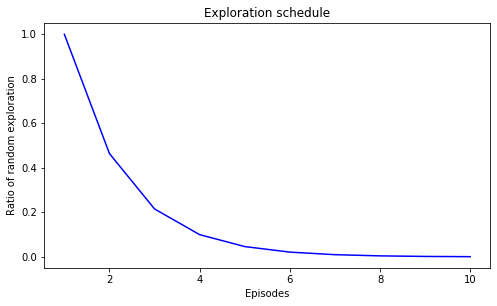

In [4]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [5]:
Single_Cross_Triple4_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, verbose = True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 48)           672         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 48)           2352        dense[0][0]                      
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 48)           2352        dense_1[0][0]                    
______________________________________________________________________________________________

In [6]:
Single_Cross_Triple4_MultiDQN_Agents.prepopulate_memory()

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Triple.inpx ...
Model File load process successful.
Simulation length set to 3600 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 42
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links and Lanes.

Setting Simulation mode to: training
Starting Deployments of Signal Control Units...
SCUs successfully deployed.

In [7]:
Single_Cross_Triple4_MultiDQN_Agents.train(episodes)

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Triple.inpx ...
Model File load process successful.
Simulation length set to 3601 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 100
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links and Lanes.

Setting Simulation mode to: training
Starting Deployments of Signal Control Units...
SCUs successfully deployed

In [8]:
Single_Cross_Triple4_MultiDQN_Agents.save()

Saving architecture, weights and optimizer state for agent-0
Dumping agent-0 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.


In [9]:
Single_Cross_Triple4_MultiDQN_Agents.load(best = False)

Loading Pre-Trained Agent 0, Architecture, Optimizer and Memory.
Items successfully loaded.


In [11]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple4_MultiDQN_Agents.test()

Working Directory set to: C:\Users\Rzhang\Desktop\MLforFlowOptimisationOrigine\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Single_Cross_Triple.inpx ...
Model File load process successful.
Simulation length set to 3601 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 110
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links and Lanes.

Setting Simulation mode to: test
Starting Deployments of Signal Control Units...
SCUs successfully deployed. El

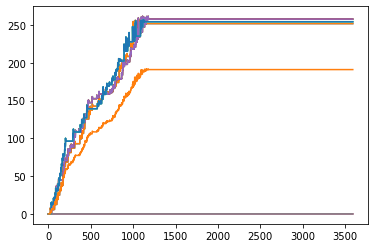

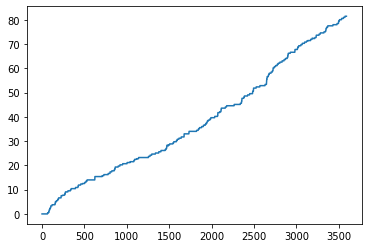

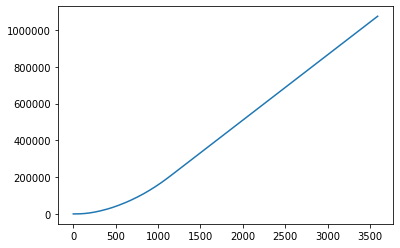

In [12]:
# To be arranged for multy agents

queues = np.array(Episode_Queues[0])
queues = queues.T

delay = Cumulative_Episode_Delays[0]

# Plot the queues
plt.figure(1)
for queue in queues:
    plt.plot(queue)

# plot the junctions delays
plt.figure(2)
plt.plot(delay)

#plot the total delays 
plt.figure(3)
plt.plot(Cumulative_Totale_network_delay)

# Dont freak out the 2 delays are not the same because the node is not covering all the junction

"""
Because the cars never leave the nodes the delay is not computed corretly
"""


# Single_Cross_Triple 8 actions

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
    0 : {'compatible_actions' : {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                     4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                     5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                     6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                     7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [12],
         'state_type' : 'Queues',
         'reward_type' : 'Queues' 
         }
}

In [ ]:
env = env(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

env.SCUs

In [ ]:
gamma = 0.85
alpha = 0.00005
ID = 0
value = 25
entropy = 2000
n_step_size = 16
state_size = [12]
reduce_entropy_every = 100



# for the monitoring
horizon = 100
n_sample = 10

Agents = []

for idx, info in Single_Cross_Triple_dictionary8.items():
        acts = info['compatible_actions']
        Agent = ACAgent(state_size, len(acts), ID, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)

In [ ]:
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

for i in range(100000):
    action_required, SARSDs = env.step_to_next_action(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            
            #print(sarsd)
            Agents[idx].remember(s,a,r,ns,d)
            if len(Agents[idx].memory) >= Agents[idx].n_step_size :
                Agents[idx].learn() 
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = int(Agents[idx].choose_action(ns))
            #print(actions)
            
            if (i+1)%reduce_entropy_every == 0:
                Agents[idx].reduce_entropy()
                print ("Agent {} : Entropy reduced to {} " .format(idx, Agents[idx].params['entropy']))
            
    
    # For the saving , monitoring of the agent
    if env.done :
        env.reset()
        for idx, agent in enumerate(Agents):
                    predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
                    print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
                    print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
                    print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
                    agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)